In [4]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer,r2_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


In [5]:
df_2019 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2019")
df_2020 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2020")
df_2021 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2021")
df_2022 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2022")
df_2023 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec_2023")
df_2024 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2024")


In [6]:
total_missing_values = (
    df_2019.isnull().sum().sum() +
    df_2020.isnull().sum().sum() +
    df_2021.isnull().sum().sum() +
    df_2022.isnull().sum().sum() +
    df_2023.isnull().sum().sum() +
    df_2024.isnull().sum().sum()
)

# total missing values
total_missing_values

61157

In [7]:
df_2019

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,2019-12-02 11:18:25.578,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,2019-12-02 11:18:35.142,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,2019-12-02 11:18:56.278,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,2019-12-02 11:19:08.079,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,2019-12-02 11:19:36.511,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2020-01-07 09:23:00.513,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,0.0,25.0,5.0,English,NaN,1000+,Product,unlimited,Telecom,NaN
987,2020-01-07 10:08:18.180,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,0.0,27.0,5.0,English,ING,1000+,Bank,unlimited,Finance / Insurance,NaN
988,2020-01-07 16:52:43.491,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,NaN,30.0,5.0,English,SAP,1000+,Product,unlimited,Сommerce,NaN
989,2020-01-08 11:18:41.226,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,NaN,26.0,6.0,English,NaN,1000+,Product,more than 1 year,Health,NaN


In [8]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                --------------  -----         
 0   Zeitstempel                                                                                           991 non-null    datetime64[ns]
 1   Age                                                                                                   882 non-null    float64       
 2   Gender                                                                                                991 non-null    object        
 3   City                                                                                                  991 non-null    object        
 4   Seniority level                                               

In [9]:
df_2020

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24 11:14:15.287,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24 11:14:15.940,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,2020-11-24 11:14:20.997,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,2020-11-24 11:15:24.486,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,2020-11-24 11:15:46.236,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,2021-12-09 14:45:24.368,30.0,Male,Duesseldorf,Project Manager,1,1,Junior,NaN,NaN,...,0,30,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,750
1304,2022-12-09 16:32:15.725,30.0,Female,Munich,Designer (UI/UX),5,1,Senior,NaN,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,300
1305,2023-11-27 15:21:36.369,19.0,Male,Madrid,Product Manager,0,0,Junior,Python,"Python, C/C++, Java / Scala, R,",...,3000,73,Self-employed (freelancer),Unlimited contract,English,101-1000,Product,No,0.0,800
1306,2024-11-23 02:22:44.616,20.0,Female,Berlin,Software Engineer,3,1,Junior,python,"Python, Javascript / Typescript, Java / Scala,...",...,3000,5,Part-time employee,Temporary contract,English,101-1000,Consulting / Agency,No,34.0,400


In [10]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                                   --------------  -----         
 0   Timestamp                                                                                                                1308 non-null   datetime64[ns]
 1   Age                                                                                                                      1278 non-null   float64       
 2   Gender                                                                                                                   1297 non-null   object        
 3   City                                                                                                   

In [11]:
df_2021

,Name,City,Attachments,Status,Gender,Your city,Employment status,Your employment status,Position,Your position,...,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",About you (anonymously),Working hours per week
0,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Other,Product Specialist,...,74000.0,84000.0,75000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Software Engineer,NaN,...,65000.0,75000.0,65000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,52000.0,52000.0,48000.0,31,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Aachen,NaN,NaN,NaN,NaN,Working student,NaN,Other,Research Assistant,...,5113.0,5113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Berlin,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,70000.0,70000.0,51000.0,28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Software Engineer,NaN,...,58000.0,58000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1203,NaN,Other,NaN,NaN,NaN,Bremen,Full-time employee,NaN,Product Manager,NaN,...,72000.0,72000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1204,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Frontend Developer,NaN,...,75000.0,1200.0,0.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1205,NaN,Other,NaN,NaN,NaN,Erfurt,Full-time employee,NaN,QA Engineer,NaN,...,55000.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 32 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Name                                                                       0 non-null      float64
 1   City                                                                       1204 non-null   object 
 2   Attachments                                                                0 non-null      float64
 3   Status                                                                     0 non-null      float64
 4   Gender                                                                     0 non-null      float64
 5   Your city                                                                  40 non-null     object 
 6   Employment status                                       

In [13]:
df_2022

,City,Your city,Employment status,Your employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,...,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",Working hours per week,layoff affects you,company layoffs,Work From Home allowance
0,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,5,1,Middle,NaN,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,No,100 - 500
1,Other,Friedrichshafen,Full-time employee,NaN,Tech Lead / Team Lead,NaN,18,10,Head / Principal,NaN,...,89000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
2,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,11,3,Lead / Staff,NaN,...,105000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
3,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,15,7,Lead / Staff,NaN,...,90000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,over 1000 euros
4,Berlin,NaN,Full-time employee,NaN,Other,SRE,10,2,Middle,NaN,...,68000.0,28,NaN,NaN,NaN,NaN,NaN,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,15,10,Lead / Staff,NaN,...,115000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,500 - 1000
769,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,7,0,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
770,Other,Würzburg,Full-time employee,NaN,Software Engineer,NaN,15,2,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
771,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,18,6,Lead / Staff,NaN,...,89000.0,24,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [14]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 29 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   City                                                                       773 non-null    object 
 1   Your city                                                                  26 non-null     object 
 2   Employment status                                                          773 non-null    object 
 3   Your employment status                                                     0 non-null      float64
 4   Position                                                                   773 non-null    object 
 5   Your position                                                              42 non-null     object 
 6   Total years of experience                                 

In [15]:
df_2023

,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,Main technology / programming language,...,company_hire_in_2023,company_industry,change_jobs,tc_new_job,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool,ai_other_tools
0,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,1,Senior,NaN,Kotlin,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Other,ChatGPT",NaN
1,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,14,4,Senior,NaN,Go,...,Yes,Financial Services,No,NaN,NaN,NaN,Invisible,No,NaN,NaN
2,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,3,2,Middle,NaN,Python,...,No,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Copilot,ChatGPT",NaN
3,Berlin,NaN,Full/Part-time employee,Data Scientist,NaN,7,7,Senior,NaN,Python,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,ChatGPT,NaN
4,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,6,2,Senior,NaN,JavaScript / Typescript,...,Yes,Insurance,No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Copilot",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,8,Senior,NaN,Python,...,Yes,Retail and Consumer Services,No,NaN,NaN,NaN,Invisible,Yes,"Copilot,ChatGPT",NaN
710,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,12,7,Senior,NaN,Python,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Invisible,No,NaN,NaN
711,Nuremberg,NaN,Full/Part-time employee,Backend Developer,NaN,16,16,Lead / Staff,NaN,C# / .NET,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Other,Copilot",Bing chat enterprise
712,Munich,NaN,Full/Part-time employee,Software / Solutions Architect,NaN,20,3,Lead / Staff,NaN,C# / .NET,...,No,Healthcare,No,NaN,NaN,NaN,Invisible,No,NaN,NaN


In [16]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 41 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   City                                                                       714 non-null    object 
 1   Your city                                                                  17 non-null     object 
 2   Employment status                                                          714 non-null    object 
 3   Position                                                                   714 non-null    object 
 4   Your position                                                              33 non-null     object 
 5   Total years of experience                                                  714 non-null    int64  
 6   Years of experience in Germany                            

In [17]:
df_2024

,Age,time,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,...,company_hire_in_2024,company_industry,change_jobs,tc_new_job,unemployed_last_tc_salary,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool
0,38,12/9/2024 10:49,Berlin,NaN,Full/Part-time employee,Product Designer / UX/UI Designer/Researcher,NaN,8,2,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,37,12/9/2024 10:51,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,17,6,Senior,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",Yes,about the same,NaN,"Involuntarily, I was forced to look for a new job",4.0,Invisible,No,NaN
2,37,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,18,9,Staff / Lead / Manager,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,34,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,12,4,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
4,29,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,8,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,33,2/3/2025 00:53,Berlin,NaN,Full/Part-time employee,Quality Assurance (QA) Software Engineer,NaN,13,2,Mid-level,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,NaN,No,NaN
713,46,2/3/2025 21:30,Stuttgart,NaN,Full/Part-time employee,Software Engineer,NaN,10,1,Mid-level,...,I dont know,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Great,No,NaN
714,25,2/4/2025 08:53,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,7,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,39,2/4/2025 10:24,Munich,NaN,Full/Part-time employee,Backend Software Engineer,NaN,20,2,Senior,...,Yes,Legal Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


In [18]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 39 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Age                                                                        717 non-null    int64  
 1   time                                                                       717 non-null    object 
 2   City                                                                       717 non-null    object 
 3   Your city                                                                  16 non-null     object 
 4   Employment status                                                          717 non-null    object 
 5   Position                                                                   717 non-null    object 
 6   Your position                                             

In [19]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level', 'Position (without seniority)', 'Years of experience', 'Your main technology / programming language', 'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus', 'Yearly stocks', 'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country', 'Yearly bonus one year ago. Only answer if staying in same country', 'Yearly stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Number of home office days per month', 'Main language at work', 'Company name ', 'Company size', 'Company type', 'Сontract duration', 'Company business sector', 0]
df_2020 columns: ['Timestamp', 'Age', 'Gender', 'City', 'Position ', 'Total years of experience', 'Years of experience in Germany', 'Seniority level', 'Your main technology / programming language', 'Other technologies/programming languages you use often', 'Yearly brutto salary (without bonus and stock

### I. DATA CLEANING 

#### 1. Columns cleaning per dataset

##### 1.a Dataset 2019 

In [20]:
df_2019.columns


Index([                                                                                         'Zeitstempel',
                                                                                                        'Age',
                                                                                                     'Gender',
                                                                                                       'City',
                                                                                            'Seniority level',
                                                                               'Position (without seniority)',
                                                                                        'Years of experience',
                                                                'Your main technology / programming language',
                                                            'Yearly brutto salary (without bonus and stocks)',
 

In [21]:
selected_columns = ['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)',
       'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 
       'Company size']

In [22]:
df_2019 = df_2019[selected_columns]

In [23]:
df_2019 = df_2019.rename(columns={
    'Zeitstempel': 'year', 
    'Gender': 'gender',
    'Age':'age',
    'City': 'city', 
    'Seniority level': 'seniority', 
    'Position (without seniority)': 'position', 
    'Years of experience': 'years_of_xp',  
    'Your main technology / programming language': 'main_tech',  
    'Yearly brutto salary (without bonus and stocks)': 'salary_euros',  
    'Yearly bonus': 'yearly_bonus',  
    'Yearly stocks': 'yearly_stocks',
    'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country': 'salary_2018',
    'Yearly bonus one year ago. Only answer if staying in same country': 'yearly_bonus_2018',
    'Yearly stocks one year ago. Only answer if staying in same country': 'yearly_stocks_2018',
    'Number of vacation days': 'vacation_days',
    'Company size': 'company_size', 
})

df_2019.sample(10)

,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size
407,2019-12-04 11:57:27.028,NaN,Male,Berlin,Lead,Backend Developer,7,Java,110000.0,20000.0,NaN,NaN,NaN,NaN,27.0,1000+
368,2019-12-03 20:32:32.218,30.0,Male,Berlin,Senior,Data Scientist,8,Python,90000.0,20000.0,NaN,NaN,NaN,NaN,NaN,50-100
182,2019-12-02 16:39:10.712,24.0,Male,Frankfurt,Junior,DevOps,1,AWS,45000.0,NaN,NaN,40000.0,NaN,NaN,28.0,50-100
551,2019-12-05 10:25:42.196,30.0,Male,Berlin,Senior,Software Architect,10,AWS,73000.0,20000.0,2000.0,66000.0,NaN,10000.0,28.0,1000+
809,2019-12-11 19:50:15.304,32.0,Male,Munich,Middle,Frontend Developer,3,Javascript / Typescript,55000.0,NaN,NaN,NaN,NaN,NaN,28.0,1000+
972,2020-01-02 08:47:59.900,34.0,Male,Cologne,Senior,Desktop,13,C/C++,70000.0,NaN,NaN,57000.0,NaN,NaN,35.0,50-100
6,2019-12-02 11:21:25.543,34.0,Male,Berlin,Senior,Backend Developer,12,Java,85000.0,NaN,NaN,76000.0,NaN,NaN,25.0,50-100
572,2019-12-05 14:23:37.924,27.0,Male,Munich,Senior,Data Scientist,7,Python,90000.0,NaN,NaN,75000.0,NaN,NaN,28.0,100-1000
486,2019-12-04 20:45:15.816,38.0,Male,Cork,Senior,Software Architect,15,SQL,100000.0,25000.0,11000.0,78000.0,15000.0,10000.0,28.0,1000+
54,2019-12-02 12:03:44.094,NaN,Male,Berlin,Senior,Data Scientist,6,Python,80000.0,8000.0,25000.0,NaN,NaN,NaN,24.0,1000+


In [24]:
df_2019.columns

Index(['year', 'age', 'gender', 'city', 'seniority', 'position', 'years_of_xp',
       'main_tech', 'salary_euros', 'yearly_bonus', 'yearly_stocks',
       'salary_2018', 'yearly_bonus_2018', 'yearly_stocks_2018',
       'vacation_days', 'company_size'],
      dtype='object')

In [25]:
df_2019['years_of_xp_germany'] = np.nan 
df_2019['ai_impact'] = "No"
df_2019['ai_use'] = "No" 
df_2019['ai_tool'] = "No"

In [26]:
df_2019.isna().sum()








year                     0
age                    109
gender                   0
city                     0
seniority               15
position                 1
years_of_xp              0
main_tech               14
salary_euros             1
yearly_bonus           461
yearly_stocks          788
salary_2018            388
yearly_bonus_2018      734
yearly_stocks_2018     852
vacation_days           60
company_size            14
years_of_xp_germany    991
ai_impact                0
ai_use                   0
ai_tool                  0
dtype: int64

In [27]:
df_2019.dtypes

year                   datetime64[ns]
age                           float64
gender                         object
city                           object
seniority                      object
position                       object
years_of_xp                     int64
main_tech                      object
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                   object
years_of_xp_germany           float64
ai_impact                      object
ai_use                         object
ai_tool                        object
dtype: object

In [28]:
numerical_columns = df_2019.select_dtypes(include='number').columns
df_2019['age'] = df_2019.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['age'].mode()[0]))
df_2019['seniority'] = df_2019.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['seniority'].mode()[0]))
df_2019['position'] = df_2019.groupby('years_of_xp')['position'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['position'].mode()[0]))
df_2019['main_tech'] = df_2019.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['main_tech'].mode()[0]))
df_2019['company_size'] = df_2019.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['company_size'].mode()[0]))
cols_zero_fill = ['yearly_bonus', 'yearly_stocks', 'salary_2018', 'yearly_bonus_2018', 'yearly_stocks_2018']
df_2019[cols_zero_fill] = df_2019[cols_zero_fill].fillna(0)
df_2019['years_of_xp_germany'] = df_2019['years_of_xp_germany'].fillna(0)

df_2019[numerical_columns] = df_2019[numerical_columns].apply(lambda x: x.fillna(x.median()))

df_2019.sample(10)





,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool
828,2019-12-12 20:42:45.901,42.0,Male,Munich,Senior,Fullstack Developer,20,.NET,63000.0,1000.0,0.0,60000.0,3000.0,0.0,30.0,up to 10,0.0,No,No,No
400,2019-12-04 10:09:47.299,37.0,Male,Berlin,Senior,Backend Developer,12,Not Relevant,70000.0,5000.0,0.0,65000.0,5000.0,0.0,25.0,50-100,0.0,No,No,No
351,2019-12-03 16:50:32.729,32.0,Female,Munich,Senior,Backend Developer,8,Java,62000.0,6000.0,0.0,0.0,0.0,0.0,28.0,1000+,0.0,No,No,No
184,2019-12-02 16:41:25.229,31.0,Male,Wroclaw,Senior,Backend Developer,10,Ruby,45000.0,2500.0,0.0,0.0,0.0,0.0,28.0,50-100,0.0,No,No,No
796,2019-12-11 13:31:46.124,23.0,Male,Moscow,Middle,Backend Developer,3,Erlang,36819.0,0.0,0.0,0.0,0.0,0.0,28.0,100-1000,0.0,No,No,No
593,2019-12-05 20:57:01.687,37.0,Male,Munich,Senior,Backend Developer,14,C/C++,72000.0,3000.0,0.0,0.0,0.0,0.0,27.0,100-1000,0.0,No,No,No
794,2019-12-11 13:07:33.830,37.0,Male,Almere,Senior,Tech Lead,10,C/C++,57600.0,4416.0,0.0,0.0,0.0,0.0,25.0,10-50,0.0,No,No,No
545,2019-12-05 09:42:20.938,24.0,Male,Berlin,Senior,Frontend Developer,5,Javascript / Typescript,63000.0,3000.0,0.0,0.0,0.0,0.0,25.0,100-1000,0.0,No,No,No
797,2019-12-11 14:20:01.777,30.0,Male,Vienna,Junior,Frontend Developer,2,Javascript / Typescript,21600.0,0.0,0.0,25200.0,0.0,0.0,25.0,up to 10,0.0,No,No,No
389,2019-12-04 00:13:56.203,30.0,Male,Berlin,Senior,Data Scientist,6,Python,87000.0,12000.0,0.0,82000.0,8000.0,0.0,28.0,50-100,0.0,No,No,No


In [29]:
df_2019.shape

(991, 20)

In [30]:
df_2019.isna().sum()

year                   0
age                    0
gender                 0
city                   0
seniority              0
position               0
years_of_xp            0
main_tech              0
salary_euros           0
yearly_bonus           0
yearly_stocks          0
salary_2018            0
yearly_bonus_2018      0
yearly_stocks_2018     0
vacation_days          0
company_size           0
years_of_xp_germany    0
ai_impact              0
ai_use                 0
ai_tool                0
dtype: int64

In [31]:
object_columns = df_2019.select_dtypes(include='object').columns

df_2019[object_columns] = df_2019[object_columns].apply(lambda x: x.astype('category'))

df_2019[object_columns] = df_2019[object_columns].apply(lambda x: x.fillna(x.mode()[0]))

df_2019.sample(10)


,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool
388,2019-12-04 00:11:03.052,28.0,Male,Berlin,Senior,Backend Developer,6,Ruby,52000.0,0.0,0.0,52000.0,0.0,0.0,20.0,100-1000,0.0,No,No,No
817,2019-12-12 09:05:20.745,40.0,Male,Munich,Junior,QA,3,Java,52000.0,0.0,1.0,1.0,1.0,1.0,30.0,100-1000,0.0,No,No,No
456,2019-12-04 16:50:30.210,28.0,Female,London,Senior,Data Scientist,7,Python,120000.0,0.0,0.0,65000.0,0.0,0.0,25.0,1000+,0.0,No,No,No
444,2019-12-04 15:17:37.783,32.0,Male,Nuremberg,Middle,Data Scientist,2,Python,50000.0,4100.0,0.0,0.0,0.0,0.0,30.0,1000+,0.0,No,No,No
623,2019-12-06 10:22:12.146,31.0,Male,Hamburg,Senior,Mobile Developer,10,.NET,80000.0,45000.0,0.0,0.0,0.0,0.0,25.0,100-1000,0.0,No,No,No
639,2019-12-06 19:50:19.613,27.0,Female,Berlin,Middle,Cloud Platform Engineer,6,AWS,70000.0,0.0,0.0,54000.0,0.0,0.0,32.0,1000+,0.0,No,No,No
197,2019-12-02 17:40:40.416,29.0,Female,Munich,Middle,Data Scientist,4,R,62000.0,5000.0,0.0,60000.0,5000.0,0.0,30.0,100-1000,0.0,No,No,No
605,2019-12-05 23:06:13.634,32.0,Male,Berlin,Lead,Software Engineer,10,Not Relevant,83000.0,0.0,0.0,75000.0,0.0,0.0,28.0,1000+,0.0,No,No,No
742,2019-12-10 15:13:41.338,33.0,Male,Berlin,Senior,Backend Developer,10,.NET,87000.0,0.0,0.0,0.0,0.0,0.0,25.0,10-50,0.0,No,No,No
451,2019-12-04 16:08:48.079,43.0,Male,Hamburg,Senior,Software Architect,15,Java,54000.0,0.0,0.0,74000.0,0.0,0.0,28.0,up to 10,0.0,No,No,No


In [32]:
df_2019['year'] = pd.to_datetime(df_2019['year'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Extraire seulement l'année
df_2019['year_only'] = df_2019['year'].dt.year

# Afficher le résultat
print(df_2019[['year', 'year_only']])

                       year  year_only
0   2019-12-02 11:18:25.578       2019
1   2019-12-02 11:18:35.142       2019
2   2019-12-02 11:18:56.278       2019
3   2019-12-02 11:19:08.079       2019
4   2019-12-02 11:19:36.511       2019
..                      ...        ...
986 2020-01-07 09:23:00.513       2020
987 2020-01-07 10:08:18.180       2020
988 2020-01-07 16:52:43.491       2020
989 2020-01-08 11:18:41.226       2020
990 2020-01-08 22:20:07.799       2020

[991 rows x 2 columns]


In [33]:
df_2019.tail()

,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,...,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool,year_only
986,2020-01-07 09:23:00.513,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,64000.0,3000.0,0.0,25.0,1000+,0.0,No,No,No,2020
987,2020-01-07 10:08:18.180,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,67000.0,0.0,0.0,27.0,1000+,0.0,No,No,No,2020
988,2020-01-07 16:52:43.491,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,67000.0,9000.0,0.0,30.0,1000+,0.0,No,No,No,2020
989,2020-01-08 11:18:41.226,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,93000.0,5000.0,0.0,26.0,1000+,0.0,No,No,No,2020
990,2020-01-08 22:20:07.799,32.0,Male,Frankfurt,Middle,Fullstack Developer,5,Java,63000.0,0.0,...,0.0,0.0,0.0,30.0,1000+,0.0,No,No,No,2020


In [34]:
df_2019.dtypes

year                   datetime64[ns]
age                           float64
gender                       category
city                         category
seniority                    category
position                     category
years_of_xp                     int64
main_tech                    category
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                 category
years_of_xp_germany           float64
ai_impact                    category
ai_use                       category
ai_tool                      category
year_only                       int32
dtype: object

In [35]:
for cols, types in df_2019.dtypes.items():
    if types == 'object':
        df_2019[cols] = df_2019[cols].astype('category')

print(df_2019.dtypes)
    

year                   datetime64[ns]
age                           float64
gender                       category
city                         category
seniority                    category
position                     category
years_of_xp                     int64
main_tech                    category
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                 category
years_of_xp_germany           float64
ai_impact                    category
ai_use                       category
ai_tool                      category
year_only                       int32
dtype: object


In [36]:
df_2019['vacation_days'] = df_2019['vacation_days'].fillna(0)


In [37]:
df_2019['salary_wt_bonus_stocks']=df_2019['yearly_bonus']+ df_2019['yearly_stocks']+ df_2019['salary_euros']

In [38]:
df_2019['salary_bonus_stocks_2018'] = df_2019['salary_2018']+ df_2019['yearly_bonus_2018']+ df_2019['yearly_stocks_2018']

In [39]:
df_2019['year'] = pd.to_datetime(df_2019['year']).dt.year
print(df_2019['year'].unique())

[2019 2020]


In [40]:
df_2019 = df_2019[['year',
       'city',
       'position',
       'gender',
       'age',
       'seniority',
       'years_of_xp', 
       'years_of_xp_germany',
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'yearly_bonus',
       'yearly_stocks', 
       'salary_2018',
       'salary_bonus_stocks_2018',
       'yearly_bonus_2018',
       'yearly_stocks_2018',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [41]:
df_2019 = df_2019.drop(columns=['yearly_bonus', 'yearly_stocks','yearly_bonus_2018','yearly_stocks_2018'])

In [42]:
df_2019

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2018,salary_bonus_stocks_2018,ai_impact,ai_use,ai_tool
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,50-100,64000.0,65000.0,58000.0,59000.0,No,No,No
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,10-50,55000.0,55000.0,55000.0,55000.0,No,No,No
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,1000+,70000.0,70000.0,55000.0,55000.0,No,No,No
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,100-1000,63000.0,63000.0,0.0,0.0,No,No,No
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,50-100,66000.0,66000.0,56000.0,56000.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2020,Amsterdam,Backend Developer,Male,30.0,Senior,10,0.0,Python,25.0,1000+,71000.0,74000.0,64000.0,67000.0,No,No,No
987,2020,Amsterdam,Security Engineer,Male,28.0,Senior,7,0.0,Not Relevant,27.0,1000+,72000.0,72000.0,67000.0,67000.0,No,No,No
988,2020,Munich,Manager,Male,42.0,Senior,9,0.0,Not Relevant,30.0,1000+,68000.0,78000.0,67000.0,76000.0,No,No,No
989,2020,Berlin,Software Architect,Male,33.0,Senior,15,0.0,Javascript / Typescript,26.0,1000+,100000.0,103000.0,93000.0,98000.0,No,No,No


##### 1.b Dataset 2020

In [43]:
df_2020

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24 11:14:15.287,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24 11:14:15.940,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,2020-11-24 11:14:20.997,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,2020-11-24 11:15:24.486,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,2020-11-24 11:15:46.236,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,2021-12-09 14:45:24.368,30.0,Male,Duesseldorf,Project Manager,1,1,Junior,NaN,NaN,...,0,30,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,750
1304,2022-12-09 16:32:15.725,30.0,Female,Munich,Designer (UI/UX),5,1,Senior,NaN,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,300
1305,2023-11-27 15:21:36.369,19.0,Male,Madrid,Product Manager,0,0,Junior,Python,"Python, C/C++, Java / Scala, R,",...,3000,73,Self-employed (freelancer),Unlimited contract,English,101-1000,Product,No,0.0,800
1306,2024-11-23 02:22:44.616,20.0,Female,Berlin,Software Engineer,3,1,Junior,python,"Python, Javascript / Typescript, Java / Scala,...",...,3000,5,Part-time employee,Temporary contract,English,101-1000,Consulting / Agency,No,34.0,400


In [44]:
df_2020.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [45]:
selected_columns = ['Timestamp', 'City', 'Age', 'Gender', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Your main technology / programming language', 
       'Seniority level', 
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 
       'Main language at work', 'Company size']

In [46]:
len(selected_columns)

16

In [47]:
df_2020 = df_2020[selected_columns]


In [48]:
df_2020 = df_2020.rename(columns={
    'Timestamp':'year', 
    'Age': 'age',
    'Gender': 'gender',
    'City': 'city', 
    'Position ':'position',
    'Total years of experience':'years_of_xp',
    'Years of experience in Germany':'years_of_xp_germany',
    'Seniority level': 'seniority',
    'Your main technology / programming language': 'main_tech',
    'Yearly brutto salary (without bonus and stocks) in EUR':'salary_euros', 
    'Yearly bonus + stocks in EUR':'yearly_bonus_stocks',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'salary_2019', 
    'Annual bonus+stocks one year ago. Only answer if staying in same country':'yearly_bonus_stocks_2019',
    'Number of vacation days': 'vacation_days',
    'Company size': 'company_size', 
})


df_2020.tail()


,year,city,age,gender,position,years_of_xp,years_of_xp_germany,main_tech,seniority,salary_euros,yearly_bonus_stocks,salary_2019,yearly_bonus_stocks_2019,vacation_days,Main language at work,company_size
1303,2021-12-09 14:45:24.368,Duesseldorf,30.0,Male,Project Manager,1,1,NaN,Junior,52000.0,0,48000.0,0,30,German,1000+
1304,2022-12-09 16:32:15.725,Munich,30.0,Female,Designer (UI/UX),5,1,NaN,Senior,70000.0,NaN,NaN,NaN,30,English,101-1000
1305,2023-11-27 15:21:36.369,Madrid,19.0,Male,Product Manager,0,0,Python,Junior,43000.0,18000,30000.0,3000,73,English,101-1000
1306,2024-11-23 02:22:44.616,Berlin,20.0,Female,Software Engineer,3,1,python,Junior,40000.0,3000,40000.0,3000,5,English,101-1000
1307,2024-12-29 17:02:34.574,Jordan,20.0,Male,ML Engineer,2,0,c++,student,50000.0,2000,NaN,NaN,NaN,NaN,NaN


In [49]:
df_2020['year'] = pd.to_datetime(df_2020['year'], errors='coerce').dt.year


In [50]:
df_2020['ai_impact'] = 'Invisible'
df_2020['ai_use'] = 'No'
df_2020['ai_tool'] = "No"


In [51]:
df_2020.dtypes

year                          int32
city                         object
age                         float64
gender                       object
position                     object
years_of_xp                  object
years_of_xp_germany          object
main_tech                    object
seniority                    object
salary_euros                float64
yearly_bonus_stocks          object
salary_2019                 float64
yearly_bonus_stocks_2019     object
vacation_days                object
Main language at work        object
company_size                 object
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [52]:
df_2020['vacation_days'] = pd.to_numeric(df_2020['vacation_days'], errors='coerce')

import pandas as pd

# Loop through all columns and convert based on type
for col in df_2020.columns:
    if df_2020[col].dtype == 'object':  # Convert object to category
        df_2020[col] = df_2020[col].astype('category')
    else:  # Convert everything else to numeric (float64)
        df_2020[col] = pd.to_numeric(df_2020[col], errors='coerce')

# Verification
print(df_2021.dtypes)


print(df_2020.dtypes)


Name                                                                         float64
City                                                                          object
Attachments                                                                  float64
Status                                                                       float64
Gender                                                                       float64
Your city                                                                     object
Employment status                                                             object
Your employment status                                                       float64
Position                                                                      object
Your position                                                                 object
Total years of experience                                                      int64
Years of experience in Germany                                   

In [53]:
df_2020.isna().sum()

year                          0
city                          0
age                          30
gender                       11
position                      7
years_of_xp                  18
years_of_xp_germany          34
main_tech                   132
seniority                    12
salary_euros                  0
yearly_bonus_stocks         434
salary_2019                 383
yearly_bonus_stocks_2019    662
vacation_days                86
Main language at work        17
company_size                 19
ai_impact                     0
ai_use                        0
ai_tool                       0
dtype: int64

In [54]:
# Liste des colonnes numériques
numerical_columns = df_2020.select_dtypes(include='number').columns

# Imputation basée sur le mode (valeur la plus fréquente)
df_2020['age'] = df_2020.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['age'].mode()[0]))
df_2020['seniority'] = df_2020.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['seniority'].mode()[0]))
df_2020['position'] = df_2020.groupby('years_of_xp')['position'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['position'].mode()[0]))
df_2020['main_tech'] = df_2020.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['main_tech'].mode()[0]))
df_2020['company_size'] = df_2020.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['company_size'].mode()[0]))
df_2020['Main language at work'] = df_2020.groupby('main_tech')['Main language at work'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['Main language at work'].mode()[0]))

# Colonnes à remplir avec 0
cols_zero_fill = ['yearly_bonus_stocks', 'salary_2019', 'yearly_bonus_stocks_2019']
df_2020[cols_zero_fill] = df_2020[cols_zero_fill].fillna(0)

# Imputation de years_of_xp_germany avec 0
df_2020['years_of_xp_germany'] = df_2020['years_of_xp_germany'].fillna(0)

# Imputation des autres colonnes numériques avec la médiane
df_2020[numerical_columns] = df_2020[numerical_columns].apply(lambda x: x.fillna(x.median()))


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2772289667.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2020['age'] = df_2020.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['age'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2772289667.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2020['seniority'] = df_2020.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['seniority'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000

In [55]:
df_2020 = df_2020.dropna()

In [56]:
df_2020.isna().sum()

year                        0
city                        0
age                         0
gender                      0
position                    0
years_of_xp                 0
years_of_xp_germany         0
main_tech                   0
seniority                   0
salary_euros                0
yearly_bonus_stocks         0
salary_2019                 0
yearly_bonus_stocks_2019    0
vacation_days               0
Main language at work       0
company_size                0
ai_impact                   0
ai_use                      0
ai_tool                     0
dtype: int64

In [57]:
df_2020.dtypes

year                           int32
city                        category
age                          float64
gender                      category
position                    category
years_of_xp                 category
years_of_xp_germany         category
main_tech                   category
seniority                   category
salary_euros                 float64
yearly_bonus_stocks         category
salary_2019                  float64
yearly_bonus_stocks_2019    category
vacation_days                float64
Main language at work       category
company_size                category
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object

In [58]:
len(df_2020.columns)

19

In [59]:
df_2020['yearly_bonus_stocks_2019'].value_counts()

yearly_bonus_stocks_2019
0                                  852
5000                                33
10000                               25
60000                               16
3000                                15
                                  ... 
6900                                 1
42000                                1
41000                                1
7050                                 1
learning budget, bvg, gym, food      1
Name: count, Length: 132, dtype: int64

In [60]:
column_name = 'yearly_bonus_stocks_2019'

# Check if the column exists; if not, create it with default value 0
if column_name not in df_2020.columns:
    df_2020[column_name] = 0  # You can set a default like 0 or 'Unknown'

# Now safely convert to numeric
df_2020[column_name] = pd.to_numeric(df_2020[column_name], errors='coerce')

# Fill NaN values with 0
df_2020[column_name] = df_2020[column_name].fillna(0)

# Display the column type to verify the conversion
print(df_2020[column_name].dtype)


float64


In [61]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1307
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      1284 non-null   int32   
 1   city                      1284 non-null   category
 2   age                       1284 non-null   float64 
 3   gender                    1284 non-null   category
 4   position                  1284 non-null   category
 5   years_of_xp               1284 non-null   category
 6   years_of_xp_germany       1284 non-null   category
 7   main_tech                 1284 non-null   category
 8   seniority                 1284 non-null   category
 9   salary_euros              1284 non-null   float64 
 10  yearly_bonus_stocks       1284 non-null   category
 11  salary_2019               1284 non-null   float64 
 12  yearly_bonus_stocks_2019  1284 non-null   float64 
 13  vacation_days             1284 non-null   float64 
 1

In [62]:
df_2020['salary_bonus_stocks_2019'] = df_2020['yearly_bonus_stocks_2019'] + df_2020['salary_2019']

In [63]:
# Ensure both salary_euros and yearly_bonus_stocks are numeric
df_2020['salary_euros'] = pd.to_numeric(df_2020['salary_euros'], errors='coerce')
df_2020['yearly_bonus_stocks'] = pd.to_numeric(df_2020['yearly_bonus_stocks'], errors='coerce')

# Fill NaN values with 0 to avoid errors during addition
df_2020['salary_euros'] = df_2020['salary_euros'].fillna(0)
df_2020['yearly_bonus_stocks'] = df_2020['yearly_bonus_stocks'].fillna(0)

# Now perform the addition safely
df_2020['salary_wt_bonus_stocks'] = df_2020['salary_euros'] + df_2020['yearly_bonus_stocks']

# Display column types to verify the conversion
print(df_2020[['salary_euros', 'yearly_bonus_stocks', 'salary_wt_bonus_stocks']].dtypes)


salary_euros              float64
yearly_bonus_stocks       float64
salary_wt_bonus_stocks    float64
dtype: object


In [64]:
df_2020 = df_2020[['year',
       'city',
       'position',
       'gender',
       'age',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'yearly_bonus_stocks',
       'salary_2019', 
       'salary_bonus_stocks_2019',
       'yearly_bonus_stocks_2019',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [65]:
len(df_2020.columns)

20

In [66]:
df_2020 = df_2020.drop(['yearly_bonus_stocks_2019'], axis=1)
df_2020 = df_2020.drop(['yearly_bonus_stocks'], axis=1)

df_2020.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2019,salary_bonus_stocks_2019,ai_impact,ai_use,ai_tool
0,2020,Munich,Software Engineer,Male,26.0,Senior,5,3,TypeScript,30.0,51-100,80000.0,85000.0,75000.0,85000.0,Invisible,No,No
1,2020,Berlin,Backend Developer,Male,26.0,Senior,7,4,Ruby,28.0,101-1000,80000.0,80000.0,82000.0,87000.0,Invisible,No,No
2,2020,Berlin,Software Engineer,Male,29.0,Lead,12,6,Javascript / Typescript,30.0,101-1000,120000.0,240000.0,100000.0,200000.0,Invisible,No,No
3,2020,Berlin,Frontend Developer,Male,28.0,Junior,4,1,Javascript,24.0,51-100,54000.0,54000.0,0.0,0.0,Invisible,No,No
4,2020,Berlin,Backend Developer,Male,37.0,Senior,17,6,C# .NET,29.0,101-1000,62000.0,62000.0,62000.0,62000.0,Invisible,No,No


##### 1.c Dataset 2021

In [67]:
df_2021

,Name,City,Attachments,Status,Gender,Your city,Employment status,Your employment status,Position,Your position,...,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",About you (anonymously),Working hours per week
0,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Other,Product Specialist,...,74000.0,84000.0,75000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Software Engineer,NaN,...,65000.0,75000.0,65000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,52000.0,52000.0,48000.0,31,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Aachen,NaN,NaN,NaN,NaN,Working student,NaN,Other,Research Assistant,...,5113.0,5113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Berlin,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,70000.0,70000.0,51000.0,28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Software Engineer,NaN,...,58000.0,58000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1203,NaN,Other,NaN,NaN,NaN,Bremen,Full-time employee,NaN,Product Manager,NaN,...,72000.0,72000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1204,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Frontend Developer,NaN,...,75000.0,1200.0,0.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1205,NaN,Other,NaN,NaN,NaN,Erfurt,Full-time employee,NaN,QA Engineer,NaN,...,55000.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
for col in df_2021.columns:
    print(f"Valeurs uniques de {col}:")
    print(df_2021[col].unique())  
    print("\n")


Valeurs uniques de Name:
[nan]


Valeurs uniques de City:
[nan 'Aachen' 'Berlin' 'Bonn' 'Cologne' 'Darmstadt' 'Dusseldorf'
 'Frankfurt' 'Hamburg' 'Heidelberg' 'Ingolstadt' 'Karlsruhe' 'Konstanz'
 'Mannheim' 'Munich' 'Nuremberg' 'Regensburg' 'Rosenheim' 'Stuttgart'
 'Wolfsburg' 'Other']


Valeurs uniques de Attachments:
[nan]


Valeurs uniques de Status:
[nan]


Valeurs uniques de Gender:
[nan]


Valeurs uniques de Your city:
[nan 'Berlin' 'Trier' 'Amsterdam' 'Mainz' 'Kempten' 'Schleswig-Holstein'
 'Augsburg' 'Odessa' 'Böblingen' 'Lindau (Bodensee), Insel' 'Vienna'
 'Dresden' 'Braunschweig' 'Dortmund' 'Erfurt' 'Lingen' 'Kathmandu, Nepal'
 'London' 'Sindelfingen' 'Kathmandu' 'Wiesbaden' 'Mülheim' 'Ennepetal'
 'Freiburg' 'Jena' 'Würzburg' 'Leipzig' 'Hannover' 'Bremen' 'Rheine'
 'bamberg' 'Potsdam']


Valeurs uniques de Employment status:
['Full-time employee' 'Working student' 'Self-employed (freelancer)'
 'Part-time employee' 'Founder' 'Other']


Valeurs uniques de Your employment status

In [69]:
df_2021.columns

Index(['Name', 'City', 'Attachments', 'Status', 'Gender', 'Your city',
       'Employment status', 'Your employment status', 'Position',
       'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?',
       'Have you completed your higher education in Germany?',
       'Your main technology', 'Just a few more general questions',
       'Company size', 'Annual Brutto salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (

In [70]:
selected_columns = ['City', 'Position',
       'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Main technology / programming language',
       'Your main technology', 'Company size', 
       'Annual Brutto salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days']

In [71]:
df_2021 = df_2021[selected_columns]
df_2021

,City,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Main technology / programming language,Your main technology,Company size,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days
0,NaN,Other,Product Specialist,16,8,Senior,NodeJS,NaN,1000+,74000.0,84000.0,75000.0,30
1,NaN,Software Engineer,NaN,6,6,Senior,C# / .NET,NaN,101-1000,65000.0,75000.0,65000.0,30
2,NaN,Data Scientist,NaN,2,2,Middle,Python,NaN,11-50,52000.0,52000.0,48000.0,31
3,Aachen,Other,Research Assistant,4,1,Junior,Python,NaN,1000+,5113.0,5113.0,NaN,NaN
4,Berlin,Data Scientist,NaN,6,2,Middle,Python,NaN,101-1000,70000.0,70000.0,51000.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,Other,Software Engineer,NaN,5,0,Middle,Java,NaN,101-1000,58000.0,58000.0,NaN,30
1203,Other,Product Manager,NaN,8,8,Lead,Other,NaN,51-100,72000.0,72000.0,NaN,30
1204,Other,Frontend Developer,NaN,8,0,Senior,JavaScript / Typescript,NaN,51-100,75000.0,1200.0,0.0,30
1205,Other,QA Engineer,NaN,3,1,Middle,JavaScript / Typescript,NaN,11-50,55000.0,55000.0,NaN,NaN


In [72]:
df_2021 = df_2021.rename(columns={'City':'city',
       'Position':'position',
       'Your position':'your_position',
       'Total years of experience':'years_of_xp', 
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority', 
       'Main technology / programming language':'main_tech',
       'Company size':'company_size', 
       'Annual Brutto salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual bonus+stocks one year ago.':'yearly_bonus_stocks_2020',
       'Number of vacation days':'vacation_days'
       })

In [73]:
df_2021.isna().sum()

city                           3
position                       0
your_position               1133
years_of_xp                    0
years_of_xp_germany            0
seniority                      7
main_tech                      0
Your main technology        1140
company_size                   5
salary_euros                  21
salary_wt_bonus_stocks        21
yearly_bonus_stocks_2020     394
vacation_days                 68
dtype: int64

In [74]:
for cols, types in df_2021.dtypes.items():
    if types == 'object':
        df_2021[cols] = df_2021[cols].astype('category')

print(df_2021.dtypes)

city                        category
position                    category
your_position               category
years_of_xp                    int64
years_of_xp_germany            int64
seniority                   category
main_tech                   category
Your main technology        category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
yearly_bonus_stocks_2020     float64
vacation_days               category
dtype: object


In [75]:
import numpy as np

# Ensure categorical columns are treated as strings
categorical_cols = ['your_position', 'seniority', 'main_tech', 'Your main technology', 'city']

for col in categorical_cols:
    if col in df_2021.columns:
        df_2021[col] = df_2021[col].astype(str)

# Fill NaN values for categorical columns based on related features
if 'years_of_xp' in df_2021.columns:
    if 'your_position' in df_2021.columns:
        df_2021['your_position'] = df_2021.groupby('years_of_xp')['your_position'].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
        )

    if 'seniority' in df_2021.columns:
        df_2021['seniority'] = df_2021.groupby('years_of_xp')['seniority'].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
        )

if 'position' in df_2021.columns and 'main_tech' in df_2021.columns:
    df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

if 'main_tech' in df_2021.columns and 'Your main technology' in df_2021.columns:
    df_2021['Your main technology'] = df_2021.groupby('main_tech')['Your main technology'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

# Fill missing values for 'city' using the most common city for the same company size
if 'company_size' in df_2021.columns and 'city' in df_2021.columns:
    df_2021['city'] = df_2021.groupby('company_size')['city'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )


# Verify missing values after filling
print("Missing values after filling:", df_2021.isnull().sum())


Missing values after filling: city                          5
position                      0
your_position                 0
years_of_xp                   0
years_of_xp_germany           0
seniority                     0
main_tech                     0
Your main technology          0
company_size                  5
salary_euros                 21
salary_wt_bonus_stocks       21
yearly_bonus_stocks_2020    394
vacation_days                68
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3505206005.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3505206005.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['city'] = df_2021.groupby('company_size')['city'].transform(


In [76]:

# Ensure 'yearly_bonus_stocks_2020' is numeric
df_2021['yearly_bonus_stocks_2020'] = pd.to_numeric(df_2021['yearly_bonus_stocks_2020'], errors='coerce')

# Fill 'yearly_bonus_stocks_2020' based on company_size (use median)
df_2021['yearly_bonus_stocks_2020'] = df_2021.groupby('company_size')['yearly_bonus_stocks_2020'].transform(
    lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2021['yearly_bonus_stocks_2020'].median())
)

# Fill 'vacation_days' based on position (use mode)
df_2021['vacation_days'] = df_2021.groupby('position')['vacation_days'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['vacation_days'].mode()[0])
)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4022861362.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['yearly_bonus_stocks_2020'] = df_2021.groupby('company_size')['yearly_bonus_stocks_2020'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4022861362.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['vacation_days'] = df_2021.groupby('position')['vacation_days'].transform(


In [77]:
df_2021["year"] = 2021
df_2021['ai_impact'] = 'Invisible'
df_2021['ai_use'] = 'No'
df_2021['ai_tool'] = 'No'

In [78]:
# Define required columns for all datasets
required_columns = ['salary_euros', 'yearly_bonus_stocks_2020', 'salary_2020', 'salary_bonus_stocks_2020']

# Ensure all columns exist in df_2021, if not, create them with default values
for col in required_columns:
    if col not in df_2021.columns:
        df_2021[col] = 0  # Default value


In [79]:
df_2021 = df_2021[["year",
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2020',
       'salary_bonus_stocks_2020',
       'yearly_bonus_stocks_2020',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [80]:
df_2021 = df_2021.drop(['yearly_bonus_stocks_2020'], axis=1)

In [81]:
len(df_2021.columns)

17

In [82]:
df_2021

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2020,salary_bonus_stocks_2020,ai_impact,ai_use,ai_tool
0,2021,nan,Other,Product Specialist,Senior,16,8,NodeJS,30,1000+,74000.0,84000.0,0,0,Invisible,No,No
1,2021,nan,Software Engineer,nan,Senior,6,6,C# / .NET,30,101-1000,65000.0,75000.0,0,0,Invisible,No,No
2,2021,nan,Data Scientist,nan,Middle,2,2,Python,31,11-50,52000.0,52000.0,0,0,Invisible,No,No
3,2021,Aachen,Other,Research Assistant,Junior,4,1,Python,30,1000+,5113.0,5113.0,0,0,Invisible,No,No
4,2021,Berlin,Data Scientist,nan,Middle,6,2,Python,28,101-1000,70000.0,70000.0,0,0,Invisible,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2021,Other,Software Engineer,nan,Middle,5,0,Java,30,101-1000,58000.0,58000.0,0,0,Invisible,No,No
1203,2021,Other,Product Manager,nan,Lead,8,8,Other,30,51-100,72000.0,72000.0,0,0,Invisible,No,No
1204,2021,Other,Frontend Developer,nan,Senior,8,0,JavaScript / Typescript,30,51-100,75000.0,1200.0,0,0,Invisible,No,No
1205,2021,Other,QA Engineer,nan,Middle,3,1,JavaScript / Typescript,30,11-50,55000.0,55000.0,0,0,Invisible,No,No


In [83]:
df_2021.dtypes

year                           int64
city                          object
position                    category
your_position                 object
seniority                     object
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                     object
vacation_days               category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2020                    int64
salary_bonus_stocks_2020       int64
ai_impact                     object
ai_use                        object
ai_tool                       object
dtype: object

In [84]:
df_2021['vacation_days'] = pd.to_numeric(df_2021['vacation_days'], errors='coerce')
df_2021['vacation_days'] = df_2021['vacation_days'].fillna(0).astype(int)

In [85]:
for cols, types in df_2021.dtypes.items():
    if types == 'object':
        df_2021[cols] = df_2021[cols].astype('category')

print(df_2021.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days                  int64
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2020                    int64
salary_bonus_stocks_2020       int64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [86]:
df_2021.isna().sum()

year                         0
city                         5
position                     0
your_position                0
seniority                    0
years_of_xp                  0
years_of_xp_germany          0
main_tech                    0
vacation_days                0
company_size                 5
salary_euros                21
salary_wt_bonus_stocks      21
salary_2020                  0
salary_bonus_stocks_2020     0
ai_impact                    0
ai_use                       0
ai_tool                      0
dtype: int64

In [87]:

numerical_columns = df_2021.select_dtypes(include='number').columns

# Imputation basée sur le mode (valeur la plus fréquente)
df_2021['seniority'] = df_2021.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['seniority'].mode()[0]))
df_2021['position'] = df_2021.groupby(['main_tech', 'seniority','salary_wt_bonus_stocks'])['position'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['position'].mode()[0])
)
df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['main_tech'].mode()[0]))
df_2021['company_size'] = df_2021.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['company_size'].mode()[0]))


# Imputation de years_of_xp_germany avec 0
df_2021['years_of_xp_germany'] = df_2021['years_of_xp_germany'].fillna(0)

# Imputation des autres colonnes numériques avec la médiane
df_2021[numerical_columns] = df_2021[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Vérification des valeurs manquantes après traitement
print(df_2021.isnull().sum())


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['position'] = df_2021.groupby(['main_tech', 'seniority','salary_wt_bonus_stocks'])['position'].transform(


year                         0
city                         5
position                    21
your_position                0
seniority                    0
years_of_xp                  0
years_of_xp_germany          0
main_tech                   21
vacation_days                0
company_size                 5
salary_euros                 0
salary_wt_bonus_stocks       0
salary_2020                  0
salary_bonus_stocks_2020     0
ai_impact                    0
ai_use                       0
ai_tool                      0
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['main_tech'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['company_size'] = df_2021.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['company_size'].mode()[0]))


In [88]:
# Liste des colonnes où on supprime les NaN
cols_to_clean = ['city', 'company_size']

# Vérifier que les colonnes existent avant d'appliquer dropna()
df_2021.dropna(subset=[col for col in cols_to_clean if col in df_2021.columns], inplace=True)

# Vérifier s'il reste des NaN
missing_values = df_2021[cols_to_clean].isna().sum() if set(cols_to_clean).issubset(df_2021.columns) else "Certaines colonnes sont absentes"
print(missing_values)


city            0
company_size    0
dtype: int64


##### 1.d Dataset 2022

In [89]:
df_2022

,City,Your city,Employment status,Your employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,...,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",Working hours per week,layoff affects you,company layoffs,Work From Home allowance
0,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,5,1,Middle,NaN,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,No,100 - 500
1,Other,Friedrichshafen,Full-time employee,NaN,Tech Lead / Team Lead,NaN,18,10,Head / Principal,NaN,...,89000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
2,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,11,3,Lead / Staff,NaN,...,105000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
3,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,15,7,Lead / Staff,NaN,...,90000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,over 1000 euros
4,Berlin,NaN,Full-time employee,NaN,Other,SRE,10,2,Middle,NaN,...,68000.0,28,NaN,NaN,NaN,NaN,NaN,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,15,10,Lead / Staff,NaN,...,115000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,500 - 1000
769,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,7,0,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
770,Other,Würzburg,Full-time employee,NaN,Software Engineer,NaN,15,2,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
771,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,18,6,Lead / Staff,NaN,...,89000.0,24,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [90]:
df_2022.columns

Index(['City', 'Your city', 'Employment status', 'Your employment status',
       'Position', 'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?', 'Your main technology',
       'Just a few more general questions', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoff affects you', 'company layoffs',
       'Work From Hom

In [91]:
selected_columns = ['City',
       'Position', 'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Main technology / programming language',
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days']

In [92]:
df_2022 = df_2022[selected_columns]

In [93]:
df_2022 = df_2022.rename(columns={'City':'city',
       'Position': 'position',
       'Your position':'your_position', 
       'Total years of experience':'years_of_xp',
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority',
       'Main technology / programming language':'main_tech',
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual bonus+stocks one year ago.':'yearly_bonus_stocks_2021',
       'Number of vacation days':'vacation_days',

})

In [94]:
df_2022["year"] = 2022
df_2022['ai_impact'] = 'Invisible'
df_2022['ai_use'] = 'No'
df_2022['ai_tool'] = "No"
df_2022["salary_2021"] = 0

In [95]:
for cols in df_2022.columns:
    if df_2022[cols].dtypes == 'int64' or df_2022[cols].dtypes == 'float64':
        df_2022[cols] = df_2022[cols].fillna(0)

In [96]:
df_2022.isna().sum()

city                          0
position                      0
your_position               731
years_of_xp                   0
years_of_xp_germany           0
seniority                     2
main_tech                     0
company_size                  0
salary_euros                  0
salary_wt_bonus_stocks        0
yearly_bonus_stocks_2021      0
vacation_days                36
year                          0
ai_impact                     0
ai_use                        0
ai_tool                       0
salary_2021                   0
dtype: int64

In [97]:
df_2022['salary_bonus_stocks_2021'] = df_2022['salary_2021'] + df_2022['yearly_bonus_stocks_2021']
df_2022.drop(['yearly_bonus_stocks_2021'], axis=1, inplace=True)

In [98]:
df_2022 = df_2022[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2021',
       'salary_bonus_stocks_2021',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [99]:
df_2022.dtypes

year                          int64
city                         object
position                     object
your_position                object
seniority                    object
years_of_xp                   int64
years_of_xp_germany           int64
main_tech                    object
vacation_days                object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2021                   int64
salary_bonus_stocks_2021    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [100]:
for cols, types in df_2022.dtypes.items():
    if types == 'object':
        df_2022[cols] = df_2022[cols].astype('category')

print(df_2022.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days               category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2021                    int64
salary_bonus_stocks_2021     float64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [101]:
df_2022['vacation_days'] = pd.to_numeric(df_2022['vacation_days'], errors='coerce')
df_2022['vacation_days'] = df_2022['vacation_days'].fillna(0).astype(int)

In [102]:
df_2022

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2021,salary_bonus_stocks_2021,ai_impact,ai_use,ai_tool
0,2022,Berlin,Backend Developer,NaN,Middle,5,1,Go,28,1000+,92000.0,0.0,0,0.0,Invisible,No,No
1,2022,Other,Tech Lead / Team Lead,NaN,Head / Principal,18,10,C / C++,30,11-50,84000.0,91000.0,0,89000.0,Invisible,No,No
2,2022,Berlin,Engineering Manager,NaN,Lead / Staff,11,3,Java,30,1000+,105000.0,115000.0,0,105000.0,Invisible,No,No
3,2022,Berlin,Engineering Manager,NaN,Lead / Staff,15,7,JavaScript / Typescript,30,1000+,115000.0,140000.0,0,90000.0,Invisible,No,No
4,2022,Berlin,Other,SRE,Middle,10,2,Other,28,101-1000,67000.0,76000.0,0,68000.0,Invisible,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2022,Berlin,Software Engineer,NaN,Lead / Staff,15,10,C / C++,30,1000+,105000.0,120000.0,0,115000.0,Invisible,No,No
769,2022,Berlin,Software Engineer,NaN,Senior,7,0,Java,30,51-100,65000.0,65000.0,0,0.0,Invisible,No,No
770,2022,Other,Software Engineer,NaN,Senior,15,2,SAP / ABAP,30,51-100,67800.0,74800.0,0,0.0,Invisible,No,No
771,2022,Berlin,Backend Developer,NaN,Lead / Staff,18,6,Go,24,11-50,120000.0,145000.0,0,89000.0,Invisible,No,No


##### 1.e Dataset 2023

In [103]:
df_2023

,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,Main technology / programming language,...,company_hire_in_2023,company_industry,change_jobs,tc_new_job,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool,ai_other_tools
0,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,1,Senior,NaN,Kotlin,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Other,ChatGPT",NaN
1,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,14,4,Senior,NaN,Go,...,Yes,Financial Services,No,NaN,NaN,NaN,Invisible,No,NaN,NaN
2,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,3,2,Middle,NaN,Python,...,No,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Copilot,ChatGPT",NaN
3,Berlin,NaN,Full/Part-time employee,Data Scientist,NaN,7,7,Senior,NaN,Python,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,ChatGPT,NaN
4,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,6,2,Senior,NaN,JavaScript / Typescript,...,Yes,Insurance,No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Copilot",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,8,Senior,NaN,Python,...,Yes,Retail and Consumer Services,No,NaN,NaN,NaN,Invisible,Yes,"Copilot,ChatGPT",NaN
710,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,12,7,Senior,NaN,Python,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Invisible,No,NaN,NaN
711,Nuremberg,NaN,Full/Part-time employee,Backend Developer,NaN,16,16,Lead / Staff,NaN,C# / .NET,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Other,Copilot",Bing chat enterprise
712,Munich,NaN,Full/Part-time employee,Software / Solutions Architect,NaN,20,3,Lead / Staff,NaN,C# / .NET,...,No,Healthcare,No,NaN,NaN,NaN,Invisible,No,NaN,NaN


In [104]:
df_2023.columns

Index(['City', 'Your city', 'Employment status', 'Position', 'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your seniority level',
       'Main technology / programming language', 'Your main technology',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual gross salary with bonus and stocks in EUR',
       'Annual gross salary+bonus+stocks one year ago.',
       'Number of vacation days', 'Hourly rate in EUR',
       'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoff affects you', 'company_layoffs',
       'Work From Home allowance', 'Did you already find a new job?',
  

In [105]:
selected_columns = ['City', 'Your city', 'Position', 'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your seniority level',
       'Main technology / programming language', 
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual gross salary with bonus and stocks in EUR',
       'Annual gross salary+bonus+stocks one year ago.',
       'Number of vacation days', 
       'ai_impact',
       'ai_use',
       'ai_tool']

In [106]:
df_2023 = df_2023[selected_columns]


In [107]:
df_2023 = df_2023.rename(columns={'City':'city',
       'Position':'position', 
       'Your position':'your_position', 
       'Total years of experience':'years_of_xp',
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority', 
       'Your seniority level':'your_seniority_level',
       'Main technology / programming language':'main_tech', 
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual gross salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual gross salary+bonus+stocks one year ago.': 'salary_bonus_stocks_2022',
       'Number of vacation days':'vacation_days', 
       'ai_impact':'ai_impact',
       'ai_use':'ai_use',
       'ai_tool': 'ai_tool'
       })

In [108]:
df_2023['year'] = 2023

In [109]:
df_2023['salary_2022'] = 0

In [110]:
df_2023 = df_2023[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'your_seniority_level',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2022',
       'salary_bonus_stocks_2022',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [111]:
df_2023.dtypes

year                          int64
city                         object
position                     object
your_position                object
seniority                    object
your_seniority_level         object
years_of_xp                   int64
years_of_xp_germany           int64
main_tech                    object
vacation_days                object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2022                   int64
salary_bonus_stocks_2022    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [112]:
df_2023['vacation_days'] = pd.to_numeric(df_2023['vacation_days'], errors='coerce')
df_2023['vacation_days'] = df_2023['vacation_days'].fillna(0).astype(int)



In [113]:
for cols, types in df_2023.dtypes.items():
    if types == 'object':
        df_2023[cols] = df_2023[cols].astype('category')

print(df_2023.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
your_seniority_level        category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days                  int64
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2022                    int64
salary_bonus_stocks_2022     float64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [114]:
df_2023.isna().sum()

year                          0
city                          0
position                      0
your_position               681
seniority                     3
your_seniority_level        710
years_of_xp                   0
years_of_xp_germany           0
main_tech                     0
vacation_days                 0
company_size                  0
salary_euros                 20
salary_wt_bonus_stocks       20
salary_2022                   0
salary_bonus_stocks_2022    197
ai_impact                    19
ai_use                       14
ai_tool                     310
dtype: int64

In [115]:
df_2023['seniority'] = df_2023['your_seniority_level'].combine_first(df_2023['seniority'])
df_2023 = df_2023.drop(columns=['your_seniority_level'])

In [116]:
for cols in df_2023.columns:
    if df_2023[cols].dtypes == 'int64' or df_2023[cols].dtypes == 'float64':
        df_2023[cols] = df_2023[cols].fillna(0)

In [117]:

numerical_columns = df_2023.select_dtypes(include='number').columns
categorical_columns = df_2023.select_dtypes(include='object').columns

# 🔹 Fill Missing Categorical Values Based on Related Groups

# Group by (years_of_xp, main_tech) to fill 'your_position'
df_2023['your_position'] = df_2023.groupby(['years_of_xp', 'main_tech'])['your_position'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['your_position'].mode()[0])
)


# Group by (years_of_xp, seniority) to fill 'seniority'
df_2023['seniority'] = df_2023.groupby(['years_of_xp', 'main_tech'])['seniority'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['seniority'].mode()[0])
)

# Group by (position, main_tech) to fill 'main_tech'
df_2023['main_tech'] = df_2023.groupby(['position', 'seniority'])['main_tech'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['main_tech'].mode()[0])
)

# Group by (city, company_size) to fill 'company_size'
df_2023['company_size'] = df_2023.groupby(['city'])['company_size'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['company_size'].mode()[0])
)

# 🔹 Fill AI-related Values Based on Seniority
df_2023['ai_impact'] = df_2023.groupby(['seniority'])['ai_impact'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_impact'].mode()[0])
)
df_2023['ai_use'] = df_2023.groupby(['seniority'])['ai_use'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_use'].mode()[0])
)
df_2023['ai_tool'] = df_2023.groupby(['main_tech'])['ai_tool'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_tool'].mode()[0])
)

# 🔹 Fill Missing Salary Data with Median Based on Seniority & Tech
df_2023['salary_bonus_stocks_2022'] = df_2023.groupby(['seniority', 'main_tech'])['salary_bonus_stocks_2022'].transform(
    lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2023['salary_bonus_stocks_2022'].median())
)



# 🔹 Fill 'vacation_days' Based on Position & Seniority
df_2023['vacation_days'] = df_2023.groupby(['position', 'seniority'])['vacation_days'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['vacation_days'].mode()[0])
)

# 🔹 Ensure 'years_of_xp_germany' is Filled with 0
df_2023['years_of_xp_germany'] = df_2023['years_of_xp_germany'].fillna(0)

df_2023[numerical_columns] = df_2023.groupby('years_of_xp')[numerical_columns].transform(
    lambda x: x.fillna(x.median())
)

print(df_2023.isnull().sum())


year                        0
city                        0
position                    0
your_position               0
seniority                   0
years_of_xp                 0
years_of_xp_germany         0
main_tech                   0
vacation_days               0
company_size                0
salary_euros                0
salary_wt_bonus_stocks      0
salary_2022                 0
salary_bonus_stocks_2022    0
ai_impact                   0
ai_use                      0
ai_tool                     0
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2023['your_position'] = df_2023.groupby(['years_of_xp', 'main_tech'])['your_position'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2023['seniority'] = df_2023.groupby(['years_of_xp', 'main_tech'])['seniority'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True i

In [118]:
df_2023

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2022,salary_bonus_stocks_2022,ai_impact,ai_use,ai_tool
0,2023,Berlin,Software Engineer,Data Analyst,Senior,15,1,Kotlin,0,1000+,100000.0,110000.0,0,0.0,Great,Yes,"Other,ChatGPT"
1,2023,Berlin,Software Engineer,Data Analyst,Senior,14,4,Go,27,1000+,95000.0,95000.0,0,88000.0,Invisible,No,ChatGPT
2,2023,Berlin,Software Engineer,Product Analyst,Middle,3,2,Python,28,up to 10,45000.0,45000.0,0,45000.0,Great,Yes,"Copilot,ChatGPT"
3,2023,Berlin,Data Scientist,Data Analyst,Senior,7,7,Python,30,1000+,118000.0,170000.0,0,155000.0,Great,Yes,ChatGPT
4,2023,Munich,Software Engineer,Data Analyst,Senior,6,2,JavaScript / Typescript,30,11-50,85000.0,115000.0,0,75000.0,Great,Yes,"ChatGPT,Copilot"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2023,Berlin,Software Engineer,Data Analyst,Senior,15,8,Python,30,1000+,87000.0,113000.0,0,86000.0,Invisible,Yes,"Copilot,ChatGPT"
710,2023,Munich,Software Engineer,Data Analyst,Senior,12,7,Python,30,1000+,95000.0,110000.0,0,100000.0,Invisible,No,ChatGPT
711,2023,Nuremberg,Backend Developer,Data Analyst,Lead / Staff,16,16,C# / .NET,35,51-100,77730.0,77730.0,0,76020.0,Great,Yes,"ChatGPT,Other,Copilot"
712,2023,Munich,Software / Solutions Architect,Data Analyst,Lead / Staff,20,3,C# / .NET,30,1000+,118000.0,130000.0,0,120000.0,Invisible,No,ChatGPT


##### 1.f Dataset 2024

In [119]:
df_2024

,Age,time,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,...,company_hire_in_2024,company_industry,change_jobs,tc_new_job,unemployed_last_tc_salary,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool
0,38,12/9/2024 10:49,Berlin,NaN,Full/Part-time employee,Product Designer / UX/UI Designer/Researcher,NaN,8,2,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,37,12/9/2024 10:51,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,17,6,Senior,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",Yes,about the same,NaN,"Involuntarily, I was forced to look for a new job",4.0,Invisible,No,NaN
2,37,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,18,9,Staff / Lead / Manager,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,34,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,12,4,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
4,29,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,8,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,33,2/3/2025 00:53,Berlin,NaN,Full/Part-time employee,Quality Assurance (QA) Software Engineer,NaN,13,2,Mid-level,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,NaN,No,NaN
713,46,2/3/2025 21:30,Stuttgart,NaN,Full/Part-time employee,Software Engineer,NaN,10,1,Mid-level,...,I dont know,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Great,No,NaN
714,25,2/4/2025 08:53,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,7,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,39,2/4/2025 10:24,Munich,NaN,Full/Part-time employee,Backend Software Engineer,NaN,20,2,Senior,...,Yes,Legal Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


In [120]:
df_2024.columns

Index(['Age', 'time', 'City', 'Your city', 'Employment status', 'Position',
       'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Your main technology',
       'Other technologies/programming languages you use often',
       'Years in the current workplace', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual TC one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoffs_impact_you', 'company_layoffs',
       'Did you already find a new job?', 'Do you currently search for a job?',
       'company_hire_in_2024', 'company_industry', 'ch

In [121]:
selected_columns = ['time', 'City', 'Position',
       'Your position', 'Total years of experience',
       'Main technology / programming language',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level',
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual TC one year ago.', 'Number of vacation days',
       'ai_impact', 'ai_use', 'ai_tool']

In [122]:
df_2024 = df_2024[selected_columns]

In [123]:
df_2024 = df_2024.rename(columns={'time':'year', 
       'City':'city', 
       'Position':'position',
       'Your position':'your_position',
       'Total years of experience':'years_of_xp',
       'Main technology / programming language': 'main_tech',  
       'Years of experience in Germany':'years_of_xp_germany', 
       'Seniority level':'seniority',
       'Your seniority level':'your_seniority_level',
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual TC one year ago.':'salary_bonus_stocks_2023',
       'Number of vacation days':'vacation_days',
       'ai_impact':'ai_impact', 
       'ai_use':'ai_use', 
       'ai_tool':'ai_tool',
})

In [124]:
df_2024["salary_2023"] = df_2024["salary_bonus_stocks_2023"] * (df_2024["salary_euros"] / df_2024["salary_wt_bonus_stocks"])


In [125]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                    65
years_of_xp_germany           0
seniority                    11
your_seniority_level        716
company_size                  0
salary_euros                 17
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days               113
ai_impact                    80
ai_use                       72
ai_tool                     211
salary_2023                 289
dtype: int64

In [126]:
df_2024.dtypes

year                         object
city                         object
position                     object
your_position                object
years_of_xp                   int64
main_tech                    object
years_of_xp_germany           int64
seniority                    object
your_seniority_level         object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_bonus_stocks_2023    float64
vacation_days                object
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2023                 float64
dtype: object

In [127]:
df_2024['vacation_days'] = pd.to_numeric(df_2024['vacation_days'], errors='coerce')
df_2024['vacation_days'] = df_2024['vacation_days'].fillna(0).astype(int)

In [128]:
df_2024['year'] = df_2024['year'].str.extract(r'(\d{4})')

df_2024['year'] = pd.to_numeric(df_2024['year'], errors='coerce').astype('Int64')

print(df_2024['year'].unique())
print(df_2024.dtypes)

<IntegerArray>
[2024, 2025]
Length: 2, dtype: Int64
year                          Int64
city                         object
position                     object
your_position                object
years_of_xp                   int64
main_tech                    object
years_of_xp_germany           int64
seniority                    object
your_seniority_level         object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_bonus_stocks_2023    float64
vacation_days                 int64
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2023                 float64
dtype: object


In [129]:
df_2024['year'].unique()

<IntegerArray>
[2024, 2025]
Length: 2, dtype: Int64

In [130]:
for cols, types in df_2024.dtypes.items():
    if types == 'object':
        df_2024[cols] = df_2024[cols].astype('category')

print(df_2024.dtypes)

year                           Int64
city                        category
position                    category
your_position               category
years_of_xp                    int64
main_tech                   category
years_of_xp_germany            int64
seniority                   category
your_seniority_level        category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_bonus_stocks_2023     float64
vacation_days                  int64
ai_impact                   category
ai_use                      category
ai_tool                     category
salary_2023                  float64
dtype: object


In [131]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                    65
years_of_xp_germany           0
seniority                    11
your_seniority_level        716
company_size                  0
salary_euros                 17
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days                 0
ai_impact                    80
ai_use                       72
ai_tool                     211
salary_2023                 289
dtype: int64

In [132]:
df_2024['main_tech'] = df_2024.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['main_tech'].mode()[0]))

df_2024['seniority'] = df_2024.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['seniority'].mode()[0]))

df_2024['salary_euros'] = df_2024.groupby(['years_of_xp', 'seniority', 'main_tech'])['salary_euros'].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2024['salary_euros'].median()))

for col in ['ai_impact', 'ai_use', 'ai_tool']:
    df_2024[col] = df_2024.groupby('main_tech')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024[col].mode()[0]))



/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4024478809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2024['main_tech'] = df_2024.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['main_tech'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4024478809.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2024['salary_euros'] = df_2024.groupby(['years_of_xp', 'seniority', 'main_tech'])['salary_euros'].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2024['salary_euros'].

In [133]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                     0
years_of_xp_germany           0
seniority                     0
your_seniority_level        716
company_size                  0
salary_euros                  0
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days                 0
ai_impact                     0
ai_use                        0
ai_tool                       0
salary_2023                 289
dtype: int64

In [134]:
df_2024 = df_2024[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros',
       'salary_wt_bonus_stocks',
       'salary_2023', 
       'salary_bonus_stocks_2023',
       'ai_impact',
       'ai_use',
       'ai_tool']]


In [135]:
df_2024

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2023,salary_bonus_stocks_2023,ai_impact,ai_use,ai_tool
0,2024,Berlin,Product Designer / UX/UI Designer/Researcher,NaN,Senior,8,2,Other,28,101-1000,65000.0,65000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,2024,Berlin,Backend Software Engineer,NaN,Senior,17,6,PHP,30,101-1000,90000.0,90000.0,88000.000000,88000.0,Invisible,No,"OpenAI ChatGPT,Microsoft Copilot"
2,2024,Berlin,Site Reliability Engineer,NaN,Staff / Lead / Manager,18,9,Cloud (AWS / Azure / GCP),26,1000,110000.0,118000.0,99745.762712,107000.0,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,2024,Berlin,Site Reliability Engineer,NaN,Senior,12,4,Cloud (AWS / Azure / GCP),29,101-1000,80500.0,90000.0,71555.555556,80000.0,Moderate but noticeable,No,OpenAI ChatGPT
4,2024,Berlin,Backend Software Engineer,NaN,Senior,8,2,Java / Scala / Kotlin,30,1000,110000.0,140000.0,102142.857143,130000.0,Moderate but noticeable,No,OpenAI ChatGPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2025,Berlin,Quality Assurance (QA) Software Engineer,NaN,Mid-level,13,2,Java / Scala / Kotlin,0,1000,86000.0,90000.0,NaN,NaN,Moderate but noticeable,No,OpenAI ChatGPT
713,2025,Stuttgart,Software Engineer,NaN,Mid-level,10,1,JavaScript / TypeScript,30,101-1000,70000.0,70000.0,70000.000000,70000.0,Great,No,OpenAI ChatGPT
714,2025,Munich,Software Engineer,NaN,Senior,7,2,Java / Scala / Kotlin,28,11-50,70000.0,70000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,2025,Munich,Backend Software Engineer,NaN,Senior,20,2,Java / Scala / Kotlin,28,11-50,87000.0,87000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


### II. CONCATENATED DATASET

In [136]:
df_2019.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018',
       'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [137]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [138]:
df_2021.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020',
       'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [139]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [140]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [141]:
df_2020.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019',
       'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [142]:
df_2021.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020',
       'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [143]:
df_2022.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2021',
       'salary_bonus_stocks_2021', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [144]:
df_2023.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2022',
       'salary_bonus_stocks_2022', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [145]:
df_2024.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2023',
       'salary_bonus_stocks_2023', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [146]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")


df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [147]:
df_2019 = df_2019[df_2019['year'] == 2019]
df_2024 = df_2024[df_2024['year'] == 2024]

In [148]:
df_2019 = df_2019.reset_index(drop=True)
df_2020 = df_2020.reset_index(drop=True)
df_2021 = df_2021.reset_index(drop=True)
df_2022 = df_2022.reset_index(drop=True)
df_2023 = df_2023.reset_index(drop=True)
df_2024 = df_2024.reset_index(drop=True)





df_final = pd.concat([df_2019,df_2020, df_2021, df_2022, df_2023, df_2024], axis=0, ignore_index=True)



In [149]:
# 1. Compute the median salary per position:
median_salary_by_position = df_final.groupby('position')['salary_euros'].median()

# 2. Map this median to each respondent:
df_final['median_salary_position'] = df_final['position'].map(median_salary_by_position)

# 3. Create new features based on the position median:
df_final['salary_deviation'] = df_final['salary_euros'] - df_final['median_salary_position']
df_final['salary_ratio'] = df_final['salary_euros'] / df_final['median_salary_position']

# 4. Compute the median salary per year from df_final:
median_salary_by_year = df_final.groupby('year')['salary_euros'].median().reset_index()
median_salary_by_year.rename(columns={'salary_euros': 'median_salary_year'}, inplace=True)

# 5. Merge the annual median into df_final:
df_final = df_final.merge(median_salary_by_year, on='year', how='left')

# 6. Create a feature for deviation from the annual median:
df_final['salary_deviation_year'] = df_final['salary_euros'] - df_final['median_salary_year']

# Display the first few rows of the updated DataFrame:
df_final.head()




,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,...,NaN,NaN,NaN,NaN,NaN,67000.0,-3000.0,0.955224,70000.0,-6000.0
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-17000.0,0.763889,70000.0,-15000.0
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,...,NaN,NaN,NaN,NaN,NaN,71750.0,-1750.0,0.975610,70000.0,0.0
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-9000.0,0.875000,70000.0,-7000.0
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-4000.0,0.942857,70000.0,-4000.0


In [150]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      5634 non-null   Int64  
 1   city                      5634 non-null   object 
 2   position                  5614 non-null   object 
 3   gender                    2255 non-null   object 
 4   age                       2255 non-null   float64
 5   seniority                 5632 non-null   object 
 6   years_of_xp               5634 non-null   object 
 7   years_of_xp_germany       5634 non-null   object 
 8   main_tech                 5614 non-null   object 
 9   vacation_days             5634 non-null   float64
 10  company_size              5634 non-null   object 
 11  salary_euros              5634 non-null   float64
 12  salary_wt_bonus_stocks    5617 non-null   float64
 13  salary_2018               971 non-null    float64
 14  salary_b

In [151]:
df_final.isnull().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      2
years_of_xp                    0
years_of_xp_germany            0
main_tech                     20
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks        17
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [152]:
for col in df_final.columns:
    print(f"Valeurs uniques de {col}:")
    print(df_final[col].unique())  
    print("\n")

Valeurs uniques de year:
<IntegerArray>
[2019, 2020, 2021, 2022, 2023, 2024]
Length: 6, dtype: Int64


Valeurs uniques de city:
['Berlin' 'Hamburg' 'Frankfurt' 'Munich' 'Cologne' 'Düsseldorf'
 'Wolfsburg' 'MA' 'Leipzig' 'Nuremberg' 'Krakow' 'Prague' 'Wroclaw'
 'Stuttgart' 'London' 'Karlsruhe' 'Ingolstadt' 'Riga' 'Bern' 'Moscow'
 'Darmstadt' 'Dusseldorf' 'Kyiv' 'Freiburg' 'Amsterdam' 'Vienna'
 'Pforzheim' 'Kassel ' 'Madrid' 'Marburg' 'Warsaw' 'Hannover' 'Paris'
 'Milan' 'Odesa' 'Cork' 'Zug' 'Heidelberg' 'Brussels' 'Bielefeld' 'Dublin'
 'Jyvaskyla' 'Toulouse' 'Dubai' 'Zurich' 'Lingen' 'Dresden' 'Lugano'
 'Walldorf' 'Schleswig-Holstein' 'Braunschweig' 'Kaiserslautern'
 'Eindhoven' 'Saint Petersburg' 'Eindhoven ' 'Leeuwarden' 'Hilversum'
 'Gdańsk' 'Gothenburg' 'Almere' 'Limassol' 'Stockholm' 'Tampere' 'Bayern'
 'Rotterdam' 'Antwerpen' 'Tallinn' 'Koblenz' 'Würzburg ' 'Bremen'
 'Lausanne' 'Nizhny Novgorod ' 'Saint-Petersburg ' 'Minsk' 'Konstanz area'
 'Kempten' 'Münster' 'Erlangen' 'Moldova'

In [153]:
df_final["salary_wt_bonus_stocks"] = df_final.groupby(["position", "company_size"])["salary_wt_bonus_stocks"].transform(lambda x: x.fillna(x.median()))

df_final["salary_wt_bonus_stocks"] = df_final.groupby("position")["salary_wt_bonus_stocks"].transform(lambda x: x.fillna(x.median()))

global_median = df_final["salary_wt_bonus_stocks"].median()
df_final["salary_wt_bonus_stocks"].fillna(global_median, inplace=True)




/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3840651338.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["salary_wt_bonus_stocks"].fillna(global_median, inplace=True)


In [154]:
df_final.isnull().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      2
years_of_xp                    0
years_of_xp_germany            0
main_tech                     20
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [155]:
# Liste des colonnes catégoriques à traiter
categorical_columns = ["city", "seniority", "years_of_xp", "years_of_xp_germany", 
                        "main_tech", "company_size", "ai_impact", "ai_use", "ai_tool"]

for col in categorical_columns:
    print(f"🔹 Traitement de la colonne: {col}")  # Suivi de l'avancement

    # 1️⃣ Remplissage avec la valeur la plus fréquente par groupe (position + company_size)
    most_frequent_by_group = df_final.groupby(["position", "company_size"], dropna=False)[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    df_final = df_final.merge(most_frequent_by_group.rename(f"{col}_fill"), on=["position", "company_size"], how="left")
    df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
    df_final.drop(columns=[f"{col}_fill"], inplace=True)  # Nettoyage

    # 2️⃣ Remplissage basé uniquement sur la position si nécessaire
    most_frequent_by_position = df_final.groupby("position", dropna=False)[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    df_final = df_final.merge(most_frequent_by_position.rename(f"{col}_fill"), on="position", how="left")
    df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
    df_final.drop(columns=[f"{col}_fill"], inplace=True)  # Nettoyage

    # 3️⃣ Remplissage avec la valeur la plus fréquente de toute la colonne
    if df_final[col].isna().sum() > 0:  # Vérifier s'il reste des NaN
        global_mode = df_final[col].mode().iloc[0] if not df_final[col].mode().empty else "Unknown"
        df_final[col].fillna(global_mode, inplace=True)



🔹 Traitement de la colonne: city
🔹 Traitement de la colonne: seniority


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

🔹 Traitement de la colonne: years_of_xp
🔹 Traitement de la colonne: years_of_xp_germany


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

🔹 Traitement de la colonne: main_tech
🔹 Traitement de la colonne: company_size
🔹 Traitement de la colonne: ai_impact
🔹 Traitement de la colonne: ai_use


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

🔹 Traitement de la colonne: ai_tool


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)


In [156]:
df_final.isna().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [157]:
df_final.dtypes

year                          Int64
city                         object
position                     object
gender                       object
age                         float64
seniority                    object
years_of_xp                  object
years_of_xp_germany          object
main_tech                    object
vacation_days               float64
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2018                 float64
salary_bonus_stocks_2018    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2019                 float64
salary_bonus_stocks_2019    float64
your_position                object
salary_2020                 float64
salary_bonus_stocks_2020    float64
salary_2021                 float64
salary_bonus_stocks_2021    float64
salary_2022                 float64
salary_bonus_stocks_2022    float64
salary_2023                 

In [158]:
df_final = df_final.drop(columns=['your_seniority_level','ai_tool'], errors='ignore')

df_final['age'] = df_final['age'].fillna("Unknown")
df_final['gender'] = df_final['gender'].fillna("Unknown")




In [159]:
for col, types in df_final.dtypes.items():
    if types == 'object':
       df_final[col].astype('category')

df_final.isna().sum()
     

year                           0
city                           0
position                      20
gender                         0
age                            0
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_deviation              20
salary_rat

In [160]:
columns_to_remove = ['salary_wt_bonus_stocks']
df_final = df_final.drop(columns=columns_to_remove, errors='ignore')

print(df_final.columns)


Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')


In [161]:
df_final.tail()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
5629,2024,Berlin,Data / Business / Product Analyst,Unknown,Unknown,Mid-level,6,6,Python,30.0,...,NaN,NaN,NaN,59452.054795,62000.0,69500.0,500.0,1.007194,90000.0,-20000.0
5630,2024,Munich,Backend Software Engineer,Unknown,Unknown,Staff / Lead / Manager,12,2,C# / .NET,30.0,...,NaN,NaN,NaN,80000.000000,80000.0,95000.0,-11000.0,0.884211,90000.0,-6000.0
5631,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,12,1,PHP,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-25000.0,0.736842,90000.0,-20000.0
5632,2024,Berlin,Software Engineer,Unknown,Unknown,Senior,8,5,JavaScript / TypeScript,30.0,...,NaN,NaN,NaN,117000.000000,180000.0,78000.0,52000.0,1.666667,90000.0,40000.0
5633,2024,Other,Research Scientist,Unknown,Unknown,Mid-level,8,0,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,75000.0,-5200.0,0.930667,90000.0,-20200.0


In [162]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      5634 non-null   Int64  
 1   city                      5634 non-null   object 
 2   position                  5614 non-null   object 
 3   gender                    5634 non-null   object 
 4   age                       5634 non-null   object 
 5   seniority                 5634 non-null   object 
 6   years_of_xp               5634 non-null   object 
 7   years_of_xp_germany       5634 non-null   object 
 8   main_tech                 5634 non-null   object 
 9   vacation_days             5634 non-null   float64
 10  company_size              5634 non-null   object 
 11  salary_euros              5634 non-null   float64
 12  salary_2018               971 non-null    float64
 13  salary_bonus_stocks_2018  971 non-null    float64
 14  ai_impac

In [163]:
df_final.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')

In [164]:
df_final['city'].value_counts()

city
Berlin               3008
Munich               1277
Hamburg               196
Frankfurt             192
Other                 121
                     ... 
Konstanz area           1
Saint-Petersburg        1
Nizhny Novgorod         1
Lausanne                1
Essen                   1
Name: count, Length: 160, dtype: int64

In [165]:
outlier_years = df_final[df_final['year'] > 2100]
outlier_years[['year']]


,year


In [166]:
df_cities_per_year = df_final.groupby("year")["city"].value_counts()

for (year, city), count in df_cities_per_year.items():
    print(f"Année {year} - {city} : {count} times")



Année 2019 - Berlin : 425 times
Année 2019 - Munich : 236 times
Année 2019 - Amsterdam : 74 times
Année 2019 - Frankfurt : 49 times
Année 2019 - Hamburg : 34 times
Année 2019 - Cologne : 15 times
Année 2019 - Stuttgart : 15 times
Année 2019 - Düsseldorf : 10 times
Année 2019 - Moscow : 10 times
Année 2019 - Kyiv : 9 times
Année 2019 - Nuremberg : 6 times
Année 2019 - London : 5 times
Année 2019 - Warsaw : 5 times
Année 2019 - Zurich : 4 times
Année 2019 - Eindhoven : 3 times
Année 2019 - Karlsruhe : 3 times
Année 2019 - Vienna : 3 times
Année 2019 - Hannover : 2 times
Année 2019 - Heidelberg : 2 times
Année 2019 - Paris : 2 times
Année 2019 - Rotterdam : 2 times
Année 2019 - Saint Petersburg : 2 times
Année 2019 - Stockholm : 2 times
Année 2019 - Wroclaw : 2 times
Année 2019 - Zug : 2 times
Année 2019 - Almere : 1 times
Année 2019 - Antwerpen : 1 times
Année 2019 - Bayern : 1 times
Année 2019 - Bern : 1 times
Année 2019 - Bielefeld : 1 times
Année 2019 - Braunschweig : 1 times
Année 20

In [167]:
df_filtered = df_final[df_final["city"].isin(["Berlin", "Munich"])].reset_index(drop=True)

df_filtered

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,...,NaN,NaN,NaN,NaN,NaN,67000.0,-3000.0,0.955224,70000.0,-6000.0
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-17000.0,0.763889,70000.0,-15000.0
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,...,NaN,NaN,NaN,NaN,NaN,71750.0,-1750.0,0.975610,70000.0,0.0
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-9000.0,0.875000,70000.0,-7000.0
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-4000.0,0.942857,70000.0,-4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,17,1,C# / .NET,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-12000.0,0.873684,90000.0,-7000.0
4281,2024,Berlin,Data / Business / Product Analyst,Unknown,Unknown,Mid-level,6,6,Python,30.0,...,NaN,NaN,NaN,59452.054795,62000.0,69500.0,500.0,1.007194,90000.0,-20000.0
4282,2024,Munich,Backend Software Engineer,Unknown,Unknown,Staff / Lead / Manager,12,2,C# / .NET,30.0,...,NaN,NaN,NaN,80000.000000,80000.0,95000.0,-11000.0,0.884211,90000.0,-6000.0
4283,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,12,1,PHP,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-25000.0,0.736842,90000.0,-20000.0


In [168]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      4285 non-null   Int64  
 1   city                      4285 non-null   object 
 2   position                  4271 non-null   object 
 3   gender                    4285 non-null   object 
 4   age                       4285 non-null   object 
 5   seniority                 4285 non-null   object 
 6   years_of_xp               4285 non-null   object 
 7   years_of_xp_germany       4285 non-null   object 
 8   main_tech                 4285 non-null   object 
 9   vacation_days             4285 non-null   float64
 10  company_size              4285 non-null   object 
 11  salary_euros              4285 non-null   float64
 12  salary_2018               661 non-null    float64
 13  salary_bonus_stocks_2018  661 non-null    float64
 14  ai_impac

In [169]:
position_counts = df_filtered['position'].value_counts().reset_index()
position_counts.columns = ['position', 'Count']
position_counts

,position,Count
0,Software Engineer,1025
1,Backend Developer,534
2,Data Scientist,280
3,Frontend Developer,244
4,DevOps,167
...,...,...
138,SW Architect,1
139,SAP Developer,1
140,Recruiter,1
141,Support Engineer,1


In [170]:
# Mise à jour du mapping pour une classification plus précise
position_mapping = {
    # Backend Development
    "Backend Developer": "Backend Developer",
    "Backend Software Engineer": "Backend Developer",
    "Software Engineer": "Backend Developer",
    "Lead Software Developer": "Backend Developer",
    "Staff Engineer": "Backend Developer",
    
    
    
    # Software Engineer
    "SW Architect": "Software Architect",
    "Software Architect": "Software Architect",


    # Frontend Development
    "Frontend Developer": "Frontend Developer",
    "Frontend Software Engineer": "Frontend Developer",
    "UI Engineer": "Frontend Developer",
    "Designer (UI/UX)": "UI/UX Designer",

    # Fullstack Development
    "Fullstack Developer": "Fullstack Developer",
    "Full-Stack Developer": "Fullstack Developer",
    "Tech Lead / Full-Stack": "Fullstack Developer",
    "Fullstack engineer, ну или Software engineer": "Fullstack Developer",

    # Mobile Development
    "Mobile Developer": "Mobile Developer",
    "iOS Developer": "iOS Developer",
    "Android Developer": "Android Developer",
    "Mobile Software Engineer": "Mobile Developer",

    # Game Development
    "Game Developer": "Game Developer",
    "Desktop/Unity3D Developer": "Game Developer",

    # DevOps & Cloud
    "DevOps": "DevOps Engineer",
    "DevOps Engineer": "DevOps Engineer",
    "SRE": "Site Reliability Engineer",
    "Site Reliability Engineer": "Site Reliability Engineer",
    "Cloud Engineer": "Cloud Engineer",
    "Cloud Platform Engineer": "Cloud Engineer",
    "Cloud Architect": "Cloud Architect",
    "Platform Engineer": "Cloud Engineer",
    "Infrastructure Manager": "Infrastructure Manager",
    "Solutions Architect": "Solutions Architect",
    "Solution Architect": "Solutions Architect",

    # Embedded & Hardware
    "Embedded Developer": "Embedded Developer",
    "Embedded Software Engineer": "Embedded Developer",
    "Hardware Engineer": "Hardware Engineer",
    "Hardware Design and Verification": "Hardware Engineer",
    "Hardware test engineer": "Hardware Engineer",
    "Senior Embedded System Engineer": "Embedded Developer",

    # Data Science & AI
    "Data Scientist": "Data Scientist",
    "Machine Learning Engineer": "Machine Learning Engineer",
    "ML Engineer": "Machine Learning Engineer",
    "NLP Engineer": "NLP Engineer",
    "Head of AI": "Head of AI",
    "AI Management": "AI Management",
    "Research Scientist": "Research Scientist",
    "Computational linguist": "Computational Linguist",
    "Senior Computer Vision Engineer": "Computer Vision Engineer",
    "Freelance AI lead / advisor": "AI Lead",

    # Data Engineering & Analytics
    "Data Engineer": "Data Engineer",
    "Data Analyst": "Data Analyst",
    "Senior Data Analyst": "Senior Data Analyst",
    "Business Intelligence Engineer": "BI Engineer",
    "Analytics Engineer": "Analytics Engineer",
    "Data Architect": "Data Architect",
    "Reporting Engineer": "Reporting Engineer",
    "Data / Business / Product Analyst": "Data & Business Analyst",
    "BI Developer / Data Engineer": "BI & Data Engineer",

    # Security & Networking
    "Security Engineer": "Security Engineer",
    "Network Engineer": "Network Engineer",
    "Network Administrator": "Network Administrator",
    "Senior Network&Security Eng.": "Senior Security Engineer",
    "Information Security Specialist": "Information Security Specialist",
    "CISO": "Chief Information Security Officer",
    "Cybersecurity Auditor": "Cybersecurity Auditor",

    # Business & Product Management
    "Product Manager": "Product Manager",
    "Product Analyst": "Product Analyst",
    "Product Specialist": "Product Specialist",
    "Data Analyst": "Data & Business Analyst",
    "Business Analyst": "Data & Business Analyst",
    "Senior Business Analyst": "Senior Business Analyst",
    "Business Development Manager": "Business Development Manager",
    
    # Project & Program Management
    "Project Manager": "Project Manager",
    "Senior Project Manager": "Senior Project Manager",
    "Technical Program Manager": "Technical Program Manager",
    "Program Manager": "Program Manager",
    "Scrum Master": "Scrum Master",
    "Agile Coach": "Agile Coach",
    "Delivery Manager": "Delivery Manager",
    "Engineering Manager": "Engineering Manager",

    # Design & UI/UX
    "UX Researcher": "UX Researcher",
    "Product Designer": "Product Designer",
    "Graphic Designer": "Graphic Designer",
    "Brand Designer": "Brand Designer",
    "Design Manager": "Design Manager",

    # QA & Testing
    "QA Engineer": "QA Engineer",
    "QA Lead": "QA Lead",
    "QA Automation Engineer": "QA Automation Engineer",
    "Test Manager": "Test Manager",
    "Test Automation Engineer": "Test Automation Engineer",
    "Software Developer in Test": "Software Developer in Test",
    "Quality Assurance": "Quality Assurance",

    # Technical Leadership
    "Tech Lead": "Tech Lead",
    "Team Lead": "Team Lead",
    "VP Engineering": "VP Engineering",
    "Director of Engineering": "Director of Engineering",
    "Head of Engineering": "Head of Engineering",
    "Principal Engineer": "Principal Engineer",
    "Engineering Team Lead": "Team Lead",
    "Head of Department": "Head of Department",

    # Enterprise Software & Consulting
    "Technical Consultant": "Technical Consultant",
    "IT Consultant": "IT Consultant",
    "IT Manager": "IT Manager",
    "Solution Architect": "Solution Architect",
    "Solutions Architect": "Solutions Architect",
    "Business Owner": "Business Owner",
    "IT Spezialist": "IT Specialist",

    # Support & IT Operations
    "System Administrator": "System Administrator",
    "IT Support": "IT Support",
    "IT Service Desk Analyst": "IT Service Desk Analyst",
    "Technical Support": "Technical Support",
    "Support Engineer": "Support Engineer",
    "Support Manager": "Support Manager",

    # Executive & C-Level
    "CTO (CEO, CFO)": "C-Level Executive",
    "CTO": "C-Level Executive",
    "Head / Principal / VP": "C-Level Executive",
    "VP Engineering": "C-Level Executive",
    "Business Owner": "Business Owner",

    # Other
    "Unemployed": "Unemployed",
    "Other": "Other",
    "Engineer": "Engineer",
    "Consultant": "Consultant",
    "Professor": "Professor",
    "Statistician": "Statistician"
}

# Appliquer le mapping sur le dataset
df_filtered["position"] = df_filtered["position"].map(position_mapping).fillna("Other")



In [171]:
df_filtered.isna().sum()

year                           0
city                           0
position                       0
gender                         0
age                            0
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_2018                 3624
salary_bonus_stocks_2018    3624
ai_impact                      0
ai_use                         0
salary_2019                 3353
salary_bonus_stocks_2019    3353
your_position               2682
salary_2020                 3340
salary_bonus_stocks_2020    3340
salary_2021                 3656
salary_bonus_stocks_2021    3656
salary_2022                 3686
salary_bonus_stocks_2022    3686
salary_2023                 3950
salary_bonus_stocks_2023    3950
median_salary_position        14
salary_deviation              14
salary_ratio                  14
median_sal

In [172]:
df_filtered["position"].value_counts().to_frame().iloc[15:].index

Index(['Data & Business Analyst', 'Software Architect',
       'Site Reliability Engineer', 'Embedded Developer', 'Cloud Engineer',
       'Research Scientist', 'Head of Engineering', 'Team Lead',
       'System Administrator', 'Product Analyst', 'Solutions Architect',
       'Scrum Master', 'Tech Lead', 'Consultant', 'Network Engineer',
       'Security Engineer', 'Game Developer', 'IT Manager', 'Professor',
       'UX Researcher', 'AI Management', 'Software Developer in Test',
       'Computational Linguist', 'QA Lead', 'Project Manager', 'AI Lead',
       'Support Engineer', 'IT Specialist', 'Director of Engineering',
       'Solution Architect', 'iOS Developer', 'Graphic Designer',
       'Network Administrator', 'Agile Coach', 'Cloud Architect',
       'Reporting Engineer', 'Hardware Engineer', 'NLP Engineer', 'Head of AI',
       'BI Engineer'],
      dtype='object', name='position')

In [173]:
to_convert =['UI/UX Designer', 'Site Reliability Engineer', 'Software Architect',
       'Embedded Developer', 'Cloud Engineer', 'Research Scientist',
       'Support Engineer', 'Product Analyst', 'Head of Engineering',
       'Hardware Engineer', 'Security Engineer', 'System Administrator',
       'Team Lead', 'Consultant', 'BI Engineer', 'IT Consultant',
       'Senior Data Analyst', 'Brand Designer', 'Game Developer',
       'Director of Engineering', 'Network Engineer', 'Tech Lead',
       'Solutions Architect', 'Scrum Master', 'iOS Developer',
       'Computer Vision Engineer', 'Senior Project Manager', 'Program Manager',
       'Engineer', 'Technical Program Manager', 'Head of AI',
       'QA Automation Engineer', 'Quality Assurance', 'Statistician',
       'Unemployed', 'Principal Engineer', 'Design Manager',
       'Head of Department', 'Test Manager', 'IT Service Desk Analyst',
       'Infrastructure Manager', 'Solution Architect', 'NLP Engineer',
       'Chief Information Security Officer', 'Graphic Designer',
       'Reporting Engineer', 'Network Administrator',
       'Senior Security Engineer', 'IT Specialist',
       'Software Developer in Test', 'AI Lead', 'Agile Coach', 'IT Manager',
       'Cloud Architect', 'Professor', 'AI Management', 'UX Researcher',
       'Computational Linguist', 'QA Lead', 'Project Manager',
       'Product Specialist', 'Test Automation Engineer', 'Technical Support',
       'IT Support']

df_filtered["position"] = df_filtered["position"].apply(lambda x: "Other" if x in to_convert else x)

In [174]:
# 🔹 Compute the mode of "position" for each "main_tech"
mode_main_tech = df_filtered.groupby("main_tech")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# 🔹 Compute the mode of "position" for each "your_position"
mode_your_position = df_filtered.groupby("your_position")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# 🔹 Replace "Other" in "position" based on "main_tech"
df_filtered.loc[df_filtered["position"] == "Other", "position"] = df_filtered["main_tech"].map(mode_main_tech)

# 🔹 Fill remaining "Other" values in "position" based on "your_position"
df_filtered.loc[df_filtered["position"] == "Other", "position"] = df_filtered["your_position"].map(mode_your_position)



# ✅ Verify replacement
print(df_filtered["position"].value_counts())


position
Backend Developer            2016
Data Scientist                414
Frontend Developer            325
DevOps Engineer               216
Product Manager               170
QA Engineer                   165
Mobile Developer              159
Engineering Manager           159
Machine Learning Engineer     107
BI & Data Engineer             85
C-Level Executive              78
Other                          73
Fullstack Developer            56
Data Engineer                  49
Data & Business Analyst        38
Name: count, dtype: int64


In [175]:
df_filtered["position"] = df_filtered["position"].replace("Unknown", pd.NA)  # Remplace "Unknown" par NaN pour le traitement

df_filtered["position"] = df_filtered["position"].fillna(
    df_filtered.groupby(["main_tech", "company_size"])["position"].transform(
        lambda x: x.mode()[0] if not x.mode().empty else x
    )
)


In [176]:
import pandas as pd

missing_counts = df_final.isnull().sum().sort_values(ascending=False)
print(missing_counts)


salary_bonus_stocks_2023    5223
salary_2023                 5223
salary_bonus_stocks_2022    4920
salary_2022                 4920
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_bonus_stocks_2018    4663
salary_2018                 4663
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
median_salary_position        20
salary_deviation              20
salary_ratio                  20
position                      20
median_salary_year             0
year                           0
city                           0
ai_use                         0
ai_impact                      0
salary_euros                   0
company_size                   0
vacation_days                  0
main_tech                      0
years_of_xp_germany            0
years_of_xp                    0
seniority                      0
age                            0
gender    

In [177]:
df_position_counts = df_filtered["position"].value_counts().reset_index()
df_position_counts.columns = ["position", "count"]


df_position_counts.to_csv("position_count.csv", index=False, encoding='utf-8')


In [178]:
tech_counts = df_filtered['main_tech'].value_counts().reset_index()
tech_counts.columns = ['Technology', 'Count']
tech_counts

,Technology,Count
0,Python,793
1,Java,663
2,JavaScript / Typescript,328
3,Other,297
4,PHP,189
...,...,...
222,ASM,1
223,Android/Kotlin,1
224,embedded,1
225,Java/Groovy,1


In [179]:
tech_counts.to_csv("tech_counts.csv", index=False, encoding='utf-8')


In [180]:
tech_mappings = {
    # Core languages and frameworks (normalized)
    "PHP": "PHP",
    "PHP ": "PHP",
    "php": "PHP",
    "Python": "Python",
    "Pyrhon": "Python",
    "python ": "Python",
    "Python (Django)": "Python",
    "pythin":"Python",
    "python": "Python",
    "Python ": "Python",
    'Ml/Python': 'Python',
    "Kotlin": "Kotlin",
    "kotlin": "Kotlin",
    "Kotlin ": "Kotlin",
    "C++": "Embedded",
    "C/C++": "C/C++",
    "c/c++": "C/C++",
    "C++": "C/C++",
    "C": "C/C++",
    "Java": "Java",
    "java": "Java",
    "Java ": "Java",
    "JAVA": "Java",
    "Not Relevant": "Not Relevant",
    "none": "Not Relevant",
    "-": "Not Relevant",
    "--": "Not Relevant",
    "nothing": "Not Relevant",
    "Business Development Manager Operation ": "Not Relevant",
    "several": "Not Relevant",
    "Non-tech instruments": "Not Relevant",
    "Swift": "Swift",
    "SWIFT": "Swift",
    "swift": "Swift",
    "Javascript / Typescript": "JavaScript",
    "Javascript": "JavaScript",
    "JavaScript": "JavaScript",
    "JavaScript ": "JavaScript",
    "JavaScript/ES6": "JavaScript",
    "JavaScript/TypeScript": "JavaScript",
    "JavaScript/Typescript": "JavaScript",
    "JavaScript / typescript": "JavaScript",
    "Typescript": "JavaScript",
    "Typescript ": "JavaScript",
    "TypeScript": "JavaScript",
    "TS": "JavaScript",
    "Js": "JavaScript",
    "JS": "JavaScript",
    "js": "JavaScript",
    "Javascript ":"JavaScript",
    "Angular": "JavaScript",
    "JavScript": "JavaScript",
    "javascript": "JavaScript",
    "Sql":"SQL",
    "Angular, Typescript":"JavaScript",
    "NodeJS":"JavaScript",
    "embedded":"Embedded",
    "Frontend":"JavaScript",
    
    "AWS": "Cloud/DevOps",
    "Kubernetes": "Cloud/DevOps",
    "K8S": "Cloud/DevOps",
    "Kubernetes, Terraform, GCP": "Cloud/DevOps",
    "DevOps":"Cloud/DevOps",
    ".NET": ".NET",
    ".net": ".NET",
    ".Net": ".NET",
    "C# .NET": "C#",
    "C#": "C#",
    "C#, .net core": "C#",
    "С#": "C#",
    "C# / .NET": "C#",
    
    "Ruby": "Ruby",
    "ruby on rails": "Ruby",
    "Ruby on Rails": "Ruby",
    
    "Scala": "Scala",
    "scala": "Scala",
    "Spring":"Java",
    
    "Clojure": "Clojure",
    "Yaml": "YAML",
    "yaml": "YAML",
    
    "Azure": "Cloud/DevOps",
    "Elixir": "Elixir",
    "Objective-C": "iOS",
    "Google Cloud": "Cloud/DevOps",
    "R": "R",
    "SQL": "SQL",
    "PostgreSQL": "SQL",
    "Rust": "Rust",
    "Solidity": "Networking/Security",
    "ASM": "ASM",
    "Cisco": "Networking/Security",
    "Network": "Networking/Security",
    "Unity": "Unity",
    "Other": "Other",
    "ABAP": "SAP/ABAP",
    "SAP / ABAP": "SAP/ABAP",
    "SAP": "SAP/ABAP",
    "SAS": "SAS",
    "Openstack": "OpenStack",
    "TypeScript": "JavaScript",
    
    "Power BI": "BI",
    "DWH":"BI",
    "Android": "Android",
    "iOS": "iOS",
    "Charles": "Other",
    "Figma": "UX/UI",
    "React": "React",
    "React JS": "JavaScript",
    "FBD": "Other",
    
    "Agile": "Other",
    "Salesforce":"Enterprise Software",
    "Salesforce ":"Enterprise Software",
    "Pegasystems":"Enterprise Software",
    "Pegasystems platform ":"Enterprise Software",
    "Cloud": "Cloud/DevOps",
    "Microsoft, Vmware": "Cloud/DevOps",
    "DevOps": "Cloud/DevOps",
    "Network": "Networking/Security",
    "Blockchain": "Networking/Security",
    "Angular": "JavaScript",
    "QA": "QA",
    "AI": "AI",
    "Perl": "Perl",
    "Bash": "Bash",
    "Sketch":"UX/UI",
    "Dashboards (Power BI / Tableau / Looker / etc.)": "BI",
    
    # Multi-technology / ambiguous entries mapped to "Multiple":
    "AWS, GCP, Python,K8s": "Cloud/DevOps",
    "Go/Python": "Go",
    "Scala, React.js": "Scala",
    "SRE": "Cloud/DevOps",
    "Azure, SAP": "Cloud/DevOps",
    "Java, JavaScript": "Java",
    "TypeScript, JavaScript": "JavaScript",
    "C++, Java, Embedded C": "Embedded",
    "Java, angular, Aws": "Java",
    "Swift, objective-c": "Swift",
    "Qlik BI Tool, SQL": "BI",
    "Js, TypeScript, Angular": "JavaScript",
    "Java, terraform": "Java",
    "Pascal, VB.NET, C#": "Embedded",
    "Angular, React": "JavaScript",
    "NodeJS, Typescript, AWS": "JavaScript",
    "Java/Kotlin": "Java",
    "Typescript / Angular": "JavaScript",
    "JavaScript / Typescript": "JavaScript",
    "React/Typescript": "JavaScript",
    "Java/C++": "Java",
    "Cloud (AWS / Azure / GCP)": "Cloud/DevOps",
    "ASM":"Embedded",
    "PowerShell":"Other",
    "Powershell":"Other",
    "Python / JavaScript (React)": "Python",
    "Terraform": "Cloud/DevOps",
    "Apache Spark": "Spark",
    "Spark": "Spark",
    "Spark, Pytorch": "Spark",
    "Linux/UNIX, GIT, Virtualisation Platforms, *shell(s) scripts": "Linux",
    "Python, statistics, SQL": "Python",
    "Sql, BQ, tableau, gtm, ga": "SQL",
    "Sql ": "SQL",
    "Business Development Manager Operation ": "Not Relevant",
    "Nodejs": "JavaScript",
    "TS": "JavaScript",
    "sql": "SQL",
    "Java ": "Java",
    "Python, SQL": "Python",
    "Sketch, Figma": "UX/UI",
    "Frontend: react, node.js": "JavaScript",
    "Node.js": "JavaScript",
    "VB, RPA, Python": "Python",
    "Swift, Objective-C, iOS": "Swift",
    "Kubrrnetes": "Cloud/DevOps",
    "Js, reactJS ": "JavaScript",
    "JS, WDIO": "JavaScript",
    "JavaScript, TypeScript": "JavaScript",
    "Terraform, Kubernetes, AWS, GCP, Ansible, Puppet": "Cloud/DevOps",
    "Golang ": "Go",
    "Golang": "Go",
    "golang": "Go",
    "Kotlin, Java": "Kotlin",
    "Android/Kotlin": "Kotlin",
    "Java/Groovy": "Java",
    "typescript": "JavaScript",
    "Typescript, Web apps": "JavaScript",
    "Terraform ": "Cloud/DevOps",
    "Java, .Net": "Java",
    "C": "C/C++",
    "Node": "JavaScript",
    "Spark, Pytorch": "Spark",
    "Linux/UNIX, GIT, Virtualisation Platforms, *shell(s) scripts": "Other",
    "React ": "JavaScript",
    "Nodejs": "JavaScript",
    "python, scala": "Python",
    "Javascript, Angular": "JavaScript",
    "SAS,SQL,Python": "Python",
    "Python/SQL": "Python",
    "TypeScript, Kotlin": "JavaScript",
    "Swift/Kotlin": "Swift",
    "Java & Distributed Systems Stuff": "Java",
    "Test Management ": "Not Relevant",
    "NodeJS/TS": "JavaScript",
    "PHP/MySQL": "PHP",
    "Angular, TypeScript": "JavaScript",
    "Embedded C++": "C/C++",
    "Autonomous Driving":"Embedded",
    "NodsJs": "JavaScript",
    "Javascript/Typescript": "JavaScript",
    "Kuberenetes, Openstack": "Cloud/DevOps",
    "JS, Java": "JavaScript",
    "React / JavaScript" : "JavaScript",
    "Python, Pytorch": "Python",
    "PS, Sketch, React, CSS3": "UX/UI",
    "Scala, Apache Spark": "Scala",
    "Swift, Objective-C": "Swift",
    "React.js / TypeScript": "JavaScript",
    "BI, DWH, ETL/ELT": "BI",
    "Web": "Other",
    "PL/SQL": "SQL",
    "Java / Scala": "Java/Scala",
    "Python, database technologies": "Python",
    "JavaScript / TypeScript": "JavaScript",
    "C++, C#": "C#",
    "Java Backend": "Java",
    ".net, c++, spss, embeddded": ".NET",
    "VHDL":"Embedded",
    "spark": "Spark",
    "consumer analysis": "Not Relevant",
    "Azure, C#": "Cloud/DevOps",
    "с++": "Embedded",
    "C / C++": "C/C++",
    "C, C++": "C/C++",
    "c++": "Embedded",
    "Bi":"BI",
    "go": "Go",
    "Php": "PHP",
    "Java & PHP": "Java",
    "React":"JavaScript",
    "Google Cloud": "Cloud/DevOps",
    "Java / Scala / Kotlin": "Java/Scala",
    "Bash / Zsh / PowerShell": "Other",
    "Grails, Groovy":"Java/Scala",
    "Офмф":"Not Relevant",
    "Cisco":"Networking/Security",
    "Computer Networking":"Networking/Security",
    "Computer Networking, Network Security ":"Networking/Security",
    'Java, Kotlin': 'Java',
    'Kotlin/PHP': 'Kotlin',
    "Computer Networking":"Networking/Security",
    "Computer Networking,  Network Security ":"Networking/Security",
    "Multiple":"Other"


}

    

df_filtered["main_tech"] = df_filtered["main_tech"].apply(lambda x: tech_mappings[x] if x in tech_mappings else x)


In [181]:
import pandas as pd

mode_values = df_filtered.groupby("main_tech")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

category_mapping = {
    "Cloud/DevOps": "DevOps Engineer",
    "SAP/ABAP": "SAP Consultant",
    "Networking/Security": "Network Engineer",
    "Embedded": "Embedded Developer",
    "UX/UI": "UI/UX Designer",
    "Azure": "Cloud Engineer",
    "Java": "Software Engineer",
    "BI": "BI Engineer",
    "SQL": "Data Engineer",
    "Spark": "Data Engineer",
    "OpenStack": "Cloud Engineer",
    "Python": "Backend Developer",
    "Oracle": "Database Administrator",
    "JavaScript": "Frontend Developer",
    "Unity": "Game Developer"
}

df_filtered["position"] = df_filtered.apply(
    lambda row: category_mapping.get(row["main_tech"], mode_values.get(row["main_tech"], row["position"])) 
    if row["position"] == "Other" else row["position"],
    axis=1
)

df_other_updated = df_filtered[df_filtered["position"] == "Other"][["main_tech", "position"]].value_counts().reset_index()
df_other_updated.columns = ["main_tech", "position", "count"]




In [182]:

df_other = df_filtered[df_filtered["position"] == "Other"][["main_tech", "position"]].value_counts().reset_index()
df_other.columns = ["main_tech", "position", "count"]
df_other

,main_tech,position,count


In [183]:
# Delete lines where "main_tech" is "Other" and "position" is "Other"
df_filtered = df_filtered[~((df_filtered["main_tech"] == "Other") & (df_filtered["position"] == "Other"))]

# Delete lines where  "main_tech" is "Not Relevant" and "position" is "Other"
df_filtered = df_filtered[~((df_filtered["main_tech"] == "Not Relevant") & (df_filtered["position"] == "Other"))]

print(df_filtered[(df_filtered["main_tech"] == "Other") & (df_filtered["position"] == "Other")])
print(df_filtered[(df_filtered["main_tech"] == "Not Relevant") & (df_filtered["position"] == "Other")])


Empty DataFrame
Columns: [year, city, position, gender, age, seniority, years_of_xp, years_of_xp_germany, main_tech, vacation_days, company_size, salary_euros, salary_2018, salary_bonus_stocks_2018, ai_impact, ai_use, salary_2019, salary_bonus_stocks_2019, your_position, salary_2020, salary_bonus_stocks_2020, salary_2021, salary_bonus_stocks_2021, salary_2022, salary_bonus_stocks_2022, salary_2023, salary_bonus_stocks_2023, median_salary_position, salary_deviation, salary_ratio, median_salary_year, salary_deviation_year]
Index: []

[0 rows x 32 columns]
Empty DataFrame
Columns: [year, city, position, gender, age, seniority, years_of_xp, years_of_xp_germany, main_tech, vacation_days, company_size, salary_euros, salary_2018, salary_bonus_stocks_2018, ai_impact, ai_use, salary_2019, salary_bonus_stocks_2019, your_position, salary_2020, salary_bonus_stocks_2020, salary_2021, salary_bonus_stocks_2021, salary_2022, salary_bonus_stocks_2022, salary_2023, salary_bonus_stocks_2023, median_salar

In [184]:
df_filtered["seniority"].value_counts().get("Other", 0)


26

In [185]:
df_filtered[df_filtered["seniority"] == "Other"]


,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
1684,2021,Berlin,Backend Developer,Unknown,Unknown,Other,2,2,Java,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-53800.0,0.231429,75000.0,-58800.0
1700,2021,Berlin,Engineering Manager,Unknown,Unknown,Other,14,4,Other,26.0,...,NaN,NaN,NaN,NaN,NaN,100500.0,11500.0,1.114428,75000.0,37000.0
1857,2021,Berlin,Backend Developer,Unknown,Unknown,Other,13,7,Rust,28.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,55000.0,1.785714,75000.0,50000.0
1897,2021,Berlin,Backend Developer,Unknown,Unknown,Other,20,9,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,22000.0,1.282051,75000.0,25000.0
2022,2021,Berlin,Backend Developer,Unknown,Unknown,Other,25,4,Java,27.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,30000.0,1.428571,75000.0,25000.0
2061,2021,Berlin,Backend Developer,Unknown,Unknown,Other,140000,2,Ruby,30.0,...,NaN,NaN,NaN,NaN,NaN,112500.0,27500.0,1.244444,75000.0,65000.0
2141,2021,Berlin,Backend Developer,Unknown,Unknown,Other,10,3,Swift,24.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,17000.0,1.217949,75000.0,20000.0
2153,2021,Berlin,Frontend Developer,Unknown,Unknown,Other,25,7,JavaScript,30.0,...,NaN,NaN,NaN,NaN,NaN,112500.0,77500.0,1.688889,75000.0,115000.0
2193,2021,Berlin,Engineering Manager,Unknown,Unknown,Other,8,0,Kotlin,30.0,...,NaN,NaN,NaN,NaN,NaN,100500.0,-11500.0,0.885572,75000.0,14000.0
2200,2021,Berlin,Backend Developer,Unknown,Unknown,Other,10,10,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,47000.0,1.602564,75000.0,50000.0


In [186]:
df_filtered = df_filtered[df_filtered["seniority"] != "Other"]


In [187]:
df_filtered["main_tech"] = df_filtered.groupby("position")["main_tech"].transform(
    lambda x: x.replace("Other", x.mode()[0] if not x.mode().empty else "Other")
)


In [188]:
def replace_other(group):
    mode_value = group[group != "Other"].mode() 
    if not mode_value.empty: 
        return group.replace("Other", mode_value[0])
    return group  

df_filtered["main_tech"] = df_filtered.groupby("position")["main_tech"].transform(replace_other)


In [189]:
df_filtered["main_tech"].unique()

array(['PHP', 'Python', 'Kotlin', nan, 'Java', 'Not Relevant', 'Swift',
       'JavaScript', 'Go', 'Cloud/DevOps', 'C/C++', 'Ruby', '.NET',
       'Scala', 'Clojure', 'YAML', 'Elixir', 'iOS', 'R', 'SQL',
       'SAP/ABAP', 'Rust', 'C#', 'Android', 'Enterprise Software',
       'Embedded', 'QA', 'Spark', 'BI', 'AI', 'PM tools', 'Java/Scala',
       'Perl', 'Bash'], dtype=object)

In [190]:
#Replace Not Relevant with PM tools

df_filtered["position"] = df_filtered["position"].astype(str).str.strip()
df_filtered["main_tech"] = df_filtered["main_tech"].astype(str).str.strip()

unique_values_before = df_filtered.loc[df_filtered["position"] == "Product Manager", "main_tech"].unique()

df_filtered.loc[
    (df_filtered["position"] == "Product Manager") & (df_filtered["main_tech"] == "Not Relevant"), 
    "main_tech"
] = "PM tools"

unique_values_after = df_filtered.loc[df_filtered["position"] == "Product Manager", "main_tech"].unique()


unique_values_before, unique_values_after





(array(['Not Relevant', 'SQL', 'PHP', 'Java', 'PM tools', 'JavaScript',
        '.NET', 'Python', 'Kotlin', 'C/C++', 'SAP/ABAP'], dtype=object),
 array(['PM tools', 'SQL', 'PHP', 'Java', 'JavaScript', '.NET', 'Python',
        'Kotlin', 'C/C++', 'SAP/ABAP'], dtype=object))

In [191]:
df_filtered["main_tech"].isna().sum()

0

In [192]:
df_filtered["main_tech"].value_counts()

main_tech
Java                   863
Python                 841
JavaScript             636
PHP                    203
Kotlin                 180
C/C++                  179
Go                     174
PM tools               159
Cloud/DevOps           154
SQL                    117
C#                     116
Swift                  111
Java/Scala             109
Ruby                    87
Scala                   65
nan                     63
Not Relevant            46
.NET                    31
Bash                    22
SAP/ABAP                17
R                       16
Rust                    15
iOS                     12
BI                       8
Embedded                 7
Android                  6
Elixir                   5
YAML                     3
QA                       3
Spark                    3
Clojure                  3
Enterprise Software      2
Perl                     2
AI                       1
Name: count, dtype: int64

In [193]:
tech_counts_df = df_filtered["main_tech"].value_counts().reset_index()
tech_counts_df.columns = ['Technology', 'Count']

tech_counts_df.to_csv("tech_counts_df.csv", index=False, encoding='utf-8')


In [194]:
df_filtered["main_tech"].unique()

array(['PHP', 'Python', 'Kotlin', 'nan', 'Java', 'PM tools', 'Swift',
       'JavaScript', 'Go', 'Cloud/DevOps', 'C/C++', 'Not Relevant',
       'Ruby', '.NET', 'Scala', 'Clojure', 'YAML', 'Elixir', 'iOS', 'R',
       'SQL', 'SAP/ABAP', 'Rust', 'C#', 'Android', 'Enterprise Software',
       'Embedded', 'QA', 'Spark', 'BI', 'AI', 'Java/Scala', 'Perl',
       'Bash'], dtype=object)

In [195]:
#df_filtered["main_tech"] = df_filtered["main_tech"].str.strip().str.lower()

# Apply the predefined mapping for standardization
#df_filtered["main_tech"] = df_filtered["main_tech"].replace(tech_mapping)
#df_filtered["main_tech"].value_counts()

In [196]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4259 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      4259 non-null   Int64  
 1   city                      4259 non-null   object 
 2   position                  4259 non-null   object 
 3   gender                    4259 non-null   object 
 4   age                       4259 non-null   object 
 5   seniority                 4259 non-null   object 
 6   years_of_xp               4259 non-null   object 
 7   years_of_xp_germany       4259 non-null   object 
 8   main_tech                 4259 non-null   object 
 9   vacation_days             4259 non-null   float64
 10  company_size              4259 non-null   object 
 11  salary_euros              4259 non-null   float64
 12  salary_2018               661 non-null    float64
 13  salary_bonus_stocks_2018  661 non-null    float64
 14  ai_impact    

In [197]:
mode_values = df_filtered.groupby('position')['main_tech'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

df_filtered['main_tech'] = df_filtered.apply(
    lambda row: mode_values.get(row['position'], row['main_tech']) if row['main_tech'] in ['Other', 'Not Relevant'] else row['main_tech'], 
    axis=1
)


In [198]:
df_filtered['city'] = df_filtered['city'].astype('category')
df_filtered['position'] = df_filtered['position'].astype('category')
df_filtered['seniority'] = df_filtered['seniority'].astype('category')
df_filtered['main_tech'] = df_filtered['main_tech'].astype('category')
df_filtered['company_size'] = df_filtered['company_size'].astype('category')
df_filtered['ai_impact'] = df_filtered['ai_impact'].astype('category')
df_filtered['ai_use'] = df_filtered['ai_use'].astype('category')
df_filtered["years_of_xp"] = pd.to_numeric(df_filtered["years_of_xp"], errors='coerce')
df_filtered["years_of_xp_germany"] = pd.to_numeric(df_filtered["years_of_xp_germany"], errors='coerce')



In [199]:
df_filtered['main_tech'].value_counts()

main_tech
Java                   872
Python                 850
JavaScript             638
PHP                    203
Kotlin                 180
C/C++                  179
Go                     174
PM tools               159
Cloud/DevOps           158
SQL                    117
C#                     116
Swift                  111
Java/Scala             109
Ruby                    87
Scala                   65
nan                     63
.NET                    31
Not Relevant            22
Bash                    22
SAP/ABAP                17
R                       16
Rust                    15
iOS                     12
BI                       8
Embedded                 7
Android                  6
Elixir                   5
QA                       3
Clojure                  3
Spark                    3
YAML                     3
Enterprise Software      2
Perl                     2
AI                       1
Name: count, dtype: int64

In [200]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4259 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      4259 non-null   Int64   
 1   city                      4259 non-null   category
 2   position                  4259 non-null   category
 3   gender                    4259 non-null   object  
 4   age                       4259 non-null   object  
 5   seniority                 4259 non-null   category
 6   years_of_xp               4252 non-null   float64 
 7   years_of_xp_germany       4240 non-null   float64 
 8   main_tech                 4259 non-null   category
 9   vacation_days             4259 non-null   float64 
 10  company_size              4259 non-null   category
 11  salary_euros              4259 non-null   float64 
 12  salary_2018               661 non-null    float64 
 13  salary_bonus_stocks_2018  661 non-null    float64 
 1

In [201]:
df_filtered["years_of_xp"].fillna(df_filtered["years_of_xp"].median(), inplace=True)
df_filtered["years_of_xp_germany"].fillna(df_filtered["years_of_xp_germany"].median(), inplace=True)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2768876831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered["years_of_xp"].fillna(df_filtered["years_of_xp"].median(), inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2768876831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [202]:
df_filtered.shape

(4259, 32)

In [203]:
mean_values = df_filtered.groupby('position')['salary_euros'].agg('mean').to_dict()
df_filtered['salary_euros'] = df_filtered.apply(
    lambda row: mean_values.get(row['position'], row['salary_euros']) if row['salary_euros']  <= 10000 else row['salary_euros'], 
    axis=1
)

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/1833160755.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df_filtered.groupby('position')['salary_euros'].agg('mean').to_dict()


In [204]:
df_filtered['seniority'].value_counts()


seniority
Senior                     2148
Middle                      899
Lead                        354
Lead / Staff                219
Junior                      205
Mid-level                   100
Staff / Lead / Manager       99
Head                         94
Head / Principal             93
Principal / VP / Head        16
Senior Staff / Director       9
Principal                     6
nan                           3
C-Level                       2
Working Student               1
intern                        1
VP                            1
No level                      1
Self employed                 1
No level                      1
C-level                       1
Key                           1
Director of Engineering       1
Director                      1
CTO                           1
student                       1
Name: count, dtype: int64

In [205]:
seniority_mapping = {
    "Lead / Staff": "Lead",
    "Lead":"Lead",
    "Senior": "Senior", 
    "Junior": "Junior",
    "Mid-level": "Mid-level",
    "Middle": "Mid-level",
    "Head": "Manager",
    "Head / Principal": "Manager",
    "Staff / Lead / Manager": "Lead",
    "Principal / VP / Head": "Manager",
    "Senior Staff / Director": "Manager",
    "Principal": "Lead",
    "C-Level": "Executive",
    "intern": "Intern/Working Student",
    "Working Student": "Intern/Working Student",
    "Director": "Executive",
    "Director of Engineering": "Executive",
    "CTO": "Executive",
}


df_filtered["seniority"] = df_filtered['seniority'].apply(lambda x: seniority_mapping[x] if x in seniority_mapping else "Other")

df_filtered["seniority"].unique()


array(['Senior', 'Mid-level', 'Manager', 'Lead', 'Junior', 'Other',
       'Executive', 'Intern/Working Student'], dtype=object)

In [206]:
values_counts_seniority = df_filtered["seniority"].value_counts() 
other_count = values_counts_seniority.get("Other", 0)
other_count

10

In [207]:
df_filtered = df_filtered[df_filtered["seniority"] != "Other"]
df_filtered = df_filtered[df_filtered["seniority"] != "Intern/Working Student"]
df_filtered = df_filtered[df_filtered["seniority"] != "Executive"]


df_filtered.shape

(4242, 32)

In [208]:
df_filtered["seniority"].value_counts()

seniority
Senior       2148
Mid-level     999
Lead          678
Manager       212
Junior        205
Name: count, dtype: int64

In [209]:
df_filtered['company_size'].value_counts()

company_size
1000+       1511
101-1000    1186
51-100       370
11-50        359
100-1000     273
1000         264
up to 10     118
50-100        92
10-50         69
Name: count, dtype: int64

In [210]:
# Regrouper les catégories selon les nouvelles règles
df_filtered["company_size"] = df_filtered["company_size"].replace({
    "101-1000": "100-1000",
    "11-50":"0-50",
    "1000": "1000+",
    "10-50": "0-50",
    "51-100": "50-100",
    "up to 10": "0-50"
})

# Définir le nouvel ordre des catégories après regroupement
size_order = ["0-50","50-100", "100-1000", "1000+"]

# Convertir "size" en variable catégorielle ordonnée
df_filtered["company_size"] = pd.Categorical(df_filtered["company_size"], categories=size_order, ordered=True)

# Trier le DataFrame selon cet ordre
df_filtered = df_filtered.sort_values(by="company_size")




df_filtered['company_size'].value_counts()

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2657023268.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_filtered["company_size"] = df_filtered["company_size"].replace({


company_size
1000+       1775
100-1000    1459
0-50         546
50-100       462
Name: count, dtype: int64

In [211]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4242 entries, 3098 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      4242 non-null   Int64   
 1   city                      4242 non-null   category
 2   position                  4242 non-null   category
 3   gender                    4242 non-null   object  
 4   age                       4242 non-null   object  
 5   seniority                 4242 non-null   object  
 6   years_of_xp               4242 non-null   float64 
 7   years_of_xp_germany       4242 non-null   float64 
 8   main_tech                 4242 non-null   category
 9   vacation_days             4242 non-null   float64 
 10  company_size              4242 non-null   category
 11  salary_euros              4242 non-null   float64 
 12  salary_2018               661 non-null    float64 
 13  salary_bonus_stocks_2018  661 non-null    float64 

In [212]:
df_filtered['company_size'].unique()

['0-50', '50-100', '100-1000', '1000+']
Categories (4, object): ['0-50' < '50-100' < '100-1000' < '1000+']

In [213]:
df_filtered["company_size"] = df_filtered["company_size"].replace({
    "101-1000": "100-1000",
    "1000": "1000+",
    "11-50": "0-50",
    "51-100": "50-100",
    "up to 10": "0-50",
    "10-50": "0-50"
})

size_order = ["0-50","50-100", "100-1000", "1000+"]

df_filtered["company_size"] = pd.Categorical(df_filtered["company_size"], categories=size_order, ordered=True)

df_filtered = df_filtered.sort_values(by="company_size")




df_filtered['company_size'].value_counts() 

company_size
1000+       1775
100-1000    1459
0-50         546
50-100       462
Name: count, dtype: int64

In [214]:
df_filtered.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')

In [215]:
# List of salary bonus columns
bonus_columns = [
    "salary_bonus_stocks_2018", "salary_bonus_stocks_2019", "salary_bonus_stocks_2020", 
    "salary_bonus_stocks_2021", "salary_bonus_stocks_2022", "salary_bonus_stocks_2023", 
    "salary_2023"
]


# Define columns to drop: salary columns from 2018 to 2024
columns_to_drop = [f"salary_{year}" for year in range(2018, 2024)]

# Drop only if they exist in the dataset
df_filtered = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns], errors='ignore')


# Drop only if they exist
df_filtered = df_filtered.drop(columns=[col for col in bonus_columns if col in df_filtered.columns])






In [216]:
df_filtered.drop(columns=['your_position'], inplace=True)

In [217]:
df_filtered.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,ai_impact,ai_use,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
3098,2022,Berlin,Backend Developer,Unknown,Unknown,Senior,25.0,7.0,Python,0.0,0-50,200000.0,Invisible,No,78000.0,122000.0,2.564103,80000.0,120000.0
3171,2023,Munich,Backend Developer,Unknown,Unknown,Senior,6.0,2.0,JavaScript,30.0,0-50,85000.0,Great,Yes,78000.0,7000.0,1.089744,85000.0,0.0
2962,2022,Munich,Frontend Developer,Unknown,Unknown,Lead,14.0,4.0,JavaScript,0.0,0-50,78000.0,Invisible,No,69500.0,8500.0,1.122302,80000.0,-2000.0
227,2019,Munich,nan,Male,33.0,Senior,11.0,0.0,nan,25.0,0-50,78000.0,No,No,70000.0,8000.0,1.114286,70000.0,8000.0
225,2019,Munich,Fullstack Developer,Male,31.0,Senior,8.0,0.0,Java,26.0,0-50,68000.0,No,No,67000.0,1000.0,1.014925,70000.0,-2000.0


In [218]:
df_filtered['median_salary_position'].value_counts()

median_salary_position
78000.0     1034
72000.0      537
75000.0      496
70000.0      464
69500.0      262
            ... 
82000.0        1
123600.0       1
140000.0       1
69000.0        1
92000.0        1
Name: count, Length: 72, dtype: int64

In [219]:
import numpy as np

# Function to remove outliers using a more robust approach (IQR + Winsorization)
def remove_outliers(df, cols, lower_quantile=0.01, upper_quantile=0.99):
    df_filtered = df.copy()
    for col in cols:
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    return df_filtered

# Identify numeric columns
numeric_cols = df_filtered.select_dtypes(include=['number']).columns

# Apply outlier removal with adjusted quantile-based limits
df_filtered = remove_outliers(df_filtered, numeric_cols)




In [220]:
print(df_filtered['position'].unique())  # Liste des valeurs uniques
df_filtered[df_filtered['position'] == "nan"]
df_filtered['position'] = df_filtered['position'].replace("nan", np.nan)


['Backend Developer', 'Frontend Developer', 'nan', 'Fullstack Developer', 'C-Level Executive', ..., 'Data Engineer', 'QA Engineer', 'SAP Consultant', 'Data & Business Analyst', 'BI Engineer']
Length: 17
Categories (17, object): ['BI & Data Engineer', 'BI Engineer', 'Backend Developer', 'C-Level Executive', ..., 'Product Manager', 'QA Engineer', 'SAP Consultant', 'nan']


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/221424303.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_filtered['position'] = df_filtered['position'].replace("nan", np.nan)


In [221]:
df_filtered.isna().sum()

year                       0
city                       0
position                  39
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
dtype: int64

In [222]:
df_filtered.shape

(3903, 19)

In [223]:
df_filtered.dtypes

year                         Int64
city                      category
position                  category
gender                      object
age                         object
seniority                   object
years_of_xp                float64
years_of_xp_germany        float64
main_tech                 category
vacation_days              float64
company_size              category
salary_euros               float64
ai_impact                 category
ai_use                    category
median_salary_position     float64
salary_deviation           float64
salary_ratio               float64
median_salary_year         float64
salary_deviation_year      float64
dtype: object

In [224]:

df_filtered['position'] = df_filtered.groupby(['main_tech', 'seniority'])['position'].transform(
    lambda x: x.replace("Unknown", x.mode()[0]) if not x.mode().empty else x
)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/1240598343.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered['position'] = df_filtered.groupby(['main_tech', 'seniority'])['position'].transform(


In [225]:
import pandas as pd

if 'year' in df_filtered.columns and 'salary_euros' in df_filtered.columns:

    df_filtered['median_salary_prev_year'] = df_filtered.groupby('year')['salary_euros'].transform('median').shift(1)

    df_filtered['salary_growth_rate'] = df_filtered['median_salary_prev_year'].pct_change()

    df_filtered['median_salary_trend'] = df_filtered['median_salary_prev_year'].rolling(window=2, min_periods=1).mean()



else:
    print("Erreur : Les colonnes 'year' et 'salary_euros' sont nécessaires mais manquent dans df_filtered.")


In [226]:
df_filtered.dropna(inplace=True)

In [227]:
df_filtered.isna().sum()

year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64

In [228]:
df_filtered['year'] = pd.to_numeric(df_filtered['year'], errors='coerce')
df_filtered['year'] = df_filtered['year'].astype('float64')



In [229]:
numeric_cols = df_filtered.select_dtypes(include=[np.number])


Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
df_no_outliers = df_filtered[
    ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
]

# Vérifier à nouveau les NaN
print(df_no_outliers.isna().sum())  # S'assurer qu'on n'a pas créé de NaN


year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64


In [230]:
df_filtered.describe()

,year,years_of_xp,years_of_xp_germany,vacation_days,salary_euros,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year,median_salary_prev_year,salary_growth_rate,median_salary_trend
count,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000
mean,2021.280425,9.648369,3.393734,27.299715,81552.626974,77100.996893,4317.879078,1.057345,77186.690834,4232.185137,78832.340756,0.004537,78836.742620
std,1.596365,4.959131,3.144835,6.007600,20719.935465,9861.646433,18772.933671,0.244006,7008.678453,19675.502469,7359.188205,0.097238,6289.664426
min,2019.000000,1.000000,0.000000,0.000000,38000.000000,62000.000000,-70000.000000,0.018571,70000.000000,-77000.000000,70000.000000,-0.222222,70000.000000
25%,2020.000000,6.000000,1.000000,27.000000,67000.000000,70000.000000,-7200.000000,0.902778,70000.000000,-9000.000000,71000.000000,0.000000,74000.000000
50%,2021.000000,9.000000,3.000000,29.000000,78460.000000,75000.000000,2000.000000,1.025641,75000.000000,2000.000000,78000.000000,0.000000,78000.000000
75%,2023.000000,13.000000,5.000000,30.000000,92000.000000,78000.000000,13000.000000,1.179487,85000.000000,15000.000000,88500.000000,0.000000,83250.000000
max,2024.000000,25.000000,17.000000,35.000000,170000.000000,111500.000000,78000.000000,2.071429,90000.000000,85000.000000,90000.000000,0.285714,90000.000000


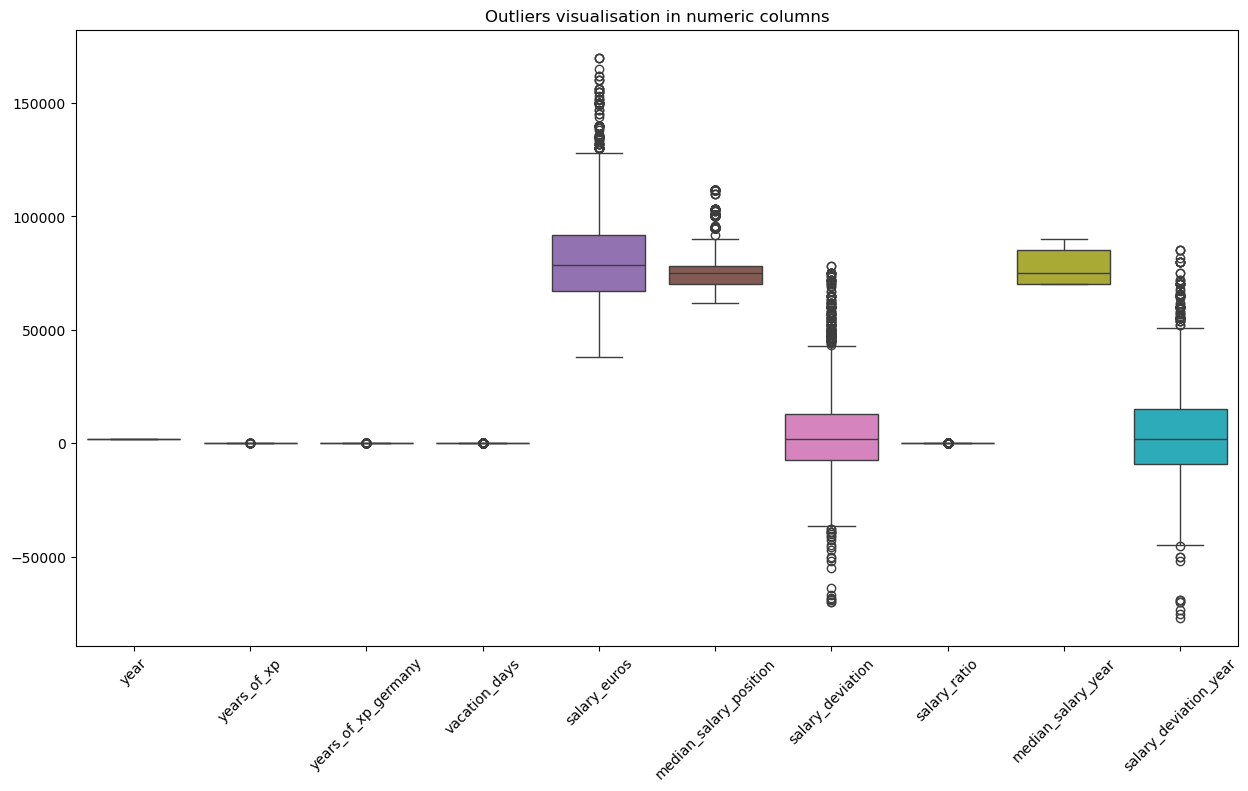

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = [
    "year", "years_of_xp", "years_of_xp_germany", "vacation_days",
    "salary_euros", "median_salary_position", "salary_deviation",
    "salary_ratio", "median_salary_year", "salary_deviation_year"
]

# Outliers visualisation 
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_filtered[numeric_columns])
plt.xticks(rotation=45)
plt.title("Outliers visualisation in numeric columns")
plt.show()


In [232]:
df_salary_eda = df_filtered

In [233]:
print(df_filtered.dtypes)


year                        float64
city                       category
position                   category
gender                       object
age                          object
seniority                    object
years_of_xp                 float64
years_of_xp_germany         float64
main_tech                  category
vacation_days               float64
company_size               category
salary_euros                float64
ai_impact                  category
ai_use                     category
median_salary_position      float64
salary_deviation            float64
salary_ratio                float64
median_salary_year          float64
salary_deviation_year       float64
median_salary_prev_year     float64
salary_growth_rate          float64
median_salary_trend         float64
dtype: object


In [234]:
df_filtered['position'].value_counts()

position
Backend Developer            1939
Data Scientist                362
Frontend Developer            295
DevOps Engineer               220
Product Manager               184
QA Engineer                   159
Mobile Developer              148
Engineering Manager           145
Machine Learning Engineer      95
BI & Data Engineer             85
C-Level Executive              61
Data & Business Analyst        57
Data Engineer                  55
Fullstack Developer            51
SAP Consultant                  4
BI Engineer                     2
Name: count, dtype: int64

In [235]:
df_salary_eda.shape

(3862, 22)

In [236]:
#Save the filtered data
df_salary_eda.to_csv("df_filtered.csv", index=False, encoding='utf-8')


### IV. Machine Learning

##### 1. Create Dataset for Machine Learning

In [237]:


# Assume your DataFrame is called df
columns_to_keep = [
    'year',
    'city',
    'position',
    'seniority',
    'years_of_xp',
    'years_of_xp_germany',
    'main_tech',
    'vacation_days',
    'company_size',
    'salary_euros',
    'ai_impact',
    'ai_use'
]

df_model = df_salary_eda[columns_to_keep]


In [238]:
df_model.shape

(3862, 12)

##### 2. Visualization

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4252340680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


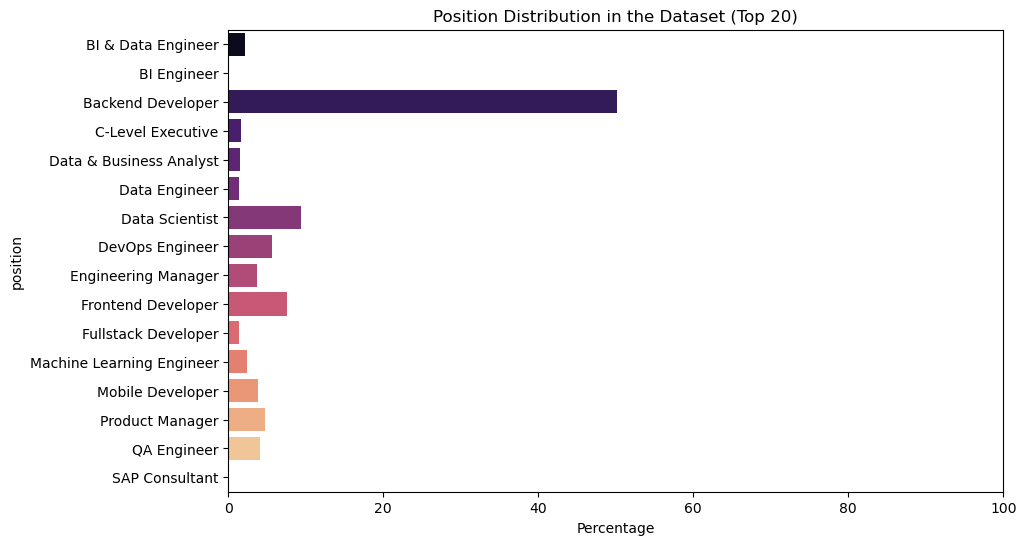

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage distribution based on df_filtered
position_counts = df_filtered['position'].value_counts(normalize=True) * 100

# Keep only the top 20 positions
top_positions_counts = position_counts.nlargest(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_positions_counts.values, 
    y=top_positions_counts.index, 
    palette="magma"
)
plt.xlabel("Percentage")
plt.title("Position Distribution in the Dataset (Top 20)")
plt.xlim(0, 100)
plt.show()



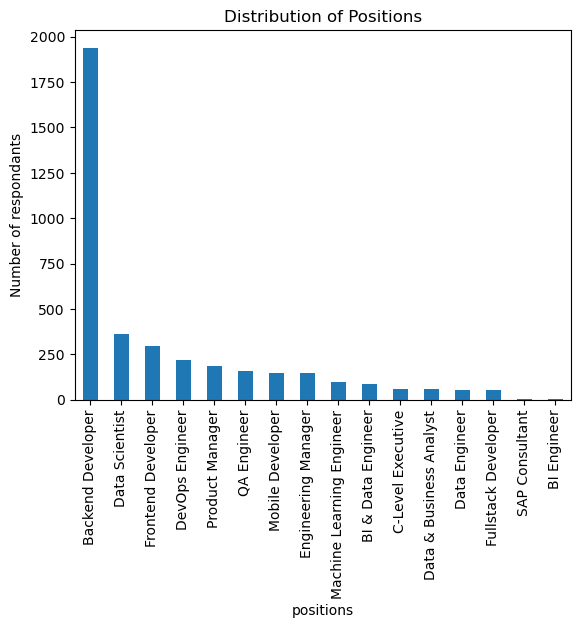

In [240]:
df_filtered['position'].value_counts().plot(kind='bar')
plt.xlabel("positions")
plt.ylabel("Number of respondants")
plt.title("Distribution of Positions")
plt.show()


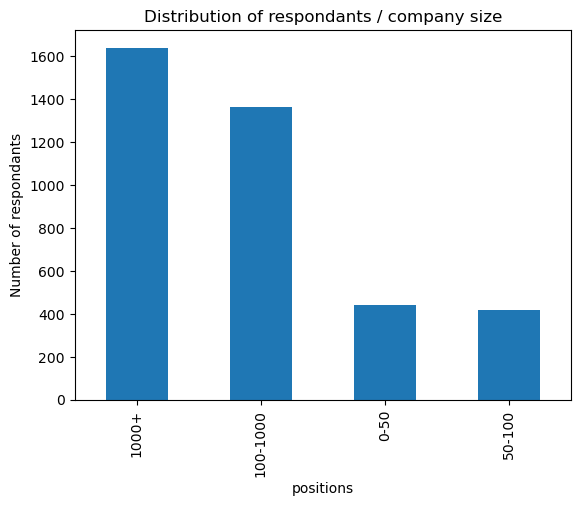

In [241]:
df_filtered['company_size'].value_counts().plot(kind='bar')
plt.xlabel("positions")
plt.ylabel("Number of respondants")
plt.title("Distribution of respondants / company size")
plt.show()

In [242]:
df_filtered.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,ai_impact,ai_use,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year,median_salary_prev_year,salary_growth_rate,median_salary_trend
225,2019.0,Munich,Fullstack Developer,Male,31.0,Senior,8.0,0.0,Java,26.0,...,No,No,67000.0,1000.0,1.014925,70000.0,-2000.0,70000.0,-0.146341,76000.0
4218,2024.0,Berlin,Frontend Developer,Unknown,Unknown,Junior,1.0,1.0,JavaScript,28.0,...,Moderate but noticeable,Yes,90000.0,-25000.0,0.722222,90000.0,-25000.0,70000.0,0.000000,70000.0
2888,2022.0,Berlin,C-Level Executive,Unknown,Unknown,Manager,5.0,5.0,Python,30.0,...,Invisible,No,111500.0,-26500.0,0.762332,80000.0,5000.0,90000.0,0.285714,80000.0
196,2019.0,Munich,Frontend Developer,Male,30.0,Senior,9.0,0.0,JavaScript,27.0,...,No,No,69500.0,5500.0,1.079137,70000.0,5000.0,82000.0,-0.088889,86000.0
197,2019.0,Munich,Machine Learning Engineer,Male,30.0,Mid-level,2.0,0.0,Python,30.0,...,No,No,85000.0,-23000.0,0.729412,70000.0,-8000.0,70000.0,-0.146341,76000.0


In [243]:
print(df_filtered.dtypes)

year                        float64
city                       category
position                   category
gender                       object
age                          object
seniority                    object
years_of_xp                 float64
years_of_xp_germany         float64
main_tech                  category
vacation_days               float64
company_size               category
salary_euros                float64
ai_impact                  category
ai_use                     category
median_salary_position      float64
salary_deviation            float64
salary_ratio                float64
median_salary_year          float64
salary_deviation_year       float64
median_salary_prev_year     float64
salary_growth_rate          float64
median_salary_trend         float64
dtype: object


In [244]:
df_filtered.isna().sum()

year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64

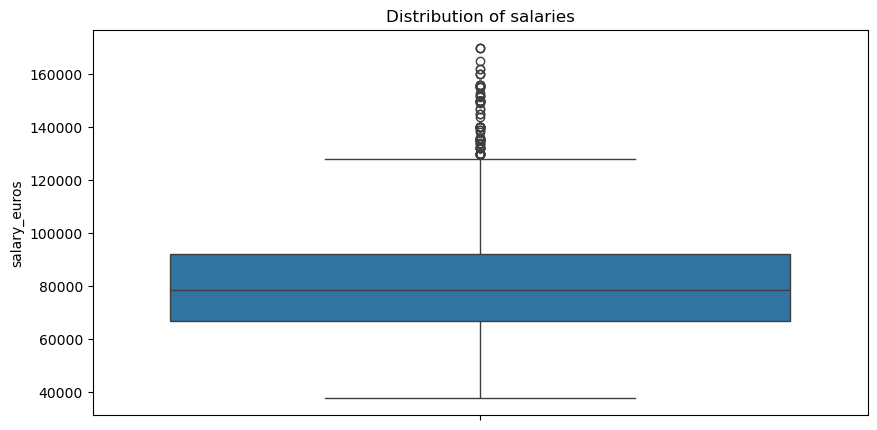

In [245]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(df_filtered['salary_euros'])
plt.title('Distribution of salaries')
plt.show()


In [246]:
df_model['salary_euros'].describe()


count      3862.000000
mean      81552.626974
std       20719.935465
min       38000.000000
25%       67000.000000
50%       78460.000000
75%       92000.000000
max      170000.000000
Name: salary_euros, dtype: float64

In [247]:
df_model.shape

(3862, 12)

#### 3. Feature Engineering



In [248]:
df_model.columns

Index(['year', 'city', 'position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'ai_impact', 'ai_use'],
      dtype='object')

In [249]:
df_model['ai_impact'].unique()

['No', 'Moderate but noticeable', 'Invisible', 'Great']
Categories (4, object): ['Great', 'Invisible', 'Moderate but noticeable', 'No']

In [250]:
df_model["company_size"].unique()

['0-50', '50-100', '100-1000', '1000+']
Categories (4, object): ['0-50' < '50-100' < '100-1000' < '1000+']

In [251]:
print(df_model["company_size"].apply(type).value_counts())


company_size
<class 'str'>    3862
Name: count, dtype: int64


In [252]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE


In [253]:




# Encode 'Seniority' as Ordinal 
seniority_mapping = {
    "Junior": 1,
    "Mid-level": 2,
    "Senior": 3,
    "Lead": 4,
    "Manager": 5
}
df_model["seniority_encoded"] = df_model["seniority"].map(seniority_mapping)

# Encode 'Company Size' 
company_size_mapping = {
    "0-50": 1,
    "50-100": 2,
    "100-1000": 3,
    "1000+": 4
}
df_model["company_size_encoded"] = df_model["company_size"].map(company_size_mapping)

# Convert to numeric variables: "company_size_encoded", "seniority_encoded"
df_model["company_size_encoded"] = df_model["company_size_encoded"].astype(int)
df_model["seniority_encoded"] = df_model["seniority_encoded"].astype(int)

#  Encode "ai_use"
df_model["ai_use"] = df_model["ai_use"].map({"Yes": 1, "No": 0})

#  One-Hot Encode 'Position' and 'City'
df_model = pd.get_dummies(df_model, columns=['position'], prefix='position', drop_first=False)
df_model = pd.get_dummies(df_model, columns=['city'], prefix='city', drop_first=False)

#  Salary Range Encoding

bins = [0, 45000, 65000, 85000, 110000, 150000, 500000]  
labels = [0, 1, 2, 3, 4, 5]  # Moins de classes, fusion des très petites

df_model['salary_range_encoded'] = pd.cut(df_model['salary_euros'], bins=bins, labels=labels)
df_model['salary_range_encoded'] = df_model['salary_range_encoded'].astype(int)


# Create Encoded Salary Range
df_model["salary_range_encoded"] = pd.cut(df_model["salary_euros"], bins=bins, labels=labels)

# Convert to Numeric 
df_model["salary_range_encoded"] = df_model["salary_range_encoded"].astype(int)


print("Encoding Completed")


Encoding Completed


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3438108542.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["seniority_encoded"] = df_model["seniority"].map(seniority_mapping)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3438108542.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["company_size_encoded"] = df_model["company_size"].map(company_size_mapping)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3438108542.py:21: SettingWithC

In [254]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer,r2_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


In [255]:
df_2019 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2019")
df_2020 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2020")
df_2021 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2021")
df_2022 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2022")
df_2023 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec_2023")
df_2024 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2024")


In [256]:
df_2019

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,2019-12-02 11:18:25.578,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,2019-12-02 11:18:35.142,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,2019-12-02 11:18:56.278,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,2019-12-02 11:19:08.079,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,2019-12-02 11:19:36.511,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2020-01-07 09:23:00.513,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,0.0,25.0,5.0,English,NaN,1000+,Product,unlimited,Telecom,NaN
987,2020-01-07 10:08:18.180,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,0.0,27.0,5.0,English,ING,1000+,Bank,unlimited,Finance / Insurance,NaN
988,2020-01-07 16:52:43.491,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,NaN,30.0,5.0,English,SAP,1000+,Product,unlimited,Сommerce,NaN
989,2020-01-08 11:18:41.226,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,NaN,26.0,6.0,English,NaN,1000+,Product,more than 1 year,Health,NaN


In [257]:
df_2020

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24 11:14:15.287,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24 11:14:15.940,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,2020-11-24 11:14:20.997,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,2020-11-24 11:15:24.486,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,2020-11-24 11:15:46.236,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,2021-12-09 14:45:24.368,30.0,Male,Duesseldorf,Project Manager,1,1,Junior,NaN,NaN,...,0,30,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,750
1304,2022-12-09 16:32:15.725,30.0,Female,Munich,Designer (UI/UX),5,1,Senior,NaN,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,300
1305,2023-11-27 15:21:36.369,19.0,Male,Madrid,Product Manager,0,0,Junior,Python,"Python, C/C++, Java / Scala, R,",...,3000,73,Self-employed (freelancer),Unlimited contract,English,101-1000,Product,No,0.0,800
1306,2024-11-23 02:22:44.616,20.0,Female,Berlin,Software Engineer,3,1,Junior,python,"Python, Javascript / Typescript, Java / Scala,...",...,3000,5,Part-time employee,Temporary contract,English,101-1000,Consulting / Agency,No,34.0,400


In [258]:
df_2021

,Name,City,Attachments,Status,Gender,Your city,Employment status,Your employment status,Position,Your position,...,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",About you (anonymously),Working hours per week
0,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Other,Product Specialist,...,74000.0,84000.0,75000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Software Engineer,NaN,...,65000.0,75000.0,65000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,52000.0,52000.0,48000.0,31,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Aachen,NaN,NaN,NaN,NaN,Working student,NaN,Other,Research Assistant,...,5113.0,5113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Berlin,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,70000.0,70000.0,51000.0,28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Software Engineer,NaN,...,58000.0,58000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1203,NaN,Other,NaN,NaN,NaN,Bremen,Full-time employee,NaN,Product Manager,NaN,...,72000.0,72000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1204,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Frontend Developer,NaN,...,75000.0,1200.0,0.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1205,NaN,Other,NaN,NaN,NaN,Erfurt,Full-time employee,NaN,QA Engineer,NaN,...,55000.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
df_2022

,City,Your city,Employment status,Your employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,...,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",Working hours per week,layoff affects you,company layoffs,Work From Home allowance
0,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,5,1,Middle,NaN,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,No,100 - 500
1,Other,Friedrichshafen,Full-time employee,NaN,Tech Lead / Team Lead,NaN,18,10,Head / Principal,NaN,...,89000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
2,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,11,3,Lead / Staff,NaN,...,105000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
3,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,15,7,Lead / Staff,NaN,...,90000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,over 1000 euros
4,Berlin,NaN,Full-time employee,NaN,Other,SRE,10,2,Middle,NaN,...,68000.0,28,NaN,NaN,NaN,NaN,NaN,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,15,10,Lead / Staff,NaN,...,115000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,500 - 1000
769,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,7,0,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
770,Other,Würzburg,Full-time employee,NaN,Software Engineer,NaN,15,2,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
771,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,18,6,Lead / Staff,NaN,...,89000.0,24,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [260]:
df_2023

,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,Main technology / programming language,...,company_hire_in_2023,company_industry,change_jobs,tc_new_job,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool,ai_other_tools
0,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,1,Senior,NaN,Kotlin,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Other,ChatGPT",NaN
1,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,14,4,Senior,NaN,Go,...,Yes,Financial Services,No,NaN,NaN,NaN,Invisible,No,NaN,NaN
2,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,3,2,Middle,NaN,Python,...,No,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Copilot,ChatGPT",NaN
3,Berlin,NaN,Full/Part-time employee,Data Scientist,NaN,7,7,Senior,NaN,Python,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,ChatGPT,NaN
4,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,6,2,Senior,NaN,JavaScript / Typescript,...,Yes,Insurance,No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Copilot",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,8,Senior,NaN,Python,...,Yes,Retail and Consumer Services,No,NaN,NaN,NaN,Invisible,Yes,"Copilot,ChatGPT",NaN
710,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,12,7,Senior,NaN,Python,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Invisible,No,NaN,NaN
711,Nuremberg,NaN,Full/Part-time employee,Backend Developer,NaN,16,16,Lead / Staff,NaN,C# / .NET,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Other,Copilot",Bing chat enterprise
712,Munich,NaN,Full/Part-time employee,Software / Solutions Architect,NaN,20,3,Lead / Staff,NaN,C# / .NET,...,No,Healthcare,No,NaN,NaN,NaN,Invisible,No,NaN,NaN


In [261]:
df_2024

,Age,time,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,...,company_hire_in_2024,company_industry,change_jobs,tc_new_job,unemployed_last_tc_salary,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool
0,38,12/9/2024 10:49,Berlin,NaN,Full/Part-time employee,Product Designer / UX/UI Designer/Researcher,NaN,8,2,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,37,12/9/2024 10:51,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,17,6,Senior,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",Yes,about the same,NaN,"Involuntarily, I was forced to look for a new job",4.0,Invisible,No,NaN
2,37,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,18,9,Staff / Lead / Manager,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,34,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,12,4,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
4,29,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,8,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,33,2/3/2025 00:53,Berlin,NaN,Full/Part-time employee,Quality Assurance (QA) Software Engineer,NaN,13,2,Mid-level,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,NaN,No,NaN
713,46,2/3/2025 21:30,Stuttgart,NaN,Full/Part-time employee,Software Engineer,NaN,10,1,Mid-level,...,I dont know,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Great,No,NaN
714,25,2/4/2025 08:53,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,7,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,39,2/4/2025 10:24,Munich,NaN,Full/Part-time employee,Backend Software Engineer,NaN,20,2,Senior,...,Yes,Legal Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


In [262]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level', 'Position (without seniority)', 'Years of experience', 'Your main technology / programming language', 'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus', 'Yearly stocks', 'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country', 'Yearly bonus one year ago. Only answer if staying in same country', 'Yearly stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Number of home office days per month', 'Main language at work', 'Company name ', 'Company size', 'Company type', 'Сontract duration', 'Company business sector', 0]
df_2020 columns: ['Timestamp', 'Age', 'Gender', 'City', 'Position ', 'Total years of experience', 'Years of experience in Germany', 'Seniority level', 'Your main technology / programming language', 'Other technologies/programming languages you use often', 'Yearly brutto salary (without bonus and stock

### I. DATA CLEANING 

#### 1. Columns cleaning per dataset

##### 1.a Dataset 2019 

In [263]:
df_2019.columns


Index([                                                                                         'Zeitstempel',
                                                                                                        'Age',
                                                                                                     'Gender',
                                                                                                       'City',
                                                                                            'Seniority level',
                                                                               'Position (without seniority)',
                                                                                        'Years of experience',
                                                                'Your main technology / programming language',
                                                            'Yearly brutto salary (without bonus and stocks)',
 

In [264]:
selected_columns = ['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)',
       'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 
       'Company size']

In [265]:
df_2019 = df_2019[selected_columns]

In [266]:
df_2019 = df_2019.rename(columns={
    'Zeitstempel': 'year', 
    'Gender': 'gender',
    'Age':'age',
    'City': 'city', 
    'Seniority level': 'seniority', 
    'Position (without seniority)': 'position', 
    'Years of experience': 'years_of_xp',  
    'Your main technology / programming language': 'main_tech',  
    'Yearly brutto salary (without bonus and stocks)': 'salary_euros',  
    'Yearly bonus': 'yearly_bonus',  
    'Yearly stocks': 'yearly_stocks',
    'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country': 'salary_2018',
    'Yearly bonus one year ago. Only answer if staying in same country': 'yearly_bonus_2018',
    'Yearly stocks one year ago. Only answer if staying in same country': 'yearly_stocks_2018',
    'Number of vacation days': 'vacation_days',
    'Company size': 'company_size', 
})

df_2019.sample(10)

,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size
0,2019-12-02 11:18:25.578,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,NaN,58000.0,1000.0,NaN,29.0,50-100
61,2019-12-02 12:13:02.290,40.0,Male,Berlin,Senior,Manager,15,Not Relevant,70000.0,NaN,NaN,65000.0,NaN,NaN,30.0,100-1000
857,2019-12-15 20:07:48.712,33.0,Male,Berlin,Senior,Backend Developer,11,Go,75000.0,NaN,7500.0,65000.0,NaN,NaN,25.5,100-1000
36,2019-12-02 11:44:10.425,37.0,Male,Berlin,Senior,Data Engineer,16,Scala,65000.0,NaN,NaN,NaN,NaN,NaN,28.0,1000+
727,2019-12-10 11:55:01.571,29.0,Male,Amsterdam,Senior,Frontend Developer,8,Javascript / Typescript,70000.0,NaN,NaN,62000.0,NaN,NaN,30.0,1000+
99,2019-12-02 13:41:40.887,30.0,Male,Berlin,Middle,Frontend Developer,7,Javascript / Typescript,56500.0,NaN,NaN,55000.0,NaN,NaN,28.0,100-1000
603,2019-12-05 22:56:31.767,48.0,Male,Berlin,NaN,System Administrator,18,Powershell,55000.0,NaN,NaN,55000.0,NaN,NaN,28.0,100-1000
557,2019-12-05 11:46:18.613,27.0,Male,Berlin,Senior,Data Engineer,5,Python,77000.0,11000.0,6000.0,70000.0,6000.0,0.0,28.0,1000+
308,2019-12-03 10:45:57.373,NaN,Male,Darmstadt,Senior,Backend Developer,10,Java,70000.0,0.0,NaN,NaN,NaN,NaN,26.0,100-1000
175,2019-12-02 16:23:23.738,42.0,Female,Munich,Middle,Product Manager,10,Not Relevant,68700.0,4000.0,NaN,NaN,NaN,NaN,30.0,50-100


In [267]:
df_2019.columns

Index(['year', 'age', 'gender', 'city', 'seniority', 'position', 'years_of_xp',
       'main_tech', 'salary_euros', 'yearly_bonus', 'yearly_stocks',
       'salary_2018', 'yearly_bonus_2018', 'yearly_stocks_2018',
       'vacation_days', 'company_size'],
      dtype='object')

In [268]:
df_2019['years_of_xp_germany'] = np.nan 
df_2019['ai_impact'] = "No"
df_2019['ai_use'] = "No" 
df_2019['ai_tool'] = "No"

In [269]:
df_2019.isna().sum()








year                     0
age                    109
gender                   0
city                     0
seniority               15
position                 1
years_of_xp              0
main_tech               14
salary_euros             1
yearly_bonus           461
yearly_stocks          788
salary_2018            388
yearly_bonus_2018      734
yearly_stocks_2018     852
vacation_days           60
company_size            14
years_of_xp_germany    991
ai_impact                0
ai_use                   0
ai_tool                  0
dtype: int64

In [270]:
df_2019.dtypes

year                   datetime64[ns]
age                           float64
gender                         object
city                           object
seniority                      object
position                       object
years_of_xp                     int64
main_tech                      object
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                   object
years_of_xp_germany           float64
ai_impact                      object
ai_use                         object
ai_tool                        object
dtype: object

In [271]:
numerical_columns = df_2019.select_dtypes(include='number').columns
df_2019['age'] = df_2019.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['age'].mode()[0]))
df_2019['seniority'] = df_2019.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['seniority'].mode()[0]))
df_2019['position'] = df_2019.groupby('years_of_xp')['position'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['position'].mode()[0]))
df_2019['main_tech'] = df_2019.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['main_tech'].mode()[0]))
df_2019['company_size'] = df_2019.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['company_size'].mode()[0]))
cols_zero_fill = ['yearly_bonus', 'yearly_stocks', 'salary_2018', 'yearly_bonus_2018', 'yearly_stocks_2018']
df_2019[cols_zero_fill] = df_2019[cols_zero_fill].fillna(0)
df_2019['years_of_xp_germany'] = df_2019['years_of_xp_germany'].fillna(0)

df_2019[numerical_columns] = df_2019[numerical_columns].apply(lambda x: x.fillna(x.median()))

df_2019.sample(10)





,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool
616,2019-12-06 08:11:51.666,31.0,Male,Berlin,Senior,Fullstack Developer,9,Javascript / Typescript,65000.0,0.0,0.0,60000.0,0.0,0.0,26.0,50-100,0.0,No,No,No
420,2019-12-04 13:58:52.192,24.0,Male,Amsterdam,Senior,Machine Learning Engineer,3,Python,75000.0,0.0,125.0,0.0,0.0,0.0,28.0,10-50,0.0,No,No,No
319,2019-12-03 11:39:33.262,29.0,Male,Dusseldorf,Senior,Backend Developer,8,Java,70000.0,0.0,0.0,0.0,0.0,0.0,25.0,1000+,0.0,No,No,No
47,2019-12-02 11:52:36.418,30.0,Male,Wolfsburg,Senior,Backend Developer,4,Java,75000.0,0.0,0.0,0.0,0.0,0.0,26.0,50-100,0.0,No,No,No
707,2019-12-10 09:36:37.401,32.0,Male,Amsterdam,Senior,Mobile Developer,11,Swift,65000.0,0.0,0.0,0.0,0.0,0.0,25.0,10-50,0.0,No,No,No
959,2019-12-27 23:28:45.552,38.0,Male,Amsterdam,Senior,DevOps,5,Not Relevant,100000.0,0.0,0.0,0.0,0.0,0.0,28.0,100-1000,0.0,No,No,No
975,2020-01-03 09:54:07.432,31.0,Male,Munich,Senior,DevOps,8,AWS,80000.0,0.0,0.0,0.0,0.0,0.0,28.0,100-1000,0.0,No,No,No
382,2019-12-03 23:25:30.242,28.0,Male,Munich,Senior,Backend Developer,7,Java,74000.0,6000.0,0.0,69000.0,6000.0,0.0,28.0,1000+,0.0,No,No,No
91,2019-12-02 13:23:35.681,31.0,Male,Frankfurt,Middle,System Administrator,10,"Linux-Stack, Networking",56300.0,10500.0,0.0,55000.0,5500.0,0.0,30.0,10-50,0.0,No,No,No
307,2019-12-03 10:43:24.084,42.0,Female,Berlin,Senior,Backend Developer,12,PHP,55000.0,0.0,0.0,55000.0,0.0,0.0,26.0,50-100,0.0,No,No,No


In [272]:
df_2019.isna().sum()

year                   0
age                    0
gender                 0
city                   0
seniority              0
position               0
years_of_xp            0
main_tech              0
salary_euros           0
yearly_bonus           0
yearly_stocks          0
salary_2018            0
yearly_bonus_2018      0
yearly_stocks_2018     0
vacation_days          0
company_size           0
years_of_xp_germany    0
ai_impact              0
ai_use                 0
ai_tool                0
dtype: int64

In [273]:
object_columns = df_2019.select_dtypes(include='object').columns

df_2019[object_columns] = df_2019[object_columns].apply(lambda x: x.astype('category'))

df_2019[object_columns] = df_2019[object_columns].apply(lambda x: x.fillna(x.mode()[0]))

df_2019.sample(10)


,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool
759,2019-12-10 21:52:07.675,28.0,Female,Warsaw,Senior,Fullstack Developer,5,R,155000.0,0.0,1.0,144000.0,1.0,0.0,32.0,100-1000,0.0,No,No,No
283,2019-12-03 09:49:46.307,28.0,Male,Frankfurt,Middle,Data Scientist,2,Python,55000.0,0.0,0.0,0.0,0.0,0.0,30.0,100-1000,0.0,No,No,No
320,2019-12-03 11:47:33.410,41.0,Male,Munich,Junior,Backend Developer,0,Java,55000.0,5000.0,0.0,32000.0,8000.0,0.0,30.0,1000+,0.0,No,No,No
112,2019-12-02 14:21:38.744,39.0,Male,Berlin,Senior,Backend Developer,16,Java,82000.0,0.0,0.0,63600.0,0.0,0.0,26.0,100-1000,0.0,No,No,No
29,2019-12-02 11:32:51.676,31.0,Male,Berlin,Senior,Backend Developer,8,PHP,60000.0,0.0,0.0,60000.0,0.0,0.0,24.0,100-1000,0.0,No,No,No
925,2019-12-20 18:05:21.128,31.0,Male,Berlin,Middle,Fullstack Developer,10,Javascript / Typescript,65000.0,0.0,0.0,65000.0,0.0,0.0,25.0,100-1000,0.0,No,No,No
126,2019-12-02 14:47:17.662,25.0,Male,Berlin,Middle,Business Analyst,4,Python,60000.0,0.0,0.0,0.0,60000.0,0.0,25.0,100-1000,0.0,No,No,No
603,2019-12-05 22:56:31.767,48.0,Male,Berlin,Senior,System Administrator,18,Powershell,55000.0,0.0,0.0,55000.0,0.0,0.0,28.0,100-1000,0.0,No,No,No
28,2019-12-02 11:32:45.807,31.0,Male,Berlin,Senior,QA,9,Java,67000.0,4000.0,0.0,0.0,0.0,0.0,20.0,100-1000,0.0,No,No,No
164,2019-12-02 15:59:23.659,29.0,Male,Krakow,Senior,QA,7,Java,45000.0,0.0,0.0,33000.0,0.0,0.0,26.0,100-1000,0.0,No,No,No


In [274]:
df_2019['year'] = pd.to_datetime(df_2019['year'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Extraire seulement l'année
df_2019['year_only'] = df_2019['year'].dt.year

# Afficher le résultat
print(df_2019[['year', 'year_only']])

                       year  year_only
0   2019-12-02 11:18:25.578       2019
1   2019-12-02 11:18:35.142       2019
2   2019-12-02 11:18:56.278       2019
3   2019-12-02 11:19:08.079       2019
4   2019-12-02 11:19:36.511       2019
..                      ...        ...
986 2020-01-07 09:23:00.513       2020
987 2020-01-07 10:08:18.180       2020
988 2020-01-07 16:52:43.491       2020
989 2020-01-08 11:18:41.226       2020
990 2020-01-08 22:20:07.799       2020

[991 rows x 2 columns]


In [275]:
df_2019.tail()

,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,...,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool,year_only
986,2020-01-07 09:23:00.513,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,64000.0,3000.0,0.0,25.0,1000+,0.0,No,No,No,2020
987,2020-01-07 10:08:18.180,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,67000.0,0.0,0.0,27.0,1000+,0.0,No,No,No,2020
988,2020-01-07 16:52:43.491,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,67000.0,9000.0,0.0,30.0,1000+,0.0,No,No,No,2020
989,2020-01-08 11:18:41.226,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,93000.0,5000.0,0.0,26.0,1000+,0.0,No,No,No,2020
990,2020-01-08 22:20:07.799,32.0,Male,Frankfurt,Middle,Fullstack Developer,5,Java,63000.0,0.0,...,0.0,0.0,0.0,30.0,1000+,0.0,No,No,No,2020


In [276]:
df_2019.dtypes

year                   datetime64[ns]
age                           float64
gender                       category
city                         category
seniority                    category
position                     category
years_of_xp                     int64
main_tech                    category
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                 category
years_of_xp_germany           float64
ai_impact                    category
ai_use                       category
ai_tool                      category
year_only                       int32
dtype: object

In [277]:
for cols, types in df_2019.dtypes.items():
    if types == 'object':
        df_2019[cols] = df_2019[cols].astype('category')

print(df_2019.dtypes)
    

year                   datetime64[ns]
age                           float64
gender                       category
city                         category
seniority                    category
position                     category
years_of_xp                     int64
main_tech                    category
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                 category
years_of_xp_germany           float64
ai_impact                    category
ai_use                       category
ai_tool                      category
year_only                       int32
dtype: object


In [278]:
df_2019['vacation_days'] = df_2019['vacation_days'].fillna(0)


In [279]:
df_2019['salary_wt_bonus_stocks']=df_2019['yearly_bonus']+ df_2019['yearly_stocks']+ df_2019['salary_euros']

In [280]:
df_2019['salary_bonus_stocks_2018'] = df_2019['salary_2018']+ df_2019['yearly_bonus_2018']+ df_2019['yearly_stocks_2018']

In [281]:
df_2019['year'] = pd.to_datetime(df_2019['year']).dt.year
print(df_2019['year'].unique())

[2019 2020]


In [282]:
df_2019 = df_2019[['year',
       'city',
       'position',
       'gender',
       'age',
       'seniority',
       'years_of_xp', 
       'years_of_xp_germany',
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'yearly_bonus',
       'yearly_stocks', 
       'salary_2018',
       'salary_bonus_stocks_2018',
       'yearly_bonus_2018',
       'yearly_stocks_2018',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [283]:
df_2019 = df_2019.drop(columns=['yearly_bonus', 'yearly_stocks','yearly_bonus_2018','yearly_stocks_2018'])

In [284]:
df_2019

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2018,salary_bonus_stocks_2018,ai_impact,ai_use,ai_tool
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,50-100,64000.0,65000.0,58000.0,59000.0,No,No,No
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,10-50,55000.0,55000.0,55000.0,55000.0,No,No,No
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,1000+,70000.0,70000.0,55000.0,55000.0,No,No,No
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,100-1000,63000.0,63000.0,0.0,0.0,No,No,No
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,50-100,66000.0,66000.0,56000.0,56000.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2020,Amsterdam,Backend Developer,Male,30.0,Senior,10,0.0,Python,25.0,1000+,71000.0,74000.0,64000.0,67000.0,No,No,No
987,2020,Amsterdam,Security Engineer,Male,28.0,Senior,7,0.0,Not Relevant,27.0,1000+,72000.0,72000.0,67000.0,67000.0,No,No,No
988,2020,Munich,Manager,Male,42.0,Senior,9,0.0,Not Relevant,30.0,1000+,68000.0,78000.0,67000.0,76000.0,No,No,No
989,2020,Berlin,Software Architect,Male,33.0,Senior,15,0.0,Javascript / Typescript,26.0,1000+,100000.0,103000.0,93000.0,98000.0,No,No,No


##### 1.b Dataset 2020

In [285]:
df_2020

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24 11:14:15.287,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24 11:14:15.940,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,2020-11-24 11:14:20.997,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,2020-11-24 11:15:24.486,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,2020-11-24 11:15:46.236,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,2021-12-09 14:45:24.368,30.0,Male,Duesseldorf,Project Manager,1,1,Junior,NaN,NaN,...,0,30,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,750
1304,2022-12-09 16:32:15.725,30.0,Female,Munich,Designer (UI/UX),5,1,Senior,NaN,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,300
1305,2023-11-27 15:21:36.369,19.0,Male,Madrid,Product Manager,0,0,Junior,Python,"Python, C/C++, Java / Scala, R,",...,3000,73,Self-employed (freelancer),Unlimited contract,English,101-1000,Product,No,0.0,800
1306,2024-11-23 02:22:44.616,20.0,Female,Berlin,Software Engineer,3,1,Junior,python,"Python, Javascript / Typescript, Java / Scala,...",...,3000,5,Part-time employee,Temporary contract,English,101-1000,Consulting / Agency,No,34.0,400


In [286]:
df_2020.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [287]:
selected_columns = ['Timestamp', 'City', 'Age', 'Gender', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Your main technology / programming language', 
       'Seniority level', 
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 
       'Main language at work', 'Company size']

In [288]:
len(selected_columns)

16

In [289]:
df_2020 = df_2020[selected_columns]


In [290]:
df_2020 = df_2020.rename(columns={
    'Timestamp':'year', 
    'Age': 'age',
    'Gender': 'gender',
    'City': 'city', 
    'Position ':'position',
    'Total years of experience':'years_of_xp',
    'Years of experience in Germany':'years_of_xp_germany',
    'Seniority level': 'seniority',
    'Your main technology / programming language': 'main_tech',
    'Yearly brutto salary (without bonus and stocks) in EUR':'salary_euros', 
    'Yearly bonus + stocks in EUR':'yearly_bonus_stocks',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'salary_2019', 
    'Annual bonus+stocks one year ago. Only answer if staying in same country':'yearly_bonus_stocks_2019',
    'Number of vacation days': 'vacation_days',
    'Company size': 'company_size', 
})


df_2020.tail()


,year,city,age,gender,position,years_of_xp,years_of_xp_germany,main_tech,seniority,salary_euros,yearly_bonus_stocks,salary_2019,yearly_bonus_stocks_2019,vacation_days,Main language at work,company_size
1303,2021-12-09 14:45:24.368,Duesseldorf,30.0,Male,Project Manager,1,1,NaN,Junior,52000.0,0,48000.0,0,30,German,1000+
1304,2022-12-09 16:32:15.725,Munich,30.0,Female,Designer (UI/UX),5,1,NaN,Senior,70000.0,NaN,NaN,NaN,30,English,101-1000
1305,2023-11-27 15:21:36.369,Madrid,19.0,Male,Product Manager,0,0,Python,Junior,43000.0,18000,30000.0,3000,73,English,101-1000
1306,2024-11-23 02:22:44.616,Berlin,20.0,Female,Software Engineer,3,1,python,Junior,40000.0,3000,40000.0,3000,5,English,101-1000
1307,2024-12-29 17:02:34.574,Jordan,20.0,Male,ML Engineer,2,0,c++,student,50000.0,2000,NaN,NaN,NaN,NaN,NaN


In [291]:
df_2020['year'] = pd.to_datetime(df_2020['year'], errors='coerce').dt.year


In [292]:
df_2020['ai_impact'] = 'Invisible'
df_2020['ai_use'] = 'No'
df_2020['ai_tool'] = "No"


In [293]:
df_2020.dtypes

year                          int32
city                         object
age                         float64
gender                       object
position                     object
years_of_xp                  object
years_of_xp_germany          object
main_tech                    object
seniority                    object
salary_euros                float64
yearly_bonus_stocks          object
salary_2019                 float64
yearly_bonus_stocks_2019     object
vacation_days                object
Main language at work        object
company_size                 object
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [294]:
df_2020['vacation_days'] = pd.to_numeric(df_2020['vacation_days'], errors='coerce')

import pandas as pd

# Loop through all columns and convert based on type
for col in df_2020.columns:
    if df_2020[col].dtype == 'object':  # Convert object to category
        df_2020[col] = df_2020[col].astype('category')
    else:  # Convert everything else to numeric (float64)
        df_2020[col] = pd.to_numeric(df_2020[col], errors='coerce')

# Verification
print(df_2021.dtypes)


print(df_2020.dtypes)


Name                                                                         float64
City                                                                          object
Attachments                                                                  float64
Status                                                                       float64
Gender                                                                       float64
Your city                                                                     object
Employment status                                                             object
Your employment status                                                       float64
Position                                                                      object
Your position                                                                 object
Total years of experience                                                      int64
Years of experience in Germany                                   

In [295]:
df_2020.isna().sum()

year                          0
city                          0
age                          30
gender                       11
position                      7
years_of_xp                  18
years_of_xp_germany          34
main_tech                   132
seniority                    12
salary_euros                  0
yearly_bonus_stocks         434
salary_2019                 383
yearly_bonus_stocks_2019    662
vacation_days                86
Main language at work        17
company_size                 19
ai_impact                     0
ai_use                        0
ai_tool                       0
dtype: int64

In [296]:
# Liste des colonnes numériques
numerical_columns = df_2020.select_dtypes(include='number').columns

# Imputation basée sur le mode (valeur la plus fréquente)
df_2020['age'] = df_2020.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['age'].mode()[0]))
df_2020['seniority'] = df_2020.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['seniority'].mode()[0]))
df_2020['position'] = df_2020.groupby('years_of_xp')['position'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['position'].mode()[0]))
df_2020['main_tech'] = df_2020.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['main_tech'].mode()[0]))
df_2020['company_size'] = df_2020.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['company_size'].mode()[0]))
df_2020['Main language at work'] = df_2020.groupby('main_tech')['Main language at work'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['Main language at work'].mode()[0]))

# Colonnes à remplir avec 0
cols_zero_fill = ['yearly_bonus_stocks', 'salary_2019', 'yearly_bonus_stocks_2019']
df_2020[cols_zero_fill] = df_2020[cols_zero_fill].fillna(0)

# Imputation de years_of_xp_germany avec 0
df_2020['years_of_xp_germany'] = df_2020['years_of_xp_germany'].fillna(0)

# Imputation des autres colonnes numériques avec la médiane
df_2020[numerical_columns] = df_2020[numerical_columns].apply(lambda x: x.fillna(x.median()))


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2772289667.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2020['age'] = df_2020.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['age'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2772289667.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2020['seniority'] = df_2020.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['seniority'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000

In [297]:
df_2020 = df_2020.dropna()

In [298]:
df_2020.isna().sum()

year                        0
city                        0
age                         0
gender                      0
position                    0
years_of_xp                 0
years_of_xp_germany         0
main_tech                   0
seniority                   0
salary_euros                0
yearly_bonus_stocks         0
salary_2019                 0
yearly_bonus_stocks_2019    0
vacation_days               0
Main language at work       0
company_size                0
ai_impact                   0
ai_use                      0
ai_tool                     0
dtype: int64

In [299]:
df_2020.dtypes

year                           int32
city                        category
age                          float64
gender                      category
position                    category
years_of_xp                 category
years_of_xp_germany         category
main_tech                   category
seniority                   category
salary_euros                 float64
yearly_bonus_stocks         category
salary_2019                  float64
yearly_bonus_stocks_2019    category
vacation_days                float64
Main language at work       category
company_size                category
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object

In [300]:
len(df_2020.columns)

19

In [301]:
df_2020['yearly_bonus_stocks_2019'].value_counts()

yearly_bonus_stocks_2019
0                                  852
5000                                33
10000                               25
60000                               16
3000                                15
                                  ... 
6900                                 1
42000                                1
41000                                1
7050                                 1
learning budget, bvg, gym, food      1
Name: count, Length: 132, dtype: int64

In [302]:
# Define the column name
column_name = 'yearly_bonus_stocks_2019'

# Check if the column exists; if not, create it with default value 0
if column_name not in df_2020.columns:
    df_2020[column_name] = 0  # You can set a default like 0 or 'Unknown'

# Now safely convert to numeric
df_2020[column_name] = pd.to_numeric(df_2020[column_name], errors='coerce')

# Fill NaN values with 0
df_2020[column_name] = df_2020[column_name].fillna(0)

# Display the column type to verify the conversion
print(df_2020[column_name].dtype)


float64


In [303]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1307
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      1284 non-null   int32   
 1   city                      1284 non-null   category
 2   age                       1284 non-null   float64 
 3   gender                    1284 non-null   category
 4   position                  1284 non-null   category
 5   years_of_xp               1284 non-null   category
 6   years_of_xp_germany       1284 non-null   category
 7   main_tech                 1284 non-null   category
 8   seniority                 1284 non-null   category
 9   salary_euros              1284 non-null   float64 
 10  yearly_bonus_stocks       1284 non-null   category
 11  salary_2019               1284 non-null   float64 
 12  yearly_bonus_stocks_2019  1284 non-null   float64 
 13  vacation_days             1284 non-null   float64 
 1

In [304]:
df_2020['salary_bonus_stocks_2019'] = df_2020['yearly_bonus_stocks_2019'] + df_2020['salary_2019']

In [305]:
# Ensure both salary_euros and yearly_bonus_stocks are numeric
df_2020['salary_euros'] = pd.to_numeric(df_2020['salary_euros'], errors='coerce')
df_2020['yearly_bonus_stocks'] = pd.to_numeric(df_2020['yearly_bonus_stocks'], errors='coerce')

# Fill NaN values with 0 to avoid errors during addition
df_2020['salary_euros'] = df_2020['salary_euros'].fillna(0)
df_2020['yearly_bonus_stocks'] = df_2020['yearly_bonus_stocks'].fillna(0)

# Now perform the addition safely
df_2020['salary_wt_bonus_stocks'] = df_2020['salary_euros'] + df_2020['yearly_bonus_stocks']

# Display column types to verify the conversion
print(df_2020[['salary_euros', 'yearly_bonus_stocks', 'salary_wt_bonus_stocks']].dtypes)


salary_euros              float64
yearly_bonus_stocks       float64
salary_wt_bonus_stocks    float64
dtype: object


In [306]:
df_2020 = df_2020[['year',
       'city',
       'position',
       'gender',
       'age',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'yearly_bonus_stocks',
       'salary_2019', 
       'salary_bonus_stocks_2019',
       'yearly_bonus_stocks_2019',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [307]:
len(df_2020.columns)

20

In [308]:
df_2020 = df_2020.drop(['yearly_bonus_stocks_2019'], axis=1)
df_2020 = df_2020.drop(['yearly_bonus_stocks'], axis=1)

df_2020.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2019,salary_bonus_stocks_2019,ai_impact,ai_use,ai_tool
0,2020,Munich,Software Engineer,Male,26.0,Senior,5,3,TypeScript,30.0,51-100,80000.0,85000.0,75000.0,85000.0,Invisible,No,No
1,2020,Berlin,Backend Developer,Male,26.0,Senior,7,4,Ruby,28.0,101-1000,80000.0,80000.0,82000.0,87000.0,Invisible,No,No
2,2020,Berlin,Software Engineer,Male,29.0,Lead,12,6,Javascript / Typescript,30.0,101-1000,120000.0,240000.0,100000.0,200000.0,Invisible,No,No
3,2020,Berlin,Frontend Developer,Male,28.0,Junior,4,1,Javascript,24.0,51-100,54000.0,54000.0,0.0,0.0,Invisible,No,No
4,2020,Berlin,Backend Developer,Male,37.0,Senior,17,6,C# .NET,29.0,101-1000,62000.0,62000.0,62000.0,62000.0,Invisible,No,No


##### 1.c Dataset 2021

In [309]:
df_2021

,Name,City,Attachments,Status,Gender,Your city,Employment status,Your employment status,Position,Your position,...,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",About you (anonymously),Working hours per week
0,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Other,Product Specialist,...,74000.0,84000.0,75000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Software Engineer,NaN,...,65000.0,75000.0,65000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,52000.0,52000.0,48000.0,31,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Aachen,NaN,NaN,NaN,NaN,Working student,NaN,Other,Research Assistant,...,5113.0,5113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Berlin,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,70000.0,70000.0,51000.0,28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Software Engineer,NaN,...,58000.0,58000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1203,NaN,Other,NaN,NaN,NaN,Bremen,Full-time employee,NaN,Product Manager,NaN,...,72000.0,72000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1204,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Frontend Developer,NaN,...,75000.0,1200.0,0.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1205,NaN,Other,NaN,NaN,NaN,Erfurt,Full-time employee,NaN,QA Engineer,NaN,...,55000.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
for col in df_2021.columns:
    print(f"Valeurs uniques de {col}:")
    print(df_2021[col].unique())  
    print("\n")


Valeurs uniques de Name:
[nan]


Valeurs uniques de City:
[nan 'Aachen' 'Berlin' 'Bonn' 'Cologne' 'Darmstadt' 'Dusseldorf'
 'Frankfurt' 'Hamburg' 'Heidelberg' 'Ingolstadt' 'Karlsruhe' 'Konstanz'
 'Mannheim' 'Munich' 'Nuremberg' 'Regensburg' 'Rosenheim' 'Stuttgart'
 'Wolfsburg' 'Other']


Valeurs uniques de Attachments:
[nan]


Valeurs uniques de Status:
[nan]


Valeurs uniques de Gender:
[nan]


Valeurs uniques de Your city:
[nan 'Berlin' 'Trier' 'Amsterdam' 'Mainz' 'Kempten' 'Schleswig-Holstein'
 'Augsburg' 'Odessa' 'Böblingen' 'Lindau (Bodensee), Insel' 'Vienna'
 'Dresden' 'Braunschweig' 'Dortmund' 'Erfurt' 'Lingen' 'Kathmandu, Nepal'
 'London' 'Sindelfingen' 'Kathmandu' 'Wiesbaden' 'Mülheim' 'Ennepetal'
 'Freiburg' 'Jena' 'Würzburg' 'Leipzig' 'Hannover' 'Bremen' 'Rheine'
 'bamberg' 'Potsdam']


Valeurs uniques de Employment status:
['Full-time employee' 'Working student' 'Self-employed (freelancer)'
 'Part-time employee' 'Founder' 'Other']


Valeurs uniques de Your employment status

In [311]:
df_2021.columns

Index(['Name', 'City', 'Attachments', 'Status', 'Gender', 'Your city',
       'Employment status', 'Your employment status', 'Position',
       'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?',
       'Have you completed your higher education in Germany?',
       'Your main technology', 'Just a few more general questions',
       'Company size', 'Annual Brutto salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (

In [312]:
selected_columns = ['City', 'Position',
       'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Main technology / programming language',
       'Your main technology', 'Company size', 
       'Annual Brutto salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days']

In [313]:
df_2021 = df_2021[selected_columns]
df_2021

,City,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Main technology / programming language,Your main technology,Company size,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days
0,NaN,Other,Product Specialist,16,8,Senior,NodeJS,NaN,1000+,74000.0,84000.0,75000.0,30
1,NaN,Software Engineer,NaN,6,6,Senior,C# / .NET,NaN,101-1000,65000.0,75000.0,65000.0,30
2,NaN,Data Scientist,NaN,2,2,Middle,Python,NaN,11-50,52000.0,52000.0,48000.0,31
3,Aachen,Other,Research Assistant,4,1,Junior,Python,NaN,1000+,5113.0,5113.0,NaN,NaN
4,Berlin,Data Scientist,NaN,6,2,Middle,Python,NaN,101-1000,70000.0,70000.0,51000.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,Other,Software Engineer,NaN,5,0,Middle,Java,NaN,101-1000,58000.0,58000.0,NaN,30
1203,Other,Product Manager,NaN,8,8,Lead,Other,NaN,51-100,72000.0,72000.0,NaN,30
1204,Other,Frontend Developer,NaN,8,0,Senior,JavaScript / Typescript,NaN,51-100,75000.0,1200.0,0.0,30
1205,Other,QA Engineer,NaN,3,1,Middle,JavaScript / Typescript,NaN,11-50,55000.0,55000.0,NaN,NaN


In [314]:
df_2021 = df_2021.rename(columns={'City':'city',
       'Position':'position',
       'Your position':'your_position',
       'Total years of experience':'years_of_xp', 
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority', 
       'Main technology / programming language':'main_tech',
       'Company size':'company_size', 
       'Annual Brutto salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual bonus+stocks one year ago.':'yearly_bonus_stocks_2020',
       'Number of vacation days':'vacation_days'
       })

In [315]:
df_2021.isna().sum()

city                           3
position                       0
your_position               1133
years_of_xp                    0
years_of_xp_germany            0
seniority                      7
main_tech                      0
Your main technology        1140
company_size                   5
salary_euros                  21
salary_wt_bonus_stocks        21
yearly_bonus_stocks_2020     394
vacation_days                 68
dtype: int64

In [316]:
for cols, types in df_2021.dtypes.items():
    if types == 'object':
        df_2021[cols] = df_2021[cols].astype('category')

print(df_2021.dtypes)

city                        category
position                    category
your_position               category
years_of_xp                    int64
years_of_xp_germany            int64
seniority                   category
main_tech                   category
Your main technology        category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
yearly_bonus_stocks_2020     float64
vacation_days               category
dtype: object


In [317]:
import numpy as np

# Ensure categorical columns are treated as strings
categorical_cols = ['your_position', 'seniority', 'main_tech', 'Your main technology', 'city']

for col in categorical_cols:
    if col in df_2021.columns:
        df_2021[col] = df_2021[col].astype(str)

# Fill NaN values for categorical columns based on related features
if 'years_of_xp' in df_2021.columns:
    if 'your_position' in df_2021.columns:
        df_2021['your_position'] = df_2021.groupby('years_of_xp')['your_position'].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
        )

    if 'seniority' in df_2021.columns:
        df_2021['seniority'] = df_2021.groupby('years_of_xp')['seniority'].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
        )

if 'position' in df_2021.columns and 'main_tech' in df_2021.columns:
    df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

if 'main_tech' in df_2021.columns and 'Your main technology' in df_2021.columns:
    df_2021['Your main technology'] = df_2021.groupby('main_tech')['Your main technology'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

# Fill missing values for 'city' using the most common city for the same company size
if 'company_size' in df_2021.columns and 'city' in df_2021.columns:
    df_2021['city'] = df_2021.groupby('company_size')['city'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )


# Verify missing values after filling
print("Missing values after filling:", df_2021.isnull().sum())


Missing values after filling: city                          5
position                      0
your_position                 0
years_of_xp                   0
years_of_xp_germany           0
seniority                     0
main_tech                     0
Your main technology          0
company_size                  5
salary_euros                 21
salary_wt_bonus_stocks       21
yearly_bonus_stocks_2020    394
vacation_days                68
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3505206005.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3505206005.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['city'] = df_2021.groupby('company_size')['city'].transform(


In [318]:

# Ensure 'yearly_bonus_stocks_2020' is numeric
df_2021['yearly_bonus_stocks_2020'] = pd.to_numeric(df_2021['yearly_bonus_stocks_2020'], errors='coerce')

# Fill 'yearly_bonus_stocks_2020' based on company_size (use median)
df_2021['yearly_bonus_stocks_2020'] = df_2021.groupby('company_size')['yearly_bonus_stocks_2020'].transform(
    lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2021['yearly_bonus_stocks_2020'].median())
)

# Fill 'vacation_days' based on position (use mode)
df_2021['vacation_days'] = df_2021.groupby('position')['vacation_days'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['vacation_days'].mode()[0])
)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4022861362.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['yearly_bonus_stocks_2020'] = df_2021.groupby('company_size')['yearly_bonus_stocks_2020'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4022861362.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['vacation_days'] = df_2021.groupby('position')['vacation_days'].transform(


In [319]:
df_2021["year"] = 2021
df_2021['ai_impact'] = 'Invisible'
df_2021['ai_use'] = 'No'
df_2021['ai_tool'] = 'No'

In [320]:
# Define required columns for all datasets
required_columns = ['salary_euros', 'yearly_bonus_stocks_2020', 'salary_2020', 'salary_bonus_stocks_2020']

# Ensure all columns exist in df_2021, if not, create them with default values
for col in required_columns:
    if col not in df_2021.columns:
        df_2021[col] = 0  # Default value


In [321]:
df_2021 = df_2021[["year",
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2020',
       'salary_bonus_stocks_2020',
       'yearly_bonus_stocks_2020',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [322]:
df_2021 = df_2021.drop(['yearly_bonus_stocks_2020'], axis=1)

In [323]:
len(df_2021.columns)

17

In [324]:
df_2021

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2020,salary_bonus_stocks_2020,ai_impact,ai_use,ai_tool
0,2021,nan,Other,Product Specialist,Senior,16,8,NodeJS,30,1000+,74000.0,84000.0,0,0,Invisible,No,No
1,2021,nan,Software Engineer,nan,Senior,6,6,C# / .NET,30,101-1000,65000.0,75000.0,0,0,Invisible,No,No
2,2021,nan,Data Scientist,nan,Middle,2,2,Python,31,11-50,52000.0,52000.0,0,0,Invisible,No,No
3,2021,Aachen,Other,Research Assistant,Junior,4,1,Python,30,1000+,5113.0,5113.0,0,0,Invisible,No,No
4,2021,Berlin,Data Scientist,nan,Middle,6,2,Python,28,101-1000,70000.0,70000.0,0,0,Invisible,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2021,Other,Software Engineer,nan,Middle,5,0,Java,30,101-1000,58000.0,58000.0,0,0,Invisible,No,No
1203,2021,Other,Product Manager,nan,Lead,8,8,Other,30,51-100,72000.0,72000.0,0,0,Invisible,No,No
1204,2021,Other,Frontend Developer,nan,Senior,8,0,JavaScript / Typescript,30,51-100,75000.0,1200.0,0,0,Invisible,No,No
1205,2021,Other,QA Engineer,nan,Middle,3,1,JavaScript / Typescript,30,11-50,55000.0,55000.0,0,0,Invisible,No,No


In [325]:
df_2021.dtypes

year                           int64
city                          object
position                    category
your_position                 object
seniority                     object
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                     object
vacation_days               category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2020                    int64
salary_bonus_stocks_2020       int64
ai_impact                     object
ai_use                        object
ai_tool                       object
dtype: object

In [326]:
df_2021['vacation_days'] = pd.to_numeric(df_2021['vacation_days'], errors='coerce')
df_2021['vacation_days'] = df_2021['vacation_days'].fillna(0).astype(int)

In [327]:
for cols, types in df_2021.dtypes.items():
    if types == 'object':
        df_2021[cols] = df_2021[cols].astype('category')

print(df_2021.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days                  int64
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2020                    int64
salary_bonus_stocks_2020       int64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [328]:
df_2021.isna().sum()

year                         0
city                         5
position                     0
your_position                0
seniority                    0
years_of_xp                  0
years_of_xp_germany          0
main_tech                    0
vacation_days                0
company_size                 5
salary_euros                21
salary_wt_bonus_stocks      21
salary_2020                  0
salary_bonus_stocks_2020     0
ai_impact                    0
ai_use                       0
ai_tool                      0
dtype: int64

In [329]:

numerical_columns = df_2021.select_dtypes(include='number').columns

# Imputation basée sur le mode (valeur la plus fréquente)
df_2021['seniority'] = df_2021.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['seniority'].mode()[0]))
df_2021['position'] = df_2021.groupby(['main_tech', 'seniority','salary_wt_bonus_stocks'])['position'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['position'].mode()[0])
)
df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['main_tech'].mode()[0]))
df_2021['company_size'] = df_2021.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['company_size'].mode()[0]))


# Imputation de years_of_xp_germany avec 0
df_2021['years_of_xp_germany'] = df_2021['years_of_xp_germany'].fillna(0)

# Imputation des autres colonnes numériques avec la médiane
df_2021[numerical_columns] = df_2021[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Vérification des valeurs manquantes après traitement
print(df_2021.isnull().sum())


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['position'] = df_2021.groupby(['main_tech', 'seniority','salary_wt_bonus_stocks'])['position'].transform(


year                         0
city                         5
position                    21
your_position                0
seniority                    0
years_of_xp                  0
years_of_xp_germany          0
main_tech                   21
vacation_days                0
company_size                 5
salary_euros                 0
salary_wt_bonus_stocks       0
salary_2020                  0
salary_bonus_stocks_2020     0
ai_impact                    0
ai_use                       0
ai_tool                      0
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['main_tech'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['company_size'] = df_2021.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['company_size'].mode()[0]))


In [330]:
# Liste des colonnes où on supprime les NaN
cols_to_clean = ['city', 'company_size']

# Vérifier que les colonnes existent avant d'appliquer dropna()
df_2021.dropna(subset=[col for col in cols_to_clean if col in df_2021.columns], inplace=True)

# Vérifier s'il reste des NaN
missing_values = df_2021[cols_to_clean].isna().sum() if set(cols_to_clean).issubset(df_2021.columns) else "Certaines colonnes sont absentes"
print(missing_values)


city            0
company_size    0
dtype: int64


##### 1.d Dataset 2022

In [331]:
df_2022

,City,Your city,Employment status,Your employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,...,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",Working hours per week,layoff affects you,company layoffs,Work From Home allowance
0,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,5,1,Middle,NaN,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,No,100 - 500
1,Other,Friedrichshafen,Full-time employee,NaN,Tech Lead / Team Lead,NaN,18,10,Head / Principal,NaN,...,89000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
2,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,11,3,Lead / Staff,NaN,...,105000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
3,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,15,7,Lead / Staff,NaN,...,90000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,over 1000 euros
4,Berlin,NaN,Full-time employee,NaN,Other,SRE,10,2,Middle,NaN,...,68000.0,28,NaN,NaN,NaN,NaN,NaN,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,15,10,Lead / Staff,NaN,...,115000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,500 - 1000
769,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,7,0,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
770,Other,Würzburg,Full-time employee,NaN,Software Engineer,NaN,15,2,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
771,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,18,6,Lead / Staff,NaN,...,89000.0,24,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [332]:
df_2022.columns

Index(['City', 'Your city', 'Employment status', 'Your employment status',
       'Position', 'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?', 'Your main technology',
       'Just a few more general questions', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoff affects you', 'company layoffs',
       'Work From Hom

In [333]:
selected_columns = ['City',
       'Position', 'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Main technology / programming language',
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days']

In [334]:
df_2022 = df_2022[selected_columns]

In [335]:
df_2022 = df_2022.rename(columns={'City':'city',
       'Position': 'position',
       'Your position':'your_position', 
       'Total years of experience':'years_of_xp',
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority',
       'Main technology / programming language':'main_tech',
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual bonus+stocks one year ago.':'yearly_bonus_stocks_2021',
       'Number of vacation days':'vacation_days',

})

In [336]:
df_2022["year"] = 2022
df_2022['ai_impact'] = 'Invisible'
df_2022['ai_use'] = 'No'
df_2022['ai_tool'] = "No"
df_2022["salary_2021"] = 0

In [337]:
for cols in df_2022.columns:
    if df_2022[cols].dtypes == 'int64' or df_2022[cols].dtypes == 'float64':
        df_2022[cols] = df_2022[cols].fillna(0)

In [338]:
df_2022.isna().sum()

city                          0
position                      0
your_position               731
years_of_xp                   0
years_of_xp_germany           0
seniority                     2
main_tech                     0
company_size                  0
salary_euros                  0
salary_wt_bonus_stocks        0
yearly_bonus_stocks_2021      0
vacation_days                36
year                          0
ai_impact                     0
ai_use                        0
ai_tool                       0
salary_2021                   0
dtype: int64

In [339]:
df_2022['salary_bonus_stocks_2021'] = df_2022['salary_2021'] + df_2022['yearly_bonus_stocks_2021']
df_2022.drop(['yearly_bonus_stocks_2021'], axis=1, inplace=True)

In [340]:
df_2022 = df_2022[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2021',
       'salary_bonus_stocks_2021',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [341]:
df_2022.dtypes

year                          int64
city                         object
position                     object
your_position                object
seniority                    object
years_of_xp                   int64
years_of_xp_germany           int64
main_tech                    object
vacation_days                object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2021                   int64
salary_bonus_stocks_2021    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [342]:
for cols, types in df_2022.dtypes.items():
    if types == 'object':
        df_2022[cols] = df_2022[cols].astype('category')

print(df_2022.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days               category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2021                    int64
salary_bonus_stocks_2021     float64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [343]:
df_2022['vacation_days'] = pd.to_numeric(df_2022['vacation_days'], errors='coerce')
df_2022['vacation_days'] = df_2022['vacation_days'].fillna(0).astype(int)

In [344]:
df_2022

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2021,salary_bonus_stocks_2021,ai_impact,ai_use,ai_tool
0,2022,Berlin,Backend Developer,NaN,Middle,5,1,Go,28,1000+,92000.0,0.0,0,0.0,Invisible,No,No
1,2022,Other,Tech Lead / Team Lead,NaN,Head / Principal,18,10,C / C++,30,11-50,84000.0,91000.0,0,89000.0,Invisible,No,No
2,2022,Berlin,Engineering Manager,NaN,Lead / Staff,11,3,Java,30,1000+,105000.0,115000.0,0,105000.0,Invisible,No,No
3,2022,Berlin,Engineering Manager,NaN,Lead / Staff,15,7,JavaScript / Typescript,30,1000+,115000.0,140000.0,0,90000.0,Invisible,No,No
4,2022,Berlin,Other,SRE,Middle,10,2,Other,28,101-1000,67000.0,76000.0,0,68000.0,Invisible,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2022,Berlin,Software Engineer,NaN,Lead / Staff,15,10,C / C++,30,1000+,105000.0,120000.0,0,115000.0,Invisible,No,No
769,2022,Berlin,Software Engineer,NaN,Senior,7,0,Java,30,51-100,65000.0,65000.0,0,0.0,Invisible,No,No
770,2022,Other,Software Engineer,NaN,Senior,15,2,SAP / ABAP,30,51-100,67800.0,74800.0,0,0.0,Invisible,No,No
771,2022,Berlin,Backend Developer,NaN,Lead / Staff,18,6,Go,24,11-50,120000.0,145000.0,0,89000.0,Invisible,No,No


##### 1.e Dataset 2023

In [345]:
df_2023

,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,Main technology / programming language,...,company_hire_in_2023,company_industry,change_jobs,tc_new_job,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool,ai_other_tools
0,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,1,Senior,NaN,Kotlin,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Other,ChatGPT",NaN
1,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,14,4,Senior,NaN,Go,...,Yes,Financial Services,No,NaN,NaN,NaN,Invisible,No,NaN,NaN
2,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,3,2,Middle,NaN,Python,...,No,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Copilot,ChatGPT",NaN
3,Berlin,NaN,Full/Part-time employee,Data Scientist,NaN,7,7,Senior,NaN,Python,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,ChatGPT,NaN
4,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,6,2,Senior,NaN,JavaScript / Typescript,...,Yes,Insurance,No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Copilot",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,8,Senior,NaN,Python,...,Yes,Retail and Consumer Services,No,NaN,NaN,NaN,Invisible,Yes,"Copilot,ChatGPT",NaN
710,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,12,7,Senior,NaN,Python,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Invisible,No,NaN,NaN
711,Nuremberg,NaN,Full/Part-time employee,Backend Developer,NaN,16,16,Lead / Staff,NaN,C# / .NET,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Other,Copilot",Bing chat enterprise
712,Munich,NaN,Full/Part-time employee,Software / Solutions Architect,NaN,20,3,Lead / Staff,NaN,C# / .NET,...,No,Healthcare,No,NaN,NaN,NaN,Invisible,No,NaN,NaN


In [346]:
df_2023.columns

Index(['City', 'Your city', 'Employment status', 'Position', 'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your seniority level',
       'Main technology / programming language', 'Your main technology',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual gross salary with bonus and stocks in EUR',
       'Annual gross salary+bonus+stocks one year ago.',
       'Number of vacation days', 'Hourly rate in EUR',
       'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoff affects you', 'company_layoffs',
       'Work From Home allowance', 'Did you already find a new job?',
  

In [347]:
selected_columns = ['City', 'Your city', 'Position', 'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your seniority level',
       'Main technology / programming language', 
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual gross salary with bonus and stocks in EUR',
       'Annual gross salary+bonus+stocks one year ago.',
       'Number of vacation days', 
       'ai_impact',
       'ai_use',
       'ai_tool']

In [348]:
df_2023 = df_2023[selected_columns]


In [349]:
df_2023 = df_2023.rename(columns={'City':'city',
       'Position':'position', 
       'Your position':'your_position', 
       'Total years of experience':'years_of_xp',
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority', 
       'Your seniority level':'your_seniority_level',
       'Main technology / programming language':'main_tech', 
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual gross salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual gross salary+bonus+stocks one year ago.': 'salary_bonus_stocks_2022',
       'Number of vacation days':'vacation_days', 
       'ai_impact':'ai_impact',
       'ai_use':'ai_use',
       'ai_tool': 'ai_tool'
       })

In [350]:
df_2023['year'] = 2023

In [351]:
df_2023['salary_2022'] = 0

In [352]:
df_2023 = df_2023[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'your_seniority_level',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2022',
       'salary_bonus_stocks_2022',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [353]:
df_2023.dtypes

year                          int64
city                         object
position                     object
your_position                object
seniority                    object
your_seniority_level         object
years_of_xp                   int64
years_of_xp_germany           int64
main_tech                    object
vacation_days                object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2022                   int64
salary_bonus_stocks_2022    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [354]:
df_2023['vacation_days'] = pd.to_numeric(df_2023['vacation_days'], errors='coerce')
df_2023['vacation_days'] = df_2023['vacation_days'].fillna(0).astype(int)



In [355]:
for cols, types in df_2023.dtypes.items():
    if types == 'object':
        df_2023[cols] = df_2023[cols].astype('category')

print(df_2023.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
your_seniority_level        category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days                  int64
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2022                    int64
salary_bonus_stocks_2022     float64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [356]:
df_2023.isna().sum()

year                          0
city                          0
position                      0
your_position               681
seniority                     3
your_seniority_level        710
years_of_xp                   0
years_of_xp_germany           0
main_tech                     0
vacation_days                 0
company_size                  0
salary_euros                 20
salary_wt_bonus_stocks       20
salary_2022                   0
salary_bonus_stocks_2022    197
ai_impact                    19
ai_use                       14
ai_tool                     310
dtype: int64

In [357]:
df_2023['seniority'] = df_2023['your_seniority_level'].combine_first(df_2023['seniority'])
df_2023 = df_2023.drop(columns=['your_seniority_level'])

In [358]:
for cols in df_2023.columns:
    if df_2023[cols].dtypes == 'int64' or df_2023[cols].dtypes == 'float64':
        df_2023[cols] = df_2023[cols].fillna(0)

In [359]:

numerical_columns = df_2023.select_dtypes(include='number').columns
categorical_columns = df_2023.select_dtypes(include='object').columns

# 🔹 Fill Missing Categorical Values Based on Related Groups

# Group by (years_of_xp, main_tech) to fill 'your_position'
df_2023['your_position'] = df_2023.groupby(['years_of_xp', 'main_tech'])['your_position'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['your_position'].mode()[0])
)


# Group by (years_of_xp, seniority) to fill 'seniority'
df_2023['seniority'] = df_2023.groupby(['years_of_xp', 'main_tech'])['seniority'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['seniority'].mode()[0])
)

# Group by (position, main_tech) to fill 'main_tech'
df_2023['main_tech'] = df_2023.groupby(['position', 'seniority'])['main_tech'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['main_tech'].mode()[0])
)

# Group by (city, company_size) to fill 'company_size'
df_2023['company_size'] = df_2023.groupby(['city'])['company_size'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['company_size'].mode()[0])
)

# 🔹 Fill AI-related Values Based on Seniority
df_2023['ai_impact'] = df_2023.groupby(['seniority'])['ai_impact'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_impact'].mode()[0])
)
df_2023['ai_use'] = df_2023.groupby(['seniority'])['ai_use'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_use'].mode()[0])
)
df_2023['ai_tool'] = df_2023.groupby(['main_tech'])['ai_tool'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_tool'].mode()[0])
)

# 🔹 Fill Missing Salary Data with Median Based on Seniority & Tech
df_2023['salary_bonus_stocks_2022'] = df_2023.groupby(['seniority', 'main_tech'])['salary_bonus_stocks_2022'].transform(
    lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2023['salary_bonus_stocks_2022'].median())
)



# 🔹 Fill 'vacation_days' Based on Position & Seniority
df_2023['vacation_days'] = df_2023.groupby(['position', 'seniority'])['vacation_days'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['vacation_days'].mode()[0])
)

# 🔹 Ensure 'years_of_xp_germany' is Filled with 0
df_2023['years_of_xp_germany'] = df_2023['years_of_xp_germany'].fillna(0)

df_2023[numerical_columns] = df_2023.groupby('years_of_xp')[numerical_columns].transform(
    lambda x: x.fillna(x.median())
)

print(df_2023.isnull().sum())


year                        0
city                        0
position                    0
your_position               0
seniority                   0
years_of_xp                 0
years_of_xp_germany         0
main_tech                   0
vacation_days               0
company_size                0
salary_euros                0
salary_wt_bonus_stocks      0
salary_2022                 0
salary_bonus_stocks_2022    0
ai_impact                   0
ai_use                      0
ai_tool                     0
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2023['your_position'] = df_2023.groupby(['years_of_xp', 'main_tech'])['your_position'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2023['seniority'] = df_2023.groupby(['years_of_xp', 'main_tech'])['seniority'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True i

In [360]:
df_2023

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2022,salary_bonus_stocks_2022,ai_impact,ai_use,ai_tool
0,2023,Berlin,Software Engineer,Data Analyst,Senior,15,1,Kotlin,0,1000+,100000.0,110000.0,0,0.0,Great,Yes,"Other,ChatGPT"
1,2023,Berlin,Software Engineer,Data Analyst,Senior,14,4,Go,27,1000+,95000.0,95000.0,0,88000.0,Invisible,No,ChatGPT
2,2023,Berlin,Software Engineer,Product Analyst,Middle,3,2,Python,28,up to 10,45000.0,45000.0,0,45000.0,Great,Yes,"Copilot,ChatGPT"
3,2023,Berlin,Data Scientist,Data Analyst,Senior,7,7,Python,30,1000+,118000.0,170000.0,0,155000.0,Great,Yes,ChatGPT
4,2023,Munich,Software Engineer,Data Analyst,Senior,6,2,JavaScript / Typescript,30,11-50,85000.0,115000.0,0,75000.0,Great,Yes,"ChatGPT,Copilot"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2023,Berlin,Software Engineer,Data Analyst,Senior,15,8,Python,30,1000+,87000.0,113000.0,0,86000.0,Invisible,Yes,"Copilot,ChatGPT"
710,2023,Munich,Software Engineer,Data Analyst,Senior,12,7,Python,30,1000+,95000.0,110000.0,0,100000.0,Invisible,No,ChatGPT
711,2023,Nuremberg,Backend Developer,Data Analyst,Lead / Staff,16,16,C# / .NET,35,51-100,77730.0,77730.0,0,76020.0,Great,Yes,"ChatGPT,Other,Copilot"
712,2023,Munich,Software / Solutions Architect,Data Analyst,Lead / Staff,20,3,C# / .NET,30,1000+,118000.0,130000.0,0,120000.0,Invisible,No,ChatGPT


##### 1.f Dataset 2024

In [361]:
df_2024

,Age,time,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,...,company_hire_in_2024,company_industry,change_jobs,tc_new_job,unemployed_last_tc_salary,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool
0,38,12/9/2024 10:49,Berlin,NaN,Full/Part-time employee,Product Designer / UX/UI Designer/Researcher,NaN,8,2,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,37,12/9/2024 10:51,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,17,6,Senior,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",Yes,about the same,NaN,"Involuntarily, I was forced to look for a new job",4.0,Invisible,No,NaN
2,37,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,18,9,Staff / Lead / Manager,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,34,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,12,4,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
4,29,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,8,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,33,2/3/2025 00:53,Berlin,NaN,Full/Part-time employee,Quality Assurance (QA) Software Engineer,NaN,13,2,Mid-level,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,NaN,No,NaN
713,46,2/3/2025 21:30,Stuttgart,NaN,Full/Part-time employee,Software Engineer,NaN,10,1,Mid-level,...,I dont know,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Great,No,NaN
714,25,2/4/2025 08:53,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,7,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,39,2/4/2025 10:24,Munich,NaN,Full/Part-time employee,Backend Software Engineer,NaN,20,2,Senior,...,Yes,Legal Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


In [362]:
df_2024.columns

Index(['Age', 'time', 'City', 'Your city', 'Employment status', 'Position',
       'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Your main technology',
       'Other technologies/programming languages you use often',
       'Years in the current workplace', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual TC one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoffs_impact_you', 'company_layoffs',
       'Did you already find a new job?', 'Do you currently search for a job?',
       'company_hire_in_2024', 'company_industry', 'ch

In [363]:
selected_columns = ['time', 'City', 'Position',
       'Your position', 'Total years of experience',
       'Main technology / programming language',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level',
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual TC one year ago.', 'Number of vacation days',
       'ai_impact', 'ai_use', 'ai_tool']

In [364]:
df_2024 = df_2024[selected_columns]

In [365]:
df_2024 = df_2024.rename(columns={'time':'year', 
       'City':'city', 
       'Position':'position',
       'Your position':'your_position',
       'Total years of experience':'years_of_xp',
       'Main technology / programming language': 'main_tech',  
       'Years of experience in Germany':'years_of_xp_germany', 
       'Seniority level':'seniority',
       'Your seniority level':'your_seniority_level',
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual TC one year ago.':'salary_bonus_stocks_2023',
       'Number of vacation days':'vacation_days',
       'ai_impact':'ai_impact', 
       'ai_use':'ai_use', 
       'ai_tool':'ai_tool',
})

In [366]:
df_2024["salary_2023"] = df_2024["salary_bonus_stocks_2023"] * (df_2024["salary_euros"] / df_2024["salary_wt_bonus_stocks"])


In [367]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                    65
years_of_xp_germany           0
seniority                    11
your_seniority_level        716
company_size                  0
salary_euros                 17
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days               113
ai_impact                    80
ai_use                       72
ai_tool                     211
salary_2023                 289
dtype: int64

In [368]:
df_2024.dtypes

year                         object
city                         object
position                     object
your_position                object
years_of_xp                   int64
main_tech                    object
years_of_xp_germany           int64
seniority                    object
your_seniority_level         object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_bonus_stocks_2023    float64
vacation_days                object
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2023                 float64
dtype: object

In [369]:
df_2024['vacation_days'] = pd.to_numeric(df_2024['vacation_days'], errors='coerce')
df_2024['vacation_days'] = df_2024['vacation_days'].fillna(0).astype(int)

In [370]:
df_2024['year'] = df_2024['year'].str.extract(r'(\d{4})')

df_2024['year'] = pd.to_numeric(df_2024['year'], errors='coerce').astype('Int64')

print(df_2024['year'].unique())
print(df_2024.dtypes)

<IntegerArray>
[2024, 2025]
Length: 2, dtype: Int64
year                          Int64
city                         object
position                     object
your_position                object
years_of_xp                   int64
main_tech                    object
years_of_xp_germany           int64
seniority                    object
your_seniority_level         object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_bonus_stocks_2023    float64
vacation_days                 int64
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2023                 float64
dtype: object


In [371]:
df_2024['year'].unique()

<IntegerArray>
[2024, 2025]
Length: 2, dtype: Int64

In [372]:
for cols, types in df_2024.dtypes.items():
    if types == 'object':
        df_2024[cols] = df_2024[cols].astype('category')

print(df_2024.dtypes)

year                           Int64
city                        category
position                    category
your_position               category
years_of_xp                    int64
main_tech                   category
years_of_xp_germany            int64
seniority                   category
your_seniority_level        category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_bonus_stocks_2023     float64
vacation_days                  int64
ai_impact                   category
ai_use                      category
ai_tool                     category
salary_2023                  float64
dtype: object


In [373]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                    65
years_of_xp_germany           0
seniority                    11
your_seniority_level        716
company_size                  0
salary_euros                 17
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days                 0
ai_impact                    80
ai_use                       72
ai_tool                     211
salary_2023                 289
dtype: int64

In [374]:
df_2024['main_tech'] = df_2024.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['main_tech'].mode()[0]))

df_2024['seniority'] = df_2024.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['seniority'].mode()[0]))

df_2024['salary_euros'] = df_2024.groupby(['years_of_xp', 'seniority', 'main_tech'])['salary_euros'].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2024['salary_euros'].median()))

for col in ['ai_impact', 'ai_use', 'ai_tool']:
    df_2024[col] = df_2024.groupby('main_tech')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024[col].mode()[0]))



/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4024478809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2024['main_tech'] = df_2024.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['main_tech'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4024478809.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2024['salary_euros'] = df_2024.groupby(['years_of_xp', 'seniority', 'main_tech'])['salary_euros'].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2024['salary_euros'].

In [375]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                     0
years_of_xp_germany           0
seniority                     0
your_seniority_level        716
company_size                  0
salary_euros                  0
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days                 0
ai_impact                     0
ai_use                        0
ai_tool                       0
salary_2023                 289
dtype: int64

In [376]:
df_2024 = df_2024[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros',
       'salary_wt_bonus_stocks',
       'salary_2023', 
       'salary_bonus_stocks_2023',
       'ai_impact',
       'ai_use',
       'ai_tool']]


In [377]:
df_2024

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2023,salary_bonus_stocks_2023,ai_impact,ai_use,ai_tool
0,2024,Berlin,Product Designer / UX/UI Designer/Researcher,NaN,Senior,8,2,Other,28,101-1000,65000.0,65000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,2024,Berlin,Backend Software Engineer,NaN,Senior,17,6,PHP,30,101-1000,90000.0,90000.0,88000.000000,88000.0,Invisible,No,"OpenAI ChatGPT,Microsoft Copilot"
2,2024,Berlin,Site Reliability Engineer,NaN,Staff / Lead / Manager,18,9,Cloud (AWS / Azure / GCP),26,1000,110000.0,118000.0,99745.762712,107000.0,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,2024,Berlin,Site Reliability Engineer,NaN,Senior,12,4,Cloud (AWS / Azure / GCP),29,101-1000,80500.0,90000.0,71555.555556,80000.0,Moderate but noticeable,No,OpenAI ChatGPT
4,2024,Berlin,Backend Software Engineer,NaN,Senior,8,2,Java / Scala / Kotlin,30,1000,110000.0,140000.0,102142.857143,130000.0,Moderate but noticeable,No,OpenAI ChatGPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2025,Berlin,Quality Assurance (QA) Software Engineer,NaN,Mid-level,13,2,Java / Scala / Kotlin,0,1000,86000.0,90000.0,NaN,NaN,Moderate but noticeable,No,OpenAI ChatGPT
713,2025,Stuttgart,Software Engineer,NaN,Mid-level,10,1,JavaScript / TypeScript,30,101-1000,70000.0,70000.0,70000.000000,70000.0,Great,No,OpenAI ChatGPT
714,2025,Munich,Software Engineer,NaN,Senior,7,2,Java / Scala / Kotlin,28,11-50,70000.0,70000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,2025,Munich,Backend Software Engineer,NaN,Senior,20,2,Java / Scala / Kotlin,28,11-50,87000.0,87000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


### II. CONCATENATED DATASET

In [378]:
df_2019.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018',
       'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [379]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [380]:
df_2021.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020',
       'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [381]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [382]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [383]:
df_2020.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019',
       'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [384]:
df_2021.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020',
       'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [385]:
df_2022.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2021',
       'salary_bonus_stocks_2021', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [386]:
df_2023.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2022',
       'salary_bonus_stocks_2022', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [387]:
df_2024.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2023',
       'salary_bonus_stocks_2023', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [388]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")


df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [389]:
df_2019 = df_2019[df_2019['year'] == 2019]
df_2024 = df_2024[df_2024['year'] == 2024]

In [390]:
df_2019 = df_2019.reset_index(drop=True)
df_2020 = df_2020.reset_index(drop=True)
df_2021 = df_2021.reset_index(drop=True)
df_2022 = df_2022.reset_index(drop=True)
df_2023 = df_2023.reset_index(drop=True)
df_2024 = df_2024.reset_index(drop=True)





df_final = pd.concat([df_2019,df_2020, df_2021, df_2022, df_2023, df_2024], axis=0, ignore_index=True)



In [391]:
# 1. Compute the median salary per position:
median_salary_by_position = df_final.groupby('position')['salary_euros'].median()

# 2. Map this median to each respondent:
df_final['median_salary_position'] = df_final['position'].map(median_salary_by_position)

# 3. Create new features based on the position median:
df_final['salary_deviation'] = df_final['salary_euros'] - df_final['median_salary_position']
df_final['salary_ratio'] = df_final['salary_euros'] / df_final['median_salary_position']

# 4. Compute the median salary per year from df_final:
median_salary_by_year = df_final.groupby('year')['salary_euros'].median().reset_index()
median_salary_by_year.rename(columns={'salary_euros': 'median_salary_year'}, inplace=True)

# 5. Merge the annual median into df_final:
df_final = df_final.merge(median_salary_by_year, on='year', how='left')

# 6. Create a feature for deviation from the annual median:
df_final['salary_deviation_year'] = df_final['salary_euros'] - df_final['median_salary_year']

# Display the first few rows of the updated DataFrame:
df_final.head()




,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,...,NaN,NaN,NaN,NaN,NaN,67000.0,-3000.0,0.955224,70000.0,-6000.0
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-17000.0,0.763889,70000.0,-15000.0
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,...,NaN,NaN,NaN,NaN,NaN,71750.0,-1750.0,0.975610,70000.0,0.0
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-9000.0,0.875000,70000.0,-7000.0
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-4000.0,0.942857,70000.0,-4000.0


In [392]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      5634 non-null   Int64  
 1   city                      5634 non-null   object 
 2   position                  5614 non-null   object 
 3   gender                    2255 non-null   object 
 4   age                       2255 non-null   float64
 5   seniority                 5632 non-null   object 
 6   years_of_xp               5634 non-null   object 
 7   years_of_xp_germany       5634 non-null   object 
 8   main_tech                 5614 non-null   object 
 9   vacation_days             5634 non-null   float64
 10  company_size              5634 non-null   object 
 11  salary_euros              5634 non-null   float64
 12  salary_wt_bonus_stocks    5617 non-null   float64
 13  salary_2018               971 non-null    float64
 14  salary_b

In [393]:
df_final.isnull().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      2
years_of_xp                    0
years_of_xp_germany            0
main_tech                     20
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks        17
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [394]:
for col in df_final.columns:
    print(f"Valeurs uniques de {col}:")
    print(df_final[col].unique())  
    print("\n")

Valeurs uniques de year:
<IntegerArray>
[2019, 2020, 2021, 2022, 2023, 2024]
Length: 6, dtype: Int64


Valeurs uniques de city:
['Berlin' 'Hamburg' 'Frankfurt' 'Munich' 'Cologne' 'Düsseldorf'
 'Wolfsburg' 'MA' 'Leipzig' 'Nuremberg' 'Krakow' 'Prague' 'Wroclaw'
 'Stuttgart' 'London' 'Karlsruhe' 'Ingolstadt' 'Riga' 'Bern' 'Moscow'
 'Darmstadt' 'Dusseldorf' 'Kyiv' 'Freiburg' 'Amsterdam' 'Vienna'
 'Pforzheim' 'Kassel ' 'Madrid' 'Marburg' 'Warsaw' 'Hannover' 'Paris'
 'Milan' 'Odesa' 'Cork' 'Zug' 'Heidelberg' 'Brussels' 'Bielefeld' 'Dublin'
 'Jyvaskyla' 'Toulouse' 'Dubai' 'Zurich' 'Lingen' 'Dresden' 'Lugano'
 'Walldorf' 'Schleswig-Holstein' 'Braunschweig' 'Kaiserslautern'
 'Eindhoven' 'Saint Petersburg' 'Eindhoven ' 'Leeuwarden' 'Hilversum'
 'Gdańsk' 'Gothenburg' 'Almere' 'Limassol' 'Stockholm' 'Tampere' 'Bayern'
 'Rotterdam' 'Antwerpen' 'Tallinn' 'Koblenz' 'Würzburg ' 'Bremen'
 'Lausanne' 'Nizhny Novgorod ' 'Saint-Petersburg ' 'Minsk' 'Konstanz area'
 'Kempten' 'Münster' 'Erlangen' 'Moldova'

In [395]:
df_final["salary_wt_bonus_stocks"] = df_final.groupby(["position", "company_size"])["salary_wt_bonus_stocks"].transform(lambda x: x.fillna(x.median()))

df_final["salary_wt_bonus_stocks"] = df_final.groupby("position")["salary_wt_bonus_stocks"].transform(lambda x: x.fillna(x.median()))

global_median = df_final["salary_wt_bonus_stocks"].median()
df_final["salary_wt_bonus_stocks"].fillna(global_median, inplace=True)




/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3840651338.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["salary_wt_bonus_stocks"].fillna(global_median, inplace=True)


In [396]:
df_final.isnull().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      2
years_of_xp                    0
years_of_xp_germany            0
main_tech                     20
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [397]:
# Liste des colonnes catégoriques à traiter
categorical_columns = ["city", "seniority", "years_of_xp", "years_of_xp_germany", 
                        "main_tech", "company_size", "ai_impact", "ai_use", "ai_tool"]

for col in categorical_columns:
    print(f"🔹 Traitement de la colonne: {col}")  # Suivi de l'avancement

    # 1️⃣ Remplissage avec la valeur la plus fréquente par groupe (position + company_size)
    most_frequent_by_group = df_final.groupby(["position", "company_size"], dropna=False)[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    df_final = df_final.merge(most_frequent_by_group.rename(f"{col}_fill"), on=["position", "company_size"], how="left")
    df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
    df_final.drop(columns=[f"{col}_fill"], inplace=True)  # Nettoyage

    # 2️⃣ Remplissage basé uniquement sur la position si nécessaire
    most_frequent_by_position = df_final.groupby("position", dropna=False)[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    df_final = df_final.merge(most_frequent_by_position.rename(f"{col}_fill"), on="position", how="left")
    df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
    df_final.drop(columns=[f"{col}_fill"], inplace=True)  # Nettoyage

    # 3️⃣ Remplissage avec la valeur la plus fréquente de toute la colonne
    if df_final[col].isna().sum() > 0:  # Vérifier s'il reste des NaN
        global_mode = df_final[col].mode().iloc[0] if not df_final[col].mode().empty else "Unknown"
        df_final[col].fillna(global_mode, inplace=True)



🔹 Traitement de la colonne: city
🔹 Traitement de la colonne: seniority


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

🔹 Traitement de la colonne: years_of_xp
🔹 Traitement de la colonne: years_of_xp_germany
🔹 Traitement de la colonne: main_tech


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

🔹 Traitement de la colonne: company_size
🔹 Traitement de la colonne: ai_impact
🔹 Traitement de la colonne: ai_use
🔹 Traitement de la colonne: ai_tool


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [398]:
df_final.isna().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [399]:
df_final.dtypes

year                          Int64
city                         object
position                     object
gender                       object
age                         float64
seniority                    object
years_of_xp                  object
years_of_xp_germany          object
main_tech                    object
vacation_days               float64
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2018                 float64
salary_bonus_stocks_2018    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2019                 float64
salary_bonus_stocks_2019    float64
your_position                object
salary_2020                 float64
salary_bonus_stocks_2020    float64
salary_2021                 float64
salary_bonus_stocks_2021    float64
salary_2022                 float64
salary_bonus_stocks_2022    float64
salary_2023                 

In [400]:
df_final = df_final.drop(columns=['your_seniority_level','ai_tool'], errors='ignore')

df_final['age'] = df_final['age'].fillna("Unknown")
df_final['gender'] = df_final['gender'].fillna("Unknown")




In [401]:
for col, types in df_final.dtypes.items():
    if types == 'object':
       df_final[col].astype('category')

df_final.isna().sum()
     

year                           0
city                           0
position                      20
gender                         0
age                            0
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_deviation              20
salary_rat

In [402]:
columns_to_remove = ['salary_wt_bonus_stocks']
df_final = df_final.drop(columns=columns_to_remove, errors='ignore')

print(df_final.columns)


Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')


In [403]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer,r2_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np


In [404]:
df_2019 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2019")
df_2020 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2020")
df_2021 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2021")
df_2022 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2022")
df_2023 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec_2023")
df_2024 = pd.read_excel("it_eu_salary_survey.xlsx",sheet_name= "Dec 2024")


In [405]:
df_2019

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,2019-12-02 11:18:25.578,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,2019-12-02 11:18:35.142,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,2019-12-02 11:18:56.278,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,2019-12-02 11:19:08.079,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,2019-12-02 11:19:36.511,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2020-01-07 09:23:00.513,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,0.0,25.0,5.0,English,NaN,1000+,Product,unlimited,Telecom,NaN
987,2020-01-07 10:08:18.180,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,0.0,27.0,5.0,English,ING,1000+,Bank,unlimited,Finance / Insurance,NaN
988,2020-01-07 16:52:43.491,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,NaN,30.0,5.0,English,SAP,1000+,Product,unlimited,Сommerce,NaN
989,2020-01-08 11:18:41.226,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,NaN,26.0,6.0,English,NaN,1000+,Product,more than 1 year,Health,NaN


In [406]:
df_2020

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24 11:14:15.287,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24 11:14:15.940,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,2020-11-24 11:14:20.997,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,2020-11-24 11:15:24.486,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,2020-11-24 11:15:46.236,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,2021-12-09 14:45:24.368,30.0,Male,Duesseldorf,Project Manager,1,1,Junior,NaN,NaN,...,0,30,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,750
1304,2022-12-09 16:32:15.725,30.0,Female,Munich,Designer (UI/UX),5,1,Senior,NaN,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,300
1305,2023-11-27 15:21:36.369,19.0,Male,Madrid,Product Manager,0,0,Junior,Python,"Python, C/C++, Java / Scala, R,",...,3000,73,Self-employed (freelancer),Unlimited contract,English,101-1000,Product,No,0.0,800
1306,2024-11-23 02:22:44.616,20.0,Female,Berlin,Software Engineer,3,1,Junior,python,"Python, Javascript / Typescript, Java / Scala,...",...,3000,5,Part-time employee,Temporary contract,English,101-1000,Consulting / Agency,No,34.0,400


In [407]:
df_2021

,Name,City,Attachments,Status,Gender,Your city,Employment status,Your employment status,Position,Your position,...,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",About you (anonymously),Working hours per week
0,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Other,Product Specialist,...,74000.0,84000.0,75000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Software Engineer,NaN,...,65000.0,75000.0,65000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,52000.0,52000.0,48000.0,31,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Aachen,NaN,NaN,NaN,NaN,Working student,NaN,Other,Research Assistant,...,5113.0,5113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Berlin,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,70000.0,70000.0,51000.0,28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Software Engineer,NaN,...,58000.0,58000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1203,NaN,Other,NaN,NaN,NaN,Bremen,Full-time employee,NaN,Product Manager,NaN,...,72000.0,72000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1204,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Frontend Developer,NaN,...,75000.0,1200.0,0.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1205,NaN,Other,NaN,NaN,NaN,Erfurt,Full-time employee,NaN,QA Engineer,NaN,...,55000.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [408]:
df_2022

,City,Your city,Employment status,Your employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,...,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",Working hours per week,layoff affects you,company layoffs,Work From Home allowance
0,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,5,1,Middle,NaN,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,No,100 - 500
1,Other,Friedrichshafen,Full-time employee,NaN,Tech Lead / Team Lead,NaN,18,10,Head / Principal,NaN,...,89000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
2,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,11,3,Lead / Staff,NaN,...,105000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
3,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,15,7,Lead / Staff,NaN,...,90000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,over 1000 euros
4,Berlin,NaN,Full-time employee,NaN,Other,SRE,10,2,Middle,NaN,...,68000.0,28,NaN,NaN,NaN,NaN,NaN,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,15,10,Lead / Staff,NaN,...,115000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,500 - 1000
769,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,7,0,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
770,Other,Würzburg,Full-time employee,NaN,Software Engineer,NaN,15,2,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
771,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,18,6,Lead / Staff,NaN,...,89000.0,24,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [409]:
df_2023

,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,Main technology / programming language,...,company_hire_in_2023,company_industry,change_jobs,tc_new_job,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool,ai_other_tools
0,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,1,Senior,NaN,Kotlin,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Other,ChatGPT",NaN
1,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,14,4,Senior,NaN,Go,...,Yes,Financial Services,No,NaN,NaN,NaN,Invisible,No,NaN,NaN
2,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,3,2,Middle,NaN,Python,...,No,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Copilot,ChatGPT",NaN
3,Berlin,NaN,Full/Part-time employee,Data Scientist,NaN,7,7,Senior,NaN,Python,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,ChatGPT,NaN
4,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,6,2,Senior,NaN,JavaScript / Typescript,...,Yes,Insurance,No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Copilot",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,8,Senior,NaN,Python,...,Yes,Retail and Consumer Services,No,NaN,NaN,NaN,Invisible,Yes,"Copilot,ChatGPT",NaN
710,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,12,7,Senior,NaN,Python,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Invisible,No,NaN,NaN
711,Nuremberg,NaN,Full/Part-time employee,Backend Developer,NaN,16,16,Lead / Staff,NaN,C# / .NET,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Other,Copilot",Bing chat enterprise
712,Munich,NaN,Full/Part-time employee,Software / Solutions Architect,NaN,20,3,Lead / Staff,NaN,C# / .NET,...,No,Healthcare,No,NaN,NaN,NaN,Invisible,No,NaN,NaN


In [410]:
df_2024

,Age,time,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,...,company_hire_in_2024,company_industry,change_jobs,tc_new_job,unemployed_last_tc_salary,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool
0,38,12/9/2024 10:49,Berlin,NaN,Full/Part-time employee,Product Designer / UX/UI Designer/Researcher,NaN,8,2,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,37,12/9/2024 10:51,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,17,6,Senior,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",Yes,about the same,NaN,"Involuntarily, I was forced to look for a new job",4.0,Invisible,No,NaN
2,37,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,18,9,Staff / Lead / Manager,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,34,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,12,4,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
4,29,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,8,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,33,2/3/2025 00:53,Berlin,NaN,Full/Part-time employee,Quality Assurance (QA) Software Engineer,NaN,13,2,Mid-level,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,NaN,No,NaN
713,46,2/3/2025 21:30,Stuttgart,NaN,Full/Part-time employee,Software Engineer,NaN,10,1,Mid-level,...,I dont know,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Great,No,NaN
714,25,2/4/2025 08:53,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,7,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,39,2/4/2025 10:24,Munich,NaN,Full/Part-time employee,Backend Software Engineer,NaN,20,2,Senior,...,Yes,Legal Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


In [411]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level', 'Position (without seniority)', 'Years of experience', 'Your main technology / programming language', 'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus', 'Yearly stocks', 'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country', 'Yearly bonus one year ago. Only answer if staying in same country', 'Yearly stocks one year ago. Only answer if staying in same country', 'Number of vacation days', 'Number of home office days per month', 'Main language at work', 'Company name ', 'Company size', 'Company type', 'Сontract duration', 'Company business sector', 0]
df_2020 columns: ['Timestamp', 'Age', 'Gender', 'City', 'Position ', 'Total years of experience', 'Years of experience in Germany', 'Seniority level', 'Your main technology / programming language', 'Other technologies/programming languages you use often', 'Yearly brutto salary (without bonus and stock

### I. DATA CLEANING 

#### 1. Columns cleaning per dataset

##### 1.a Dataset 2019 

In [412]:
df_2019.columns


Index([                                                                                         'Zeitstempel',
                                                                                                        'Age',
                                                                                                     'Gender',
                                                                                                       'City',
                                                                                            'Seniority level',
                                                                               'Position (without seniority)',
                                                                                        'Years of experience',
                                                                'Your main technology / programming language',
                                                            'Yearly brutto salary (without bonus and stocks)',
 

In [413]:
selected_columns = ['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)',
       'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 
       'Company size']

In [414]:
df_2019 = df_2019[selected_columns]

In [415]:
df_2019 = df_2019.rename(columns={
    'Zeitstempel': 'year', 
    'Gender': 'gender',
    'Age':'age',
    'City': 'city', 
    'Seniority level': 'seniority', 
    'Position (without seniority)': 'position', 
    'Years of experience': 'years_of_xp',  
    'Your main technology / programming language': 'main_tech',  
    'Yearly brutto salary (without bonus and stocks)': 'salary_euros',  
    'Yearly bonus': 'yearly_bonus',  
    'Yearly stocks': 'yearly_stocks',
    'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country': 'salary_2018',
    'Yearly bonus one year ago. Only answer if staying in same country': 'yearly_bonus_2018',
    'Yearly stocks one year ago. Only answer if staying in same country': 'yearly_stocks_2018',
    'Number of vacation days': 'vacation_days',
    'Company size': 'company_size', 
})

df_2019.sample(10)

,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size
406,2019-12-04 11:44:46.052,25.0,Male,Karlsruhe,Middle,Machine Learning Engineer,4,Kotlin,52200.0,NaN,1.0,52200.0,NaN,0.0,30.0,10-50
63,2019-12-02 12:16:08.826,NaN,Male,Berlin,Senior,Backend Developer,12,Java,150000.0,16000.0,52500.0,NaN,NaN,NaN,30.0,1000+
889,2019-12-20 08:49:03.807,25.0,Male,Amsterdam,Middle,Backend Developer & Team Lead,7,Java,89000.0,NaN,NaN,NaN,NaN,NaN,29.0,1000+
152,2019-12-02 15:43:54.014,31.0,Female,Munich,Junior,Fullstack Developer,4,Java,57000.0,3060.0,NaN,47000.0,5000.0,NaN,28.0,100-1000
846,2019-12-14 15:28:39.627,34.0,Male,Frankfurt,Middle,Data Engineer,4,.NET,90000.0,30000.0,NaN,NaN,NaN,NaN,30.0,10-50
24,2019-12-02 11:30:24.035,32.0,Male,Berlin,Senior,DevOps,13,Not Relevant,60000.0,6000.0,NaN,60000.0,6000.0,NaN,24.0,50-100
645,2019-12-06 22:37:06.693,34.0,Male,Berlin,Senior,Backend Developer,14,Rust,86000.0,7500.0,NaN,81000.0,7500.0,NaN,25.0,50-100
256,2019-12-02 22:29:47.184,26.0,Male,Berlin,Senior,Data Scientist,5,Python,80000.0,NaN,NaN,NaN,NaN,NaN,NaN,10-50
279,2019-12-03 09:06:48.659,36.0,Male,Berlin,Senior,Software Architect,14,PHP,75000.0,NaN,NaN,69000.0,NaN,NaN,28.0,100-1000
556,2019-12-05 10:44:13.926,28.0,Male,Berlin,Senior,DevOps,6,AWS,70000.0,NaN,10000.0,NaN,NaN,NaN,28.0,50-100


In [416]:
df_2019.columns

Index(['year', 'age', 'gender', 'city', 'seniority', 'position', 'years_of_xp',
       'main_tech', 'salary_euros', 'yearly_bonus', 'yearly_stocks',
       'salary_2018', 'yearly_bonus_2018', 'yearly_stocks_2018',
       'vacation_days', 'company_size'],
      dtype='object')

In [417]:
df_2019['years_of_xp_germany'] = np.nan 
df_2019['ai_impact'] = "No"
df_2019['ai_use'] = "No" 
df_2019['ai_tool'] = "No"

In [418]:
df_2019.isna().sum()








year                     0
age                    109
gender                   0
city                     0
seniority               15
position                 1
years_of_xp              0
main_tech               14
salary_euros             1
yearly_bonus           461
yearly_stocks          788
salary_2018            388
yearly_bonus_2018      734
yearly_stocks_2018     852
vacation_days           60
company_size            14
years_of_xp_germany    991
ai_impact                0
ai_use                   0
ai_tool                  0
dtype: int64

In [419]:
df_2019.dtypes

year                   datetime64[ns]
age                           float64
gender                         object
city                           object
seniority                      object
position                       object
years_of_xp                     int64
main_tech                      object
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                   object
years_of_xp_germany           float64
ai_impact                      object
ai_use                         object
ai_tool                        object
dtype: object

In [420]:
numerical_columns = df_2019.select_dtypes(include='number').columns
df_2019['age'] = df_2019.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['age'].mode()[0]))
df_2019['seniority'] = df_2019.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['seniority'].mode()[0]))
df_2019['position'] = df_2019.groupby('years_of_xp')['position'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['position'].mode()[0]))
df_2019['main_tech'] = df_2019.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['main_tech'].mode()[0]))
df_2019['company_size'] = df_2019.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2019['company_size'].mode()[0]))
cols_zero_fill = ['yearly_bonus', 'yearly_stocks', 'salary_2018', 'yearly_bonus_2018', 'yearly_stocks_2018']
df_2019[cols_zero_fill] = df_2019[cols_zero_fill].fillna(0)
df_2019['years_of_xp_germany'] = df_2019['years_of_xp_germany'].fillna(0)

df_2019[numerical_columns] = df_2019[numerical_columns].apply(lambda x: x.fillna(x.median()))

df_2019.sample(10)





,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool
565,2019-12-05 13:37:42.061,34.0,Male,Frankfurt,Middle,Data Scientist,3,Python,50000.0,0.0,1.0,50000.0,1.0,1.0,28.0,1000+,0.0,No,No,No
387,2019-12-04 00:07:29.526,35.0,Female,Madrid,Middle,Sales Engineer,12,Not Relevant,46000.0,3000.0,0.0,45000.0,3500.0,0.0,22.0,1000+,0.0,No,No,No
211,2019-12-02 18:48:21.372,32.0,Male,Munich,Lead,Backend Developer,14,PHP,80000.0,8000.0,0.0,70000.0,0.0,0.0,30.0,1000+,0.0,No,No,No
950,2019-12-25 01:26:40.288,44.0,Male,Munich,Senior,DevOps,22,AWS,101000.0,9000.0,0.0,99000.0,9000.0,0.0,30.0,1000+,0.0,No,No,No
868,2019-12-16 15:16:40.162,28.0,Male,Berlin,Junior,Data Scientist,2,Python,75000.0,0.0,1000.0,0.0,0.0,0.0,30.0,10-50,0.0,No,No,No
974,2020-01-02 20:21:32.952,33.0,Female,Berlin,Junior,Business Analyst,1,PostgreSQL,32000.0,0.0,0.0,0.0,0.0,0.0,28.0,1000+,0.0,No,No,No
470,2019-12-04 18:35:03.745,33.0,Female,Berlin,Junior,Researcher,8,Python,54000.0,0.0,0.0,0.0,0.0,0.0,28.0,1000+,0.0,No,No,No
48,2019-12-02 11:53:51.357,30.0,Male,Berlin,Middle,Backend Developer,3,Ruby,61000.0,0.0,0.0,48000.0,0.0,0.0,26.0,100-1000,0.0,No,No,No
135,2019-12-02 15:17:44.004,35.0,Male,Frankfurt,Middle,QA,9,Not Relevant,60500.0,0.0,0.0,0.0,0.0,0.0,30.0,100-1000,0.0,No,No,No
533,2019-12-05 08:44:13.197,35.0,Male,Berlin,Senior,Backend Developer,12,PHP,90000.0,0.0,0.0,0.0,0.0,0.0,24.0,up to 10,0.0,No,No,No


In [421]:
df_2019.isna().sum()

year                   0
age                    0
gender                 0
city                   0
seniority              0
position               0
years_of_xp            0
main_tech              0
salary_euros           0
yearly_bonus           0
yearly_stocks          0
salary_2018            0
yearly_bonus_2018      0
yearly_stocks_2018     0
vacation_days          0
company_size           0
years_of_xp_germany    0
ai_impact              0
ai_use                 0
ai_tool                0
dtype: int64

In [422]:
object_columns = df_2019.select_dtypes(include='object').columns

df_2019[object_columns] = df_2019[object_columns].apply(lambda x: x.astype('category'))

df_2019[object_columns] = df_2019[object_columns].apply(lambda x: x.fillna(x.mode()[0]))

df_2019.sample(10)


,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,yearly_stocks,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool
122,2019-12-02 14:41:59.011,37.0,Female,Berlin,Middle,Backend Developer,10,C/C++,57000.0,0.0,0.0,0.0,0.0,0.0,26.0,100-1000,0.0,No,No,No
328,2019-12-03 12:43:36.113,28.0,Male,Munich,Middle,Business Analyst,7,Javascript / Typescript,62500.0,0.0,0.0,0.0,0.0,0.0,30.0,1000+,0.0,No,No,No
161,2019-12-02 15:56:45.400,34.0,Male,Cologne,Middle,QA,10,Java,61800.0,0.0,0.0,60000.0,5000.0,0.0,25.0,up to 10,0.0,No,No,No
663,2019-12-08 08:18:03.248,32.0,Male,Frankfurt,Middle,Data Engineer,10,Not Relevant,68000.0,6800.0,0.0,65000.0,6500.0,0.0,30.0,50-100,0.0,No,No,No
40,2019-12-02 11:46:57.812,35.0,Male,Cologne,Senior,Backend Developer,4,Java,67000.0,0.0,0.0,0.0,0.0,0.0,30.0,50-100,0.0,No,No,No
404,2019-12-04 11:25:41.259,30.0,Male,Berlin,Senior,Backend Developer,8,Java,73000.0,5000.0,0.0,0.0,0.0,0.0,30.0,100-1000,0.0,No,No,No
619,2019-12-06 09:39:46.494,30.0,Male,Warsaw,Senior,Frontend Developer,8,Javascript / Typescript,70000.0,5000.0,0.0,0.0,0.0,0.0,28.0,100-1000,0.0,No,No,No
847,2019-12-14 15:53:26.881,45.0,Male,Munich,Senior,Backend Developer,19,PHP,73000.0,0.0,0.0,67000.0,1000.0,0.0,30.0,100-1000,0.0,No,No,No
824,2019-12-12 15:51:07.037,37.0,Male,Berlin,Middle,Backend Developer,3,Ruby,54000.0,0.0,1.0,54000.0,1.0,0.0,28.0,50-100,0.0,No,No,No
8,2019-12-02 11:21:37.770,30.0,Male,Berlin,Lead,Mobile Developer,8,Swift,66000.0,0.0,0.0,63000.0,0.0,0.0,28.0,100-1000,0.0,No,No,No


In [423]:
df_2019['year'] = pd.to_datetime(df_2019['year'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Extraire seulement l'année
df_2019['year_only'] = df_2019['year'].dt.year

# Afficher le résultat
print(df_2019[['year', 'year_only']])

                       year  year_only
0   2019-12-02 11:18:25.578       2019
1   2019-12-02 11:18:35.142       2019
2   2019-12-02 11:18:56.278       2019
3   2019-12-02 11:19:08.079       2019
4   2019-12-02 11:19:36.511       2019
..                      ...        ...
986 2020-01-07 09:23:00.513       2020
987 2020-01-07 10:08:18.180       2020
988 2020-01-07 16:52:43.491       2020
989 2020-01-08 11:18:41.226       2020
990 2020-01-08 22:20:07.799       2020

[991 rows x 2 columns]


In [424]:
df_2019.tail()

,year,age,gender,city,seniority,position,years_of_xp,main_tech,salary_euros,yearly_bonus,...,salary_2018,yearly_bonus_2018,yearly_stocks_2018,vacation_days,company_size,years_of_xp_germany,ai_impact,ai_use,ai_tool,year_only
986,2020-01-07 09:23:00.513,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,64000.0,3000.0,0.0,25.0,1000+,0.0,No,No,No,2020
987,2020-01-07 10:08:18.180,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,67000.0,0.0,0.0,27.0,1000+,0.0,No,No,No,2020
988,2020-01-07 16:52:43.491,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,67000.0,9000.0,0.0,30.0,1000+,0.0,No,No,No,2020
989,2020-01-08 11:18:41.226,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,93000.0,5000.0,0.0,26.0,1000+,0.0,No,No,No,2020
990,2020-01-08 22:20:07.799,32.0,Male,Frankfurt,Middle,Fullstack Developer,5,Java,63000.0,0.0,...,0.0,0.0,0.0,30.0,1000+,0.0,No,No,No,2020


In [425]:
df_2019.dtypes

year                   datetime64[ns]
age                           float64
gender                       category
city                         category
seniority                    category
position                     category
years_of_xp                     int64
main_tech                    category
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                 category
years_of_xp_germany           float64
ai_impact                    category
ai_use                       category
ai_tool                      category
year_only                       int32
dtype: object

In [426]:
for cols, types in df_2019.dtypes.items():
    if types == 'object':
        df_2019[cols] = df_2019[cols].astype('category')

print(df_2019.dtypes)
    

year                   datetime64[ns]
age                           float64
gender                       category
city                         category
seniority                    category
position                     category
years_of_xp                     int64
main_tech                    category
salary_euros                  float64
yearly_bonus                  float64
yearly_stocks                 float64
salary_2018                   float64
yearly_bonus_2018             float64
yearly_stocks_2018            float64
vacation_days                 float64
company_size                 category
years_of_xp_germany           float64
ai_impact                    category
ai_use                       category
ai_tool                      category
year_only                       int32
dtype: object


In [427]:
df_2019['vacation_days'] = df_2019['vacation_days'].fillna(0)


In [428]:
df_2019['salary_wt_bonus_stocks']=df_2019['yearly_bonus']+ df_2019['yearly_stocks']+ df_2019['salary_euros']

In [429]:
df_2019['salary_bonus_stocks_2018'] = df_2019['salary_2018']+ df_2019['yearly_bonus_2018']+ df_2019['yearly_stocks_2018']

In [430]:
df_2019['year'] = pd.to_datetime(df_2019['year']).dt.year
print(df_2019['year'].unique())

[2019 2020]


In [431]:
df_2019 = df_2019[['year',
       'city',
       'position',
       'gender',
       'age',
       'seniority',
       'years_of_xp', 
       'years_of_xp_germany',
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'yearly_bonus',
       'yearly_stocks', 
       'salary_2018',
       'salary_bonus_stocks_2018',
       'yearly_bonus_2018',
       'yearly_stocks_2018',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [432]:
df_2019 = df_2019.drop(columns=['yearly_bonus', 'yearly_stocks','yearly_bonus_2018','yearly_stocks_2018'])

In [433]:
df_2019

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2018,salary_bonus_stocks_2018,ai_impact,ai_use,ai_tool
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,50-100,64000.0,65000.0,58000.0,59000.0,No,No,No
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,10-50,55000.0,55000.0,55000.0,55000.0,No,No,No
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,1000+,70000.0,70000.0,55000.0,55000.0,No,No,No
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,100-1000,63000.0,63000.0,0.0,0.0,No,No,No
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,50-100,66000.0,66000.0,56000.0,56000.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,2020,Amsterdam,Backend Developer,Male,30.0,Senior,10,0.0,Python,25.0,1000+,71000.0,74000.0,64000.0,67000.0,No,No,No
987,2020,Amsterdam,Security Engineer,Male,28.0,Senior,7,0.0,Not Relevant,27.0,1000+,72000.0,72000.0,67000.0,67000.0,No,No,No
988,2020,Munich,Manager,Male,42.0,Senior,9,0.0,Not Relevant,30.0,1000+,68000.0,78000.0,67000.0,76000.0,No,No,No
989,2020,Berlin,Software Architect,Male,33.0,Senior,15,0.0,Javascript / Typescript,26.0,1000+,100000.0,103000.0,93000.0,98000.0,No,No,No


##### 1.b Dataset 2020

In [434]:
df_2020

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,2020-11-24 11:14:15.287,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,2020-11-24 11:14:15.940,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,2020-11-24 11:14:20.997,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,2020-11-24 11:15:24.486,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,2020-11-24 11:15:46.236,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,2021-12-09 14:45:24.368,30.0,Male,Duesseldorf,Project Manager,1,1,Junior,NaN,NaN,...,0,30,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,750
1304,2022-12-09 16:32:15.725,30.0,Female,Munich,Designer (UI/UX),5,1,Senior,NaN,NaN,...,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,300
1305,2023-11-27 15:21:36.369,19.0,Male,Madrid,Product Manager,0,0,Junior,Python,"Python, C/C++, Java / Scala, R,",...,3000,73,Self-employed (freelancer),Unlimited contract,English,101-1000,Product,No,0.0,800
1306,2024-11-23 02:22:44.616,20.0,Female,Berlin,Software Engineer,3,1,Junior,python,"Python, Javascript / Typescript, Java / Scala,...",...,3000,5,Part-time employee,Temporary contract,English,101-1000,Consulting / Agency,No,34.0,400


In [435]:
df_2020.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [436]:
selected_columns = ['Timestamp', 'City', 'Age', 'Gender', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Your main technology / programming language', 
       'Seniority level', 
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 
       'Main language at work', 'Company size']

In [437]:
len(selected_columns)

16

In [438]:
df_2020 = df_2020[selected_columns]


In [439]:
df_2020 = df_2020.rename(columns={
    'Timestamp':'year', 
    'Age': 'age',
    'Gender': 'gender',
    'City': 'city', 
    'Position ':'position',
    'Total years of experience':'years_of_xp',
    'Years of experience in Germany':'years_of_xp_germany',
    'Seniority level': 'seniority',
    'Your main technology / programming language': 'main_tech',
    'Yearly brutto salary (without bonus and stocks) in EUR':'salary_euros', 
    'Yearly bonus + stocks in EUR':'yearly_bonus_stocks',
    'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'salary_2019', 
    'Annual bonus+stocks one year ago. Only answer if staying in same country':'yearly_bonus_stocks_2019',
    'Number of vacation days': 'vacation_days',
    'Company size': 'company_size', 
})


df_2020.tail()


,year,city,age,gender,position,years_of_xp,years_of_xp_germany,main_tech,seniority,salary_euros,yearly_bonus_stocks,salary_2019,yearly_bonus_stocks_2019,vacation_days,Main language at work,company_size
1303,2021-12-09 14:45:24.368,Duesseldorf,30.0,Male,Project Manager,1,1,NaN,Junior,52000.0,0,48000.0,0,30,German,1000+
1304,2022-12-09 16:32:15.725,Munich,30.0,Female,Designer (UI/UX),5,1,NaN,Senior,70000.0,NaN,NaN,NaN,30,English,101-1000
1305,2023-11-27 15:21:36.369,Madrid,19.0,Male,Product Manager,0,0,Python,Junior,43000.0,18000,30000.0,3000,73,English,101-1000
1306,2024-11-23 02:22:44.616,Berlin,20.0,Female,Software Engineer,3,1,python,Junior,40000.0,3000,40000.0,3000,5,English,101-1000
1307,2024-12-29 17:02:34.574,Jordan,20.0,Male,ML Engineer,2,0,c++,student,50000.0,2000,NaN,NaN,NaN,NaN,NaN


In [440]:
df_2020['year'] = pd.to_datetime(df_2020['year'], errors='coerce').dt.year


In [441]:
df_2020['ai_impact'] = 'Invisible'
df_2020['ai_use'] = 'No'
df_2020['ai_tool'] = "No"


In [442]:
df_2020.dtypes

year                          int32
city                         object
age                         float64
gender                       object
position                     object
years_of_xp                  object
years_of_xp_germany          object
main_tech                    object
seniority                    object
salary_euros                float64
yearly_bonus_stocks          object
salary_2019                 float64
yearly_bonus_stocks_2019     object
vacation_days                object
Main language at work        object
company_size                 object
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [443]:
df_2020['vacation_days'] = pd.to_numeric(df_2020['vacation_days'], errors='coerce')

import pandas as pd

# Loop through all columns and convert based on type
for col in df_2020.columns:
    if df_2020[col].dtype == 'object':  # Convert object to category
        df_2020[col] = df_2020[col].astype('category')
    else:  # Convert everything else to numeric (float64)
        df_2020[col] = pd.to_numeric(df_2020[col], errors='coerce')

# Verification
print(df_2021.dtypes)


print(df_2020.dtypes)


Name                                                                         float64
City                                                                          object
Attachments                                                                  float64
Status                                                                       float64
Gender                                                                       float64
Your city                                                                     object
Employment status                                                             object
Your employment status                                                       float64
Position                                                                      object
Your position                                                                 object
Total years of experience                                                      int64
Years of experience in Germany                                   

In [444]:
df_2020.isna().sum()

year                          0
city                          0
age                          30
gender                       11
position                      7
years_of_xp                  18
years_of_xp_germany          34
main_tech                   132
seniority                    12
salary_euros                  0
yearly_bonus_stocks         434
salary_2019                 383
yearly_bonus_stocks_2019    662
vacation_days                86
Main language at work        17
company_size                 19
ai_impact                     0
ai_use                        0
ai_tool                       0
dtype: int64

In [445]:
# Liste des colonnes numériques
numerical_columns = df_2020.select_dtypes(include='number').columns

# Imputation basée sur le mode (valeur la plus fréquente)
df_2020['age'] = df_2020.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['age'].mode()[0]))
df_2020['seniority'] = df_2020.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['seniority'].mode()[0]))
df_2020['position'] = df_2020.groupby('years_of_xp')['position'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['position'].mode()[0]))
df_2020['main_tech'] = df_2020.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['main_tech'].mode()[0]))
df_2020['company_size'] = df_2020.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['company_size'].mode()[0]))
df_2020['Main language at work'] = df_2020.groupby('main_tech')['Main language at work'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['Main language at work'].mode()[0]))

# Colonnes à remplir avec 0
cols_zero_fill = ['yearly_bonus_stocks', 'salary_2019', 'yearly_bonus_stocks_2019']
df_2020[cols_zero_fill] = df_2020[cols_zero_fill].fillna(0)

# Imputation de years_of_xp_germany avec 0
df_2020['years_of_xp_germany'] = df_2020['years_of_xp_germany'].fillna(0)

# Imputation des autres colonnes numériques avec la médiane
df_2020[numerical_columns] = df_2020[numerical_columns].apply(lambda x: x.fillna(x.median()))


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2772289667.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2020['age'] = df_2020.groupby('years_of_xp')['age'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['age'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2772289667.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2020['seniority'] = df_2020.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2020['seniority'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000

In [446]:
df_2020 = df_2020.dropna()

In [447]:
df_2020.isna().sum()

year                        0
city                        0
age                         0
gender                      0
position                    0
years_of_xp                 0
years_of_xp_germany         0
main_tech                   0
seniority                   0
salary_euros                0
yearly_bonus_stocks         0
salary_2019                 0
yearly_bonus_stocks_2019    0
vacation_days               0
Main language at work       0
company_size                0
ai_impact                   0
ai_use                      0
ai_tool                     0
dtype: int64

In [448]:
df_2020.dtypes

year                           int32
city                        category
age                          float64
gender                      category
position                    category
years_of_xp                 category
years_of_xp_germany         category
main_tech                   category
seniority                   category
salary_euros                 float64
yearly_bonus_stocks         category
salary_2019                  float64
yearly_bonus_stocks_2019    category
vacation_days                float64
Main language at work       category
company_size                category
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object

In [449]:
len(df_2020.columns)

19

In [450]:
df_2020['yearly_bonus_stocks_2019'].value_counts()

yearly_bonus_stocks_2019
0                                  852
5000                                33
10000                               25
60000                               16
3000                                15
                                  ... 
6900                                 1
42000                                1
41000                                1
7050                                 1
learning budget, bvg, gym, food      1
Name: count, Length: 132, dtype: int64

In [451]:
# Define the column name
column_name = 'yearly_bonus_stocks_2019'

# Check if the column exists; if not, create it with default value 0
if column_name not in df_2020.columns:
    df_2020[column_name] = 0  # You can set a default like 0 or 'Unknown'

# Now safely convert to numeric
df_2020[column_name] = pd.to_numeric(df_2020[column_name], errors='coerce')

# Fill NaN values with 0
df_2020[column_name] = df_2020[column_name].fillna(0)

# Display the column type to verify the conversion
print(df_2020[column_name].dtype)


float64


In [452]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1284 entries, 0 to 1307
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      1284 non-null   int32   
 1   city                      1284 non-null   category
 2   age                       1284 non-null   float64 
 3   gender                    1284 non-null   category
 4   position                  1284 non-null   category
 5   years_of_xp               1284 non-null   category
 6   years_of_xp_germany       1284 non-null   category
 7   main_tech                 1284 non-null   category
 8   seniority                 1284 non-null   category
 9   salary_euros              1284 non-null   float64 
 10  yearly_bonus_stocks       1284 non-null   category
 11  salary_2019               1284 non-null   float64 
 12  yearly_bonus_stocks_2019  1284 non-null   float64 
 13  vacation_days             1284 non-null   float64 
 1

In [453]:
df_2020['salary_bonus_stocks_2019'] = df_2020['yearly_bonus_stocks_2019'] + df_2020['salary_2019']

In [454]:
# Ensure both salary_euros and yearly_bonus_stocks are numeric
df_2020['salary_euros'] = pd.to_numeric(df_2020['salary_euros'], errors='coerce')
df_2020['yearly_bonus_stocks'] = pd.to_numeric(df_2020['yearly_bonus_stocks'], errors='coerce')

# Fill NaN values with 0 to avoid errors during addition
df_2020['salary_euros'] = df_2020['salary_euros'].fillna(0)
df_2020['yearly_bonus_stocks'] = df_2020['yearly_bonus_stocks'].fillna(0)

# Now perform the addition safely
df_2020['salary_wt_bonus_stocks'] = df_2020['salary_euros'] + df_2020['yearly_bonus_stocks']

# Display column types to verify the conversion
print(df_2020[['salary_euros', 'yearly_bonus_stocks', 'salary_wt_bonus_stocks']].dtypes)


salary_euros              float64
yearly_bonus_stocks       float64
salary_wt_bonus_stocks    float64
dtype: object


In [455]:
df_2020 = df_2020[['year',
       'city',
       'position',
       'gender',
       'age',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'yearly_bonus_stocks',
       'salary_2019', 
       'salary_bonus_stocks_2019',
       'yearly_bonus_stocks_2019',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [456]:
len(df_2020.columns)

20

In [457]:
df_2020 = df_2020.drop(['yearly_bonus_stocks_2019'], axis=1)
df_2020 = df_2020.drop(['yearly_bonus_stocks'], axis=1)

df_2020.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2019,salary_bonus_stocks_2019,ai_impact,ai_use,ai_tool
0,2020,Munich,Software Engineer,Male,26.0,Senior,5,3,TypeScript,30.0,51-100,80000.0,85000.0,75000.0,85000.0,Invisible,No,No
1,2020,Berlin,Backend Developer,Male,26.0,Senior,7,4,Ruby,28.0,101-1000,80000.0,80000.0,82000.0,87000.0,Invisible,No,No
2,2020,Berlin,Software Engineer,Male,29.0,Lead,12,6,Javascript / Typescript,30.0,101-1000,120000.0,240000.0,100000.0,200000.0,Invisible,No,No
3,2020,Berlin,Frontend Developer,Male,28.0,Junior,4,1,Javascript,24.0,51-100,54000.0,54000.0,0.0,0.0,Invisible,No,No
4,2020,Berlin,Backend Developer,Male,37.0,Senior,17,6,C# .NET,29.0,101-1000,62000.0,62000.0,62000.0,62000.0,Invisible,No,No


##### 1.c Dataset 2021

In [458]:
df_2021

,Name,City,Attachments,Status,Gender,Your city,Employment status,Your employment status,Position,Your position,...,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",About you (anonymously),Working hours per week
0,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Other,Product Specialist,...,74000.0,84000.0,75000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Software Engineer,NaN,...,65000.0,75000.0,65000.0,30,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,52000.0,52000.0,48000.0,31,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Aachen,NaN,NaN,NaN,NaN,Working student,NaN,Other,Research Assistant,...,5113.0,5113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Berlin,NaN,NaN,NaN,NaN,Full-time employee,NaN,Data Scientist,NaN,...,70000.0,70000.0,51000.0,28,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Software Engineer,NaN,...,58000.0,58000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1203,NaN,Other,NaN,NaN,NaN,Bremen,Full-time employee,NaN,Product Manager,NaN,...,72000.0,72000.0,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN
1204,NaN,Other,NaN,NaN,NaN,Hannover,Full-time employee,NaN,Frontend Developer,NaN,...,75000.0,1200.0,0.0,30,NaN,NaN,NaN,NaN,NaN,NaN
1205,NaN,Other,NaN,NaN,NaN,Erfurt,Full-time employee,NaN,QA Engineer,NaN,...,55000.0,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
for col in df_2021.columns:
    print(f"Valeurs uniques de {col}:")
    print(df_2021[col].unique())  
    print("\n")


Valeurs uniques de Name:
[nan]


Valeurs uniques de City:
[nan 'Aachen' 'Berlin' 'Bonn' 'Cologne' 'Darmstadt' 'Dusseldorf'
 'Frankfurt' 'Hamburg' 'Heidelberg' 'Ingolstadt' 'Karlsruhe' 'Konstanz'
 'Mannheim' 'Munich' 'Nuremberg' 'Regensburg' 'Rosenheim' 'Stuttgart'
 'Wolfsburg' 'Other']


Valeurs uniques de Attachments:
[nan]


Valeurs uniques de Status:
[nan]


Valeurs uniques de Gender:
[nan]


Valeurs uniques de Your city:
[nan 'Berlin' 'Trier' 'Amsterdam' 'Mainz' 'Kempten' 'Schleswig-Holstein'
 'Augsburg' 'Odessa' 'Böblingen' 'Lindau (Bodensee), Insel' 'Vienna'
 'Dresden' 'Braunschweig' 'Dortmund' 'Erfurt' 'Lingen' 'Kathmandu, Nepal'
 'London' 'Sindelfingen' 'Kathmandu' 'Wiesbaden' 'Mülheim' 'Ennepetal'
 'Freiburg' 'Jena' 'Würzburg' 'Leipzig' 'Hannover' 'Bremen' 'Rheine'
 'bamberg' 'Potsdam']


Valeurs uniques de Employment status:
['Full-time employee' 'Working student' 'Self-employed (freelancer)'
 'Part-time employee' 'Founder' 'Other']


Valeurs uniques de Your employment status

In [460]:
df_2021.columns

Index(['Name', 'City', 'Attachments', 'Status', 'Gender', 'Your city',
       'Employment status', 'Your employment status', 'Position',
       'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?',
       'Have you completed your higher education in Germany?',
       'Your main technology', 'Just a few more general questions',
       'Company size', 'Annual Brutto salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (

In [461]:
selected_columns = ['City', 'Position',
       'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Main technology / programming language',
       'Your main technology', 'Company size', 
       'Annual Brutto salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days']

In [462]:
df_2021 = df_2021[selected_columns]
df_2021

,City,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Main technology / programming language,Your main technology,Company size,Annual Brutto salary without bonus and stocks in EUR,Annual Brutto salary with bonus and stocks in EUR,Annual bonus+stocks one year ago.,Number of vacation days
0,NaN,Other,Product Specialist,16,8,Senior,NodeJS,NaN,1000+,74000.0,84000.0,75000.0,30
1,NaN,Software Engineer,NaN,6,6,Senior,C# / .NET,NaN,101-1000,65000.0,75000.0,65000.0,30
2,NaN,Data Scientist,NaN,2,2,Middle,Python,NaN,11-50,52000.0,52000.0,48000.0,31
3,Aachen,Other,Research Assistant,4,1,Junior,Python,NaN,1000+,5113.0,5113.0,NaN,NaN
4,Berlin,Data Scientist,NaN,6,2,Middle,Python,NaN,101-1000,70000.0,70000.0,51000.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,Other,Software Engineer,NaN,5,0,Middle,Java,NaN,101-1000,58000.0,58000.0,NaN,30
1203,Other,Product Manager,NaN,8,8,Lead,Other,NaN,51-100,72000.0,72000.0,NaN,30
1204,Other,Frontend Developer,NaN,8,0,Senior,JavaScript / Typescript,NaN,51-100,75000.0,1200.0,0.0,30
1205,Other,QA Engineer,NaN,3,1,Middle,JavaScript / Typescript,NaN,11-50,55000.0,55000.0,NaN,NaN


In [463]:
df_2021 = df_2021.rename(columns={'City':'city',
       'Position':'position',
       'Your position':'your_position',
       'Total years of experience':'years_of_xp', 
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority', 
       'Main technology / programming language':'main_tech',
       'Company size':'company_size', 
       'Annual Brutto salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual bonus+stocks one year ago.':'yearly_bonus_stocks_2020',
       'Number of vacation days':'vacation_days'
       })

In [464]:
df_2021.isna().sum()

city                           3
position                       0
your_position               1133
years_of_xp                    0
years_of_xp_germany            0
seniority                      7
main_tech                      0
Your main technology        1140
company_size                   5
salary_euros                  21
salary_wt_bonus_stocks        21
yearly_bonus_stocks_2020     394
vacation_days                 68
dtype: int64

In [465]:
for cols, types in df_2021.dtypes.items():
    if types == 'object':
        df_2021[cols] = df_2021[cols].astype('category')

print(df_2021.dtypes)

city                        category
position                    category
your_position               category
years_of_xp                    int64
years_of_xp_germany            int64
seniority                   category
main_tech                   category
Your main technology        category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
yearly_bonus_stocks_2020     float64
vacation_days               category
dtype: object


In [466]:
import numpy as np

# Ensure categorical columns are treated as strings
categorical_cols = ['your_position', 'seniority', 'main_tech', 'Your main technology', 'city']

for col in categorical_cols:
    if col in df_2021.columns:
        df_2021[col] = df_2021[col].astype(str)

# Fill NaN values for categorical columns based on related features
if 'years_of_xp' in df_2021.columns:
    if 'your_position' in df_2021.columns:
        df_2021['your_position'] = df_2021.groupby('years_of_xp')['your_position'].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
        )

    if 'seniority' in df_2021.columns:
        df_2021['seniority'] = df_2021.groupby('years_of_xp')['seniority'].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
        )

if 'position' in df_2021.columns and 'main_tech' in df_2021.columns:
    df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

if 'main_tech' in df_2021.columns and 'Your main technology' in df_2021.columns:
    df_2021['Your main technology'] = df_2021.groupby('main_tech')['Your main technology'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )

# Fill missing values for 'city' using the most common city for the same company size
if 'company_size' in df_2021.columns and 'city' in df_2021.columns:
    df_2021['city'] = df_2021.groupby('company_size')['city'].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )


# Verify missing values after filling
print("Missing values after filling:", df_2021.isnull().sum())


Missing values after filling: city                          5
position                      0
your_position                 0
years_of_xp                   0
years_of_xp_germany           0
seniority                     0
main_tech                     0
Your main technology          0
company_size                  5
salary_euros                 21
salary_wt_bonus_stocks       21
yearly_bonus_stocks_2020    394
vacation_days                68
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3505206005.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3505206005.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['city'] = df_2021.groupby('company_size')['city'].transform(


In [467]:

# Ensure 'yearly_bonus_stocks_2020' is numeric
df_2021['yearly_bonus_stocks_2020'] = pd.to_numeric(df_2021['yearly_bonus_stocks_2020'], errors='coerce')

# Fill 'yearly_bonus_stocks_2020' based on company_size (use median)
df_2021['yearly_bonus_stocks_2020'] = df_2021.groupby('company_size')['yearly_bonus_stocks_2020'].transform(
    lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2021['yearly_bonus_stocks_2020'].median())
)

# Fill 'vacation_days' based on position (use mode)
df_2021['vacation_days'] = df_2021.groupby('position')['vacation_days'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['vacation_days'].mode()[0])
)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4022861362.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['yearly_bonus_stocks_2020'] = df_2021.groupby('company_size')['yearly_bonus_stocks_2020'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4022861362.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['vacation_days'] = df_2021.groupby('position')['vacation_days'].transform(


In [468]:
df_2021["year"] = 2021
df_2021['ai_impact'] = 'Invisible'
df_2021['ai_use'] = 'No'
df_2021['ai_tool'] = 'No'

In [469]:
# Define required columns for all datasets
required_columns = ['salary_euros', 'yearly_bonus_stocks_2020', 'salary_2020', 'salary_bonus_stocks_2020']

# Ensure all columns exist in df_2021, if not, create them with default values
for col in required_columns:
    if col not in df_2021.columns:
        df_2021[col] = 0  # Default value


In [470]:
df_2021 = df_2021[["year",
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2020',
       'salary_bonus_stocks_2020',
       'yearly_bonus_stocks_2020',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [471]:
df_2021 = df_2021.drop(['yearly_bonus_stocks_2020'], axis=1)

In [472]:
len(df_2021.columns)

17

In [473]:
df_2021

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2020,salary_bonus_stocks_2020,ai_impact,ai_use,ai_tool
0,2021,nan,Other,Product Specialist,Senior,16,8,NodeJS,30,1000+,74000.0,84000.0,0,0,Invisible,No,No
1,2021,nan,Software Engineer,nan,Senior,6,6,C# / .NET,30,101-1000,65000.0,75000.0,0,0,Invisible,No,No
2,2021,nan,Data Scientist,nan,Middle,2,2,Python,31,11-50,52000.0,52000.0,0,0,Invisible,No,No
3,2021,Aachen,Other,Research Assistant,Junior,4,1,Python,30,1000+,5113.0,5113.0,0,0,Invisible,No,No
4,2021,Berlin,Data Scientist,nan,Middle,6,2,Python,28,101-1000,70000.0,70000.0,0,0,Invisible,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,2021,Other,Software Engineer,nan,Middle,5,0,Java,30,101-1000,58000.0,58000.0,0,0,Invisible,No,No
1203,2021,Other,Product Manager,nan,Lead,8,8,Other,30,51-100,72000.0,72000.0,0,0,Invisible,No,No
1204,2021,Other,Frontend Developer,nan,Senior,8,0,JavaScript / Typescript,30,51-100,75000.0,1200.0,0,0,Invisible,No,No
1205,2021,Other,QA Engineer,nan,Middle,3,1,JavaScript / Typescript,30,11-50,55000.0,55000.0,0,0,Invisible,No,No


In [474]:
df_2021.dtypes

year                           int64
city                          object
position                    category
your_position                 object
seniority                     object
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                     object
vacation_days               category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2020                    int64
salary_bonus_stocks_2020       int64
ai_impact                     object
ai_use                        object
ai_tool                       object
dtype: object

In [475]:
df_2021['vacation_days'] = pd.to_numeric(df_2021['vacation_days'], errors='coerce')
df_2021['vacation_days'] = df_2021['vacation_days'].fillna(0).astype(int)

In [476]:
for cols, types in df_2021.dtypes.items():
    if types == 'object':
        df_2021[cols] = df_2021[cols].astype('category')

print(df_2021.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days                  int64
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2020                    int64
salary_bonus_stocks_2020       int64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [477]:
df_2021.isna().sum()

year                         0
city                         5
position                     0
your_position                0
seniority                    0
years_of_xp                  0
years_of_xp_germany          0
main_tech                    0
vacation_days                0
company_size                 5
salary_euros                21
salary_wt_bonus_stocks      21
salary_2020                  0
salary_bonus_stocks_2020     0
ai_impact                    0
ai_use                       0
ai_tool                      0
dtype: int64

In [478]:

numerical_columns = df_2021.select_dtypes(include='number').columns

# Imputation basée sur le mode (valeur la plus fréquente)
df_2021['seniority'] = df_2021.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['seniority'].mode()[0]))
df_2021['position'] = df_2021.groupby(['main_tech', 'seniority','salary_wt_bonus_stocks'])['position'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['position'].mode()[0])
)
df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['main_tech'].mode()[0]))
df_2021['company_size'] = df_2021.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['company_size'].mode()[0]))


# Imputation de years_of_xp_germany avec 0
df_2021['years_of_xp_germany'] = df_2021['years_of_xp_germany'].fillna(0)

# Imputation des autres colonnes numériques avec la médiane
df_2021[numerical_columns] = df_2021[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Vérification des valeurs manquantes après traitement
print(df_2021.isnull().sum())


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['position'] = df_2021.groupby(['main_tech', 'seniority','salary_wt_bonus_stocks'])['position'].transform(


year                         0
city                         5
position                    21
your_position                0
seniority                    0
years_of_xp                  0
years_of_xp_germany          0
main_tech                   21
vacation_days                0
company_size                 5
salary_euros                 0
salary_wt_bonus_stocks       0
salary_2020                  0
salary_bonus_stocks_2020     0
ai_impact                    0
ai_use                       0
ai_tool                      0
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['main_tech'] = df_2021.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['main_tech'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3955951778.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2021['company_size'] = df_2021.groupby('city')['company_size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2021['company_size'].mode()[0]))


In [479]:
# Liste des colonnes où on supprime les NaN
cols_to_clean = ['city', 'company_size']

# Vérifier que les colonnes existent avant d'appliquer dropna()
df_2021.dropna(subset=[col for col in cols_to_clean if col in df_2021.columns], inplace=True)

# Vérifier s'il reste des NaN
missing_values = df_2021[cols_to_clean].isna().sum() if set(cols_to_clean).issubset(df_2021.columns) else "Certaines colonnes sont absentes"
print(missing_values)


city            0
company_size    0
dtype: int64


##### 1.d Dataset 2022

In [480]:
df_2022

,City,Your city,Employment status,Your employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,...,Annual bonus+stocks one year ago.,Number of vacation days,Hourly rate in EUR,Working hours for the last year,Number of days off in the last year,"Third-party income from small customers or own projects (annualy, in EUR)",Working hours per week,layoff affects you,company layoffs,Work From Home allowance
0,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,5,1,Middle,NaN,...,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,No,100 - 500
1,Other,Friedrichshafen,Full-time employee,NaN,Tech Lead / Team Lead,NaN,18,10,Head / Principal,NaN,...,89000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
2,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,11,3,Lead / Staff,NaN,...,105000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
3,Berlin,NaN,Full-time employee,NaN,Engineering Manager,NaN,15,7,Lead / Staff,NaN,...,90000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,over 1000 euros
4,Berlin,NaN,Full-time employee,NaN,Other,SRE,10,2,Middle,NaN,...,68000.0,28,NaN,NaN,NaN,NaN,NaN,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,15,10,Lead / Staff,NaN,...,115000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,No,500 - 1000
769,Berlin,NaN,Full-time employee,NaN,Software Engineer,NaN,7,0,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,No
770,Other,Würzburg,Full-time employee,NaN,Software Engineer,NaN,15,2,Senior,NaN,...,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,No,up to 100 euro
771,Berlin,NaN,Full-time employee,NaN,Backend Developer,NaN,18,6,Lead / Staff,NaN,...,89000.0,24,NaN,NaN,NaN,NaN,NaN,NaN,No,No


In [481]:
df_2022.columns

Index(['City', 'Your city', 'Employment status', 'Your employment status',
       'Position', 'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?', 'Your main technology',
       'Just a few more general questions', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoff affects you', 'company layoffs',
       'Work From Hom

In [482]:
selected_columns = ['City',
       'Position', 'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Main technology / programming language',
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual bonus+stocks one year ago.', 'Number of vacation days']

In [483]:
df_2022 = df_2022[selected_columns]

In [484]:
df_2022 = df_2022.rename(columns={'City':'city',
       'Position': 'position',
       'Your position':'your_position', 
       'Total years of experience':'years_of_xp',
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority',
       'Main technology / programming language':'main_tech',
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual bonus+stocks one year ago.':'yearly_bonus_stocks_2021',
       'Number of vacation days':'vacation_days',

})

In [485]:
df_2022["year"] = 2022
df_2022['ai_impact'] = 'Invisible'
df_2022['ai_use'] = 'No'
df_2022['ai_tool'] = "No"
df_2022["salary_2021"] = 0

In [486]:
for cols in df_2022.columns:
    if df_2022[cols].dtypes == 'int64' or df_2022[cols].dtypes == 'float64':
        df_2022[cols] = df_2022[cols].fillna(0)

In [487]:
df_2022.isna().sum()

city                          0
position                      0
your_position               731
years_of_xp                   0
years_of_xp_germany           0
seniority                     2
main_tech                     0
company_size                  0
salary_euros                  0
salary_wt_bonus_stocks        0
yearly_bonus_stocks_2021      0
vacation_days                36
year                          0
ai_impact                     0
ai_use                        0
ai_tool                       0
salary_2021                   0
dtype: int64

In [488]:
df_2022['salary_bonus_stocks_2021'] = df_2022['salary_2021'] + df_2022['yearly_bonus_stocks_2021']
df_2022.drop(['yearly_bonus_stocks_2021'], axis=1, inplace=True)

In [489]:
df_2022 = df_2022[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2021',
       'salary_bonus_stocks_2021',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [490]:
df_2022.dtypes

year                          int64
city                         object
position                     object
your_position                object
seniority                    object
years_of_xp                   int64
years_of_xp_germany           int64
main_tech                    object
vacation_days                object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2021                   int64
salary_bonus_stocks_2021    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [491]:
for cols, types in df_2022.dtypes.items():
    if types == 'object':
        df_2022[cols] = df_2022[cols].astype('category')

print(df_2022.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days               category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2021                    int64
salary_bonus_stocks_2021     float64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [492]:
df_2022['vacation_days'] = pd.to_numeric(df_2022['vacation_days'], errors='coerce')
df_2022['vacation_days'] = df_2022['vacation_days'].fillna(0).astype(int)

In [493]:
df_2022

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2021,salary_bonus_stocks_2021,ai_impact,ai_use,ai_tool
0,2022,Berlin,Backend Developer,NaN,Middle,5,1,Go,28,1000+,92000.0,0.0,0,0.0,Invisible,No,No
1,2022,Other,Tech Lead / Team Lead,NaN,Head / Principal,18,10,C / C++,30,11-50,84000.0,91000.0,0,89000.0,Invisible,No,No
2,2022,Berlin,Engineering Manager,NaN,Lead / Staff,11,3,Java,30,1000+,105000.0,115000.0,0,105000.0,Invisible,No,No
3,2022,Berlin,Engineering Manager,NaN,Lead / Staff,15,7,JavaScript / Typescript,30,1000+,115000.0,140000.0,0,90000.0,Invisible,No,No
4,2022,Berlin,Other,SRE,Middle,10,2,Other,28,101-1000,67000.0,76000.0,0,68000.0,Invisible,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,2022,Berlin,Software Engineer,NaN,Lead / Staff,15,10,C / C++,30,1000+,105000.0,120000.0,0,115000.0,Invisible,No,No
769,2022,Berlin,Software Engineer,NaN,Senior,7,0,Java,30,51-100,65000.0,65000.0,0,0.0,Invisible,No,No
770,2022,Other,Software Engineer,NaN,Senior,15,2,SAP / ABAP,30,51-100,67800.0,74800.0,0,0.0,Invisible,No,No
771,2022,Berlin,Backend Developer,NaN,Lead / Staff,18,6,Go,24,11-50,120000.0,145000.0,0,89000.0,Invisible,No,No


##### 1.e Dataset 2023

In [494]:
df_2023

,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,Your seniority level,Main technology / programming language,...,company_hire_in_2023,company_industry,change_jobs,tc_new_job,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool,ai_other_tools
0,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,1,Senior,NaN,Kotlin,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Other,ChatGPT",NaN
1,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,14,4,Senior,NaN,Go,...,Yes,Financial Services,No,NaN,NaN,NaN,Invisible,No,NaN,NaN
2,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,3,2,Middle,NaN,Python,...,No,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"Copilot,ChatGPT",NaN
3,Berlin,NaN,Full/Part-time employee,Data Scientist,NaN,7,7,Senior,NaN,Python,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,ChatGPT,NaN
4,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,6,2,Senior,NaN,JavaScript / Typescript,...,Yes,Insurance,No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Copilot",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Berlin,NaN,Full/Part-time employee,Software Engineer,NaN,15,8,Senior,NaN,Python,...,Yes,Retail and Consumer Services,No,NaN,NaN,NaN,Invisible,Yes,"Copilot,ChatGPT",NaN
710,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,12,7,Senior,NaN,Python,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Invisible,No,NaN,NaN
711,Nuremberg,NaN,Full/Part-time employee,Backend Developer,NaN,16,16,Lead / Staff,NaN,C# / .NET,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,Great,Yes,"ChatGPT,Other,Copilot",Bing chat enterprise
712,Munich,NaN,Full/Part-time employee,Software / Solutions Architect,NaN,20,3,Lead / Staff,NaN,C# / .NET,...,No,Healthcare,No,NaN,NaN,NaN,Invisible,No,NaN,NaN


In [495]:
df_2023.columns

Index(['City', 'Your city', 'Employment status', 'Position', 'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your seniority level',
       'Main technology / programming language', 'Your main technology',
       'Other technologies/programming languages you use often',
       'Years in the current workplace',
       'What languages do you speak and use at work?', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual gross salary with bonus and stocks in EUR',
       'Annual gross salary+bonus+stocks one year ago.',
       'Number of vacation days', 'Hourly rate in EUR',
       'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoff affects you', 'company_layoffs',
       'Work From Home allowance', 'Did you already find a new job?',
  

In [496]:
selected_columns = ['City', 'Your city', 'Position', 'Your position',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your seniority level',
       'Main technology / programming language', 
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual gross salary with bonus and stocks in EUR',
       'Annual gross salary+bonus+stocks one year ago.',
       'Number of vacation days', 
       'ai_impact',
       'ai_use',
       'ai_tool']

In [497]:
df_2023 = df_2023[selected_columns]


In [498]:
df_2023 = df_2023.rename(columns={'City':'city',
       'Position':'position', 
       'Your position':'your_position', 
       'Total years of experience':'years_of_xp',
       'Years of experience in Germany':'years_of_xp_germany',
       'Seniority level':'seniority', 
       'Your seniority level':'your_seniority_level',
       'Main technology / programming language':'main_tech', 
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual gross salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual gross salary+bonus+stocks one year ago.': 'salary_bonus_stocks_2022',
       'Number of vacation days':'vacation_days', 
       'ai_impact':'ai_impact',
       'ai_use':'ai_use',
       'ai_tool': 'ai_tool'
       })

In [499]:
df_2023['year'] = 2023

In [500]:
df_2023['salary_2022'] = 0

In [501]:
df_2023 = df_2023[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'your_seniority_level',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros', 
       'salary_wt_bonus_stocks',
       'salary_2022',
       'salary_bonus_stocks_2022',
       'ai_impact',
       'ai_use',
       'ai_tool']]

In [502]:
df_2023.dtypes

year                          int64
city                         object
position                     object
your_position                object
seniority                    object
your_seniority_level         object
years_of_xp                   int64
years_of_xp_germany           int64
main_tech                    object
vacation_days                object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2022                   int64
salary_bonus_stocks_2022    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
dtype: object

In [503]:
df_2023['vacation_days'] = pd.to_numeric(df_2023['vacation_days'], errors='coerce')
df_2023['vacation_days'] = df_2023['vacation_days'].fillna(0).astype(int)



In [504]:
for cols, types in df_2023.dtypes.items():
    if types == 'object':
        df_2023[cols] = df_2023[cols].astype('category')

print(df_2023.dtypes)

year                           int64
city                        category
position                    category
your_position               category
seniority                   category
your_seniority_level        category
years_of_xp                    int64
years_of_xp_germany            int64
main_tech                   category
vacation_days                  int64
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_2022                    int64
salary_bonus_stocks_2022     float64
ai_impact                   category
ai_use                      category
ai_tool                     category
dtype: object


In [505]:
df_2023.isna().sum()

year                          0
city                          0
position                      0
your_position               681
seniority                     3
your_seniority_level        710
years_of_xp                   0
years_of_xp_germany           0
main_tech                     0
vacation_days                 0
company_size                  0
salary_euros                 20
salary_wt_bonus_stocks       20
salary_2022                   0
salary_bonus_stocks_2022    197
ai_impact                    19
ai_use                       14
ai_tool                     310
dtype: int64

In [506]:
df_2023['seniority'] = df_2023['your_seniority_level'].combine_first(df_2023['seniority'])
df_2023 = df_2023.drop(columns=['your_seniority_level'])

In [507]:
for cols in df_2023.columns:
    if df_2023[cols].dtypes == 'int64' or df_2023[cols].dtypes == 'float64':
        df_2023[cols] = df_2023[cols].fillna(0)

In [508]:

numerical_columns = df_2023.select_dtypes(include='number').columns
categorical_columns = df_2023.select_dtypes(include='object').columns

# 🔹 Fill Missing Categorical Values Based on Related Groups

# Group by (years_of_xp, main_tech) to fill 'your_position'
df_2023['your_position'] = df_2023.groupby(['years_of_xp', 'main_tech'])['your_position'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['your_position'].mode()[0])
)


# Group by (years_of_xp, seniority) to fill 'seniority'
df_2023['seniority'] = df_2023.groupby(['years_of_xp', 'main_tech'])['seniority'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['seniority'].mode()[0])
)

# Group by (position, main_tech) to fill 'main_tech'
df_2023['main_tech'] = df_2023.groupby(['position', 'seniority'])['main_tech'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['main_tech'].mode()[0])
)

# Group by (city, company_size) to fill 'company_size'
df_2023['company_size'] = df_2023.groupby(['city'])['company_size'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['company_size'].mode()[0])
)

# 🔹 Fill AI-related Values Based on Seniority
df_2023['ai_impact'] = df_2023.groupby(['seniority'])['ai_impact'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_impact'].mode()[0])
)
df_2023['ai_use'] = df_2023.groupby(['seniority'])['ai_use'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_use'].mode()[0])
)
df_2023['ai_tool'] = df_2023.groupby(['main_tech'])['ai_tool'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['ai_tool'].mode()[0])
)

# 🔹 Fill Missing Salary Data with Median Based on Seniority & Tech
df_2023['salary_bonus_stocks_2022'] = df_2023.groupby(['seniority', 'main_tech'])['salary_bonus_stocks_2022'].transform(
    lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2023['salary_bonus_stocks_2022'].median())
)



# 🔹 Fill 'vacation_days' Based on Position & Seniority
df_2023['vacation_days'] = df_2023.groupby(['position', 'seniority'])['vacation_days'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2023['vacation_days'].mode()[0])
)

# 🔹 Ensure 'years_of_xp_germany' is Filled with 0
df_2023['years_of_xp_germany'] = df_2023['years_of_xp_germany'].fillna(0)

df_2023[numerical_columns] = df_2023.groupby('years_of_xp')[numerical_columns].transform(
    lambda x: x.fillna(x.median())
)

print(df_2023.isnull().sum())


year                        0
city                        0
position                    0
your_position               0
seniority                   0
years_of_xp                 0
years_of_xp_germany         0
main_tech                   0
vacation_days               0
company_size                0
salary_euros                0
salary_wt_bonus_stocks      0
salary_2022                 0
salary_bonus_stocks_2022    0
ai_impact                   0
ai_use                      0
ai_tool                     0
dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2023['your_position'] = df_2023.groupby(['years_of_xp', 'main_tech'])['your_position'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2023['seniority'] = df_2023.groupby(['years_of_xp', 'main_tech'])['seniority'].transform(
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/652682447.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True i

In [509]:
df_2023

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2022,salary_bonus_stocks_2022,ai_impact,ai_use,ai_tool
0,2023,Berlin,Software Engineer,Data Analyst,Senior,15,1,Kotlin,0,1000+,100000.0,110000.0,0,0.0,Great,Yes,"Other,ChatGPT"
1,2023,Berlin,Software Engineer,Data Analyst,Senior,14,4,Go,27,1000+,95000.0,95000.0,0,88000.0,Invisible,No,ChatGPT
2,2023,Berlin,Software Engineer,Product Analyst,Middle,3,2,Python,28,up to 10,45000.0,45000.0,0,45000.0,Great,Yes,"Copilot,ChatGPT"
3,2023,Berlin,Data Scientist,Data Analyst,Senior,7,7,Python,30,1000+,118000.0,170000.0,0,155000.0,Great,Yes,ChatGPT
4,2023,Munich,Software Engineer,Data Analyst,Senior,6,2,JavaScript / Typescript,30,11-50,85000.0,115000.0,0,75000.0,Great,Yes,"ChatGPT,Copilot"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2023,Berlin,Software Engineer,Data Analyst,Senior,15,8,Python,30,1000+,87000.0,113000.0,0,86000.0,Invisible,Yes,"Copilot,ChatGPT"
710,2023,Munich,Software Engineer,Data Analyst,Senior,12,7,Python,30,1000+,95000.0,110000.0,0,100000.0,Invisible,No,ChatGPT
711,2023,Nuremberg,Backend Developer,Data Analyst,Lead / Staff,16,16,C# / .NET,35,51-100,77730.0,77730.0,0,76020.0,Great,Yes,"ChatGPT,Other,Copilot"
712,2023,Munich,Software / Solutions Architect,Data Analyst,Lead / Staff,20,3,C# / .NET,30,1000+,118000.0,130000.0,0,120000.0,Invisible,No,ChatGPT


##### 1.f Dataset 2024

In [510]:
df_2024

,Age,time,City,Your city,Employment status,Position,Your position,Total years of experience,Years of experience in Germany,Seniority level,...,company_hire_in_2024,company_industry,change_jobs,tc_new_job,unemployed_last_tc_salary,change_jobs_voluntary,how_long_find_job,ai_impact,ai_use,ai_tool
0,38,12/9/2024 10:49,Berlin,NaN,Full/Part-time employee,Product Designer / UX/UI Designer/Researcher,NaN,8,2,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,37,12/9/2024 10:51,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,17,6,Senior,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",Yes,about the same,NaN,"Involuntarily, I was forced to look for a new job",4.0,Invisible,No,NaN
2,37,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,18,9,Staff / Lead / Manager,...,"Yes, but only for backfilling","Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,34,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Site Reliability Engineer,NaN,12,4,Senior,...,Yes,Financial Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
4,29,12/9/2024 10:52,Berlin,NaN,Full/Part-time employee,Backend Software Engineer,NaN,8,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,33,2/3/2025 00:53,Berlin,NaN,Full/Part-time employee,Quality Assurance (QA) Software Engineer,NaN,13,2,Mid-level,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,NaN,No,NaN
713,46,2/3/2025 21:30,Stuttgart,NaN,Full/Part-time employee,Software Engineer,NaN,10,1,Mid-level,...,I dont know,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Great,No,NaN
714,25,2/4/2025 08:53,Munich,NaN,Full/Part-time employee,Software Engineer,NaN,7,2,Senior,...,Yes,"Information Services, IT, Software Development...",No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,39,2/4/2025 10:24,Munich,NaN,Full/Part-time employee,Backend Software Engineer,NaN,20,2,Senior,...,Yes,Legal Services,No,NaN,NaN,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


In [511]:
df_2024.columns

Index(['Age', 'time', 'City', 'Your city', 'Employment status', 'Position',
       'Your position', 'Total years of experience',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level', 'Main technology / programming language',
       'Your main technology',
       'Other technologies/programming languages you use often',
       'Years in the current workplace', 'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual TC one year ago.', 'Number of vacation days',
       'Hourly rate in EUR', 'Working hours for the last year',
       'Number of days off in the last year',
       'Third-party income from small customers or own projects (annualy, in EUR)',
       'Working hours per week', 'layoffs_impact_you', 'company_layoffs',
       'Did you already find a new job?', 'Do you currently search for a job?',
       'company_hire_in_2024', 'company_industry', 'ch

In [512]:
selected_columns = ['time', 'City', 'Position',
       'Your position', 'Total years of experience',
       'Main technology / programming language',
       'Years of experience in Germany', 'Seniority level',
       'Your seniority level',
       'Company size',
       'Annual gross salary without bonus and stocks in EUR',
       'Annual Brutto salary with bonus and stocks in EUR',
       'Annual TC one year ago.', 'Number of vacation days',
       'ai_impact', 'ai_use', 'ai_tool']

In [513]:
df_2024 = df_2024[selected_columns]

In [514]:
df_2024 = df_2024.rename(columns={'time':'year', 
       'City':'city', 
       'Position':'position',
       'Your position':'your_position',
       'Total years of experience':'years_of_xp',
       'Main technology / programming language': 'main_tech',  
       'Years of experience in Germany':'years_of_xp_germany', 
       'Seniority level':'seniority',
       'Your seniority level':'your_seniority_level',
       'Company size':'company_size',
       'Annual gross salary without bonus and stocks in EUR':'salary_euros',
       'Annual Brutto salary with bonus and stocks in EUR':'salary_wt_bonus_stocks',
       'Annual TC one year ago.':'salary_bonus_stocks_2023',
       'Number of vacation days':'vacation_days',
       'ai_impact':'ai_impact', 
       'ai_use':'ai_use', 
       'ai_tool':'ai_tool',
})

In [515]:
df_2024["salary_2023"] = df_2024["salary_bonus_stocks_2023"] * (df_2024["salary_euros"] / df_2024["salary_wt_bonus_stocks"])


In [516]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                    65
years_of_xp_germany           0
seniority                    11
your_seniority_level        716
company_size                  0
salary_euros                 17
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days               113
ai_impact                    80
ai_use                       72
ai_tool                     211
salary_2023                 289
dtype: int64

In [517]:
df_2024.dtypes

year                         object
city                         object
position                     object
your_position                object
years_of_xp                   int64
main_tech                    object
years_of_xp_germany           int64
seniority                    object
your_seniority_level         object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_bonus_stocks_2023    float64
vacation_days                object
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2023                 float64
dtype: object

In [518]:
df_2024['vacation_days'] = pd.to_numeric(df_2024['vacation_days'], errors='coerce')
df_2024['vacation_days'] = df_2024['vacation_days'].fillna(0).astype(int)

In [519]:
df_2024['year'] = df_2024['year'].str.extract(r'(\d{4})')

df_2024['year'] = pd.to_numeric(df_2024['year'], errors='coerce').astype('Int64')

print(df_2024['year'].unique())
print(df_2024.dtypes)

<IntegerArray>
[2024, 2025]
Length: 2, dtype: Int64
year                          Int64
city                         object
position                     object
your_position                object
years_of_xp                   int64
main_tech                    object
years_of_xp_germany           int64
seniority                    object
your_seniority_level         object
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_bonus_stocks_2023    float64
vacation_days                 int64
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2023                 float64
dtype: object


In [520]:
df_2024['year'].unique()

<IntegerArray>
[2024, 2025]
Length: 2, dtype: Int64

In [521]:
for cols, types in df_2024.dtypes.items():
    if types == 'object':
        df_2024[cols] = df_2024[cols].astype('category')

print(df_2024.dtypes)

year                           Int64
city                        category
position                    category
your_position               category
years_of_xp                    int64
main_tech                   category
years_of_xp_germany            int64
seniority                   category
your_seniority_level        category
company_size                category
salary_euros                 float64
salary_wt_bonus_stocks       float64
salary_bonus_stocks_2023     float64
vacation_days                  int64
ai_impact                   category
ai_use                      category
ai_tool                     category
salary_2023                  float64
dtype: object


In [522]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                    65
years_of_xp_germany           0
seniority                    11
your_seniority_level        716
company_size                  0
salary_euros                 17
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days                 0
ai_impact                    80
ai_use                       72
ai_tool                     211
salary_2023                 289
dtype: int64

In [523]:
df_2024['main_tech'] = df_2024.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['main_tech'].mode()[0]))

df_2024['seniority'] = df_2024.groupby('years_of_xp')['seniority'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['seniority'].mode()[0]))

df_2024['salary_euros'] = df_2024.groupby(['years_of_xp', 'seniority', 'main_tech'])['salary_euros'].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2024['salary_euros'].median()))

for col in ['ai_impact', 'ai_use', 'ai_tool']:
    df_2024[col] = df_2024.groupby('main_tech')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024[col].mode()[0]))



/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4024478809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2024['main_tech'] = df_2024.groupby('position')['main_tech'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df_2024['main_tech'].mode()[0]))
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4024478809.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2024['salary_euros'] = df_2024.groupby(['years_of_xp', 'seniority', 'main_tech'])['salary_euros'].transform(lambda x: x.fillna(x.median() if not pd.isna(x.median()) else df_2024['salary_euros'].

In [524]:
df_2024.isna().sum()

year                          0
city                          0
position                      0
your_position               685
years_of_xp                   0
main_tech                     0
years_of_xp_germany           0
seniority                     0
your_seniority_level        716
company_size                  0
salary_euros                  0
salary_wt_bonus_stocks       17
salary_bonus_stocks_2023    289
vacation_days                 0
ai_impact                     0
ai_use                        0
ai_tool                       0
salary_2023                 289
dtype: int64

In [525]:
df_2024 = df_2024[['year',
       'city',
       'position',
       'your_position',
       'seniority',
       'years_of_xp',
       'years_of_xp_germany', 
       'main_tech', 
       'vacation_days', 
       'company_size',
       'salary_euros',
       'salary_wt_bonus_stocks',
       'salary_2023', 
       'salary_bonus_stocks_2023',
       'ai_impact',
       'ai_use',
       'ai_tool']]


In [526]:
df_2024

,year,city,position,your_position,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,salary_wt_bonus_stocks,salary_2023,salary_bonus_stocks_2023,ai_impact,ai_use,ai_tool
0,2024,Berlin,Product Designer / UX/UI Designer/Researcher,NaN,Senior,8,2,Other,28,101-1000,65000.0,65000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Midjourney"
1,2024,Berlin,Backend Software Engineer,NaN,Senior,17,6,PHP,30,101-1000,90000.0,90000.0,88000.000000,88000.0,Invisible,No,"OpenAI ChatGPT,Microsoft Copilot"
2,2024,Berlin,Site Reliability Engineer,NaN,Staff / Lead / Manager,18,9,Cloud (AWS / Azure / GCP),26,1000,110000.0,118000.0,99745.762712,107000.0,Invisible,Yes,"OpenAI ChatGPT,Microsoft Copilot"
3,2024,Berlin,Site Reliability Engineer,NaN,Senior,12,4,Cloud (AWS / Azure / GCP),29,101-1000,80500.0,90000.0,71555.555556,80000.0,Moderate but noticeable,No,OpenAI ChatGPT
4,2024,Berlin,Backend Software Engineer,NaN,Senior,8,2,Java / Scala / Kotlin,30,1000,110000.0,140000.0,102142.857143,130000.0,Moderate but noticeable,No,OpenAI ChatGPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2025,Berlin,Quality Assurance (QA) Software Engineer,NaN,Mid-level,13,2,Java / Scala / Kotlin,0,1000,86000.0,90000.0,NaN,NaN,Moderate but noticeable,No,OpenAI ChatGPT
713,2025,Stuttgart,Software Engineer,NaN,Mid-level,10,1,JavaScript / TypeScript,30,101-1000,70000.0,70000.0,70000.000000,70000.0,Great,No,OpenAI ChatGPT
714,2025,Munich,Software Engineer,NaN,Senior,7,2,Java / Scala / Kotlin,28,11-50,70000.0,70000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,JetBrains AI"
715,2025,Munich,Backend Software Engineer,NaN,Senior,20,2,Java / Scala / Kotlin,28,11-50,87000.0,87000.0,NaN,NaN,Moderate but noticeable,Yes,"OpenAI ChatGPT,Microsoft Copilot,Other"


### II. CONCATENATED DATASET

In [527]:
df_2019.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018',
       'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [528]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [529]:
df_2021.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020',
       'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [530]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [531]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")

df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [532]:
df_2020.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019',
       'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [533]:
df_2021.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020',
       'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [534]:
df_2022.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2021',
       'salary_bonus_stocks_2021', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [535]:
df_2023.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2022',
       'salary_bonus_stocks_2022', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [536]:
df_2024.columns

Index(['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_wt_bonus_stocks', 'salary_2023',
       'salary_bonus_stocks_2023', 'ai_impact', 'ai_use', 'ai_tool'],
      dtype='object')

In [537]:
for df, name in zip([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024], 
                    ["df_2019", "df_2020", "df_2021", "df_2022", "df_2023", "df_2024"]):
    print(f"{name} columns: {list(df.columns)}")


df_2019 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact', 'ai_use', 'ai_tool']
df_2020 columns: ['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2019', 'salary_bonus_stocks_2019', 'ai_impact', 'ai_use', 'ai_tool']
df_2021 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'salary_euros', 'salary_wt_bonus_stocks', 'salary_2020', 'salary_bonus_stocks_2020', 'ai_impact', 'ai_use', 'ai_tool']
df_2022 columns: ['year', 'city', 'position', 'your_position', 'seniority', 'years_of_xp', 'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size', 'sa

In [538]:
df_2019 = df_2019[df_2019['year'] == 2019]
df_2024 = df_2024[df_2024['year'] == 2024]

In [539]:
df_2019 = df_2019.reset_index(drop=True)
df_2020 = df_2020.reset_index(drop=True)
df_2021 = df_2021.reset_index(drop=True)
df_2022 = df_2022.reset_index(drop=True)
df_2023 = df_2023.reset_index(drop=True)
df_2024 = df_2024.reset_index(drop=True)





df_final = pd.concat([df_2019,df_2020, df_2021, df_2022, df_2023, df_2024], axis=0, ignore_index=True)



In [540]:
# 1. Compute the median salary per position:
median_salary_by_position = df_final.groupby('position')['salary_euros'].median()

# 2. Map this median to each respondent:
df_final['median_salary_position'] = df_final['position'].map(median_salary_by_position)

# 3. Create new features based on the position median:
df_final['salary_deviation'] = df_final['salary_euros'] - df_final['median_salary_position']
df_final['salary_ratio'] = df_final['salary_euros'] / df_final['median_salary_position']

# 4. Compute the median salary per year from df_final:
median_salary_by_year = df_final.groupby('year')['salary_euros'].median().reset_index()
median_salary_by_year.rename(columns={'salary_euros': 'median_salary_year'}, inplace=True)

# 5. Merge the annual median into df_final:
df_final = df_final.merge(median_salary_by_year, on='year', how='left')

# 6. Create a feature for deviation from the annual median:
df_final['salary_deviation_year'] = df_final['salary_euros'] - df_final['median_salary_year']

# Display the first few rows of the updated DataFrame:
df_final.head()




,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,...,NaN,NaN,NaN,NaN,NaN,67000.0,-3000.0,0.955224,70000.0,-6000.0
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-17000.0,0.763889,70000.0,-15000.0
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,...,NaN,NaN,NaN,NaN,NaN,71750.0,-1750.0,0.975610,70000.0,0.0
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-9000.0,0.875000,70000.0,-7000.0
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-4000.0,0.942857,70000.0,-4000.0


In [541]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      5634 non-null   Int64  
 1   city                      5634 non-null   object 
 2   position                  5614 non-null   object 
 3   gender                    2255 non-null   object 
 4   age                       2255 non-null   float64
 5   seniority                 5632 non-null   object 
 6   years_of_xp               5634 non-null   object 
 7   years_of_xp_germany       5634 non-null   object 
 8   main_tech                 5614 non-null   object 
 9   vacation_days             5634 non-null   float64
 10  company_size              5634 non-null   object 
 11  salary_euros              5634 non-null   float64
 12  salary_wt_bonus_stocks    5617 non-null   float64
 13  salary_2018               971 non-null    float64
 14  salary_b

In [542]:
df_final.isnull().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      2
years_of_xp                    0
years_of_xp_germany            0
main_tech                     20
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks        17
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [543]:
for col in df_final.columns:
    print(f"Valeurs uniques de {col}:")
    print(df_final[col].unique())  
    print("\n")

Valeurs uniques de year:
<IntegerArray>
[2019, 2020, 2021, 2022, 2023, 2024]
Length: 6, dtype: Int64


Valeurs uniques de city:
['Berlin' 'Hamburg' 'Frankfurt' 'Munich' 'Cologne' 'Düsseldorf'
 'Wolfsburg' 'MA' 'Leipzig' 'Nuremberg' 'Krakow' 'Prague' 'Wroclaw'
 'Stuttgart' 'London' 'Karlsruhe' 'Ingolstadt' 'Riga' 'Bern' 'Moscow'
 'Darmstadt' 'Dusseldorf' 'Kyiv' 'Freiburg' 'Amsterdam' 'Vienna'
 'Pforzheim' 'Kassel ' 'Madrid' 'Marburg' 'Warsaw' 'Hannover' 'Paris'
 'Milan' 'Odesa' 'Cork' 'Zug' 'Heidelberg' 'Brussels' 'Bielefeld' 'Dublin'
 'Jyvaskyla' 'Toulouse' 'Dubai' 'Zurich' 'Lingen' 'Dresden' 'Lugano'
 'Walldorf' 'Schleswig-Holstein' 'Braunschweig' 'Kaiserslautern'
 'Eindhoven' 'Saint Petersburg' 'Eindhoven ' 'Leeuwarden' 'Hilversum'
 'Gdańsk' 'Gothenburg' 'Almere' 'Limassol' 'Stockholm' 'Tampere' 'Bayern'
 'Rotterdam' 'Antwerpen' 'Tallinn' 'Koblenz' 'Würzburg ' 'Bremen'
 'Lausanne' 'Nizhny Novgorod ' 'Saint-Petersburg ' 'Minsk' 'Konstanz area'
 'Kempten' 'Münster' 'Erlangen' 'Moldova'

In [544]:
df_final["salary_wt_bonus_stocks"] = df_final.groupby(["position", "company_size"])["salary_wt_bonus_stocks"].transform(lambda x: x.fillna(x.median()))

df_final["salary_wt_bonus_stocks"] = df_final.groupby("position")["salary_wt_bonus_stocks"].transform(lambda x: x.fillna(x.median()))

global_median = df_final["salary_wt_bonus_stocks"].median()
df_final["salary_wt_bonus_stocks"].fillna(global_median, inplace=True)




/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3840651338.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final["salary_wt_bonus_stocks"].fillna(global_median, inplace=True)


In [545]:
df_final.isnull().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      2
years_of_xp                    0
years_of_xp_germany            0
main_tech                     20
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [546]:
# Liste des colonnes catégoriques à traiter
categorical_columns = ["city", "seniority", "years_of_xp", "years_of_xp_germany", 
                        "main_tech", "company_size", "ai_impact", "ai_use", "ai_tool"]

for col in categorical_columns:
    print(f"🔹 Traitement de la colonne: {col}")  # Suivi de l'avancement

    # 1️⃣ Remplissage avec la valeur la plus fréquente par groupe (position + company_size)
    most_frequent_by_group = df_final.groupby(["position", "company_size"], dropna=False)[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    df_final = df_final.merge(most_frequent_by_group.rename(f"{col}_fill"), on=["position", "company_size"], how="left")
    df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
    df_final.drop(columns=[f"{col}_fill"], inplace=True)  # Nettoyage

    # 2️⃣ Remplissage basé uniquement sur la position si nécessaire
    most_frequent_by_position = df_final.groupby("position", dropna=False)[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    df_final = df_final.merge(most_frequent_by_position.rename(f"{col}_fill"), on="position", how="left")
    df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
    df_final.drop(columns=[f"{col}_fill"], inplace=True)  # Nettoyage

    # 3️⃣ Remplissage avec la valeur la plus fréquente de toute la colonne
    if df_final[col].isna().sum() > 0:  # Vérifier s'il reste des NaN
        global_mode = df_final[col].mode().iloc[0] if not df_final[col].mode().empty else "Unknown"
        df_final[col].fillna(global_mode, inplace=True)



🔹 Traitement de la colonne: city
🔹 Traitement de la colonne: seniority
🔹 Traitement de la colonne: years_of_xp
🔹 Traitement de la colonne: years_of_xp_germany


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

🔹 Traitement de la colonne: main_tech


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

🔹 Traitement de la colonne: company_size
🔹 Traitement de la colonne: ai_impact
🔹 Traitement de la colonne: ai_use
🔹 Traitement de la colonne: ai_tool


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(df_final[f"{col}_fill"], inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/3957633035.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [547]:
df_final.isna().sum()

year                           0
city                           0
position                      20
gender                      3379
age                         3379
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
ai_tool                        0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_dev

In [548]:
df_final.dtypes

year                          Int64
city                         object
position                     object
gender                       object
age                         float64
seniority                    object
years_of_xp                  object
years_of_xp_germany          object
main_tech                    object
vacation_days               float64
company_size                 object
salary_euros                float64
salary_wt_bonus_stocks      float64
salary_2018                 float64
salary_bonus_stocks_2018    float64
ai_impact                    object
ai_use                       object
ai_tool                      object
salary_2019                 float64
salary_bonus_stocks_2019    float64
your_position                object
salary_2020                 float64
salary_bonus_stocks_2020    float64
salary_2021                 float64
salary_bonus_stocks_2021    float64
salary_2022                 float64
salary_bonus_stocks_2022    float64
salary_2023                 

In [549]:
df_final = df_final.drop(columns=['your_seniority_level','ai_tool'], errors='ignore')

df_final['age'] = df_final['age'].fillna("Unknown")
df_final['gender'] = df_final['gender'].fillna("Unknown")




In [550]:
for col, types in df_final.dtypes.items():
    if types == 'object':
       df_final[col].astype('category')

df_final.isna().sum()
     

year                           0
city                           0
position                      20
gender                         0
age                            0
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_wt_bonus_stocks         0
salary_2018                 4663
salary_bonus_stocks_2018    4663
ai_impact                      0
ai_use                         0
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_2022                 4920
salary_bonus_stocks_2022    4920
salary_2023                 5223
salary_bonus_stocks_2023    5223
median_salary_position        20
salary_deviation              20
salary_rat

In [551]:
columns_to_remove = ['salary_wt_bonus_stocks']
df_final = df_final.drop(columns=columns_to_remove, errors='ignore')

print(df_final.columns)


Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')


In [552]:
df_final.tail()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
5629,2024,Berlin,Data / Business / Product Analyst,Unknown,Unknown,Mid-level,6,6,Python,30.0,...,NaN,NaN,NaN,59452.054795,62000.0,69500.0,500.0,1.007194,90000.0,-20000.0
5630,2024,Munich,Backend Software Engineer,Unknown,Unknown,Staff / Lead / Manager,12,2,C# / .NET,30.0,...,NaN,NaN,NaN,80000.000000,80000.0,95000.0,-11000.0,0.884211,90000.0,-6000.0
5631,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,12,1,PHP,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-25000.0,0.736842,90000.0,-20000.0
5632,2024,Berlin,Software Engineer,Unknown,Unknown,Senior,8,5,JavaScript / TypeScript,30.0,...,NaN,NaN,NaN,117000.000000,180000.0,78000.0,52000.0,1.666667,90000.0,40000.0
5633,2024,Other,Research Scientist,Unknown,Unknown,Mid-level,8,0,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,75000.0,-5200.0,0.930667,90000.0,-20200.0


In [553]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      5634 non-null   Int64  
 1   city                      5634 non-null   object 
 2   position                  5614 non-null   object 
 3   gender                    5634 non-null   object 
 4   age                       5634 non-null   object 
 5   seniority                 5634 non-null   object 
 6   years_of_xp               5634 non-null   object 
 7   years_of_xp_germany       5634 non-null   object 
 8   main_tech                 5634 non-null   object 
 9   vacation_days             5634 non-null   float64
 10  company_size              5634 non-null   object 
 11  salary_euros              5634 non-null   float64
 12  salary_2018               971 non-null    float64
 13  salary_bonus_stocks_2018  971 non-null    float64
 14  ai_impac

In [554]:
df_final.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')

In [555]:
df_final['city'].value_counts()

city
Berlin               3008
Munich               1277
Hamburg               196
Frankfurt             192
Other                 121
                     ... 
Konstanz area           1
Saint-Petersburg        1
Nizhny Novgorod         1
Lausanne                1
Essen                   1
Name: count, Length: 160, dtype: int64

In [556]:
outlier_years = df_final[df_final['year'] > 2100]
outlier_years[['year']]


,year


In [557]:
df_cities_per_year = df_final.groupby("year")["city"].value_counts()

for (year, city), count in df_cities_per_year.items():
    print(f"Année {year} - {city} : {count} times")



Année 2019 - Berlin : 425 times
Année 2019 - Munich : 236 times
Année 2019 - Amsterdam : 74 times
Année 2019 - Frankfurt : 49 times
Année 2019 - Hamburg : 34 times
Année 2019 - Cologne : 15 times
Année 2019 - Stuttgart : 15 times
Année 2019 - Düsseldorf : 10 times
Année 2019 - Moscow : 10 times
Année 2019 - Kyiv : 9 times
Année 2019 - Nuremberg : 6 times
Année 2019 - London : 5 times
Année 2019 - Warsaw : 5 times
Année 2019 - Zurich : 4 times
Année 2019 - Eindhoven : 3 times
Année 2019 - Karlsruhe : 3 times
Année 2019 - Vienna : 3 times
Année 2019 - Hannover : 2 times
Année 2019 - Heidelberg : 2 times
Année 2019 - Paris : 2 times
Année 2019 - Rotterdam : 2 times
Année 2019 - Saint Petersburg : 2 times
Année 2019 - Stockholm : 2 times
Année 2019 - Wroclaw : 2 times
Année 2019 - Zug : 2 times
Année 2019 - Almere : 1 times
Année 2019 - Antwerpen : 1 times
Année 2019 - Bayern : 1 times
Année 2019 - Bern : 1 times
Année 2019 - Bielefeld : 1 times
Année 2019 - Braunschweig : 1 times
Année 20

In [558]:
df_filtered = df_final[df_final["city"].isin(["Berlin", "Munich"])].reset_index(drop=True)

df_filtered

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,...,NaN,NaN,NaN,NaN,NaN,67000.0,-3000.0,0.955224,70000.0,-6000.0
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-17000.0,0.763889,70000.0,-15000.0
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,...,NaN,NaN,NaN,NaN,NaN,71750.0,-1750.0,0.975610,70000.0,0.0
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-9000.0,0.875000,70000.0,-7000.0
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-4000.0,0.942857,70000.0,-4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,17,1,C# / .NET,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-12000.0,0.873684,90000.0,-7000.0
4281,2024,Berlin,Data / Business / Product Analyst,Unknown,Unknown,Mid-level,6,6,Python,30.0,...,NaN,NaN,NaN,59452.054795,62000.0,69500.0,500.0,1.007194,90000.0,-20000.0
4282,2024,Munich,Backend Software Engineer,Unknown,Unknown,Staff / Lead / Manager,12,2,C# / .NET,30.0,...,NaN,NaN,NaN,80000.000000,80000.0,95000.0,-11000.0,0.884211,90000.0,-6000.0
4283,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,12,1,PHP,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-25000.0,0.736842,90000.0,-20000.0


In [559]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      4285 non-null   Int64  
 1   city                      4285 non-null   object 
 2   position                  4271 non-null   object 
 3   gender                    4285 non-null   object 
 4   age                       4285 non-null   object 
 5   seniority                 4285 non-null   object 
 6   years_of_xp               4285 non-null   object 
 7   years_of_xp_germany       4285 non-null   object 
 8   main_tech                 4285 non-null   object 
 9   vacation_days             4285 non-null   float64
 10  company_size              4285 non-null   object 
 11  salary_euros              4285 non-null   float64
 12  salary_2018               661 non-null    float64
 13  salary_bonus_stocks_2018  661 non-null    float64
 14  ai_impac

In [560]:
position_counts = df_filtered['position'].value_counts().reset_index()
position_counts.columns = ['position', 'Count']
position_counts

,position,Count
0,Software Engineer,1025
1,Backend Developer,534
2,Data Scientist,280
3,Frontend Developer,244
4,DevOps,167
...,...,...
138,SW Architect,1
139,SAP Developer,1
140,Recruiter,1
141,Support Engineer,1


In [561]:
# Mise à jour du mapping pour une classification plus précise
position_mapping = {
    # Backend Development
    "Backend Developer": "Backend Developer",
    "Backend Software Engineer": "Backend Developer",
    "Software Engineer": "Backend Developer",
    "Lead Software Developer": "Backend Developer",
    "Staff Engineer": "Backend Developer",
    
    
    
    # Software Engineer
    "SW Architect": "Software Architect",
    "Software Architect": "Software Architect",


    # Frontend Development
    "Frontend Developer": "Frontend Developer",
    "Frontend Software Engineer": "Frontend Developer",
    "UI Engineer": "Frontend Developer",
    "Designer (UI/UX)": "UI/UX Designer",

    # Fullstack Development
    "Fullstack Developer": "Fullstack Developer",
    "Full-Stack Developer": "Fullstack Developer",
    "Tech Lead / Full-Stack": "Fullstack Developer",
    "Fullstack engineer, ну или Software engineer": "Fullstack Developer",

    # Mobile Development
    "Mobile Developer": "Mobile Developer",
    "iOS Developer": "iOS Developer",
    "Android Developer": "Android Developer",
    "Mobile Software Engineer": "Mobile Developer",

    # Game Development
    "Game Developer": "Game Developer",
    "Desktop/Unity3D Developer": "Game Developer",

    # DevOps & Cloud
    "DevOps": "DevOps Engineer",
    "DevOps Engineer": "DevOps Engineer",
    "SRE": "Site Reliability Engineer",
    "Site Reliability Engineer": "Site Reliability Engineer",
    "Cloud Engineer": "Cloud Engineer",
    "Cloud Platform Engineer": "Cloud Engineer",
    "Cloud Architect": "Cloud Architect",
    "Platform Engineer": "Cloud Engineer",
    "Infrastructure Manager": "Infrastructure Manager",
    "Solutions Architect": "Solutions Architect",
    "Solution Architect": "Solutions Architect",

    # Embedded & Hardware
    "Embedded Developer": "Embedded Developer",
    "Embedded Software Engineer": "Embedded Developer",
    "Hardware Engineer": "Hardware Engineer",
    "Hardware Design and Verification": "Hardware Engineer",
    "Hardware test engineer": "Hardware Engineer",
    "Senior Embedded System Engineer": "Embedded Developer",

    # Data Science & AI
    "Data Scientist": "Data Scientist",
    "Machine Learning Engineer": "Machine Learning Engineer",
    "ML Engineer": "Machine Learning Engineer",
    "NLP Engineer": "NLP Engineer",
    "Head of AI": "Head of AI",
    "AI Management": "AI Management",
    "Research Scientist": "Research Scientist",
    "Computational linguist": "Computational Linguist",
    "Senior Computer Vision Engineer": "Computer Vision Engineer",
    "Freelance AI lead / advisor": "AI Lead",

    # Data Engineering & Analytics
    "Data Engineer": "Data Engineer",
    "Data Analyst": "Data Analyst",
    "Senior Data Analyst": "Senior Data Analyst",
    "Business Intelligence Engineer": "BI Engineer",
    "Analytics Engineer": "Analytics Engineer",
    "Data Architect": "Data Architect",
    "Reporting Engineer": "Reporting Engineer",
    "Data / Business / Product Analyst": "Data & Business Analyst",
    "BI Developer / Data Engineer": "BI & Data Engineer",

    # Security & Networking
    "Security Engineer": "Security Engineer",
    "Network Engineer": "Network Engineer",
    "Network Administrator": "Network Administrator",
    "Senior Network&Security Eng.": "Senior Security Engineer",
    "Information Security Specialist": "Information Security Specialist",
    "CISO": "Chief Information Security Officer",
    "Cybersecurity Auditor": "Cybersecurity Auditor",

    # Business & Product Management
    "Product Manager": "Product Manager",
    "Product Analyst": "Product Analyst",
    "Product Specialist": "Product Specialist",
    "Data Analyst": "Data & Business Analyst",
    "Business Analyst": "Data & Business Analyst",
    "Senior Business Analyst": "Senior Business Analyst",
    "Business Development Manager": "Business Development Manager",
    
    # Project & Program Management
    "Project Manager": "Project Manager",
    "Senior Project Manager": "Senior Project Manager",
    "Technical Program Manager": "Technical Program Manager",
    "Program Manager": "Program Manager",
    "Scrum Master": "Scrum Master",
    "Agile Coach": "Agile Coach",
    "Delivery Manager": "Delivery Manager",
    "Engineering Manager": "Engineering Manager",

    # Design & UI/UX
    "UX Researcher": "UX Researcher",
    "Product Designer": "Product Designer",
    "Graphic Designer": "Graphic Designer",
    "Brand Designer": "Brand Designer",
    "Design Manager": "Design Manager",

    # QA & Testing
    "QA Engineer": "QA Engineer",
    "QA Lead": "QA Lead",
    "QA Automation Engineer": "QA Automation Engineer",
    "Test Manager": "Test Manager",
    "Test Automation Engineer": "Test Automation Engineer",
    "Software Developer in Test": "Software Developer in Test",
    "Quality Assurance": "Quality Assurance",

    # Technical Leadership
    "Tech Lead": "Tech Lead",
    "Team Lead": "Team Lead",
    "VP Engineering": "VP Engineering",
    "Director of Engineering": "Director of Engineering",
    "Head of Engineering": "Head of Engineering",
    "Principal Engineer": "Principal Engineer",
    "Engineering Team Lead": "Team Lead",
    "Head of Department": "Head of Department",

    # Enterprise Software & Consulting
    "Technical Consultant": "Technical Consultant",
    "IT Consultant": "IT Consultant",
    "IT Manager": "IT Manager",
    "Solution Architect": "Solution Architect",
    "Solutions Architect": "Solutions Architect",
    "Business Owner": "Business Owner",
    "IT Spezialist": "IT Specialist",

    # Support & IT Operations
    "System Administrator": "System Administrator",
    "IT Support": "IT Support",
    "IT Service Desk Analyst": "IT Service Desk Analyst",
    "Technical Support": "Technical Support",
    "Support Engineer": "Support Engineer",
    "Support Manager": "Support Manager",

    # Executive & C-Level
    "CTO (CEO, CFO)": "C-Level Executive",
    "CTO": "C-Level Executive",
    "Head / Principal / VP": "C-Level Executive",
    "VP Engineering": "C-Level Executive",
    "Business Owner": "Business Owner",

    # Other
    "Unemployed": "Unemployed",
    "Other": "Other",
    "Engineer": "Engineer",
    "Consultant": "Consultant",
    "Professor": "Professor",
    "Statistician": "Statistician"
}

# Appliquer le mapping sur le dataset
df_filtered["position"] = df_filtered["position"].map(position_mapping).fillna("Other")



In [562]:
df_filtered.isna().sum()

year                           0
city                           0
position                       0
gender                         0
age                            0
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_2018                 3624
salary_bonus_stocks_2018    3624
ai_impact                      0
ai_use                         0
salary_2019                 3353
salary_bonus_stocks_2019    3353
your_position               2682
salary_2020                 3340
salary_bonus_stocks_2020    3340
salary_2021                 3656
salary_bonus_stocks_2021    3656
salary_2022                 3686
salary_bonus_stocks_2022    3686
salary_2023                 3950
salary_bonus_stocks_2023    3950
median_salary_position        14
salary_deviation              14
salary_ratio                  14
median_sal

In [563]:
df_filtered["position"].value_counts().to_frame().iloc[15:].index

Index(['Data & Business Analyst', 'Software Architect',
       'Site Reliability Engineer', 'Embedded Developer', 'Cloud Engineer',
       'Research Scientist', 'Head of Engineering', 'Team Lead',
       'System Administrator', 'Product Analyst', 'Solutions Architect',
       'Scrum Master', 'Tech Lead', 'Consultant', 'Network Engineer',
       'Security Engineer', 'Game Developer', 'IT Manager', 'Professor',
       'UX Researcher', 'AI Management', 'Software Developer in Test',
       'Computational Linguist', 'QA Lead', 'Project Manager', 'AI Lead',
       'Support Engineer', 'IT Specialist', 'Director of Engineering',
       'Solution Architect', 'iOS Developer', 'Graphic Designer',
       'Network Administrator', 'Agile Coach', 'Cloud Architect',
       'Reporting Engineer', 'Hardware Engineer', 'NLP Engineer', 'Head of AI',
       'BI Engineer'],
      dtype='object', name='position')

In [564]:
to_convert =['UI/UX Designer', 'Site Reliability Engineer', 'Software Architect',
       'Embedded Developer', 'Cloud Engineer', 'Research Scientist',
       'Support Engineer', 'Product Analyst', 'Head of Engineering',
       'Hardware Engineer', 'Security Engineer', 'System Administrator',
       'Team Lead', 'Consultant', 'BI Engineer', 'IT Consultant',
       'Senior Data Analyst', 'Brand Designer', 'Game Developer',
       'Director of Engineering', 'Network Engineer', 'Tech Lead',
       'Solutions Architect', 'Scrum Master', 'iOS Developer',
       'Computer Vision Engineer', 'Senior Project Manager', 'Program Manager',
       'Engineer', 'Technical Program Manager', 'Head of AI',
       'QA Automation Engineer', 'Quality Assurance', 'Statistician',
       'Unemployed', 'Principal Engineer', 'Design Manager',
       'Head of Department', 'Test Manager', 'IT Service Desk Analyst',
       'Infrastructure Manager', 'Solution Architect', 'NLP Engineer',
       'Chief Information Security Officer', 'Graphic Designer',
       'Reporting Engineer', 'Network Administrator',
       'Senior Security Engineer', 'IT Specialist',
       'Software Developer in Test', 'AI Lead', 'Agile Coach', 'IT Manager',
       'Cloud Architect', 'Professor', 'AI Management', 'UX Researcher',
       'Computational Linguist', 'QA Lead', 'Project Manager',
       'Product Specialist', 'Test Automation Engineer', 'Technical Support',
       'IT Support']

df_filtered["position"] = df_filtered["position"].apply(lambda x: "Other" if x in to_convert else x)

In [565]:
# 🔹 Compute the mode of "position" for each "main_tech"
mode_main_tech = df_filtered.groupby("main_tech")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# 🔹 Compute the mode of "position" for each "your_position"
mode_your_position = df_filtered.groupby("your_position")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# 🔹 Replace "Other" in "position" based on "main_tech"
df_filtered.loc[df_filtered["position"] == "Other", "position"] = df_filtered["main_tech"].map(mode_main_tech)

# 🔹 Fill remaining "Other" values in "position" based on "your_position"
df_filtered.loc[df_filtered["position"] == "Other", "position"] = df_filtered["your_position"].map(mode_your_position)



# ✅ Verify replacement
print(df_filtered["position"].value_counts())


position
Backend Developer            2016
Data Scientist                414
Frontend Developer            325
DevOps Engineer               216
Product Manager               170
QA Engineer                   165
Mobile Developer              159
Engineering Manager           159
Machine Learning Engineer     107
BI & Data Engineer             85
C-Level Executive              78
Other                          73
Fullstack Developer            56
Data Engineer                  49
Data & Business Analyst        38
Name: count, dtype: int64


In [566]:
df_filtered["position"] = df_filtered["position"].replace("Unknown", pd.NA)  # Remplace "Unknown" par NaN pour le traitement

df_filtered["position"] = df_filtered["position"].fillna(
    df_filtered.groupby(["main_tech", "company_size"])["position"].transform(
        lambda x: x.mode()[0] if not x.mode().empty else x
    )
)


In [567]:
import pandas as pd

missing_counts = df_final.isnull().sum().sort_values(ascending=False)
print(missing_counts)


salary_bonus_stocks_2023    5223
salary_2023                 5223
salary_bonus_stocks_2022    4920
salary_2022                 4920
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_bonus_stocks_2018    4663
salary_2018                 4663
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
median_salary_position        20
salary_deviation              20
salary_ratio                  20
position                      20
median_salary_year             0
year                           0
city                           0
ai_use                         0
ai_impact                      0
salary_euros                   0
company_size                   0
vacation_days                  0
main_tech                      0
years_of_xp_germany            0
years_of_xp                    0
seniority                      0
age                            0
gender    

In [568]:
df_position_counts = df_filtered["position"].value_counts().reset_index()
df_position_counts.columns = ["position", "count"]


df_position_counts.to_csv("position_count.csv", index=False, encoding='utf-8')


In [569]:
tech_counts = df_filtered['main_tech'].value_counts().reset_index()
tech_counts.columns = ['Technology', 'Count']
tech_counts

,Technology,Count
0,Python,793
1,Java,663
2,JavaScript / Typescript,328
3,Other,297
4,PHP,189
...,...,...
222,ASM,1
223,Android/Kotlin,1
224,embedded,1
225,Java/Groovy,1


In [570]:
tech_counts.to_csv("tech_counts.csv", index=False, encoding='utf-8')


In [571]:
tech_mappings = {
    # Core languages and frameworks (normalized)
    "PHP": "PHP",
    "PHP ": "PHP",
    "php": "PHP",
    "Python": "Python",
    "Pyrhon": "Python",
    "python ": "Python",
    "Python (Django)": "Python",
    "pythin":"Python",
    "python": "Python",
    "Python ": "Python",
    'Ml/Python': 'Python',
    "Kotlin": "Kotlin",
    "kotlin": "Kotlin",
    "Kotlin ": "Kotlin",
    "C++": "Embedded",
    "C/C++": "C/C++",
    "c/c++": "C/C++",
    "C++": "C/C++",
    "C": "C/C++",
    "Java": "Java",
    "java": "Java",
    "Java ": "Java",
    "JAVA": "Java",
    "Not Relevant": "Not Relevant",
    "none": "Not Relevant",
    "-": "Not Relevant",
    "--": "Not Relevant",
    "nothing": "Not Relevant",
    "Business Development Manager Operation ": "Not Relevant",
    "several": "Not Relevant",
    "Non-tech instruments": "Not Relevant",
    "Swift": "Swift",
    "SWIFT": "Swift",
    "swift": "Swift",
    "Javascript / Typescript": "JavaScript",
    "Javascript": "JavaScript",
    "JavaScript": "JavaScript",
    "JavaScript ": "JavaScript",
    "JavaScript/ES6": "JavaScript",
    "JavaScript/TypeScript": "JavaScript",
    "JavaScript/Typescript": "JavaScript",
    "JavaScript / typescript": "JavaScript",
    "Typescript": "JavaScript",
    "Typescript ": "JavaScript",
    "TypeScript": "JavaScript",
    "TS": "JavaScript",
    "Js": "JavaScript",
    "JS": "JavaScript",
    "js": "JavaScript",
    "Javascript ":"JavaScript",
    "Angular": "JavaScript",
    "JavScript": "JavaScript",
    "javascript": "JavaScript",
    "Sql":"SQL",
    "Angular, Typescript":"JavaScript",
    "NodeJS":"JavaScript",
    "embedded":"Embedded",
    "Frontend":"JavaScript",
    
    "AWS": "Cloud/DevOps",
    "Kubernetes": "Cloud/DevOps",
    "K8S": "Cloud/DevOps",
    "Kubernetes, Terraform, GCP": "Cloud/DevOps",
    "DevOps":"Cloud/DevOps",
    ".NET": ".NET",
    ".net": ".NET",
    ".Net": ".NET",
    "C# .NET": "C#",
    "C#": "C#",
    "C#, .net core": "C#",
    "С#": "C#",
    "C# / .NET": "C#",
    
    "Ruby": "Ruby",
    "ruby on rails": "Ruby",
    "Ruby on Rails": "Ruby",
    
    "Scala": "Scala",
    "scala": "Scala",
    "Spring":"Java",
    
    "Clojure": "Clojure",
    "Yaml": "YAML",
    "yaml": "YAML",
    
    "Azure": "Cloud/DevOps",
    "Elixir": "Elixir",
    "Objective-C": "iOS",
    "Google Cloud": "Cloud/DevOps",
    "R": "R",
    "SQL": "SQL",
    "PostgreSQL": "SQL",
    "Rust": "Rust",
    "Solidity": "Networking/Security",
    "ASM": "ASM",
    "Cisco": "Networking/Security",
    "Network": "Networking/Security",
    "Unity": "Unity",
    "Other": "Other",
    "ABAP": "SAP/ABAP",
    "SAP / ABAP": "SAP/ABAP",
    "SAP": "SAP/ABAP",
    "SAS": "SAS",
    "Openstack": "OpenStack",
    "TypeScript": "JavaScript",
    
    "Power BI": "BI",
    "DWH":"BI",
    "Android": "Android",
    "iOS": "iOS",
    "Charles": "Other",
    "Figma": "UX/UI",
    "React": "React",
    "React JS": "JavaScript",
    "FBD": "Other",
    
    "Agile": "Other",
    "Salesforce":"Enterprise Software",
    "Salesforce ":"Enterprise Software",
    "Pegasystems":"Enterprise Software",
    "Pegasystems platform ":"Enterprise Software",
    "Cloud": "Cloud/DevOps",
    "Microsoft, Vmware": "Cloud/DevOps",
    "DevOps": "Cloud/DevOps",
    "Network": "Networking/Security",
    "Blockchain": "Networking/Security",
    "Angular": "JavaScript",
    "QA": "QA",
    "AI": "AI",
    "Perl": "Perl",
    "Bash": "Bash",
    "Sketch":"UX/UI",
    "Dashboards (Power BI / Tableau / Looker / etc.)": "BI",
    
    # Multi-technology / ambiguous entries mapped to "Multiple":
    "AWS, GCP, Python,K8s": "Cloud/DevOps",
    "Go/Python": "Go",
    "Scala, React.js": "Scala",
    "SRE": "Cloud/DevOps",
    "Azure, SAP": "Cloud/DevOps",
    "Java, JavaScript": "Java",
    "TypeScript, JavaScript": "JavaScript",
    "C++, Java, Embedded C": "Embedded",
    "Java, angular, Aws": "Java",
    "Swift, objective-c": "Swift",
    "Qlik BI Tool, SQL": "BI",
    "Js, TypeScript, Angular": "JavaScript",
    "Java, terraform": "Java",
    "Pascal, VB.NET, C#": "Embedded",
    "Angular, React": "JavaScript",
    "NodeJS, Typescript, AWS": "JavaScript",
    "Java/Kotlin": "Java",
    "Typescript / Angular": "JavaScript",
    "JavaScript / Typescript": "JavaScript",
    "React/Typescript": "JavaScript",
    "Java/C++": "Java",
    "Cloud (AWS / Azure / GCP)": "Cloud/DevOps",
    "ASM":"Embedded",
    "PowerShell":"Other",
    "Powershell":"Other",
    "Python / JavaScript (React)": "Python",
    "Terraform": "Cloud/DevOps",
    "Apache Spark": "Spark",
    "Spark": "Spark",
    "Spark, Pytorch": "Spark",
    "Linux/UNIX, GIT, Virtualisation Platforms, *shell(s) scripts": "Linux",
    "Python, statistics, SQL": "Python",
    "Sql, BQ, tableau, gtm, ga": "SQL",
    "Sql ": "SQL",
    "Business Development Manager Operation ": "Not Relevant",
    "Nodejs": "JavaScript",
    "TS": "JavaScript",
    "sql": "SQL",
    "Java ": "Java",
    "Python, SQL": "Python",
    "Sketch, Figma": "UX/UI",
    "Frontend: react, node.js": "JavaScript",
    "Node.js": "JavaScript",
    "VB, RPA, Python": "Python",
    "Swift, Objective-C, iOS": "Swift",
    "Kubrrnetes": "Cloud/DevOps",
    "Js, reactJS ": "JavaScript",
    "JS, WDIO": "JavaScript",
    "JavaScript, TypeScript": "JavaScript",
    "Terraform, Kubernetes, AWS, GCP, Ansible, Puppet": "Cloud/DevOps",
    "Golang ": "Go",
    "Golang": "Go",
    "golang": "Go",
    "Kotlin, Java": "Kotlin",
    "Android/Kotlin": "Kotlin",
    "Java/Groovy": "Java",
    "typescript": "JavaScript",
    "Typescript, Web apps": "JavaScript",
    "Terraform ": "Cloud/DevOps",
    "Java, .Net": "Java",
    "C": "C/C++",
    "Node": "JavaScript",
    "Spark, Pytorch": "Spark",
    "Linux/UNIX, GIT, Virtualisation Platforms, *shell(s) scripts": "Other",
    "React ": "JavaScript",
    "Nodejs": "JavaScript",
    "python, scala": "Python",
    "Javascript, Angular": "JavaScript",
    "SAS,SQL,Python": "Python",
    "Python/SQL": "Python",
    "TypeScript, Kotlin": "JavaScript",
    "Swift/Kotlin": "Swift",
    "Java & Distributed Systems Stuff": "Java",
    "Test Management ": "Not Relevant",
    "NodeJS/TS": "JavaScript",
    "PHP/MySQL": "PHP",
    "Angular, TypeScript": "JavaScript",
    "Embedded C++": "C/C++",
    "Autonomous Driving":"Embedded",
    "NodsJs": "JavaScript",
    "Javascript/Typescript": "JavaScript",
    "Kuberenetes, Openstack": "Cloud/DevOps",
    "JS, Java": "JavaScript",
    "React / JavaScript" : "JavaScript",
    "Python, Pytorch": "Python",
    "PS, Sketch, React, CSS3": "UX/UI",
    "Scala, Apache Spark": "Scala",
    "Swift, Objective-C": "Swift",
    "React.js / TypeScript": "JavaScript",
    "BI, DWH, ETL/ELT": "BI",
    "Web": "Other",
    "PL/SQL": "SQL",
    "Java / Scala": "Java/Scala",
    "Python, database technologies": "Python",
    "JavaScript / TypeScript": "JavaScript",
    "C++, C#": "C#",
    "Java Backend": "Java",
    ".net, c++, spss, embeddded": ".NET",
    "VHDL":"Embedded",
    "spark": "Spark",
    "consumer analysis": "Not Relevant",
    "Azure, C#": "Cloud/DevOps",
    "с++": "Embedded",
    "C / C++": "C/C++",
    "C, C++": "C/C++",
    "c++": "Embedded",
    "Bi":"BI",
    "go": "Go",
    "Php": "PHP",
    "Java & PHP": "Java",
    "React":"JavaScript",
    "Google Cloud": "Cloud/DevOps",
    "Java / Scala / Kotlin": "Java/Scala",
    "Bash / Zsh / PowerShell": "Other",
    "Grails, Groovy":"Java/Scala",
    "Офмф":"Not Relevant",
    "Cisco":"Networking/Security",
    "Computer Networking":"Networking/Security",
    "Computer Networking, Network Security ":"Networking/Security",
    'Java, Kotlin': 'Java',
    'Kotlin/PHP': 'Kotlin',
    "Computer Networking":"Networking/Security",
    "Computer Networking,  Network Security ":"Networking/Security",
    "Multiple":"Other"


}

    

df_filtered["main_tech"] = df_filtered["main_tech"].apply(lambda x: tech_mappings[x] if x in tech_mappings else x)


In [572]:
import pandas as pd

mode_values = df_filtered.groupby("main_tech")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

category_mapping = {
    "Cloud/DevOps": "DevOps Engineer",
    "SAP/ABAP": "SAP Consultant",
    "Networking/Security": "Network Engineer",
    "Embedded": "Embedded Developer",
    "UX/UI": "UI/UX Designer",
    "Azure": "Cloud Engineer",
    "Java": "Software Engineer",
    "BI": "BI Engineer",
    "SQL": "Data Engineer",
    "Spark": "Data Engineer",
    "OpenStack": "Cloud Engineer",
    "Python": "Backend Developer",
    "Oracle": "Database Administrator",
    "JavaScript": "Frontend Developer",
    "Unity": "Game Developer"
}

df_filtered["position"] = df_filtered.apply(
    lambda row: category_mapping.get(row["main_tech"], mode_values.get(row["main_tech"], row["position"])) 
    if row["position"] == "Other" else row["position"],
    axis=1
)

df_other_updated = df_filtered[df_filtered["position"] == "Other"][["main_tech", "position"]].value_counts().reset_index()
df_other_updated.columns = ["main_tech", "position", "count"]




In [573]:

df_other = df_filtered[df_filtered["position"] == "Other"][["main_tech", "position"]].value_counts().reset_index()
df_other.columns = ["main_tech", "position", "count"]
df_other

,main_tech,position,count


In [574]:
# Delete lines where "main_tech" is "Other" and "position" is "Other"
df_filtered = df_filtered[~((df_filtered["main_tech"] == "Other") & (df_filtered["position"] == "Other"))]

# Delete lines where  "main_tech" is "Not Relevant" and "position" is "Other"
df_filtered = df_filtered[~((df_filtered["main_tech"] == "Not Relevant") & (df_filtered["position"] == "Other"))]

print(df_filtered[(df_filtered["main_tech"] == "Other") & (df_filtered["position"] == "Other")])
print(df_filtered[(df_filtered["main_tech"] == "Not Relevant") & (df_filtered["position"] == "Other")])


Empty DataFrame
Columns: [year, city, position, gender, age, seniority, years_of_xp, years_of_xp_germany, main_tech, vacation_days, company_size, salary_euros, salary_2018, salary_bonus_stocks_2018, ai_impact, ai_use, salary_2019, salary_bonus_stocks_2019, your_position, salary_2020, salary_bonus_stocks_2020, salary_2021, salary_bonus_stocks_2021, salary_2022, salary_bonus_stocks_2022, salary_2023, salary_bonus_stocks_2023, median_salary_position, salary_deviation, salary_ratio, median_salary_year, salary_deviation_year]
Index: []

[0 rows x 32 columns]
Empty DataFrame
Columns: [year, city, position, gender, age, seniority, years_of_xp, years_of_xp_germany, main_tech, vacation_days, company_size, salary_euros, salary_2018, salary_bonus_stocks_2018, ai_impact, ai_use, salary_2019, salary_bonus_stocks_2019, your_position, salary_2020, salary_bonus_stocks_2020, salary_2021, salary_bonus_stocks_2021, salary_2022, salary_bonus_stocks_2022, salary_2023, salary_bonus_stocks_2023, median_salar

In [575]:
df_filtered["seniority"].value_counts().get("Other", 0)


26

In [576]:
df_filtered[df_filtered["seniority"] == "Other"]


,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
1684,2021,Berlin,Backend Developer,Unknown,Unknown,Other,2,2,Java,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-53800.0,0.231429,75000.0,-58800.0
1700,2021,Berlin,Engineering Manager,Unknown,Unknown,Other,14,4,Other,26.0,...,NaN,NaN,NaN,NaN,NaN,100500.0,11500.0,1.114428,75000.0,37000.0
1857,2021,Berlin,Backend Developer,Unknown,Unknown,Other,13,7,Rust,28.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,55000.0,1.785714,75000.0,50000.0
1897,2021,Berlin,Backend Developer,Unknown,Unknown,Other,20,9,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,22000.0,1.282051,75000.0,25000.0
2022,2021,Berlin,Backend Developer,Unknown,Unknown,Other,25,4,Java,27.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,30000.0,1.428571,75000.0,25000.0
2061,2021,Berlin,Backend Developer,Unknown,Unknown,Other,140000,2,Ruby,30.0,...,NaN,NaN,NaN,NaN,NaN,112500.0,27500.0,1.244444,75000.0,65000.0
2141,2021,Berlin,Backend Developer,Unknown,Unknown,Other,10,3,Swift,24.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,17000.0,1.217949,75000.0,20000.0
2153,2021,Berlin,Frontend Developer,Unknown,Unknown,Other,25,7,JavaScript,30.0,...,NaN,NaN,NaN,NaN,NaN,112500.0,77500.0,1.688889,75000.0,115000.0
2193,2021,Berlin,Engineering Manager,Unknown,Unknown,Other,8,0,Kotlin,30.0,...,NaN,NaN,NaN,NaN,NaN,100500.0,-11500.0,0.885572,75000.0,14000.0
2200,2021,Berlin,Backend Developer,Unknown,Unknown,Other,10,10,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,47000.0,1.602564,75000.0,50000.0


In [577]:
df_filtered = df_filtered[df_filtered["seniority"] != "Other"]


In [578]:
df_filtered["main_tech"] = df_filtered.groupby("position")["main_tech"].transform(
    lambda x: x.replace("Other", x.mode()[0] if not x.mode().empty else "Other")
)


In [579]:
def replace_other(group):
    mode_value = group[group != "Other"].mode() 
    if not mode_value.empty: 
        return group.replace("Other", mode_value[0])
    return group  

df_filtered["main_tech"] = df_filtered.groupby("position")["main_tech"].transform(replace_other)


In [580]:
df_filtered["main_tech"].unique()

array(['PHP', 'Python', 'Kotlin', nan, 'Java', 'Not Relevant', 'Swift',
       'JavaScript', 'Go', 'Cloud/DevOps', 'C/C++', 'Ruby', '.NET',
       'Scala', 'Clojure', 'YAML', 'Elixir', 'iOS', 'R', 'SQL',
       'SAP/ABAP', 'Rust', 'C#', 'Android', 'Enterprise Software',
       'Embedded', 'QA', 'Spark', 'BI', 'AI', 'PM tools', 'Java/Scala',
       'Perl', 'Bash'], dtype=object)

In [581]:
#Replace Not Relevant with PM tools

df_filtered["position"] = df_filtered["position"].astype(str).str.strip()
df_filtered["main_tech"] = df_filtered["main_tech"].astype(str).str.strip()

unique_values_before = df_filtered.loc[df_filtered["position"] == "Product Manager", "main_tech"].unique()

df_filtered.loc[
    (df_filtered["position"] == "Product Manager") & (df_filtered["main_tech"] == "Not Relevant"), 
    "main_tech"
] = "PM tools"

unique_values_after = df_filtered.loc[df_filtered["position"] == "Product Manager", "main_tech"].unique()


unique_values_before, unique_values_after





(array(['Not Relevant', 'SQL', 'PHP', 'Java', 'PM tools', 'JavaScript',
        '.NET', 'Python', 'Kotlin', 'C/C++', 'SAP/ABAP'], dtype=object),
 array(['PM tools', 'SQL', 'PHP', 'Java', 'JavaScript', '.NET', 'Python',
        'Kotlin', 'C/C++', 'SAP/ABAP'], dtype=object))

In [582]:
df_filtered["main_tech"].isna().sum()

0

In [583]:
df_filtered["main_tech"].value_counts()

main_tech
Java                   863
Python                 841
JavaScript             636
PHP                    203
Kotlin                 180
C/C++                  179
Go                     174
PM tools               159
Cloud/DevOps           154
SQL                    117
C#                     116
Swift                  111
Java/Scala             109
Ruby                    87
Scala                   65
nan                     63
Not Relevant            46
.NET                    31
Bash                    22
SAP/ABAP                17
R                       16
Rust                    15
iOS                     12
BI                       8
Embedded                 7
Android                  6
Elixir                   5
YAML                     3
QA                       3
Spark                    3
Clojure                  3
Enterprise Software      2
Perl                     2
AI                       1
Name: count, dtype: int64

In [584]:
tech_counts_df = df_filtered["main_tech"].value_counts().reset_index()
tech_counts_df.columns = ['Technology', 'Count']

tech_counts_df.to_csv("tech_counts_df.csv", index=False, encoding='utf-8')


In [585]:
df_filtered["main_tech"].unique()

array(['PHP', 'Python', 'Kotlin', 'nan', 'Java', 'PM tools', 'Swift',
       'JavaScript', 'Go', 'Cloud/DevOps', 'C/C++', 'Not Relevant',
       'Ruby', '.NET', 'Scala', 'Clojure', 'YAML', 'Elixir', 'iOS', 'R',
       'SQL', 'SAP/ABAP', 'Rust', 'C#', 'Android', 'Enterprise Software',
       'Embedded', 'QA', 'Spark', 'BI', 'AI', 'Java/Scala', 'Perl',
       'Bash'], dtype=object)

In [586]:
#df_filtered["main_tech"] = df_filtered["main_tech"].str.strip().str.lower()

# Apply the predefined mapping for standardization
#df_filtered["main_tech"] = df_filtered["main_tech"].replace(tech_mapping)
#df_filtered["main_tech"].value_counts()

In [587]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4259 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      4259 non-null   Int64  
 1   city                      4259 non-null   object 
 2   position                  4259 non-null   object 
 3   gender                    4259 non-null   object 
 4   age                       4259 non-null   object 
 5   seniority                 4259 non-null   object 
 6   years_of_xp               4259 non-null   object 
 7   years_of_xp_germany       4259 non-null   object 
 8   main_tech                 4259 non-null   object 
 9   vacation_days             4259 non-null   float64
 10  company_size              4259 non-null   object 
 11  salary_euros              4259 non-null   float64
 12  salary_2018               661 non-null    float64
 13  salary_bonus_stocks_2018  661 non-null    float64
 14  ai_impact    

In [588]:
mode_values = df_filtered.groupby('position')['main_tech'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

df_filtered['main_tech'] = df_filtered.apply(
    lambda row: mode_values.get(row['position'], row['main_tech']) if row['main_tech'] in ['Other', 'Not Relevant'] else row['main_tech'], 
    axis=1
)


In [589]:
df_filtered['city'] = df_filtered['city'].astype('category')
df_filtered['position'] = df_filtered['position'].astype('category')
df_filtered['seniority'] = df_filtered['seniority'].astype('category')
df_filtered['main_tech'] = df_filtered['main_tech'].astype('category')
df_filtered['company_size'] = df_filtered['company_size'].astype('category')
df_filtered['ai_impact'] = df_filtered['ai_impact'].astype('category')
df_filtered['ai_use'] = df_filtered['ai_use'].astype('category')
df_filtered["years_of_xp"] = pd.to_numeric(df_filtered["years_of_xp"], errors='coerce')
df_filtered["years_of_xp_germany"] = pd.to_numeric(df_filtered["years_of_xp_germany"], errors='coerce')



In [590]:
df_filtered['main_tech'].value_counts()

main_tech
Java                   872
Python                 850
JavaScript             638
PHP                    203
Kotlin                 180
C/C++                  179
Go                     174
PM tools               159
Cloud/DevOps           158
SQL                    117
C#                     116
Swift                  111
Java/Scala             109
Ruby                    87
Scala                   65
nan                     63
.NET                    31
Not Relevant            22
Bash                    22
SAP/ABAP                17
R                       16
Rust                    15
iOS                     12
BI                       8
Embedded                 7
Android                  6
Elixir                   5
QA                       3
Clojure                  3
Spark                    3
YAML                     3
Enterprise Software      2
Perl                     2
AI                       1
Name: count, dtype: int64

In [591]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4259 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      4259 non-null   Int64   
 1   city                      4259 non-null   category
 2   position                  4259 non-null   category
 3   gender                    4259 non-null   object  
 4   age                       4259 non-null   object  
 5   seniority                 4259 non-null   category
 6   years_of_xp               4252 non-null   float64 
 7   years_of_xp_germany       4240 non-null   float64 
 8   main_tech                 4259 non-null   category
 9   vacation_days             4259 non-null   float64 
 10  company_size              4259 non-null   category
 11  salary_euros              4259 non-null   float64 
 12  salary_2018               661 non-null    float64 
 13  salary_bonus_stocks_2018  661 non-null    float64 
 1

In [592]:
df_filtered["years_of_xp"].fillna(df_filtered["years_of_xp"].median(), inplace=True)
df_filtered["years_of_xp_germany"].fillna(df_filtered["years_of_xp_germany"].median(), inplace=True)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2768876831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered["years_of_xp"].fillna(df_filtered["years_of_xp"].median(), inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2768876831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [593]:
df_filtered.shape

(4259, 32)

In [594]:
mean_values = df_filtered.groupby('position')['salary_euros'].agg('mean').to_dict()
df_filtered['salary_euros'] = df_filtered.apply(
    lambda row: mean_values.get(row['position'], row['salary_euros']) if row['salary_euros']  <= 10000 else row['salary_euros'], 
    axis=1
)

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/1833160755.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df_filtered.groupby('position')['salary_euros'].agg('mean').to_dict()


In [595]:
df_filtered['seniority'].value_counts()


seniority
Senior                     2148
Middle                      899
Lead                        354
Lead / Staff                219
Junior                      205
Mid-level                   100
Staff / Lead / Manager       99
Head                         94
Head / Principal             93
Principal / VP / Head        16
Senior Staff / Director       9
Principal                     6
nan                           3
C-Level                       2
Working Student               1
intern                        1
VP                            1
No level                      1
Self employed                 1
No level                      1
C-level                       1
Key                           1
Director of Engineering       1
Director                      1
CTO                           1
student                       1
Name: count, dtype: int64

In [596]:
seniority_mapping = {
    "Lead / Staff": "Lead",
    "Lead":"Lead",
    "Senior": "Senior", 
    "Junior": "Junior",
    "Mid-level": "Mid-level",
    "Middle": "Mid-level",
    "Head": "Manager",
    "Head / Principal": "Manager",
    "Staff / Lead / Manager": "Lead",
    "Principal / VP / Head": "Manager",
    "Senior Staff / Director": "Manager",
    "Principal": "Lead",
    "C-Level": "Executive",
    "intern": "Intern/Working Student",
    "Working Student": "Intern/Working Student",
    "Director": "Executive",
    "Director of Engineering": "Executive",
    "CTO": "Executive",
}


df_filtered["seniority"] = df_filtered['seniority'].apply(lambda x: seniority_mapping[x] if x in seniority_mapping else "Other")

df_filtered["seniority"].unique()


array(['Senior', 'Mid-level', 'Manager', 'Lead', 'Junior', 'Other',
       'Executive', 'Intern/Working Student'], dtype=object)

In [597]:
values_counts_seniority = df_filtered["seniority"].value_counts() 
other_count = values_counts_seniority.get("Other", 0)
other_count

10

In [598]:
df_filtered = df_filtered[df_filtered["seniority"] != "Other"]
df_filtered = df_filtered[df_filtered["seniority"] != "Intern/Working Student"]
df_filtered = df_filtered[df_filtered["seniority"] != "Executive"]


df_filtered.shape

(4242, 32)

In [599]:
df_filtered["seniority"].value_counts()

seniority
Senior       2148
Mid-level     999
Lead          678
Manager       212
Junior        205
Name: count, dtype: int64

In [600]:
df_filtered['company_size'].value_counts()

company_size
1000+       1511
101-1000    1186
51-100       370
11-50        359
100-1000     273
1000         264
up to 10     118
50-100        92
10-50         69
Name: count, dtype: int64

In [601]:
# Regrouper les catégories selon les nouvelles règles
df_filtered["company_size"] = df_filtered["company_size"].replace({
    "101-1000": "100-1000",
    "11-50":"0-50",
    "1000": "1000+",
    "10-50": "0-50",
    "51-100": "50-100",
    "up to 10": "0-50"
})

# Définir le nouvel ordre des catégories après regroupement
size_order = ["0-50","50-100", "100-1000", "1000+"]

# Convertir "size" en variable catégorielle ordonnée
df_filtered["company_size"] = pd.Categorical(df_filtered["company_size"], categories=size_order, ordered=True)

# Trier le DataFrame selon cet ordre
df_filtered = df_filtered.sort_values(by="company_size")




df_filtered['company_size'].value_counts()

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2657023268.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_filtered["company_size"] = df_filtered["company_size"].replace({


company_size
1000+       1775
100-1000    1459
0-50         546
50-100       462
Name: count, dtype: int64

In [602]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4242 entries, 3098 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      4242 non-null   Int64   
 1   city                      4242 non-null   category
 2   position                  4242 non-null   category
 3   gender                    4242 non-null   object  
 4   age                       4242 non-null   object  
 5   seniority                 4242 non-null   object  
 6   years_of_xp               4242 non-null   float64 
 7   years_of_xp_germany       4242 non-null   float64 
 8   main_tech                 4242 non-null   category
 9   vacation_days             4242 non-null   float64 
 10  company_size              4242 non-null   category
 11  salary_euros              4242 non-null   float64 
 12  salary_2018               661 non-null    float64 
 13  salary_bonus_stocks_2018  661 non-null    float64 

In [603]:
df_filtered['company_size'].unique()

['0-50', '50-100', '100-1000', '1000+']
Categories (4, object): ['0-50' < '50-100' < '100-1000' < '1000+']

In [604]:
df_filtered["company_size"] = df_filtered["company_size"].replace({
    "101-1000": "100-1000",
    "1000": "1000+",
    "11-50": "0-50",
    "51-100": "50-100",
    "up to 10": "0-50",
    "10-50": "0-50"
})

size_order = ["0-50","50-100", "100-1000", "1000+"]

df_filtered["company_size"] = pd.Categorical(df_filtered["company_size"], categories=size_order, ordered=True)

df_filtered = df_filtered.sort_values(by="company_size")




df_filtered['company_size'].value_counts() 

company_size
1000+       1775
100-1000    1459
0-50         546
50-100       462
Name: count, dtype: int64

In [605]:
df_filtered.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')

In [606]:
# List of salary bonus columns
bonus_columns = [
    "salary_bonus_stocks_2018", "salary_bonus_stocks_2019", "salary_bonus_stocks_2020", 
    "salary_bonus_stocks_2021", "salary_bonus_stocks_2022", "salary_bonus_stocks_2023", 
    "salary_2023"
]


# Define columns to drop: salary columns from 2018 to 2024
columns_to_drop = [f"salary_{year}" for year in range(2018, 2024)]

# Drop only if they exist in the dataset
df_filtered = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns], errors='ignore')


# Drop only if they exist
df_filtered = df_filtered.drop(columns=[col for col in bonus_columns if col in df_filtered.columns])






In [607]:
df_filtered.drop(columns=['your_position'], inplace=True)

In [608]:
df_filtered.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,ai_impact,ai_use,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
3098,2022,Berlin,Backend Developer,Unknown,Unknown,Senior,25.0,7.0,Python,0.0,0-50,200000.0,Invisible,No,78000.0,122000.0,2.564103,80000.0,120000.0
3171,2023,Munich,Backend Developer,Unknown,Unknown,Senior,6.0,2.0,JavaScript,30.0,0-50,85000.0,Great,Yes,78000.0,7000.0,1.089744,85000.0,0.0
2962,2022,Munich,Frontend Developer,Unknown,Unknown,Lead,14.0,4.0,JavaScript,0.0,0-50,78000.0,Invisible,No,69500.0,8500.0,1.122302,80000.0,-2000.0
227,2019,Munich,nan,Male,33.0,Senior,11.0,0.0,nan,25.0,0-50,78000.0,No,No,70000.0,8000.0,1.114286,70000.0,8000.0
225,2019,Munich,Fullstack Developer,Male,31.0,Senior,8.0,0.0,Java,26.0,0-50,68000.0,No,No,67000.0,1000.0,1.014925,70000.0,-2000.0


In [609]:
df_filtered['median_salary_position'].value_counts()

median_salary_position
78000.0     1034
72000.0      537
75000.0      496
70000.0      464
69500.0      262
            ... 
82000.0        1
123600.0       1
140000.0       1
69000.0        1
92000.0        1
Name: count, Length: 72, dtype: int64

In [610]:
import numpy as np

# Function to remove outliers using a more robust approach (IQR + Winsorization)
def remove_outliers(df, cols, lower_quantile=0.01, upper_quantile=0.99):
    df_filtered = df.copy()
    for col in cols:
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    return df_filtered

# Identify numeric columns
numeric_cols = df_filtered.select_dtypes(include=['number']).columns

# Apply outlier removal with adjusted quantile-based limits
df_filtered = remove_outliers(df_filtered, numeric_cols)




In [611]:
print(df_filtered['position'].unique())  # Liste des valeurs uniques
df_filtered[df_filtered['position'] == "nan"]
df_filtered['position'] = df_filtered['position'].replace("nan", np.nan)


['Backend Developer', 'Frontend Developer', 'nan', 'Fullstack Developer', 'C-Level Executive', ..., 'Data Engineer', 'QA Engineer', 'SAP Consultant', 'Data & Business Analyst', 'BI Engineer']
Length: 17
Categories (17, object): ['BI & Data Engineer', 'BI Engineer', 'Backend Developer', 'C-Level Executive', ..., 'Product Manager', 'QA Engineer', 'SAP Consultant', 'nan']


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/221424303.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_filtered['position'] = df_filtered['position'].replace("nan", np.nan)


In [612]:
df_filtered.isna().sum()

year                       0
city                       0
position                  39
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
dtype: int64

In [613]:
df_filtered.shape

(3903, 19)

In [614]:
df_filtered.dtypes

year                         Int64
city                      category
position                  category
gender                      object
age                         object
seniority                   object
years_of_xp                float64
years_of_xp_germany        float64
main_tech                 category
vacation_days              float64
company_size              category
salary_euros               float64
ai_impact                 category
ai_use                    category
median_salary_position     float64
salary_deviation           float64
salary_ratio               float64
median_salary_year         float64
salary_deviation_year      float64
dtype: object

In [615]:

df_filtered['position'] = df_filtered.groupby(['main_tech', 'seniority'])['position'].transform(
    lambda x: x.replace("Unknown", x.mode()[0]) if not x.mode().empty else x
)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/1240598343.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered['position'] = df_filtered.groupby(['main_tech', 'seniority'])['position'].transform(


In [616]:
import pandas as pd

if 'year' in df_filtered.columns and 'salary_euros' in df_filtered.columns:

    df_filtered['median_salary_prev_year'] = df_filtered.groupby('year')['salary_euros'].transform('median').shift(1)

    df_filtered['salary_growth_rate'] = df_filtered['median_salary_prev_year'].pct_change()

    df_filtered['median_salary_trend'] = df_filtered['median_salary_prev_year'].rolling(window=2, min_periods=1).mean()



else:
    print("Erreur : Les colonnes 'year' et 'salary_euros' sont nécessaires mais manquent dans df_filtered.")


In [617]:
df_filtered.dropna(inplace=True)

In [618]:
df_filtered.isna().sum()

year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64

In [619]:
df_filtered['year'] = pd.to_numeric(df_filtered['year'], errors='coerce')
df_filtered['year'] = df_filtered['year'].astype('float64')



In [620]:
numeric_cols = df_filtered.select_dtypes(include=[np.number])


Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
df_no_outliers = df_filtered[
    ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
]

# Vérifier à nouveau les NaN
print(df_no_outliers.isna().sum())  # S'assurer qu'on n'a pas créé de NaN


year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64


In [621]:
df_filtered.describe()

,year,years_of_xp,years_of_xp_germany,vacation_days,salary_euros,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year,median_salary_prev_year,salary_growth_rate,median_salary_trend
count,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000
mean,2021.280425,9.648369,3.393734,27.299715,81552.626974,77100.996893,4317.879078,1.057345,77186.690834,4232.185137,78832.340756,0.004537,78836.742620
std,1.596365,4.959131,3.144835,6.007600,20719.935465,9861.646433,18772.933671,0.244006,7008.678453,19675.502469,7359.188205,0.097238,6289.664426
min,2019.000000,1.000000,0.000000,0.000000,38000.000000,62000.000000,-70000.000000,0.018571,70000.000000,-77000.000000,70000.000000,-0.222222,70000.000000
25%,2020.000000,6.000000,1.000000,27.000000,67000.000000,70000.000000,-7200.000000,0.902778,70000.000000,-9000.000000,71000.000000,0.000000,74000.000000
50%,2021.000000,9.000000,3.000000,29.000000,78460.000000,75000.000000,2000.000000,1.025641,75000.000000,2000.000000,78000.000000,0.000000,78000.000000
75%,2023.000000,13.000000,5.000000,30.000000,92000.000000,78000.000000,13000.000000,1.179487,85000.000000,15000.000000,88500.000000,0.000000,83250.000000
max,2024.000000,25.000000,17.000000,35.000000,170000.000000,111500.000000,78000.000000,2.071429,90000.000000,85000.000000,90000.000000,0.285714,90000.000000


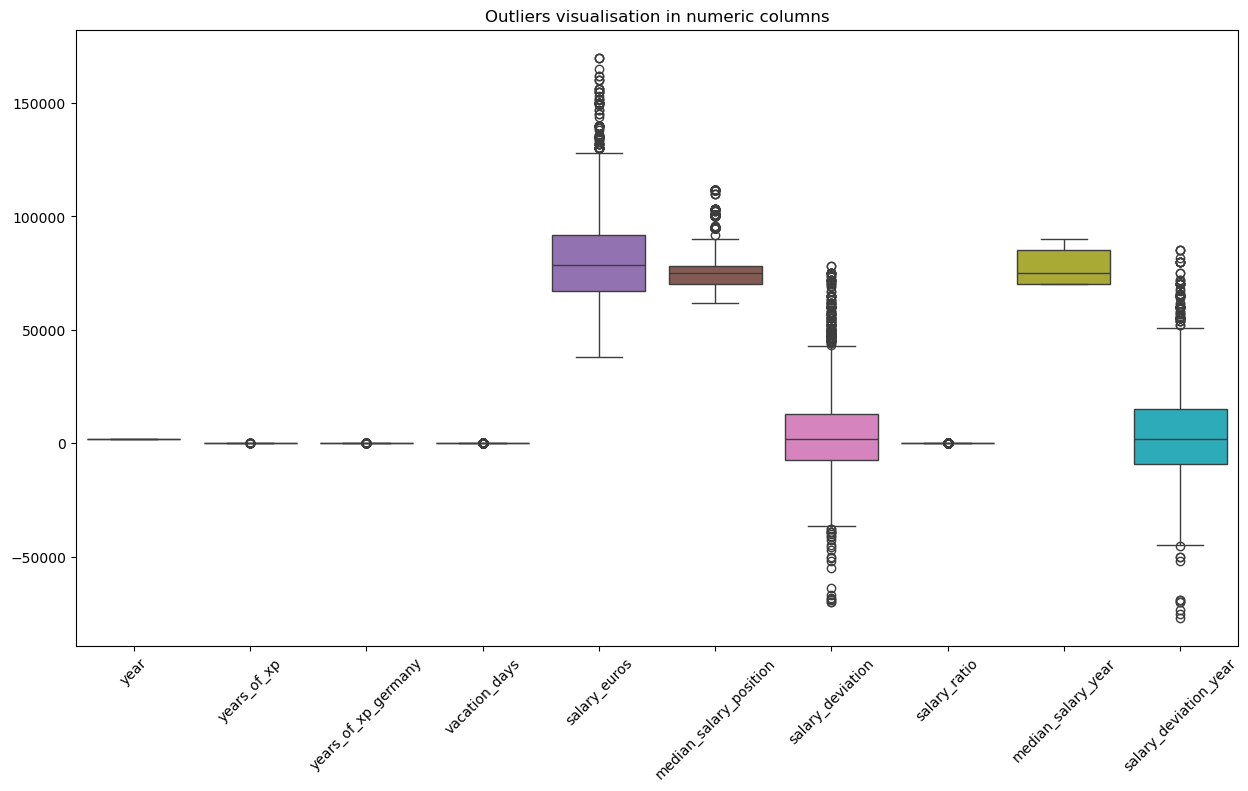

In [622]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = [
    "year", "years_of_xp", "years_of_xp_germany", "vacation_days",
    "salary_euros", "median_salary_position", "salary_deviation",
    "salary_ratio", "median_salary_year", "salary_deviation_year"
]

# Outliers visualisation 
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_filtered[numeric_columns])
plt.xticks(rotation=45)
plt.title("Outliers visualisation in numeric columns")
plt.show()


In [623]:
df_salary_eda = df_filtered

In [624]:
print(df_filtered.dtypes)


year                        float64
city                       category
position                   category
gender                       object
age                          object
seniority                    object
years_of_xp                 float64
years_of_xp_germany         float64
main_tech                  category
vacation_days               float64
company_size               category
salary_euros                float64
ai_impact                  category
ai_use                     category
median_salary_position      float64
salary_deviation            float64
salary_ratio                float64
median_salary_year          float64
salary_deviation_year       float64
median_salary_prev_year     float64
salary_growth_rate          float64
median_salary_trend         float64
dtype: object


In [625]:
df_filtered['position'].value_counts()

position
Backend Developer            1939
Data Scientist                362
Frontend Developer            295
DevOps Engineer               220
Product Manager               184
QA Engineer                   159
Mobile Developer              148
Engineering Manager           145
Machine Learning Engineer      95
BI & Data Engineer             85
C-Level Executive              61
Data & Business Analyst        57
Data Engineer                  55
Fullstack Developer            51
SAP Consultant                  4
BI Engineer                     2
Name: count, dtype: int64

In [626]:
df_salary_eda.shape

(3862, 22)

In [627]:
#Save the filtered data
df_salary_eda.to_csv("df_filtered.csv", index=False, encoding='utf-8')


### IV. Machine Learning

##### 1. Create Dataset for Machine Learning

In [628]:


# Assume your DataFrame is called df
columns_to_keep = [
    'year',
    'city',
    'position',
    'seniority',
    'years_of_xp',
    'years_of_xp_germany',
    'main_tech',
    'vacation_days',
    'company_size',
    'salary_euros',
    'ai_impact',
    'ai_use'
]

df_model = df_salary_eda[columns_to_keep]


In [629]:
df_model.shape

(3862, 12)

##### 2. Visualization

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4252340680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


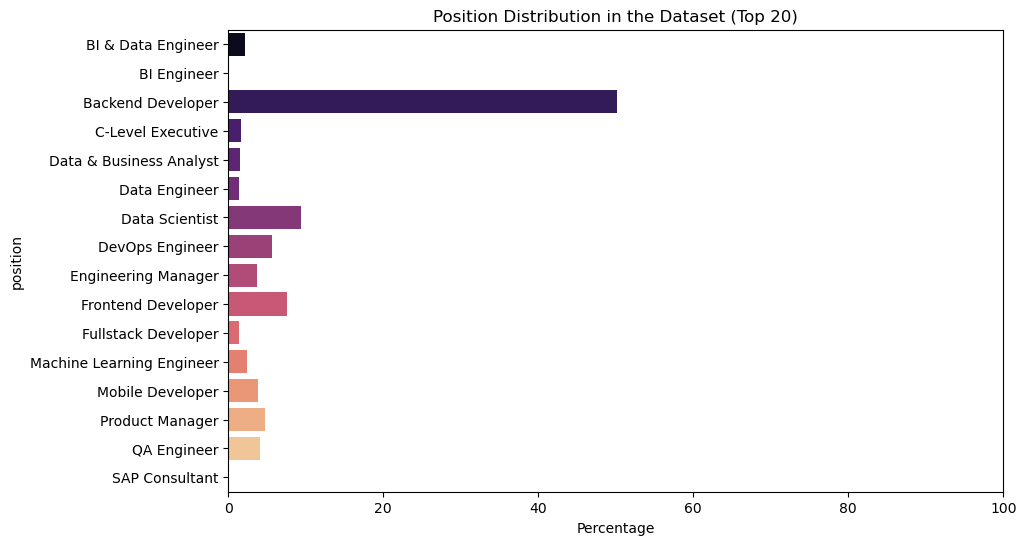

In [630]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage distribution based on df_filtered
position_counts = df_filtered['position'].value_counts(normalize=True) * 100

# Keep only the top 20 positions
top_positions_counts = position_counts.nlargest(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_positions_counts.values, 
    y=top_positions_counts.index, 
    palette="magma"
)
plt.xlabel("Percentage")
plt.title("Position Distribution in the Dataset (Top 20)")
plt.xlim(0, 100)
plt.show()



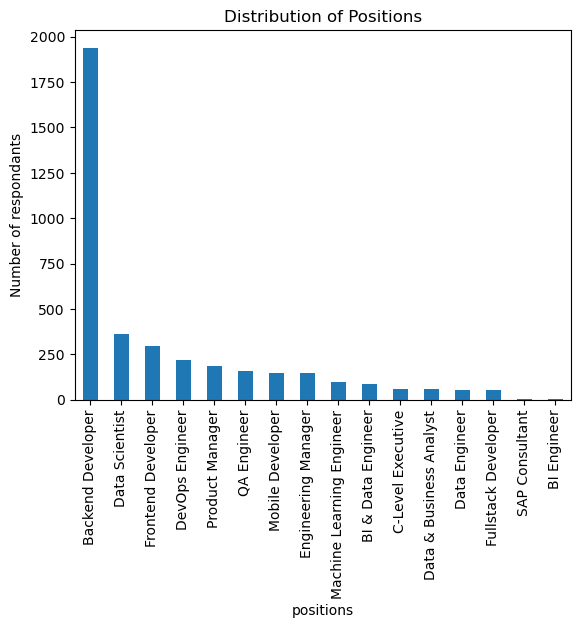

In [631]:
df_filtered['position'].value_counts().plot(kind='bar')
plt.xlabel("positions")
plt.ylabel("Number of respondants")
plt.title("Distribution of Positions")
plt.show()


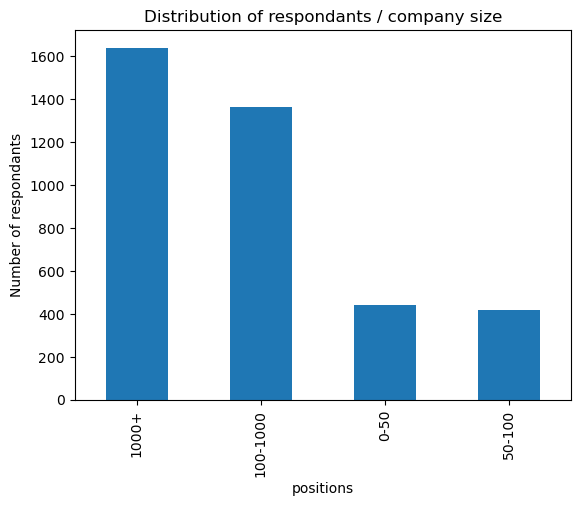

In [632]:
df_filtered['company_size'].value_counts().plot(kind='bar')
plt.xlabel("positions")
plt.ylabel("Number of respondants")
plt.title("Distribution of respondants / company size")
plt.show()

In [633]:
df_filtered.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,ai_impact,ai_use,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year,median_salary_prev_year,salary_growth_rate,median_salary_trend
225,2019.0,Munich,Fullstack Developer,Male,31.0,Senior,8.0,0.0,Java,26.0,...,No,No,67000.0,1000.0,1.014925,70000.0,-2000.0,70000.0,-0.146341,76000.0
4218,2024.0,Berlin,Frontend Developer,Unknown,Unknown,Junior,1.0,1.0,JavaScript,28.0,...,Moderate but noticeable,Yes,90000.0,-25000.0,0.722222,90000.0,-25000.0,70000.0,0.000000,70000.0
2888,2022.0,Berlin,C-Level Executive,Unknown,Unknown,Manager,5.0,5.0,Python,30.0,...,Invisible,No,111500.0,-26500.0,0.762332,80000.0,5000.0,90000.0,0.285714,80000.0
196,2019.0,Munich,Frontend Developer,Male,30.0,Senior,9.0,0.0,JavaScript,27.0,...,No,No,69500.0,5500.0,1.079137,70000.0,5000.0,82000.0,-0.088889,86000.0
197,2019.0,Munich,Machine Learning Engineer,Male,30.0,Mid-level,2.0,0.0,Python,30.0,...,No,No,85000.0,-23000.0,0.729412,70000.0,-8000.0,70000.0,-0.146341,76000.0


In [634]:
print(df_filtered.dtypes)

year                        float64
city                       category
position                   category
gender                       object
age                          object
seniority                    object
years_of_xp                 float64
years_of_xp_germany         float64
main_tech                  category
vacation_days               float64
company_size               category
salary_euros                float64
ai_impact                  category
ai_use                     category
median_salary_position      float64
salary_deviation            float64
salary_ratio                float64
median_salary_year          float64
salary_deviation_year       float64
median_salary_prev_year     float64
salary_growth_rate          float64
median_salary_trend         float64
dtype: object


In [635]:
df_filtered.isna().sum()

year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64

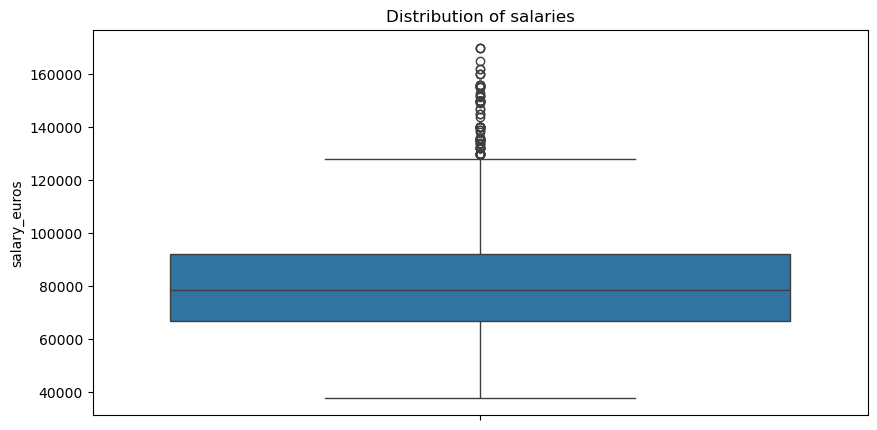

In [636]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(df_filtered['salary_euros'])
plt.title('Distribution of salaries')
plt.show()


In [637]:
df_model['salary_euros'].describe()


count      3862.000000
mean      81552.626974
std       20719.935465
min       38000.000000
25%       67000.000000
50%       78460.000000
75%       92000.000000
max      170000.000000
Name: salary_euros, dtype: float64

In [638]:
df_model.shape

(3862, 12)

#### 3. Feature Engineering



In [639]:
df_model.columns

Index(['year', 'city', 'position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'ai_impact', 'ai_use'],
      dtype='object')

In [640]:
df_model['ai_impact'].unique()

['No', 'Moderate but noticeable', 'Invisible', 'Great']
Categories (4, object): ['Great', 'Invisible', 'Moderate but noticeable', 'No']

In [641]:
df_model["company_size"].unique()

['0-50', '50-100', '100-1000', '1000+']
Categories (4, object): ['0-50' < '50-100' < '100-1000' < '1000+']

In [642]:
print(df_model["company_size"].apply(type).value_counts())


company_size
<class 'str'>    3862
Name: count, dtype: int64


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2505357702.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["seniority_encoded"] = df_model["seniority"].map(seniority_mapping)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2505357702.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["company_size_encoded"] = df_model["company_size"].map(company_size_mapping)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2505357702.py:37: SettingWith

Distribution des classes avant SMOTE:
 salary_range_encoded
1    1317
2     773
0     709
3     290
Name: count, dtype: int64
✅ SMOTE applied!

🔹 Random Forest Accuracy: 0.5511
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       177
           1       0.60      0.61      0.60       330
           2       0.47      0.48      0.47       193
           3       0.38      0.30      0.34        73

    accuracy                           0.55       773
   macro avg       0.51      0.50      0.51       773
weighted avg       0.55      0.55      0.55       773

[[111  53  13   0]
 [ 60 201  58  11]
 [ 11  65  92  25]
 [  0  18  33  22]]

🔹 XGBoost Accuracy: 0.5459
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       177
           1       0.58      0.60      0.59       330
           2       0.47      0.51      0.49       193
           3       0.40      0.27      0.33        73

    accurac

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression Accuracy: 0.4838
              precision    recall  f1-score   support

           0       0.53      0.66      0.59       177
           1       0.63      0.47      0.54       330
           2       0.40      0.35      0.37       193
           3       0.25      0.48      0.33        73

    accuracy                           0.48       773
   macro avg       0.45      0.49      0.46       773
weighted avg       0.51      0.48      0.49       773

[[116  44  11   6]
 [ 79 156  64  31]
 [ 18  41  67  67]
 [  6   5  27  35]]

🔹 SVC Accuracy: 0.5602
              precision    recall  f1-score   support

           0       0.68      0.47      0.56       177
           1       0.55      0.76      0.64       330
           2       0.50      0.46      0.48       193
           3       0.62      0.14      0.22        73

    accuracy                           0.56       773
   macro avg       0.59      0.46      0.47       773
weighted avg       0.57      0.56      0.54 

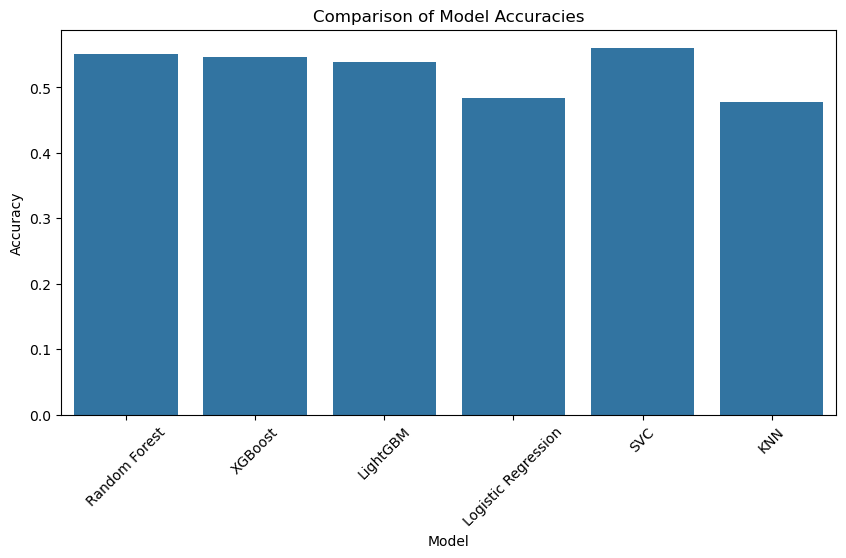

In [643]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Encode 'Seniority' as Ordinal 
seniority_mapping = {
    "Junior": 1,
    "Mid-level": 2,
    "Senior": 3,
    "Lead": 4,
    "Manager": 5
}
df_model["seniority_encoded"] = df_model["seniority"].map(seniority_mapping)

# Encode 'Company Size' 
company_size_mapping = {
    "0-50": 1,
    "50-100": 2,
    "100-1000": 3,
    "1000+": 4
}
df_model["company_size_encoded"] = df_model["company_size"].map(company_size_mapping)

# Convert to numeric variables
df_model["company_size_encoded"] = df_model["company_size_encoded"].astype(int)
df_model["seniority_encoded"] = df_model["seniority_encoded"].astype(int)

df_model["ai_use"] = df_model["ai_use"].map({"Yes": 1, "No": 0}).astype(int)

# One-Hot Encode 'Position' and 'City'
df_model = pd.get_dummies(df_model, columns=['position'], prefix='position', drop_first=False)
df_model = pd.get_dummies(df_model, columns=['city'], prefix='city', drop_first=False)

# Salary Range Encoding
bins = [0, 45000, 65000, 85000, 110000, 150000, 500000]  
labels = [0, 1, 2, 3, 4, 5]
df_model['salary_range_encoded'] = pd.cut(df_model['salary_euros'], bins=bins, labels=labels).astype(int)

df_model['salary_range_encoded'] = df_model['salary_range_encoded'].replace({0: 1, 5: 4})

# Ensure labels start from 0 for compatibility with XGBoost
df_model['salary_range_encoded'] -= df_model['salary_range_encoded'].min()

# Define X and y
selected_features = ["years_of_xp", "years_of_xp_germany", "vacation_days", "company_size_encoded",
    "seniority_encoded", "ai_use", "year"] + \
    [col for col in df_model.columns if col.startswith("position_")] + \
    [col for col in df_model.columns if col.startswith("city_")]
X = df_model[selected_features]
y = df_model["salary_range_encoded"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE: Dynamically adjust based on available classes
print("Distribution des classes avant SMOTE:\n", y_train.value_counts())
classes_presentes = y_train.unique()
sampling_strategy = {cls: max(1000, int(1.5 * y_train.value_counts()[cls])) for cls in classes_presentes if y_train.value_counts()[cls] < 1000}

if sampling_strategy:
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("✅ SMOTE applied!")
else:
    X_train_resampled, y_train_resampled = X_train, y_train
    print("⚠️ SMOTE skipped, target class not found in y_train")

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "SVC": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })
    print(f"\n🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Display results as a dataframe
results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


In [644]:
import json

# Define correct feature names based on model encoding
feature_names = [
    "years_of_xp", "years_of_xp_germany", "vacation_days", "company_size_encoded",
    "seniority_encoded", "ai_use", "year",
    "city_Berlin", "city_Munich",
    "position_BI & Data Engineer", "position_BI Engineer", "position_Backend Developer",
    "position_C-Level Executive", "position_Data & Business Analyst", "position_Data Engineer",
    "position_Data Scientist", "position_DevOps Engineer", "position_Engineering Manager",
    "position_Frontend Developer", "position_Fullstack Developer", "position_Machine Learning Engineer",
    "position_Mobile Developer", "position_Product Manager", "position_QA Engineer", "position_SAP Consultant"
]

# Save the feature names to a JSON file
with open("features.json", "w") as f:
    json.dump(feature_names, f)

print("✅ features.json has been successfully saved.")


✅ features.json has been successfully saved.


In [645]:
import json


In [646]:
df_model.isna().sum()

year                                  0
seniority                             0
years_of_xp                           0
years_of_xp_germany                   0
main_tech                             0
vacation_days                         0
company_size                          0
salary_euros                          0
ai_impact                             0
ai_use                                0
seniority_encoded                     0
company_size_encoded                  0
position_BI & Data Engineer           0
position_BI Engineer                  0
position_Backend Developer            0
position_C-Level Executive            0
position_Data & Business Analyst      0
position_Data Engineer                0
position_Data Scientist               0
position_DevOps Engineer              0
position_Engineering Manager          0
position_Frontend Developer           0
position_Fullstack Developer          0
position_Machine Learning Engineer    0
position_Mobile Developer             0


In [647]:
df_final.tail()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
5629,2024,Berlin,Data / Business / Product Analyst,Unknown,Unknown,Mid-level,6,6,Python,30.0,...,NaN,NaN,NaN,59452.054795,62000.0,69500.0,500.0,1.007194,90000.0,-20000.0
5630,2024,Munich,Backend Software Engineer,Unknown,Unknown,Staff / Lead / Manager,12,2,C# / .NET,30.0,...,NaN,NaN,NaN,80000.000000,80000.0,95000.0,-11000.0,0.884211,90000.0,-6000.0
5631,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,12,1,PHP,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-25000.0,0.736842,90000.0,-20000.0
5632,2024,Berlin,Software Engineer,Unknown,Unknown,Senior,8,5,JavaScript / TypeScript,30.0,...,NaN,NaN,NaN,117000.000000,180000.0,78000.0,52000.0,1.666667,90000.0,40000.0
5633,2024,Other,Research Scientist,Unknown,Unknown,Mid-level,8,0,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,75000.0,-5200.0,0.930667,90000.0,-20200.0


In [648]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      5634 non-null   Int64  
 1   city                      5634 non-null   object 
 2   position                  5614 non-null   object 
 3   gender                    5634 non-null   object 
 4   age                       5634 non-null   object 
 5   seniority                 5634 non-null   object 
 6   years_of_xp               5634 non-null   object 
 7   years_of_xp_germany       5634 non-null   object 
 8   main_tech                 5634 non-null   object 
 9   vacation_days             5634 non-null   float64
 10  company_size              5634 non-null   object 
 11  salary_euros              5634 non-null   float64
 12  salary_2018               971 non-null    float64
 13  salary_bonus_stocks_2018  971 non-null    float64
 14  ai_impac

In [649]:
df_final.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')

In [650]:
df_final['city'].value_counts()

city
Berlin               3008
Munich               1277
Hamburg               196
Frankfurt             192
Other                 121
                     ... 
Konstanz area           1
Saint-Petersburg        1
Nizhny Novgorod         1
Lausanne                1
Essen                   1
Name: count, Length: 160, dtype: int64

In [651]:
outlier_years = df_final[df_final['year'] > 2100]
outlier_years[['year']]


,year


In [652]:
df_cities_per_year = df_final.groupby("year")["city"].value_counts()

for (year, city), count in df_cities_per_year.items():
    print(f"Année {year} - {city} : {count} times")



Année 2019 - Berlin : 425 times
Année 2019 - Munich : 236 times
Année 2019 - Amsterdam : 74 times
Année 2019 - Frankfurt : 49 times
Année 2019 - Hamburg : 34 times
Année 2019 - Cologne : 15 times
Année 2019 - Stuttgart : 15 times
Année 2019 - Düsseldorf : 10 times
Année 2019 - Moscow : 10 times
Année 2019 - Kyiv : 9 times
Année 2019 - Nuremberg : 6 times
Année 2019 - London : 5 times
Année 2019 - Warsaw : 5 times
Année 2019 - Zurich : 4 times
Année 2019 - Eindhoven : 3 times
Année 2019 - Karlsruhe : 3 times
Année 2019 - Vienna : 3 times
Année 2019 - Hannover : 2 times
Année 2019 - Heidelberg : 2 times
Année 2019 - Paris : 2 times
Année 2019 - Rotterdam : 2 times
Année 2019 - Saint Petersburg : 2 times
Année 2019 - Stockholm : 2 times
Année 2019 - Wroclaw : 2 times
Année 2019 - Zug : 2 times
Année 2019 - Almere : 1 times
Année 2019 - Antwerpen : 1 times
Année 2019 - Bayern : 1 times
Année 2019 - Bern : 1 times
Année 2019 - Bielefeld : 1 times
Année 2019 - Braunschweig : 1 times
Année 20

In [653]:
df_filtered = df_final[df_final["city"].isin(["Berlin", "Munich"])].reset_index(drop=True)

df_filtered

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
0,2019,Berlin,Fullstack Developer,Male,33.0,Senior,13,0.0,PHP,29.0,...,NaN,NaN,NaN,NaN,NaN,67000.0,-3000.0,0.955224,70000.0,-6000.0
1,2019,Berlin,Backend Developer,Male,29.0,Middle,3,0.0,Python,22.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-17000.0,0.763889,70000.0,-15000.0
2,2019,Berlin,Mobile Developer,Male,29.0,Middle,4,0.0,Kotlin,27.0,...,NaN,NaN,NaN,NaN,NaN,71750.0,-1750.0,0.975610,70000.0,0.0
3,2019,Berlin,Backend Developer,Male,30.0,Senior,6,0.0,PHP,24.0,...,NaN,NaN,NaN,NaN,NaN,72000.0,-9000.0,0.875000,70000.0,-7000.0
4,2019,Berlin,Embedded Developer,Male,32.0,Senior,10,0.0,C/C++,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-4000.0,0.942857,70000.0,-4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,17,1,C# / .NET,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-12000.0,0.873684,90000.0,-7000.0
4281,2024,Berlin,Data / Business / Product Analyst,Unknown,Unknown,Mid-level,6,6,Python,30.0,...,NaN,NaN,NaN,59452.054795,62000.0,69500.0,500.0,1.007194,90000.0,-20000.0
4282,2024,Munich,Backend Software Engineer,Unknown,Unknown,Staff / Lead / Manager,12,2,C# / .NET,30.0,...,NaN,NaN,NaN,80000.000000,80000.0,95000.0,-11000.0,0.884211,90000.0,-6000.0
4283,2024,Munich,Backend Software Engineer,Unknown,Unknown,Senior,12,1,PHP,30.0,...,NaN,NaN,NaN,NaN,NaN,95000.0,-25000.0,0.736842,90000.0,-20000.0


In [654]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4285 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      4285 non-null   Int64  
 1   city                      4285 non-null   object 
 2   position                  4271 non-null   object 
 3   gender                    4285 non-null   object 
 4   age                       4285 non-null   object 
 5   seniority                 4285 non-null   object 
 6   years_of_xp               4285 non-null   object 
 7   years_of_xp_germany       4285 non-null   object 
 8   main_tech                 4285 non-null   object 
 9   vacation_days             4285 non-null   float64
 10  company_size              4285 non-null   object 
 11  salary_euros              4285 non-null   float64
 12  salary_2018               661 non-null    float64
 13  salary_bonus_stocks_2018  661 non-null    float64
 14  ai_impac

In [655]:
position_counts = df_filtered['position'].value_counts().reset_index()
position_counts.columns = ['position', 'Count']
position_counts

,position,Count
0,Software Engineer,1025
1,Backend Developer,534
2,Data Scientist,280
3,Frontend Developer,244
4,DevOps,167
...,...,...
138,SW Architect,1
139,SAP Developer,1
140,Recruiter,1
141,Support Engineer,1


In [656]:
# Mise à jour du mapping pour une classification plus précise
position_mapping = {
    # Backend Development
    "Backend Developer": "Backend Developer",
    "Backend Software Engineer": "Backend Developer",
    "Software Engineer": "Backend Developer",
    "Lead Software Developer": "Backend Developer",
    "Staff Engineer": "Backend Developer",
    
    
    
    # Software Engineer
    "SW Architect": "Software Architect",
    "Software Architect": "Software Architect",


    # Frontend Development
    "Frontend Developer": "Frontend Developer",
    "Frontend Software Engineer": "Frontend Developer",
    "UI Engineer": "Frontend Developer",
    "Designer (UI/UX)": "UI/UX Designer",

    # Fullstack Development
    "Fullstack Developer": "Fullstack Developer",
    "Full-Stack Developer": "Fullstack Developer",
    "Tech Lead / Full-Stack": "Fullstack Developer",
    "Fullstack engineer, ну или Software engineer": "Fullstack Developer",

    # Mobile Development
    "Mobile Developer": "Mobile Developer",
    "iOS Developer": "iOS Developer",
    "Android Developer": "Android Developer",
    "Mobile Software Engineer": "Mobile Developer",

    # Game Development
    "Game Developer": "Game Developer",
    "Desktop/Unity3D Developer": "Game Developer",

    # DevOps & Cloud
    "DevOps": "DevOps Engineer",
    "DevOps Engineer": "DevOps Engineer",
    "SRE": "Site Reliability Engineer",
    "Site Reliability Engineer": "Site Reliability Engineer",
    "Cloud Engineer": "Cloud Engineer",
    "Cloud Platform Engineer": "Cloud Engineer",
    "Cloud Architect": "Cloud Architect",
    "Platform Engineer": "Cloud Engineer",
    "Infrastructure Manager": "Infrastructure Manager",
    "Solutions Architect": "Solutions Architect",
    "Solution Architect": "Solutions Architect",

    # Embedded & Hardware
    "Embedded Developer": "Embedded Developer",
    "Embedded Software Engineer": "Embedded Developer",
    "Hardware Engineer": "Hardware Engineer",
    "Hardware Design and Verification": "Hardware Engineer",
    "Hardware test engineer": "Hardware Engineer",
    "Senior Embedded System Engineer": "Embedded Developer",

    # Data Science & AI
    "Data Scientist": "Data Scientist",
    "Machine Learning Engineer": "Machine Learning Engineer",
    "ML Engineer": "Machine Learning Engineer",
    "NLP Engineer": "NLP Engineer",
    "Head of AI": "Head of AI",
    "AI Management": "AI Management",
    "Research Scientist": "Research Scientist",
    "Computational linguist": "Computational Linguist",
    "Senior Computer Vision Engineer": "Computer Vision Engineer",
    "Freelance AI lead / advisor": "AI Lead",

    # Data Engineering & Analytics
    "Data Engineer": "Data Engineer",
    "Data Analyst": "Data Analyst",
    "Senior Data Analyst": "Senior Data Analyst",
    "Business Intelligence Engineer": "BI Engineer",
    "Analytics Engineer": "Analytics Engineer",
    "Data Architect": "Data Architect",
    "Reporting Engineer": "Reporting Engineer",
    "Data / Business / Product Analyst": "Data & Business Analyst",
    "BI Developer / Data Engineer": "BI & Data Engineer",

    # Security & Networking
    "Security Engineer": "Security Engineer",
    "Network Engineer": "Network Engineer",
    "Network Administrator": "Network Administrator",
    "Senior Network&Security Eng.": "Senior Security Engineer",
    "Information Security Specialist": "Information Security Specialist",
    "CISO": "Chief Information Security Officer",
    "Cybersecurity Auditor": "Cybersecurity Auditor",

    # Business & Product Management
    "Product Manager": "Product Manager",
    "Product Analyst": "Product Analyst",
    "Product Specialist": "Product Specialist",
    "Data Analyst": "Data & Business Analyst",
    "Business Analyst": "Data & Business Analyst",
    "Senior Business Analyst": "Senior Business Analyst",
    "Business Development Manager": "Business Development Manager",
    
    # Project & Program Management
    "Project Manager": "Project Manager",
    "Senior Project Manager": "Senior Project Manager",
    "Technical Program Manager": "Technical Program Manager",
    "Program Manager": "Program Manager",
    "Scrum Master": "Scrum Master",
    "Agile Coach": "Agile Coach",
    "Delivery Manager": "Delivery Manager",
    "Engineering Manager": "Engineering Manager",

    # Design & UI/UX
    "UX Researcher": "UX Researcher",
    "Product Designer": "Product Designer",
    "Graphic Designer": "Graphic Designer",
    "Brand Designer": "Brand Designer",
    "Design Manager": "Design Manager",

    # QA & Testing
    "QA Engineer": "QA Engineer",
    "QA Lead": "QA Lead",
    "QA Automation Engineer": "QA Automation Engineer",
    "Test Manager": "Test Manager",
    "Test Automation Engineer": "Test Automation Engineer",
    "Software Developer in Test": "Software Developer in Test",
    "Quality Assurance": "Quality Assurance",

    # Technical Leadership
    "Tech Lead": "Tech Lead",
    "Team Lead": "Team Lead",
    "VP Engineering": "VP Engineering",
    "Director of Engineering": "Director of Engineering",
    "Head of Engineering": "Head of Engineering",
    "Principal Engineer": "Principal Engineer",
    "Engineering Team Lead": "Team Lead",
    "Head of Department": "Head of Department",

    # Enterprise Software & Consulting
    "Technical Consultant": "Technical Consultant",
    "IT Consultant": "IT Consultant",
    "IT Manager": "IT Manager",
    "Solution Architect": "Solution Architect",
    "Solutions Architect": "Solutions Architect",
    "Business Owner": "Business Owner",
    "IT Spezialist": "IT Specialist",

    # Support & IT Operations
    "System Administrator": "System Administrator",
    "IT Support": "IT Support",
    "IT Service Desk Analyst": "IT Service Desk Analyst",
    "Technical Support": "Technical Support",
    "Support Engineer": "Support Engineer",
    "Support Manager": "Support Manager",

    # Executive & C-Level
    "CTO (CEO, CFO)": "C-Level Executive",
    "CTO": "C-Level Executive",
    "Head / Principal / VP": "C-Level Executive",
    "VP Engineering": "C-Level Executive",
    "Business Owner": "Business Owner",

    # Other
    "Unemployed": "Unemployed",
    "Other": "Other",
    "Engineer": "Engineer",
    "Consultant": "Consultant",
    "Professor": "Professor",
    "Statistician": "Statistician"
}

# Appliquer le mapping sur le dataset
df_filtered["position"] = df_filtered["position"].map(position_mapping).fillna("Other")



In [657]:
df_filtered.isna().sum()

year                           0
city                           0
position                       0
gender                         0
age                            0
seniority                      0
years_of_xp                    0
years_of_xp_germany            0
main_tech                      0
vacation_days                  0
company_size                   0
salary_euros                   0
salary_2018                 3624
salary_bonus_stocks_2018    3624
ai_impact                      0
ai_use                         0
salary_2019                 3353
salary_bonus_stocks_2019    3353
your_position               2682
salary_2020                 3340
salary_bonus_stocks_2020    3340
salary_2021                 3656
salary_bonus_stocks_2021    3656
salary_2022                 3686
salary_bonus_stocks_2022    3686
salary_2023                 3950
salary_bonus_stocks_2023    3950
median_salary_position        14
salary_deviation              14
salary_ratio                  14
median_sal

In [658]:
df_filtered["position"].value_counts().to_frame().iloc[15:].index

Index(['Data & Business Analyst', 'Software Architect',
       'Site Reliability Engineer', 'Embedded Developer', 'Cloud Engineer',
       'Research Scientist', 'Head of Engineering', 'Team Lead',
       'System Administrator', 'Product Analyst', 'Solutions Architect',
       'Scrum Master', 'Tech Lead', 'Consultant', 'Network Engineer',
       'Security Engineer', 'Game Developer', 'IT Manager', 'Professor',
       'UX Researcher', 'AI Management', 'Software Developer in Test',
       'Computational Linguist', 'QA Lead', 'Project Manager', 'AI Lead',
       'Support Engineer', 'IT Specialist', 'Director of Engineering',
       'Solution Architect', 'iOS Developer', 'Graphic Designer',
       'Network Administrator', 'Agile Coach', 'Cloud Architect',
       'Reporting Engineer', 'Hardware Engineer', 'NLP Engineer', 'Head of AI',
       'BI Engineer'],
      dtype='object', name='position')

In [659]:
to_convert =['UI/UX Designer', 'Site Reliability Engineer', 'Software Architect',
       'Embedded Developer', 'Cloud Engineer', 'Research Scientist',
       'Support Engineer', 'Product Analyst', 'Head of Engineering',
       'Hardware Engineer', 'Security Engineer', 'System Administrator',
       'Team Lead', 'Consultant', 'BI Engineer', 'IT Consultant',
       'Senior Data Analyst', 'Brand Designer', 'Game Developer',
       'Director of Engineering', 'Network Engineer', 'Tech Lead',
       'Solutions Architect', 'Scrum Master', 'iOS Developer',
       'Computer Vision Engineer', 'Senior Project Manager', 'Program Manager',
       'Engineer', 'Technical Program Manager', 'Head of AI',
       'QA Automation Engineer', 'Quality Assurance', 'Statistician',
       'Unemployed', 'Principal Engineer', 'Design Manager',
       'Head of Department', 'Test Manager', 'IT Service Desk Analyst',
       'Infrastructure Manager', 'Solution Architect', 'NLP Engineer',
       'Chief Information Security Officer', 'Graphic Designer',
       'Reporting Engineer', 'Network Administrator',
       'Senior Security Engineer', 'IT Specialist',
       'Software Developer in Test', 'AI Lead', 'Agile Coach', 'IT Manager',
       'Cloud Architect', 'Professor', 'AI Management', 'UX Researcher',
       'Computational Linguist', 'QA Lead', 'Project Manager',
       'Product Specialist', 'Test Automation Engineer', 'Technical Support',
       'IT Support']

df_filtered["position"] = df_filtered["position"].apply(lambda x: "Other" if x in to_convert else x)

In [660]:
# 🔹 Compute the mode of "position" for each "main_tech"
mode_main_tech = df_filtered.groupby("main_tech")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# 🔹 Compute the mode of "position" for each "your_position"
mode_your_position = df_filtered.groupby("your_position")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

# 🔹 Replace "Other" in "position" based on "main_tech"
df_filtered.loc[df_filtered["position"] == "Other", "position"] = df_filtered["main_tech"].map(mode_main_tech)

# 🔹 Fill remaining "Other" values in "position" based on "your_position"
df_filtered.loc[df_filtered["position"] == "Other", "position"] = df_filtered["your_position"].map(mode_your_position)



# ✅ Verify replacement
print(df_filtered["position"].value_counts())


position
Backend Developer            2016
Data Scientist                414
Frontend Developer            325
DevOps Engineer               216
Product Manager               170
QA Engineer                   165
Mobile Developer              159
Engineering Manager           159
Machine Learning Engineer     107
BI & Data Engineer             85
C-Level Executive              78
Other                          73
Fullstack Developer            56
Data Engineer                  49
Data & Business Analyst        38
Name: count, dtype: int64


In [661]:
df_filtered["position"] = df_filtered["position"].replace("Unknown", pd.NA)  # Remplace "Unknown" par NaN pour le traitement

df_filtered["position"] = df_filtered["position"].fillna(
    df_filtered.groupby(["main_tech", "company_size"])["position"].transform(
        lambda x: x.mode()[0] if not x.mode().empty else x
    )
)


In [662]:
import pandas as pd

missing_counts = df_final.isnull().sum().sort_values(ascending=False)
print(missing_counts)


salary_bonus_stocks_2023    5223
salary_2023                 5223
salary_bonus_stocks_2022    4920
salary_2022                 4920
salary_2021                 4861
salary_bonus_stocks_2021    4861
salary_bonus_stocks_2018    4663
salary_2018                 4663
salary_2020                 4432
salary_bonus_stocks_2020    4432
salary_2019                 4350
salary_bonus_stocks_2019    4350
your_position               3645
median_salary_position        20
salary_deviation              20
salary_ratio                  20
position                      20
median_salary_year             0
year                           0
city                           0
ai_use                         0
ai_impact                      0
salary_euros                   0
company_size                   0
vacation_days                  0
main_tech                      0
years_of_xp_germany            0
years_of_xp                    0
seniority                      0
age                            0
gender    

In [663]:
df_position_counts = df_filtered["position"].value_counts().reset_index()
df_position_counts.columns = ["position", "count"]


df_position_counts.to_csv("position_count.csv", index=False, encoding='utf-8')


In [664]:
tech_counts = df_filtered['main_tech'].value_counts().reset_index()
tech_counts.columns = ['Technology', 'Count']
tech_counts

,Technology,Count
0,Python,793
1,Java,663
2,JavaScript / Typescript,328
3,Other,297
4,PHP,189
...,...,...
222,ASM,1
223,Android/Kotlin,1
224,embedded,1
225,Java/Groovy,1


In [665]:
tech_counts.to_csv("tech_counts.csv", index=False, encoding='utf-8')


In [666]:
tech_mappings = {
    # Core languages and frameworks (normalized)
    "PHP": "PHP",
    "PHP ": "PHP",
    "php": "PHP",
    "Python": "Python",
    "Pyrhon": "Python",
    "python ": "Python",
    "Python (Django)": "Python",
    "pythin":"Python",
    "python": "Python",
    "Python ": "Python",
    'Ml/Python': 'Python',
    "Kotlin": "Kotlin",
    "kotlin": "Kotlin",
    "Kotlin ": "Kotlin",
    "C++": "Embedded",
    "C/C++": "C/C++",
    "c/c++": "C/C++",
    "C++": "C/C++",
    "C": "C/C++",
    "Java": "Java",
    "java": "Java",
    "Java ": "Java",
    "JAVA": "Java",
    "Not Relevant": "Not Relevant",
    "none": "Not Relevant",
    "-": "Not Relevant",
    "--": "Not Relevant",
    "nothing": "Not Relevant",
    "Business Development Manager Operation ": "Not Relevant",
    "several": "Not Relevant",
    "Non-tech instruments": "Not Relevant",
    "Swift": "Swift",
    "SWIFT": "Swift",
    "swift": "Swift",
    "Javascript / Typescript": "JavaScript",
    "Javascript": "JavaScript",
    "JavaScript": "JavaScript",
    "JavaScript ": "JavaScript",
    "JavaScript/ES6": "JavaScript",
    "JavaScript/TypeScript": "JavaScript",
    "JavaScript/Typescript": "JavaScript",
    "JavaScript / typescript": "JavaScript",
    "Typescript": "JavaScript",
    "Typescript ": "JavaScript",
    "TypeScript": "JavaScript",
    "TS": "JavaScript",
    "Js": "JavaScript",
    "JS": "JavaScript",
    "js": "JavaScript",
    "Javascript ":"JavaScript",
    "Angular": "JavaScript",
    "JavScript": "JavaScript",
    "javascript": "JavaScript",
    "Sql":"SQL",
    "Angular, Typescript":"JavaScript",
    "NodeJS":"JavaScript",
    "embedded":"Embedded",
    "Frontend":"JavaScript",
    
    "AWS": "Cloud/DevOps",
    "Kubernetes": "Cloud/DevOps",
    "K8S": "Cloud/DevOps",
    "Kubernetes, Terraform, GCP": "Cloud/DevOps",
    "DevOps":"Cloud/DevOps",
    ".NET": ".NET",
    ".net": ".NET",
    ".Net": ".NET",
    "C# .NET": "C#",
    "C#": "C#",
    "C#, .net core": "C#",
    "С#": "C#",
    "C# / .NET": "C#",
    
    "Ruby": "Ruby",
    "ruby on rails": "Ruby",
    "Ruby on Rails": "Ruby",
    
    "Scala": "Scala",
    "scala": "Scala",
    "Spring":"Java",
    
    "Clojure": "Clojure",
    "Yaml": "YAML",
    "yaml": "YAML",
    
    "Azure": "Cloud/DevOps",
    "Elixir": "Elixir",
    "Objective-C": "iOS",
    "Google Cloud": "Cloud/DevOps",
    "R": "R",
    "SQL": "SQL",
    "PostgreSQL": "SQL",
    "Rust": "Rust",
    "Solidity": "Networking/Security",
    "ASM": "ASM",
    "Cisco": "Networking/Security",
    "Network": "Networking/Security",
    "Unity": "Unity",
    "Other": "Other",
    "ABAP": "SAP/ABAP",
    "SAP / ABAP": "SAP/ABAP",
    "SAP": "SAP/ABAP",
    "SAS": "SAS",
    "Openstack": "OpenStack",
    "TypeScript": "JavaScript",
    
    "Power BI": "BI",
    "DWH":"BI",
    "Android": "Android",
    "iOS": "iOS",
    "Charles": "Other",
    "Figma": "UX/UI",
    "React": "React",
    "React JS": "JavaScript",
    "FBD": "Other",
    
    "Agile": "Other",
    "Salesforce":"Enterprise Software",
    "Salesforce ":"Enterprise Software",
    "Pegasystems":"Enterprise Software",
    "Pegasystems platform ":"Enterprise Software",
    "Cloud": "Cloud/DevOps",
    "Microsoft, Vmware": "Cloud/DevOps",
    "DevOps": "Cloud/DevOps",
    "Network": "Networking/Security",
    "Blockchain": "Networking/Security",
    "Angular": "JavaScript",
    "QA": "QA",
    "AI": "AI",
    "Perl": "Perl",
    "Bash": "Bash",
    "Sketch":"UX/UI",
    "Dashboards (Power BI / Tableau / Looker / etc.)": "BI",
    
    # Multi-technology / ambiguous entries mapped to "Multiple":
    "AWS, GCP, Python,K8s": "Cloud/DevOps",
    "Go/Python": "Go",
    "Scala, React.js": "Scala",
    "SRE": "Cloud/DevOps",
    "Azure, SAP": "Cloud/DevOps",
    "Java, JavaScript": "Java",
    "TypeScript, JavaScript": "JavaScript",
    "C++, Java, Embedded C": "Embedded",
    "Java, angular, Aws": "Java",
    "Swift, objective-c": "Swift",
    "Qlik BI Tool, SQL": "BI",
    "Js, TypeScript, Angular": "JavaScript",
    "Java, terraform": "Java",
    "Pascal, VB.NET, C#": "Embedded",
    "Angular, React": "JavaScript",
    "NodeJS, Typescript, AWS": "JavaScript",
    "Java/Kotlin": "Java",
    "Typescript / Angular": "JavaScript",
    "JavaScript / Typescript": "JavaScript",
    "React/Typescript": "JavaScript",
    "Java/C++": "Java",
    "Cloud (AWS / Azure / GCP)": "Cloud/DevOps",
    "ASM":"Embedded",
    "PowerShell":"Other",
    "Powershell":"Other",
    "Python / JavaScript (React)": "Python",
    "Terraform": "Cloud/DevOps",
    "Apache Spark": "Spark",
    "Spark": "Spark",
    "Spark, Pytorch": "Spark",
    "Linux/UNIX, GIT, Virtualisation Platforms, *shell(s) scripts": "Linux",
    "Python, statistics, SQL": "Python",
    "Sql, BQ, tableau, gtm, ga": "SQL",
    "Sql ": "SQL",
    "Business Development Manager Operation ": "Not Relevant",
    "Nodejs": "JavaScript",
    "TS": "JavaScript",
    "sql": "SQL",
    "Java ": "Java",
    "Python, SQL": "Python",
    "Sketch, Figma": "UX/UI",
    "Frontend: react, node.js": "JavaScript",
    "Node.js": "JavaScript",
    "VB, RPA, Python": "Python",
    "Swift, Objective-C, iOS": "Swift",
    "Kubrrnetes": "Cloud/DevOps",
    "Js, reactJS ": "JavaScript",
    "JS, WDIO": "JavaScript",
    "JavaScript, TypeScript": "JavaScript",
    "Terraform, Kubernetes, AWS, GCP, Ansible, Puppet": "Cloud/DevOps",
    "Golang ": "Go",
    "Golang": "Go",
    "golang": "Go",
    "Kotlin, Java": "Kotlin",
    "Android/Kotlin": "Kotlin",
    "Java/Groovy": "Java",
    "typescript": "JavaScript",
    "Typescript, Web apps": "JavaScript",
    "Terraform ": "Cloud/DevOps",
    "Java, .Net": "Java",
    "C": "C/C++",
    "Node": "JavaScript",
    "Spark, Pytorch": "Spark",
    "Linux/UNIX, GIT, Virtualisation Platforms, *shell(s) scripts": "Other",
    "React ": "JavaScript",
    "Nodejs": "JavaScript",
    "python, scala": "Python",
    "Javascript, Angular": "JavaScript",
    "SAS,SQL,Python": "Python",
    "Python/SQL": "Python",
    "TypeScript, Kotlin": "JavaScript",
    "Swift/Kotlin": "Swift",
    "Java & Distributed Systems Stuff": "Java",
    "Test Management ": "Not Relevant",
    "NodeJS/TS": "JavaScript",
    "PHP/MySQL": "PHP",
    "Angular, TypeScript": "JavaScript",
    "Embedded C++": "C/C++",
    "Autonomous Driving":"Embedded",
    "NodsJs": "JavaScript",
    "Javascript/Typescript": "JavaScript",
    "Kuberenetes, Openstack": "Cloud/DevOps",
    "JS, Java": "JavaScript",
    "React / JavaScript" : "JavaScript",
    "Python, Pytorch": "Python",
    "PS, Sketch, React, CSS3": "UX/UI",
    "Scala, Apache Spark": "Scala",
    "Swift, Objective-C": "Swift",
    "React.js / TypeScript": "JavaScript",
    "BI, DWH, ETL/ELT": "BI",
    "Web": "Other",
    "PL/SQL": "SQL",
    "Java / Scala": "Java/Scala",
    "Python, database technologies": "Python",
    "JavaScript / TypeScript": "JavaScript",
    "C++, C#": "C#",
    "Java Backend": "Java",
    ".net, c++, spss, embeddded": ".NET",
    "VHDL":"Embedded",
    "spark": "Spark",
    "consumer analysis": "Not Relevant",
    "Azure, C#": "Cloud/DevOps",
    "с++": "Embedded",
    "C / C++": "C/C++",
    "C, C++": "C/C++",
    "c++": "Embedded",
    "Bi":"BI",
    "go": "Go",
    "Php": "PHP",
    "Java & PHP": "Java",
    "React":"JavaScript",
    "Google Cloud": "Cloud/DevOps",
    "Java / Scala / Kotlin": "Java/Scala",
    "Bash / Zsh / PowerShell": "Other",
    "Grails, Groovy":"Java/Scala",
    "Офмф":"Not Relevant",
    "Cisco":"Networking/Security",
    "Computer Networking":"Networking/Security",
    "Computer Networking, Network Security ":"Networking/Security",
    'Java, Kotlin': 'Java',
    'Kotlin/PHP': 'Kotlin',
    "Computer Networking":"Networking/Security",
    "Computer Networking,  Network Security ":"Networking/Security",
    "Multiple":"Other"


}

    

df_filtered["main_tech"] = df_filtered["main_tech"].apply(lambda x: tech_mappings[x] if x in tech_mappings else x)


In [667]:
import pandas as pd

mode_values = df_filtered.groupby("main_tech")["position"].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

category_mapping = {
    "Cloud/DevOps": "DevOps Engineer",
    "SAP/ABAP": "SAP Consultant",
    "Networking/Security": "Network Engineer",
    "Embedded": "Embedded Developer",
    "UX/UI": "UI/UX Designer",
    "Azure": "Cloud Engineer",
    "Java": "Software Engineer",
    "BI": "BI Engineer",
    "SQL": "Data Engineer",
    "Spark": "Data Engineer",
    "OpenStack": "Cloud Engineer",
    "Python": "Backend Developer",
    "Oracle": "Database Administrator",
    "JavaScript": "Frontend Developer",
    "Unity": "Game Developer"
}

df_filtered["position"] = df_filtered.apply(
    lambda row: category_mapping.get(row["main_tech"], mode_values.get(row["main_tech"], row["position"])) 
    if row["position"] == "Other" else row["position"],
    axis=1
)

df_other_updated = df_filtered[df_filtered["position"] == "Other"][["main_tech", "position"]].value_counts().reset_index()
df_other_updated.columns = ["main_tech", "position", "count"]




In [668]:

df_other = df_filtered[df_filtered["position"] == "Other"][["main_tech", "position"]].value_counts().reset_index()
df_other.columns = ["main_tech", "position", "count"]
df_other

,main_tech,position,count


In [669]:
# Delete lines where "main_tech" is "Other" and "position" is "Other"
df_filtered = df_filtered[~((df_filtered["main_tech"] == "Other") & (df_filtered["position"] == "Other"))]

# Delete lines where  "main_tech" is "Not Relevant" and "position" is "Other"
df_filtered = df_filtered[~((df_filtered["main_tech"] == "Not Relevant") & (df_filtered["position"] == "Other"))]

print(df_filtered[(df_filtered["main_tech"] == "Other") & (df_filtered["position"] == "Other")])
print(df_filtered[(df_filtered["main_tech"] == "Not Relevant") & (df_filtered["position"] == "Other")])


Empty DataFrame
Columns: [year, city, position, gender, age, seniority, years_of_xp, years_of_xp_germany, main_tech, vacation_days, company_size, salary_euros, salary_2018, salary_bonus_stocks_2018, ai_impact, ai_use, salary_2019, salary_bonus_stocks_2019, your_position, salary_2020, salary_bonus_stocks_2020, salary_2021, salary_bonus_stocks_2021, salary_2022, salary_bonus_stocks_2022, salary_2023, salary_bonus_stocks_2023, median_salary_position, salary_deviation, salary_ratio, median_salary_year, salary_deviation_year]
Index: []

[0 rows x 32 columns]
Empty DataFrame
Columns: [year, city, position, gender, age, seniority, years_of_xp, years_of_xp_germany, main_tech, vacation_days, company_size, salary_euros, salary_2018, salary_bonus_stocks_2018, ai_impact, ai_use, salary_2019, salary_bonus_stocks_2019, your_position, salary_2020, salary_bonus_stocks_2020, salary_2021, salary_bonus_stocks_2021, salary_2022, salary_bonus_stocks_2022, salary_2023, salary_bonus_stocks_2023, median_salar

In [670]:
df_filtered["seniority"].value_counts().get("Other", 0)


26

In [671]:
df_filtered[df_filtered["seniority"] == "Other"]


,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,salary_bonus_stocks_2021,salary_2022,salary_bonus_stocks_2022,salary_2023,salary_bonus_stocks_2023,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
1684,2021,Berlin,Backend Developer,Unknown,Unknown,Other,2,2,Java,30.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,-53800.0,0.231429,75000.0,-58800.0
1700,2021,Berlin,Engineering Manager,Unknown,Unknown,Other,14,4,Other,26.0,...,NaN,NaN,NaN,NaN,NaN,100500.0,11500.0,1.114428,75000.0,37000.0
1857,2021,Berlin,Backend Developer,Unknown,Unknown,Other,13,7,Rust,28.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,55000.0,1.785714,75000.0,50000.0
1897,2021,Berlin,Backend Developer,Unknown,Unknown,Other,20,9,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,22000.0,1.282051,75000.0,25000.0
2022,2021,Berlin,Backend Developer,Unknown,Unknown,Other,25,4,Java,27.0,...,NaN,NaN,NaN,NaN,NaN,70000.0,30000.0,1.428571,75000.0,25000.0
2061,2021,Berlin,Backend Developer,Unknown,Unknown,Other,140000,2,Ruby,30.0,...,NaN,NaN,NaN,NaN,NaN,112500.0,27500.0,1.244444,75000.0,65000.0
2141,2021,Berlin,Backend Developer,Unknown,Unknown,Other,10,3,Swift,24.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,17000.0,1.217949,75000.0,20000.0
2153,2021,Berlin,Frontend Developer,Unknown,Unknown,Other,25,7,JavaScript,30.0,...,NaN,NaN,NaN,NaN,NaN,112500.0,77500.0,1.688889,75000.0,115000.0
2193,2021,Berlin,Engineering Manager,Unknown,Unknown,Other,8,0,Kotlin,30.0,...,NaN,NaN,NaN,NaN,NaN,100500.0,-11500.0,0.885572,75000.0,14000.0
2200,2021,Berlin,Backend Developer,Unknown,Unknown,Other,10,10,Python,30.0,...,NaN,NaN,NaN,NaN,NaN,78000.0,47000.0,1.602564,75000.0,50000.0


In [672]:
df_filtered = df_filtered[df_filtered["seniority"] != "Other"]


In [673]:
df_filtered["main_tech"] = df_filtered.groupby("position")["main_tech"].transform(
    lambda x: x.replace("Other", x.mode()[0] if not x.mode().empty else "Other")
)


In [674]:
def replace_other(group):
    mode_value = group[group != "Other"].mode() 
    if not mode_value.empty: 
        return group.replace("Other", mode_value[0])
    return group  

df_filtered["main_tech"] = df_filtered.groupby("position")["main_tech"].transform(replace_other)


In [675]:
df_filtered["main_tech"].unique()

array(['PHP', 'Python', 'Kotlin', nan, 'Java', 'Not Relevant', 'Swift',
       'JavaScript', 'Go', 'Cloud/DevOps', 'C/C++', 'Ruby', '.NET',
       'Scala', 'Clojure', 'YAML', 'Elixir', 'iOS', 'R', 'SQL',
       'SAP/ABAP', 'Rust', 'C#', 'Android', 'Enterprise Software',
       'Embedded', 'QA', 'Spark', 'BI', 'AI', 'PM tools', 'Java/Scala',
       'Perl', 'Bash'], dtype=object)

In [676]:
#Replace Not Relevant with PM tools

df_filtered["position"] = df_filtered["position"].astype(str).str.strip()
df_filtered["main_tech"] = df_filtered["main_tech"].astype(str).str.strip()

unique_values_before = df_filtered.loc[df_filtered["position"] == "Product Manager", "main_tech"].unique()

df_filtered.loc[
    (df_filtered["position"] == "Product Manager") & (df_filtered["main_tech"] == "Not Relevant"), 
    "main_tech"
] = "PM tools"

unique_values_after = df_filtered.loc[df_filtered["position"] == "Product Manager", "main_tech"].unique()


unique_values_before, unique_values_after





(array(['Not Relevant', 'SQL', 'PHP', 'Java', 'PM tools', 'JavaScript',
        '.NET', 'Python', 'Kotlin', 'C/C++', 'SAP/ABAP'], dtype=object),
 array(['PM tools', 'SQL', 'PHP', 'Java', 'JavaScript', '.NET', 'Python',
        'Kotlin', 'C/C++', 'SAP/ABAP'], dtype=object))

In [677]:
df_filtered["main_tech"].isna().sum()

0

In [678]:
df_filtered["main_tech"].value_counts()

main_tech
Java                   863
Python                 841
JavaScript             636
PHP                    203
Kotlin                 180
C/C++                  179
Go                     174
PM tools               159
Cloud/DevOps           154
SQL                    117
C#                     116
Swift                  111
Java/Scala             109
Ruby                    87
Scala                   65
nan                     63
Not Relevant            46
.NET                    31
Bash                    22
SAP/ABAP                17
R                       16
Rust                    15
iOS                     12
BI                       8
Embedded                 7
Android                  6
Elixir                   5
YAML                     3
QA                       3
Spark                    3
Clojure                  3
Enterprise Software      2
Perl                     2
AI                       1
Name: count, dtype: int64

In [679]:
tech_counts_df = df_filtered["main_tech"].value_counts().reset_index()
tech_counts_df.columns = ['Technology', 'Count']

tech_counts_df.to_csv("tech_counts_df.csv", index=False, encoding='utf-8')


In [680]:
df_filtered["main_tech"].unique()

array(['PHP', 'Python', 'Kotlin', 'nan', 'Java', 'PM tools', 'Swift',
       'JavaScript', 'Go', 'Cloud/DevOps', 'C/C++', 'Not Relevant',
       'Ruby', '.NET', 'Scala', 'Clojure', 'YAML', 'Elixir', 'iOS', 'R',
       'SQL', 'SAP/ABAP', 'Rust', 'C#', 'Android', 'Enterprise Software',
       'Embedded', 'QA', 'Spark', 'BI', 'AI', 'Java/Scala', 'Perl',
       'Bash'], dtype=object)

In [681]:
#df_filtered["main_tech"] = df_filtered["main_tech"].str.strip().str.lower()

# Apply the predefined mapping for standardization
#df_filtered["main_tech"] = df_filtered["main_tech"].replace(tech_mapping)
#df_filtered["main_tech"].value_counts()

In [682]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4259 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      4259 non-null   Int64  
 1   city                      4259 non-null   object 
 2   position                  4259 non-null   object 
 3   gender                    4259 non-null   object 
 4   age                       4259 non-null   object 
 5   seniority                 4259 non-null   object 
 6   years_of_xp               4259 non-null   object 
 7   years_of_xp_germany       4259 non-null   object 
 8   main_tech                 4259 non-null   object 
 9   vacation_days             4259 non-null   float64
 10  company_size              4259 non-null   object 
 11  salary_euros              4259 non-null   float64
 12  salary_2018               661 non-null    float64
 13  salary_bonus_stocks_2018  661 non-null    float64
 14  ai_impact    

In [683]:
mode_values = df_filtered.groupby('position')['main_tech'].agg(lambda x: x.mode()[0] if not x.mode().empty else None).to_dict()

df_filtered['main_tech'] = df_filtered.apply(
    lambda row: mode_values.get(row['position'], row['main_tech']) if row['main_tech'] in ['Other', 'Not Relevant'] else row['main_tech'], 
    axis=1
)


In [684]:
df_filtered['city'] = df_filtered['city'].astype('category')
df_filtered['position'] = df_filtered['position'].astype('category')
df_filtered['seniority'] = df_filtered['seniority'].astype('category')
df_filtered['main_tech'] = df_filtered['main_tech'].astype('category')
df_filtered['company_size'] = df_filtered['company_size'].astype('category')
df_filtered['ai_impact'] = df_filtered['ai_impact'].astype('category')
df_filtered['ai_use'] = df_filtered['ai_use'].astype('category')
df_filtered["years_of_xp"] = pd.to_numeric(df_filtered["years_of_xp"], errors='coerce')
df_filtered["years_of_xp_germany"] = pd.to_numeric(df_filtered["years_of_xp_germany"], errors='coerce')



In [685]:
df_filtered['main_tech'].value_counts()

main_tech
Java                   872
Python                 850
JavaScript             638
PHP                    203
Kotlin                 180
C/C++                  179
Go                     174
PM tools               159
Cloud/DevOps           158
SQL                    117
C#                     116
Swift                  111
Java/Scala             109
Ruby                    87
Scala                   65
nan                     63
.NET                    31
Not Relevant            22
Bash                    22
SAP/ABAP                17
R                       16
Rust                    15
iOS                     12
BI                       8
Embedded                 7
Android                  6
Elixir                   5
QA                       3
Clojure                  3
Spark                    3
YAML                     3
Enterprise Software      2
Perl                     2
AI                       1
Name: count, dtype: int64

In [686]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4259 entries, 0 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      4259 non-null   Int64   
 1   city                      4259 non-null   category
 2   position                  4259 non-null   category
 3   gender                    4259 non-null   object  
 4   age                       4259 non-null   object  
 5   seniority                 4259 non-null   category
 6   years_of_xp               4252 non-null   float64 
 7   years_of_xp_germany       4240 non-null   float64 
 8   main_tech                 4259 non-null   category
 9   vacation_days             4259 non-null   float64 
 10  company_size              4259 non-null   category
 11  salary_euros              4259 non-null   float64 
 12  salary_2018               661 non-null    float64 
 13  salary_bonus_stocks_2018  661 non-null    float64 
 1

In [687]:
df_filtered["years_of_xp"].fillna(df_filtered["years_of_xp"].median(), inplace=True)
df_filtered["years_of_xp_germany"].fillna(df_filtered["years_of_xp_germany"].median(), inplace=True)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2768876831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered["years_of_xp"].fillna(df_filtered["years_of_xp"].median(), inplace=True)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2768876831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [688]:
df_filtered.shape

(4259, 32)

In [689]:
mean_values = df_filtered.groupby('position')['salary_euros'].agg('mean').to_dict()
df_filtered['salary_euros'] = df_filtered.apply(
    lambda row: mean_values.get(row['position'], row['salary_euros']) if row['salary_euros']  <= 10000 else row['salary_euros'], 
    axis=1
)

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/1833160755.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df_filtered.groupby('position')['salary_euros'].agg('mean').to_dict()


In [690]:
df_filtered['seniority'].value_counts()


seniority
Senior                     2148
Middle                      899
Lead                        354
Lead / Staff                219
Junior                      205
Mid-level                   100
Staff / Lead / Manager       99
Head                         94
Head / Principal             93
Principal / VP / Head        16
Senior Staff / Director       9
Principal                     6
nan                           3
C-Level                       2
Working Student               1
intern                        1
VP                            1
No level                      1
Self employed                 1
No level                      1
C-level                       1
Key                           1
Director of Engineering       1
Director                      1
CTO                           1
student                       1
Name: count, dtype: int64

In [691]:
seniority_mapping = {
    "Lead / Staff": "Lead",
    "Lead":"Lead",
    "Senior": "Senior", 
    "Junior": "Junior",
    "Mid-level": "Mid-level",
    "Middle": "Mid-level",
    "Head": "Manager",
    "Head / Principal": "Manager",
    "Staff / Lead / Manager": "Lead",
    "Principal / VP / Head": "Manager",
    "Senior Staff / Director": "Manager",
    "Principal": "Lead",
    "C-Level": "Executive",
    "intern": "Intern/Working Student",
    "Working Student": "Intern/Working Student",
    "Director": "Executive",
    "Director of Engineering": "Executive",
    "CTO": "Executive",
}


df_filtered["seniority"] = df_filtered['seniority'].apply(lambda x: seniority_mapping[x] if x in seniority_mapping else "Other")

df_filtered["seniority"].unique()


array(['Senior', 'Mid-level', 'Manager', 'Lead', 'Junior', 'Other',
       'Executive', 'Intern/Working Student'], dtype=object)

In [692]:
values_counts_seniority = df_filtered["seniority"].value_counts() 
other_count = values_counts_seniority.get("Other", 0)
other_count

10

In [693]:
df_filtered = df_filtered[df_filtered["seniority"] != "Other"]
df_filtered = df_filtered[df_filtered["seniority"] != "Intern/Working Student"]
df_filtered = df_filtered[df_filtered["seniority"] != "Executive"]


df_filtered.shape

(4242, 32)

In [694]:
df_filtered["seniority"].value_counts()

seniority
Senior       2148
Mid-level     999
Lead          678
Manager       212
Junior        205
Name: count, dtype: int64

In [695]:
df_filtered['company_size'].value_counts()

company_size
1000+       1511
101-1000    1186
51-100       370
11-50        359
100-1000     273
1000         264
up to 10     118
50-100        92
10-50         69
Name: count, dtype: int64

In [696]:
# Regrouper les catégories selon les nouvelles règles
df_filtered["company_size"] = df_filtered["company_size"].replace({
    "101-1000": "100-1000",
    "11-50":"0-50",
    "1000": "1000+",
    "10-50": "0-50",
    "51-100": "50-100",
    "up to 10": "0-50"
})

# Définir le nouvel ordre des catégories après regroupement
size_order = ["0-50","50-100", "100-1000", "1000+"]

# Convertir "size" en variable catégorielle ordonnée
df_filtered["company_size"] = pd.Categorical(df_filtered["company_size"], categories=size_order, ordered=True)

# Trier le DataFrame selon cet ordre
df_filtered = df_filtered.sort_values(by="company_size")




df_filtered['company_size'].value_counts()

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2657023268.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_filtered["company_size"] = df_filtered["company_size"].replace({


company_size
1000+       1775
100-1000    1459
0-50         546
50-100       462
Name: count, dtype: int64

In [697]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4242 entries, 3098 to 4284
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   year                      4242 non-null   Int64   
 1   city                      4242 non-null   category
 2   position                  4242 non-null   category
 3   gender                    4242 non-null   object  
 4   age                       4242 non-null   object  
 5   seniority                 4242 non-null   object  
 6   years_of_xp               4242 non-null   float64 
 7   years_of_xp_germany       4242 non-null   float64 
 8   main_tech                 4242 non-null   category
 9   vacation_days             4242 non-null   float64 
 10  company_size              4242 non-null   category
 11  salary_euros              4242 non-null   float64 
 12  salary_2018               661 non-null    float64 
 13  salary_bonus_stocks_2018  661 non-null    float64 

In [698]:
df_filtered['company_size'].unique()

['0-50', '50-100', '100-1000', '1000+']
Categories (4, object): ['0-50' < '50-100' < '100-1000' < '1000+']

In [699]:
df_filtered["company_size"] = df_filtered["company_size"].replace({
    "101-1000": "100-1000",
    "1000": "1000+",
    "11-50": "0-50",
    "51-100": "50-100",
    "up to 10": "0-50",
    "10-50": "0-50"
})

size_order = ["0-50","50-100", "100-1000", "1000+"]

df_filtered["company_size"] = pd.Categorical(df_filtered["company_size"], categories=size_order, ordered=True)

df_filtered = df_filtered.sort_values(by="company_size")




df_filtered['company_size'].value_counts() 

company_size
1000+       1775
100-1000    1459
0-50         546
50-100       462
Name: count, dtype: int64

In [700]:
df_filtered.columns

Index(['year', 'city', 'position', 'gender', 'age', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'salary_2018', 'salary_bonus_stocks_2018', 'ai_impact',
       'ai_use', 'salary_2019', 'salary_bonus_stocks_2019', 'your_position',
       'salary_2020', 'salary_bonus_stocks_2020', 'salary_2021',
       'salary_bonus_stocks_2021', 'salary_2022', 'salary_bonus_stocks_2022',
       'salary_2023', 'salary_bonus_stocks_2023', 'median_salary_position',
       'salary_deviation', 'salary_ratio', 'median_salary_year',
       'salary_deviation_year'],
      dtype='object')

In [701]:
# List of salary bonus columns
bonus_columns = [
    "salary_bonus_stocks_2018", "salary_bonus_stocks_2019", "salary_bonus_stocks_2020", 
    "salary_bonus_stocks_2021", "salary_bonus_stocks_2022", "salary_bonus_stocks_2023", 
    "salary_2023"
]


# Define columns to drop: salary columns from 2018 to 2024
columns_to_drop = [f"salary_{year}" for year in range(2018, 2024)]

# Drop only if they exist in the dataset
df_filtered = df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns], errors='ignore')


# Drop only if they exist
df_filtered = df_filtered.drop(columns=[col for col in bonus_columns if col in df_filtered.columns])






In [702]:
df_filtered.drop(columns=['your_position'], inplace=True)

In [703]:
df_filtered.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,company_size,salary_euros,ai_impact,ai_use,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year
3098,2022,Berlin,Backend Developer,Unknown,Unknown,Senior,25.0,7.0,Python,0.0,0-50,200000.0,Invisible,No,78000.0,122000.0,2.564103,80000.0,120000.0
3171,2023,Munich,Backend Developer,Unknown,Unknown,Senior,6.0,2.0,JavaScript,30.0,0-50,85000.0,Great,Yes,78000.0,7000.0,1.089744,85000.0,0.0
2962,2022,Munich,Frontend Developer,Unknown,Unknown,Lead,14.0,4.0,JavaScript,0.0,0-50,78000.0,Invisible,No,69500.0,8500.0,1.122302,80000.0,-2000.0
227,2019,Munich,nan,Male,33.0,Senior,11.0,0.0,nan,25.0,0-50,78000.0,No,No,70000.0,8000.0,1.114286,70000.0,8000.0
225,2019,Munich,Fullstack Developer,Male,31.0,Senior,8.0,0.0,Java,26.0,0-50,68000.0,No,No,67000.0,1000.0,1.014925,70000.0,-2000.0


In [704]:
df_filtered['median_salary_position'].value_counts()

median_salary_position
78000.0     1034
72000.0      537
75000.0      496
70000.0      464
69500.0      262
            ... 
82000.0        1
123600.0       1
140000.0       1
69000.0        1
92000.0        1
Name: count, Length: 72, dtype: int64

In [705]:
import numpy as np

# Function to remove outliers using a more robust approach (IQR + Winsorization)
def remove_outliers(df, cols, lower_quantile=0.01, upper_quantile=0.99):
    df_filtered = df.copy()
    for col in cols:
        lower_bound = df[col].quantile(lower_quantile)
        upper_bound = df[col].quantile(upper_quantile)
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    return df_filtered

# Identify numeric columns
numeric_cols = df_filtered.select_dtypes(include=['number']).columns

# Apply outlier removal with adjusted quantile-based limits
df_filtered = remove_outliers(df_filtered, numeric_cols)




In [706]:
print(df_filtered['position'].unique())  # Liste des valeurs uniques
df_filtered[df_filtered['position'] == "nan"]
df_filtered['position'] = df_filtered['position'].replace("nan", np.nan)


['Backend Developer', 'Frontend Developer', 'nan', 'Fullstack Developer', 'C-Level Executive', ..., 'Data Engineer', 'QA Engineer', 'SAP Consultant', 'Data & Business Analyst', 'BI Engineer']
Length: 17
Categories (17, object): ['BI & Data Engineer', 'BI Engineer', 'Backend Developer', 'C-Level Executive', ..., 'Product Manager', 'QA Engineer', 'SAP Consultant', 'nan']


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/221424303.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_filtered['position'] = df_filtered['position'].replace("nan", np.nan)


In [707]:
df_filtered.isna().sum()

year                       0
city                       0
position                  39
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
dtype: int64

In [708]:
df_filtered.shape

(3903, 19)

In [709]:
df_filtered.dtypes

year                         Int64
city                      category
position                  category
gender                      object
age                         object
seniority                   object
years_of_xp                float64
years_of_xp_germany        float64
main_tech                 category
vacation_days              float64
company_size              category
salary_euros               float64
ai_impact                 category
ai_use                    category
median_salary_position     float64
salary_deviation           float64
salary_ratio               float64
median_salary_year         float64
salary_deviation_year      float64
dtype: object

In [710]:

df_filtered['position'] = df_filtered.groupby(['main_tech', 'seniority'])['position'].transform(
    lambda x: x.replace("Unknown", x.mode()[0]) if not x.mode().empty else x
)


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/1240598343.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered['position'] = df_filtered.groupby(['main_tech', 'seniority'])['position'].transform(


In [711]:
import pandas as pd

if 'year' in df_filtered.columns and 'salary_euros' in df_filtered.columns:

    df_filtered['median_salary_prev_year'] = df_filtered.groupby('year')['salary_euros'].transform('median').shift(1)

    df_filtered['salary_growth_rate'] = df_filtered['median_salary_prev_year'].pct_change()

    df_filtered['median_salary_trend'] = df_filtered['median_salary_prev_year'].rolling(window=2, min_periods=1).mean()



else:
    print("Erreur : Les colonnes 'year' et 'salary_euros' sont nécessaires mais manquent dans df_filtered.")


In [712]:
df_filtered.dropna(inplace=True)

In [713]:
df_filtered.isna().sum()

year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64

In [714]:
df_filtered['year'] = pd.to_numeric(df_filtered['year'], errors='coerce')
df_filtered['year'] = df_filtered['year'].astype('float64')



In [715]:
numeric_cols = df_filtered.select_dtypes(include=[np.number])


Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les valeurs aberrantes
df_no_outliers = df_filtered[
    ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
]

# Vérifier à nouveau les NaN
print(df_no_outliers.isna().sum())  # S'assurer qu'on n'a pas créé de NaN


year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64


In [716]:
df_filtered.describe()

,year,years_of_xp,years_of_xp_germany,vacation_days,salary_euros,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year,median_salary_prev_year,salary_growth_rate,median_salary_trend
count,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000,3862.000000
mean,2021.280425,9.648369,3.393734,27.299715,81552.626974,77100.996893,4317.879078,1.057345,77186.690834,4232.185137,78832.340756,0.004537,78836.742620
std,1.596365,4.959131,3.144835,6.007600,20719.935465,9861.646433,18772.933671,0.244006,7008.678453,19675.502469,7359.188205,0.097238,6289.664426
min,2019.000000,1.000000,0.000000,0.000000,38000.000000,62000.000000,-70000.000000,0.018571,70000.000000,-77000.000000,70000.000000,-0.222222,70000.000000
25%,2020.000000,6.000000,1.000000,27.000000,67000.000000,70000.000000,-7200.000000,0.902778,70000.000000,-9000.000000,71000.000000,0.000000,74000.000000
50%,2021.000000,9.000000,3.000000,29.000000,78460.000000,75000.000000,2000.000000,1.025641,75000.000000,2000.000000,78000.000000,0.000000,78000.000000
75%,2023.000000,13.000000,5.000000,30.000000,92000.000000,78000.000000,13000.000000,1.179487,85000.000000,15000.000000,88500.000000,0.000000,83250.000000
max,2024.000000,25.000000,17.000000,35.000000,170000.000000,111500.000000,78000.000000,2.071429,90000.000000,85000.000000,90000.000000,0.285714,90000.000000


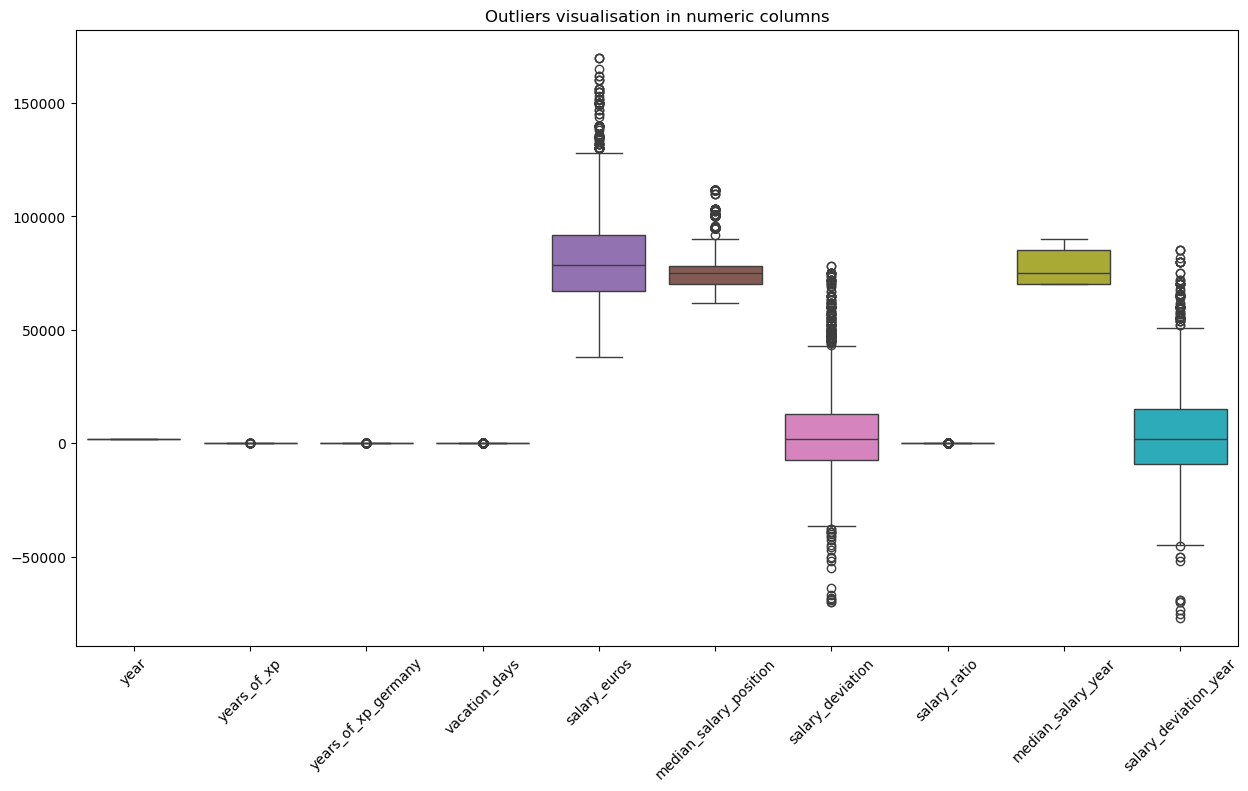

In [717]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = [
    "year", "years_of_xp", "years_of_xp_germany", "vacation_days",
    "salary_euros", "median_salary_position", "salary_deviation",
    "salary_ratio", "median_salary_year", "salary_deviation_year"
]

# Outliers visualisation 
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_filtered[numeric_columns])
plt.xticks(rotation=45)
plt.title("Outliers visualisation in numeric columns")
plt.show()


In [718]:
df_salary_eda = df_filtered

In [719]:
print(df_filtered.dtypes)


year                        float64
city                       category
position                   category
gender                       object
age                          object
seniority                    object
years_of_xp                 float64
years_of_xp_germany         float64
main_tech                  category
vacation_days               float64
company_size               category
salary_euros                float64
ai_impact                  category
ai_use                     category
median_salary_position      float64
salary_deviation            float64
salary_ratio                float64
median_salary_year          float64
salary_deviation_year       float64
median_salary_prev_year     float64
salary_growth_rate          float64
median_salary_trend         float64
dtype: object


In [720]:
df_filtered['position'].value_counts()

position
Backend Developer            1939
Data Scientist                362
Frontend Developer            295
DevOps Engineer               220
Product Manager               184
QA Engineer                   159
Mobile Developer              148
Engineering Manager           145
Machine Learning Engineer      95
BI & Data Engineer             85
C-Level Executive              61
Data & Business Analyst        57
Data Engineer                  55
Fullstack Developer            51
SAP Consultant                  4
BI Engineer                     2
Name: count, dtype: int64

In [721]:
df_salary_eda.shape

(3862, 22)

In [722]:
#Save the filtered data
df_salary_eda.to_csv("df_filtered.csv", index=False, encoding='utf-8')


### IV. Machine Learning

##### 1. Create Dataset for Machine Learning

In [723]:


# Assume your DataFrame is called df
columns_to_keep = [
    'year',
    'city',
    'position',
    'seniority',
    'years_of_xp',
    'years_of_xp_germany',
    'main_tech',
    'vacation_days',
    'company_size',
    'salary_euros',
    'ai_impact',
    'ai_use'
]

df_model = df_salary_eda[columns_to_keep]


In [724]:
df_model.shape

(3862, 12)

##### 2. Visualization

/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/4252340680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


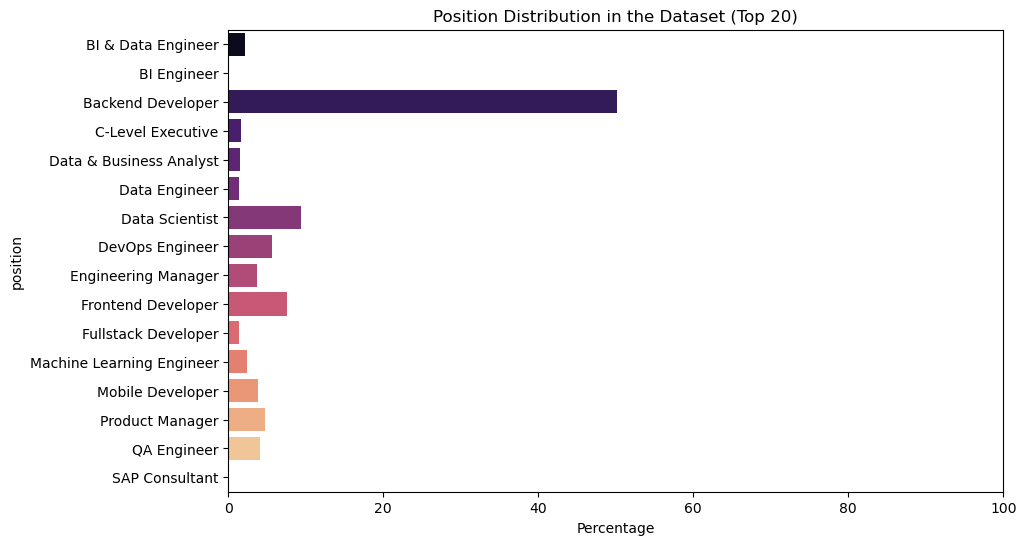

In [725]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage distribution based on df_filtered
position_counts = df_filtered['position'].value_counts(normalize=True) * 100

# Keep only the top 20 positions
top_positions_counts = position_counts.nlargest(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_positions_counts.values, 
    y=top_positions_counts.index, 
    palette="magma"
)
plt.xlabel("Percentage")
plt.title("Position Distribution in the Dataset (Top 20)")
plt.xlim(0, 100)
plt.show()



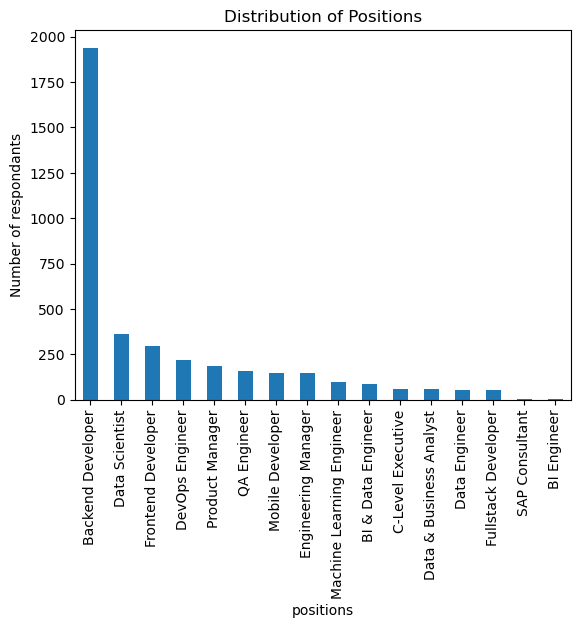

In [726]:
df_filtered['position'].value_counts().plot(kind='bar')
plt.xlabel("positions")
plt.ylabel("Number of respondants")
plt.title("Distribution of Positions")
plt.show()


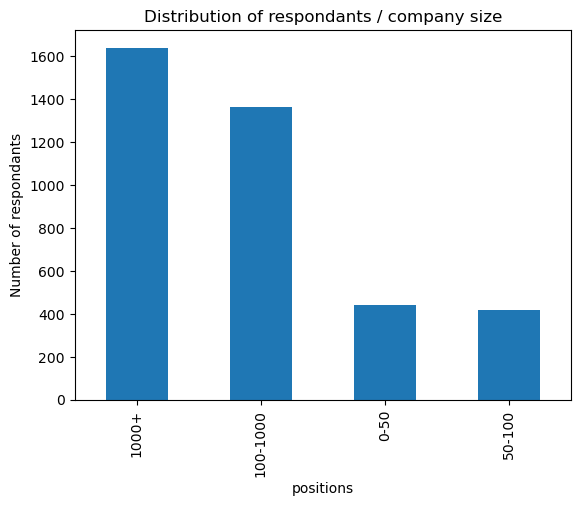

In [727]:
df_filtered['company_size'].value_counts().plot(kind='bar')
plt.xlabel("positions")
plt.ylabel("Number of respondants")
plt.title("Distribution of respondants / company size")
plt.show()

In [728]:
df_filtered.head()

,year,city,position,gender,age,seniority,years_of_xp,years_of_xp_germany,main_tech,vacation_days,...,ai_impact,ai_use,median_salary_position,salary_deviation,salary_ratio,median_salary_year,salary_deviation_year,median_salary_prev_year,salary_growth_rate,median_salary_trend
225,2019.0,Munich,Fullstack Developer,Male,31.0,Senior,8.0,0.0,Java,26.0,...,No,No,67000.0,1000.0,1.014925,70000.0,-2000.0,70000.0,-0.146341,76000.0
4218,2024.0,Berlin,Frontend Developer,Unknown,Unknown,Junior,1.0,1.0,JavaScript,28.0,...,Moderate but noticeable,Yes,90000.0,-25000.0,0.722222,90000.0,-25000.0,70000.0,0.000000,70000.0
2888,2022.0,Berlin,C-Level Executive,Unknown,Unknown,Manager,5.0,5.0,Python,30.0,...,Invisible,No,111500.0,-26500.0,0.762332,80000.0,5000.0,90000.0,0.285714,80000.0
196,2019.0,Munich,Frontend Developer,Male,30.0,Senior,9.0,0.0,JavaScript,27.0,...,No,No,69500.0,5500.0,1.079137,70000.0,5000.0,82000.0,-0.088889,86000.0
197,2019.0,Munich,Machine Learning Engineer,Male,30.0,Mid-level,2.0,0.0,Python,30.0,...,No,No,85000.0,-23000.0,0.729412,70000.0,-8000.0,70000.0,-0.146341,76000.0


In [729]:
print(df_filtered.dtypes)

year                        float64
city                       category
position                   category
gender                       object
age                          object
seniority                    object
years_of_xp                 float64
years_of_xp_germany         float64
main_tech                  category
vacation_days               float64
company_size               category
salary_euros                float64
ai_impact                  category
ai_use                     category
median_salary_position      float64
salary_deviation            float64
salary_ratio                float64
median_salary_year          float64
salary_deviation_year       float64
median_salary_prev_year     float64
salary_growth_rate          float64
median_salary_trend         float64
dtype: object


In [730]:
df_filtered.isna().sum()

year                       0
city                       0
position                   0
gender                     0
age                        0
seniority                  0
years_of_xp                0
years_of_xp_germany        0
main_tech                  0
vacation_days              0
company_size               0
salary_euros               0
ai_impact                  0
ai_use                     0
median_salary_position     0
salary_deviation           0
salary_ratio               0
median_salary_year         0
salary_deviation_year      0
median_salary_prev_year    0
salary_growth_rate         0
median_salary_trend        0
dtype: int64

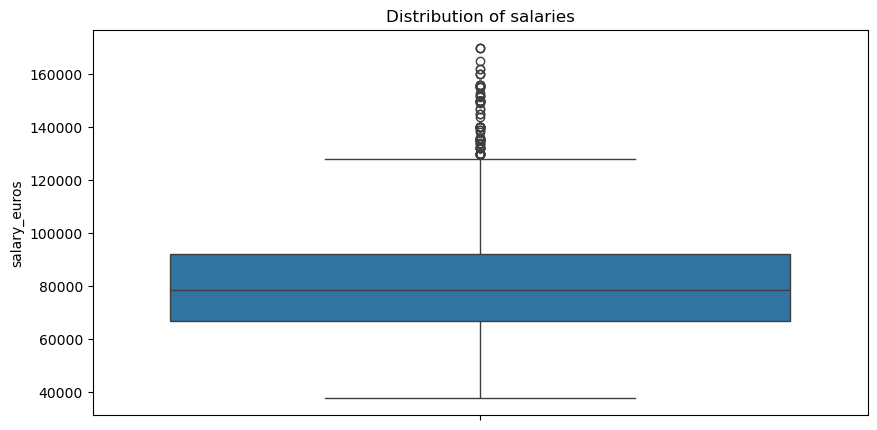

In [731]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(df_filtered['salary_euros'])
plt.title('Distribution of salaries')
plt.show()


In [732]:
df_model['salary_euros'].describe()


count      3862.000000
mean      81552.626974
std       20719.935465
min       38000.000000
25%       67000.000000
50%       78460.000000
75%       92000.000000
max      170000.000000
Name: salary_euros, dtype: float64

In [733]:
df_model.shape

(3862, 12)

#### 3. Feature Engineering



In [734]:
df_model.columns

Index(['year', 'city', 'position', 'seniority', 'years_of_xp',
       'years_of_xp_germany', 'main_tech', 'vacation_days', 'company_size',
       'salary_euros', 'ai_impact', 'ai_use'],
      dtype='object')

In [735]:
df_model['ai_impact'].unique()

['No', 'Moderate but noticeable', 'Invisible', 'Great']
Categories (4, object): ['Great', 'Invisible', 'Moderate but noticeable', 'No']

In [736]:
df_model["company_size"].unique()

['0-50', '50-100', '100-1000', '1000+']
Categories (4, object): ['0-50' < '50-100' < '100-1000' < '1000+']

In [737]:
print(df_model["company_size"].apply(type).value_counts())


company_size
<class 'str'>    3862
Name: count, dtype: int64


Distribution des classes avant SMOTE:
 salary_range_encoded
1    1317
2     773
0     709
3     290
Name: count, dtype: int64
SMOTE applied!


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2899593169.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["seniority_encoded"] = df_model["seniority"].map(seniority_mapping)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2899593169.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["company_size_encoded"] = df_model["company_size"].map(company_size_mapping)
/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_1165/2899593169.py:37: SettingWith


🔹 Random Forest Accuracy: 0.5511
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       177
           1       0.60      0.61      0.60       330
           2       0.47      0.48      0.47       193
           3       0.38      0.30      0.34        73

    accuracy                           0.55       773
   macro avg       0.51      0.50      0.51       773
weighted avg       0.55      0.55      0.55       773

[[111  53  13   0]
 [ 60 201  58  11]
 [ 11  65  92  25]
 [  0  18  33  22]]

🔹 XGBoost Accuracy: 0.5459
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       177
           1       0.58      0.60      0.59       330
           2       0.47      0.51      0.49       193
           3       0.40      0.27      0.33        73

    accuracy                           0.55       773
   macro avg       0.52      0.49      0.50       773
weighted avg       0.54      0.55      0.54   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression Accuracy: 0.4838
              precision    recall  f1-score   support

           0       0.53      0.66      0.59       177
           1       0.63      0.47      0.54       330
           2       0.40      0.35      0.37       193
           3       0.25      0.48      0.33        73

    accuracy                           0.48       773
   macro avg       0.45      0.49      0.46       773
weighted avg       0.51      0.48      0.49       773

[[116  44  11   6]
 [ 79 156  64  31]
 [ 18  41  67  67]
 [  6   5  27  35]]

🔹 SVC Accuracy: 0.5602
              precision    recall  f1-score   support

           0       0.68      0.47      0.56       177
           1       0.55      0.76      0.64       330
           2       0.50      0.46      0.48       193
           3       0.62      0.14      0.22        73

    accuracy                           0.56       773
   macro avg       0.59      0.46      0.47       773
weighted avg       0.57      0.56      0.54 

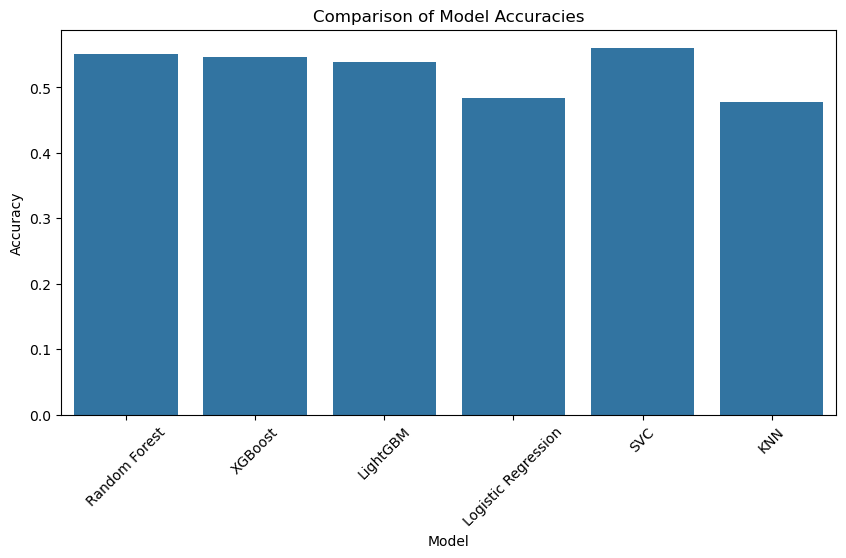

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Encode 'Seniority' as Ordinal 
seniority_mapping = {
    "Junior": 1,
    "Mid-level": 2,
    "Senior": 3,
    "Lead": 4,
    "Manager": 5
}
df_model["seniority_encoded"] = df_model["seniority"].map(seniority_mapping)

# Encode 'Company Size' 
company_size_mapping = {
    "0-50": 1,
    "50-100": 2,
    "100-1000": 3,
    "1000+": 4
}
df_model["company_size_encoded"] = df_model["company_size"].map(company_size_mapping)

# Convert to numeric variables
df_model["company_size_encoded"] = df_model["company_size_encoded"].astype(int)
df_model["seniority_encoded"] = df_model["seniority_encoded"].astype(int)

df_model["ai_use"] = df_model["ai_use"].map({"Yes": 1, "No": 0}).astype(int)

# One-Hot Encode 'Position' and 'City'
df_model = pd.get_dummies(df_model, columns=['position'], prefix='position', drop_first=False)
df_model = pd.get_dummies(df_model, columns=['city'], prefix='city', drop_first=False)

# Salary Range Encoding
bins = [0, 45000, 65000, 85000, 110000, 150000, 500000]  
labels = [0, 1, 2, 3, 4, 5]
df_model['salary_range_encoded'] = pd.cut(df_model['salary_euros'], bins=bins, labels=labels).astype(int)

df_model['salary_range_encoded'] = df_model['salary_range_encoded'].replace({0: 1, 5: 4})

# Ensure labels start from 0 for compatibility with XGBoost
df_model['salary_range_encoded'] -= df_model['salary_range_encoded'].min()

# Define X and y
selected_features = ["years_of_xp", "years_of_xp_germany", "vacation_days", "company_size_encoded",
    "seniority_encoded", "ai_use", "year"] + \
    [col for col in df_model.columns if col.startswith("position_")] + \
    [col for col in df_model.columns if col.startswith("city_")]
X = df_model[selected_features]
y = df_model["salary_range_encoded"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE: Dynamically adjust based on available classes
print("Distribution des classes avant SMOTE:\n", y_train.value_counts())
classes_presentes = y_train.unique()
sampling_strategy = {cls: max(1000, int(1.5 * y_train.value_counts()[cls])) for cls in classes_presentes if y_train.value_counts()[cls] < 1000}

if sampling_strategy:
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("SMOTE applied!")
else:
    X_train_resampled, y_train_resampled = X_train, y_train
    print("SMOTE skipped, target class not found in y_train")

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "SVC": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })
    print(f"\n🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

# Display results as a dataframe
results_df = pd.DataFrame(results)
print(results_df)

# Display results visually
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_df)
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


In [739]:
import json

# Define correct feature names based on model encoding
feature_names = [
    "years_of_xp", "years_of_xp_germany", "vacation_days", "company_size_encoded",
    "seniority_encoded", "ai_use", "year",
    "city_Berlin", "city_Munich",
    "position_BI & Data Engineer", "position_BI Engineer", "position_Backend Developer",
    "position_C-Level Executive", "position_Data & Business Analyst", "position_Data Engineer",
    "position_Data Scientist", "position_DevOps Engineer", "position_Engineering Manager",
    "position_Frontend Developer", "position_Fullstack Developer", "position_Machine Learning Engineer",
    "position_Mobile Developer", "position_Product Manager", "position_QA Engineer", "position_SAP Consultant"
]

# Save the feature names to a JSON file
with open("features.json", "w") as f:
    json.dump(feature_names, f)

print("✅ features.json has been successfully saved.")


✅ features.json has been successfully saved.


In [740]:
import json


In [741]:
df_model.isna().sum()

year                                  0
seniority                             0
years_of_xp                           0
years_of_xp_germany                   0
main_tech                             0
vacation_days                         0
company_size                          0
salary_euros                          0
ai_impact                             0
ai_use                                0
seniority_encoded                     0
company_size_encoded                  0
position_BI & Data Engineer           0
position_BI Engineer                  0
position_Backend Developer            0
position_C-Level Executive            0
position_Data & Business Analyst      0
position_Data Engineer                0
position_Data Scientist               0
position_DevOps Engineer              0
position_Engineering Manager          0
position_Frontend Developer           0
position_Fullstack Developer          0
position_Machine Learning Engineer    0
position_Mobile Developer             0


In [742]:

print(df_model['salary_range_encoded'].value_counts())


salary_range_encoded
1    1647
2     966
0     886
3     363
Name: count, dtype: int64


In [743]:
#  Drop non-useful columns (Remove unrealistic features like 'growth_speed')
df_model.drop(columns=["seniority", "company_size"], inplace=True)

print("Feature Engineering Done")


Feature Engineering Done


In [744]:
print(df_model.columns)


Index(['year', 'years_of_xp', 'years_of_xp_germany', 'main_tech',
       'vacation_days', 'salary_euros', 'ai_impact', 'ai_use',
       'seniority_encoded', 'company_size_encoded',
       'position_BI & Data Engineer', 'position_BI Engineer',
       'position_Backend Developer', 'position_C-Level Executive',
       'position_Data & Business Analyst', 'position_Data Engineer',
       'position_Data Scientist', 'position_DevOps Engineer',
       'position_Engineering Manager', 'position_Frontend Developer',
       'position_Fullstack Developer', 'position_Machine Learning Engineer',
       'position_Mobile Developer', 'position_Product Manager',
       'position_QA Engineer', 'position_SAP Consultant', 'city_Berlin',
       'city_Munich', 'salary_range_encoded'],
      dtype='object')


In [745]:
#  Keep only features a recruiter can input
selected_features = [
    "years_of_xp", "years_of_xp_germany", "vacation_days", "company_size_encoded",
    "seniority_encoded","ai_use","year"

] + [col for col in df_model.columns if col.startswith("position_")] \
  + [col for col in df_model.columns if col.startswith("city_")]

# Ensure all selected features exist in DataFrame
selected_features = [col for col in selected_features if col in df_model.columns]

# Define X (features) and y (target)
X = df_model[selected_features]
y = df_model["salary_range_encoded"]  # Target: Salary range category

print(" Features Selected Successfully")


 Features Selected Successfully


In [746]:
print("Missing values per column before "
":")
print(X.isnull().sum())



Missing values per column before :
years_of_xp                           0
years_of_xp_germany                   0
vacation_days                         0
company_size_encoded                  0
seniority_encoded                     0
ai_use                                0
year                                  0
position_BI & Data Engineer           0
position_BI Engineer                  0
position_Backend Developer            0
position_C-Level Executive            0
position_Data & Business Analyst      0
position_Data Engineer                0
position_Data Scientist               0
position_DevOps Engineer              0
position_Engineering Manager          0
position_Frontend Developer           0
position_Fullstack Developer          0
position_Machine Learning Engineer    0
position_Mobile Developer             0
position_Product Manager              0
position_QA Engineer                  0
position_SAP Consultant               0
city_Berlin                           0
city_

In [747]:
#  Keep only features a recruiter can input
selected_features = [
    "years_of_xp", "years_of_xp_germany", "vacation_days", "company_size_encoded",
    "seniority_encoded","ai_use","year"

] + [col for col in df_model.columns if col.startswith("position_")] \
  + [col for col in df_model.columns if col.startswith("city_")]

# Ensure all selected features exist in DataFrame
selected_features = [col for col in selected_features if col in df_model.columns]

# Define X (features) and y (target)
X = df_model[selected_features]
y = df_model["salary_range_encoded"]  # Target: Salary range category

print(" Features Selected Successfully")

 Features Selected Successfully


In [748]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)  # Stratification pour garder la distribution originale

# SMOTE: Augmenter uniquement la classe 4
smote = SMOTE(sampling_strategy={3: 700}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"SMOTE applied! New dataset shape: {X_train_resampled.shape}")






SMOTE applied! New dataset shape: (3499, 25)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [749]:
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter Grid
param_grid = {
    "n_estimators": [100, 300],  # Moderate number of trees
    "max_depth": [15, 20],  # Avoid overly shallow trees
    "min_samples_split": [5, 10],  # Reduce to allow better splits
    "min_samples_leaf": [2, 5],  # Ensure more granularity
    "max_features": ["sqrt"]
}


#  Grid Search
grid_search = GridSearchCV(
    estimator=rf_model, param_grid=param_grid,
    scoring="accuracy", n_jobs=-1, cv=5, verbose=2
)
grid_search.fit



<bound method BaseSearchCV.fit of GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=2)>

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ensure that GridSearchCV is fitted before accessing the best model
grid_search.fit(X_train, y_train)

# Access the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Predict on the training set
y_train_pred = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Classification Report (Precision, Recall, F1-Score) on Test Set
class_report = classification_report(y_test, y_test_pred)

# Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Results
print(f"🔹 Training Accuracy: {train_accuracy:.4f}")
print(f"🔹 Test Accuracy: {test_accuracy:.4f}")
print(f"🔹 Classification Report:\n{class_report}")
print(f"🔹 Confusion Matrix:\n{conf_matrix}")

# Check if the model is overfitting or underfitting
if train_accuracy > test_accuracy:
    print("\n🔹 The model is likely overfitting (higher accuracy on training set than on test set).")
elif train_accuracy < test_accuracy:
    print("\n🔹 The model is likely underfitting (lower accuracy on training set than on test set).")
else:
    print("\n🔹 The model is performing equally well on both training and test sets.")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

In [751]:
# Train your model
model.fit(X_train, y_train)

# Get the accuracy on the training set
train_accuracy = model.score(X_train, y_train)

# Get the accuracy on the test set
test_accuracy = model.score(X_test, y_test)

print(f"Training accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")


Training accuracy: 0.6581417934606669
Test accuracy: 0.4851228978007762


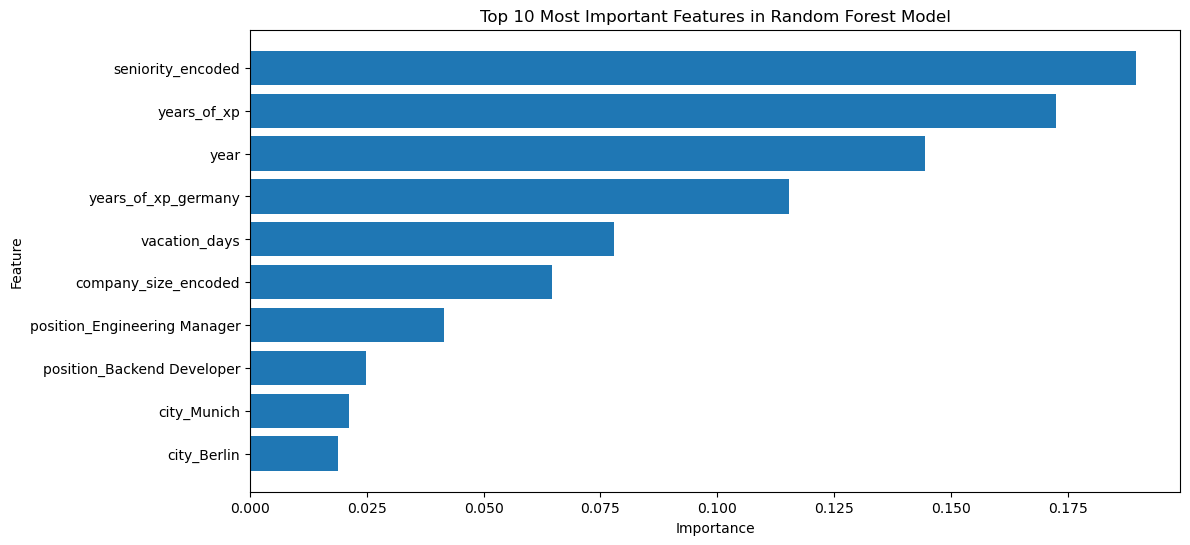

In [752]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
importances = rf.feature_importances_

# Convert to DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)


# Plot top 10 features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


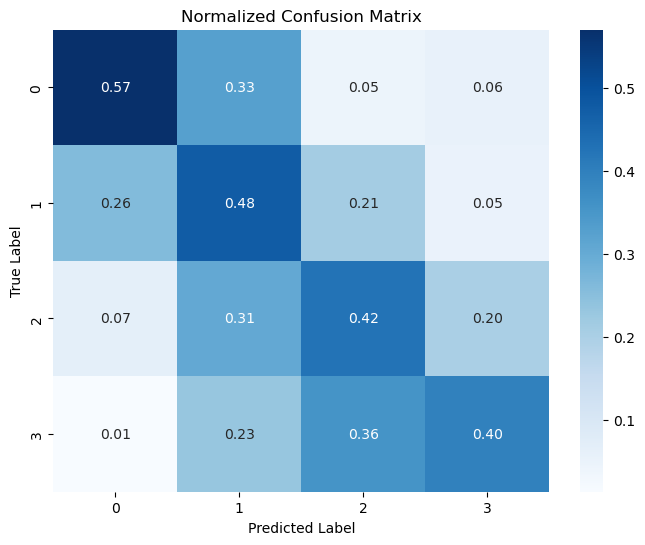

In [753]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_norm = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()


In [754]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())



salary_range_encoded
1    1317
2     773
0     709
3     290
Name: count, dtype: int64
salary_range_encoded
1    1317
2     773
0     709
3     700
Name: count, dtype: int64


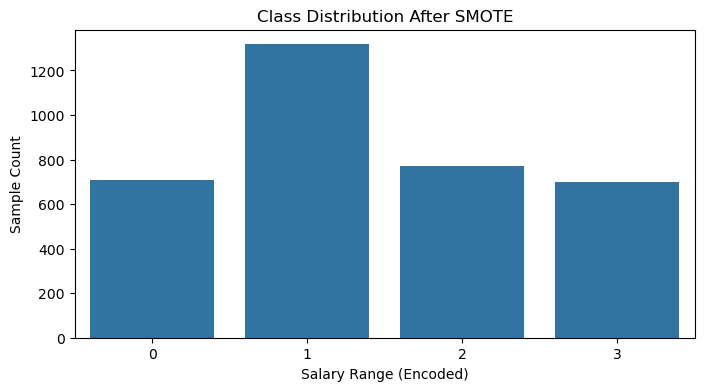

In [755]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_resampled)
plt.xlabel("Salary Range (Encoded)")
plt.ylabel("Sample Count")
plt.title("Class Distribution After SMOTE")
plt.show()


In [756]:
print([col for col in X_train_resampled.columns if "city_" in col])  # Vérifie toutes les colonnes de villes
print([col for col in X_train_resampled.columns if "position_" in col])  # Vérifie toutes les positions


['city_Berlin', 'city_Munich']
['position_BI & Data Engineer', 'position_BI Engineer', 'position_Backend Developer', 'position_C-Level Executive', 'position_Data & Business Analyst', 'position_Data Engineer', 'position_Data Scientist', 'position_DevOps Engineer', 'position_Engineering Manager', 'position_Frontend Developer', 'position_Fullstack Developer', 'position_Machine Learning Engineer', 'position_Mobile Developer', 'position_Product Manager', 'position_QA Engineer', 'position_SAP Consultant']


In [757]:
import joblib
import json


# Save the best model from GridSearchCV
joblib.dump(best_rf_model, 'best_rf_model.pkl')

print("Best model saved successfully!")


# Save feature names
with open("features.json", "w") as f:
    json.dump(list(X_train.columns), f)

Best model saved successfully!


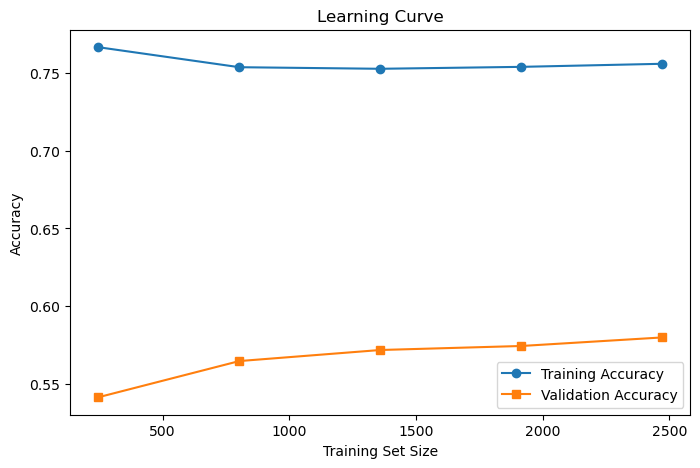

In [758]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X_train, y_train, cv=5, scoring="accuracy"
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()
